In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option('display.max_columns',False)
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('part-00000-0dd5f001-57d7-4ec1-a3f0-53ea28bba9c3-c000.csv',
                 error_bad_lines=False)

b'Skipping line 23509: expected 41 fields, saw 43\n'
b'Skipping line 36946: expected 41 fields, saw 42\nSkipping line 43788: expected 41 fields, saw 42\nSkipping line 45437: expected 41 fields, saw 49\n'
b'Skipping line 52141: expected 41 fields, saw 42\n'
b'Skipping line 73470: expected 41 fields, saw 42\nSkipping line 75103: expected 41 fields, saw 42\n'
b'Skipping line 87928: expected 41 fields, saw 42\n'
b'Skipping line 98453: expected 41 fields, saw 42\nSkipping line 98771: expected 41 fields, saw 42\nSkipping line 101047: expected 41 fields, saw 42\nSkipping line 104676: expected 41 fields, saw 42\n'


In [3]:
df.head()

hash_content_id  ... genre_name
0  0096dafb1049ee942e8e7cbad5abf4a46dc92e3995caac...  ...        NaN
1  01ddda2f8667719625bd0afa58537fd95a166c93233b8b...  ...        NaN
2  01ddda2f8667719625bd0afa58537fd95a166c93233b8b...  ...        NaN
3  01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...  ...        NaN
4  01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...  ...        NaN

[5 rows x 41 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106811 entries, 0 to 106810
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    106811 non-null  object 
 1   hash_play_id       106811 non-null  object 
 2   hash_visit_id      106811 non-null  object 
 3   hash_watcher_id    106811 non-null  object 
 4   hash_film_id       5818 non-null    object 
 5   hash_event_id      106811 non-null  object 
 6   is_login           106811 non-null  bool   
 7   playback_location  106811 non-null  object 
 8   platform           106811 non-null  object 
 9   play_time          106811 non-null  object 
 10  end_time           106811 non-null  object 
 11  referrer           101050 non-null  object 
 12  average_bitrate    101865 non-null  float64
 13  bitrate_range      106811 non-null  object 
 14  total_bytes        106811 non-null  int64  
 15  buffer_duration    106811 non-null  float64
 16  re

In [5]:
#let's check categorical features which have low cardinality(nunique value < 100)
low_cardinality = [i for i in df.columns if(df[i].dtypes in ['O','bool'])&(df[i].nunique()<100)]
low_cardinality

['is_login',
 'playback_location',
 'platform',
 'bitrate_range',
 'referrer_group',
 'completed',
 'utm_source',
 'utm_medium',
 'utm_campaign',
 'player_name',
 'has_ad',
 'flash_version',
 'os_name',
 'browser_name',
 'app_name',
 'autoplay',
 'is_premium',
 'content_type',
 'stream_type',
 'category_name']

is_login


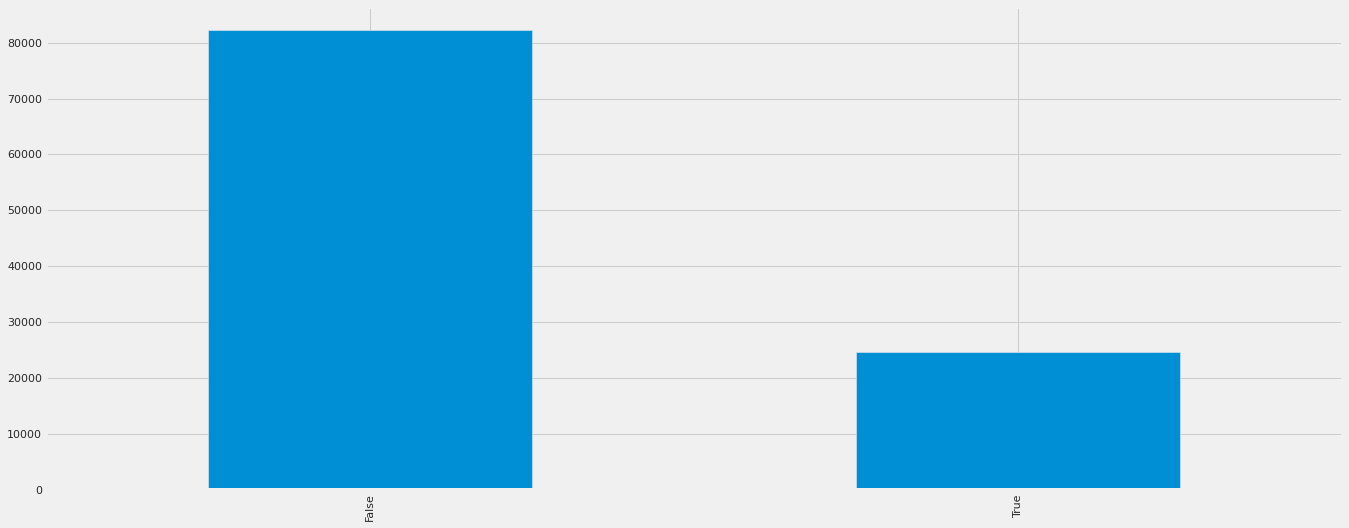

playback_location


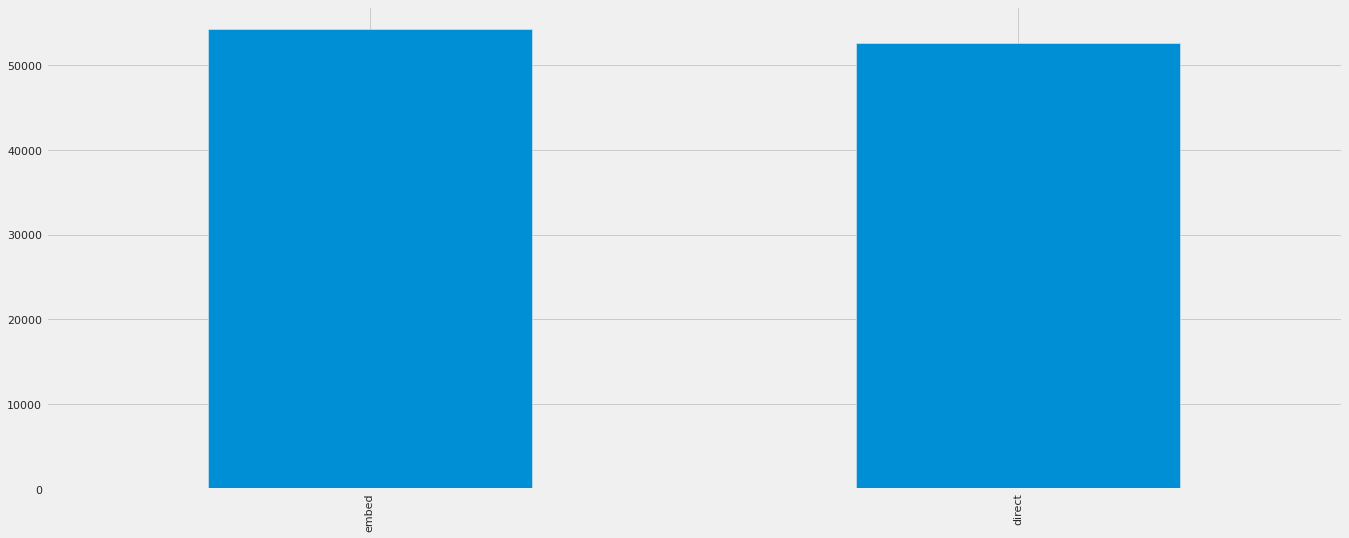

platform


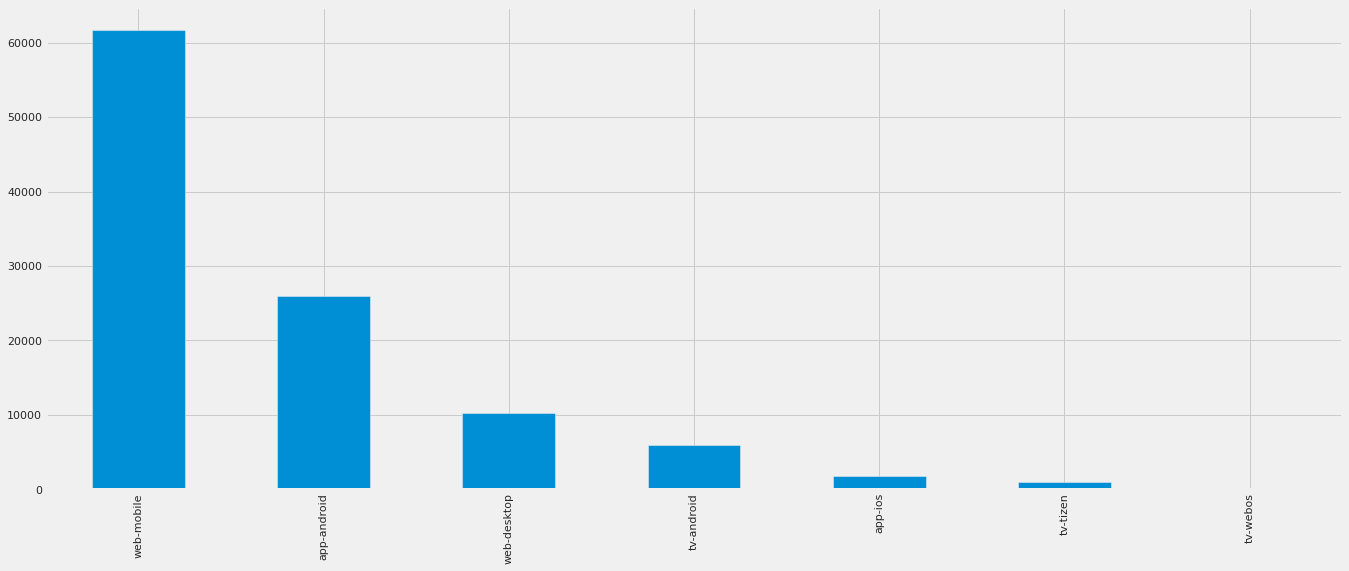

bitrate_range


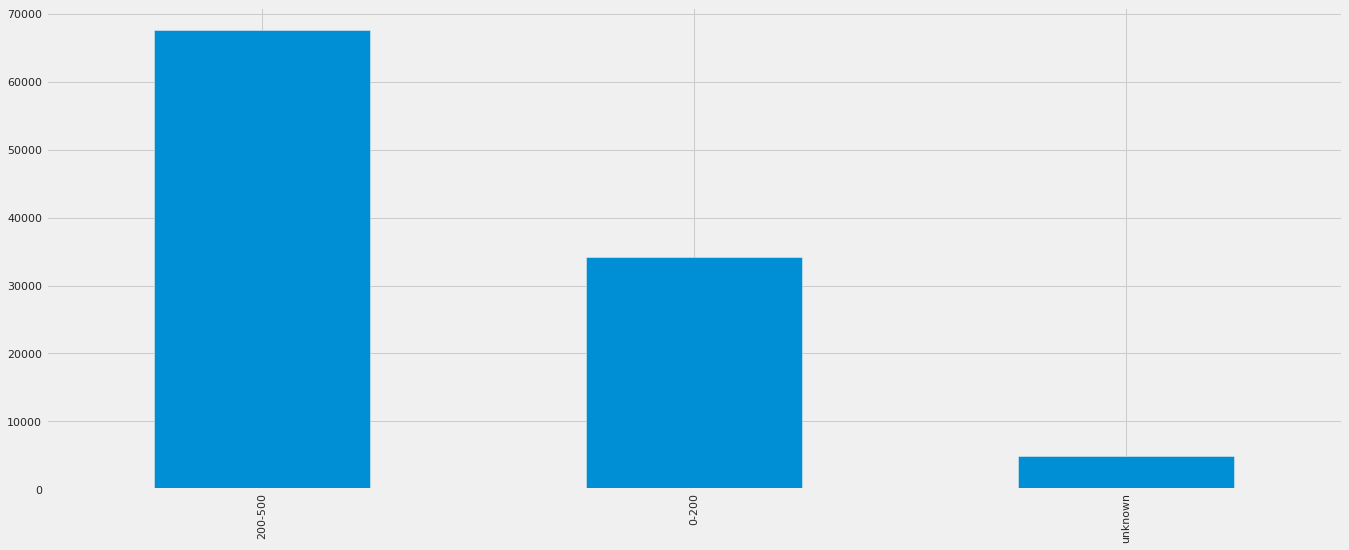

referrer_group


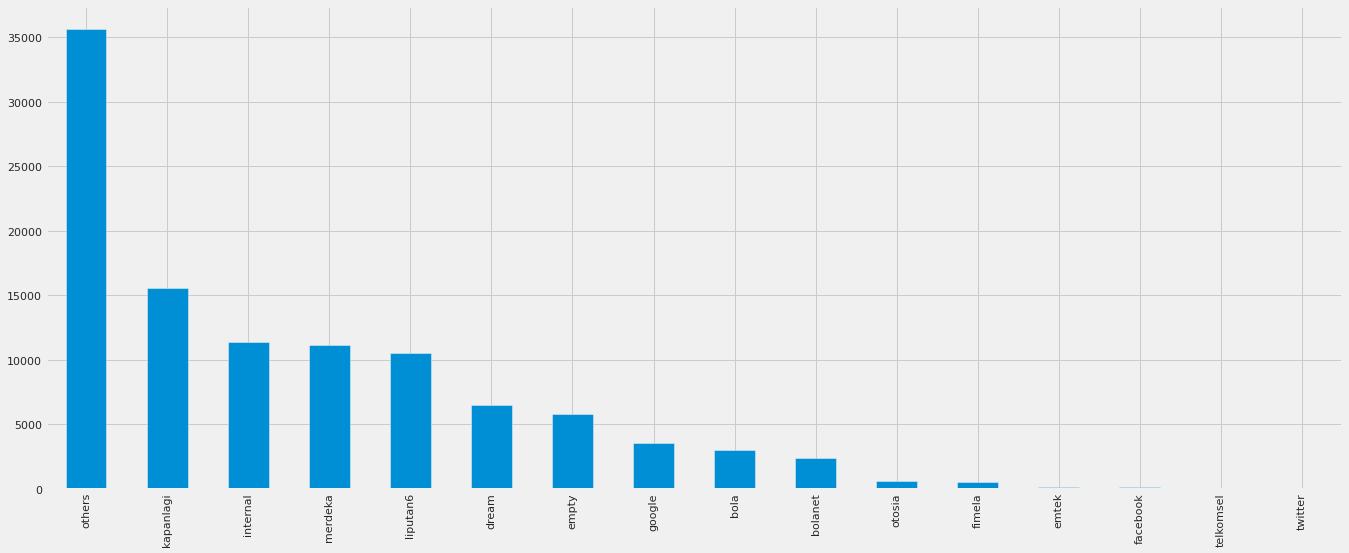

completed


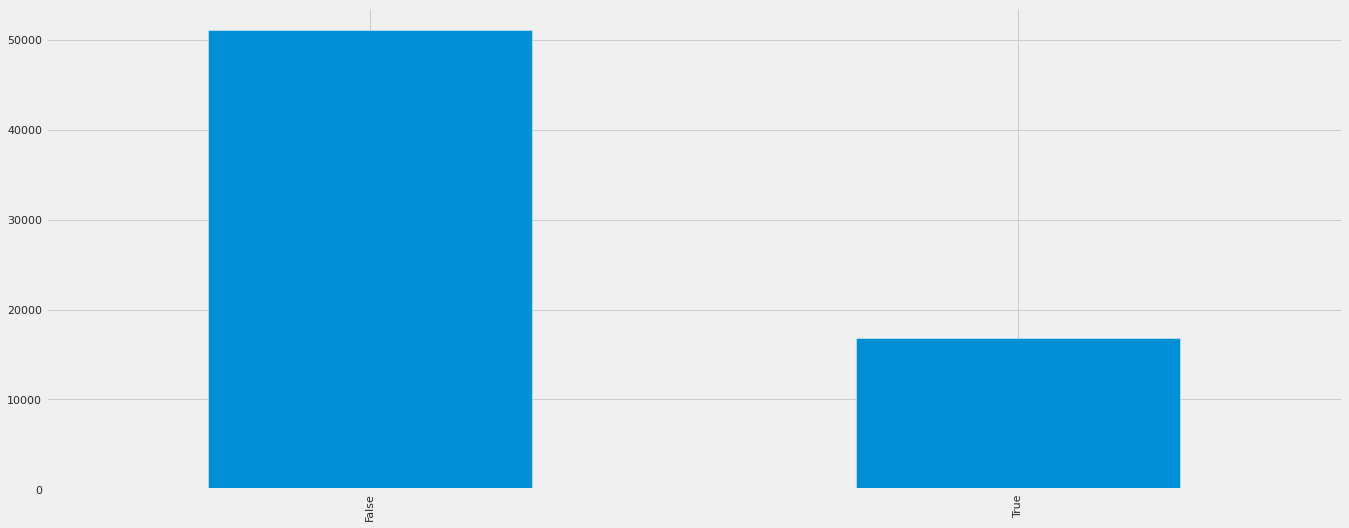

utm_source


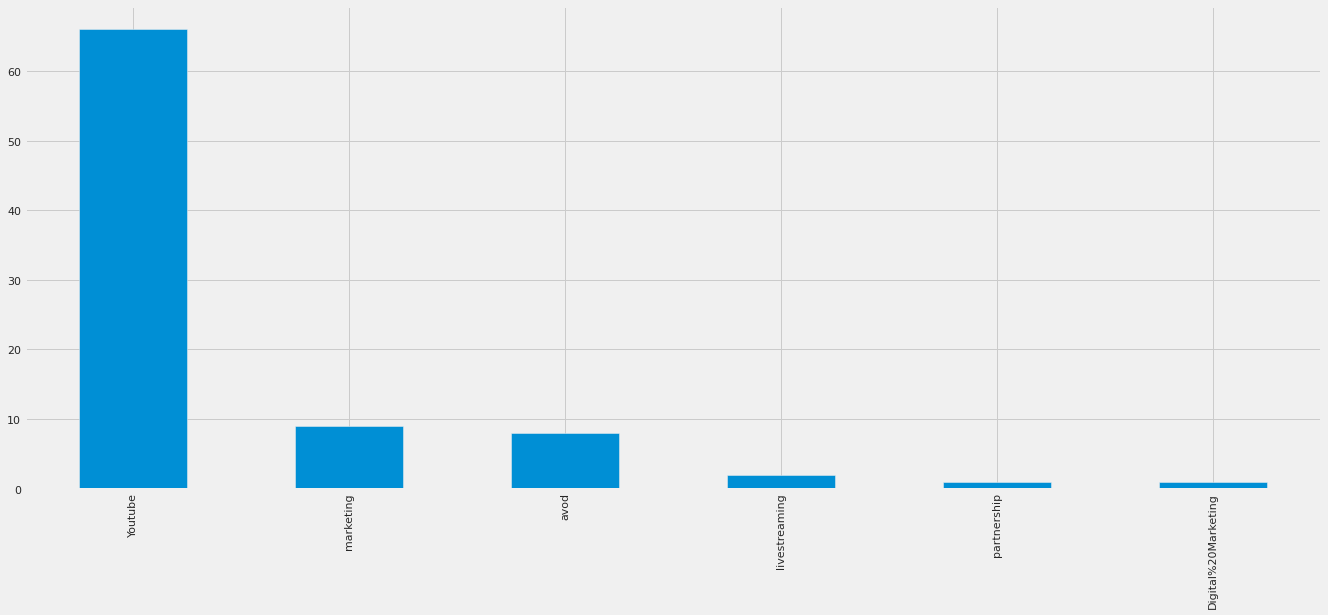

utm_medium


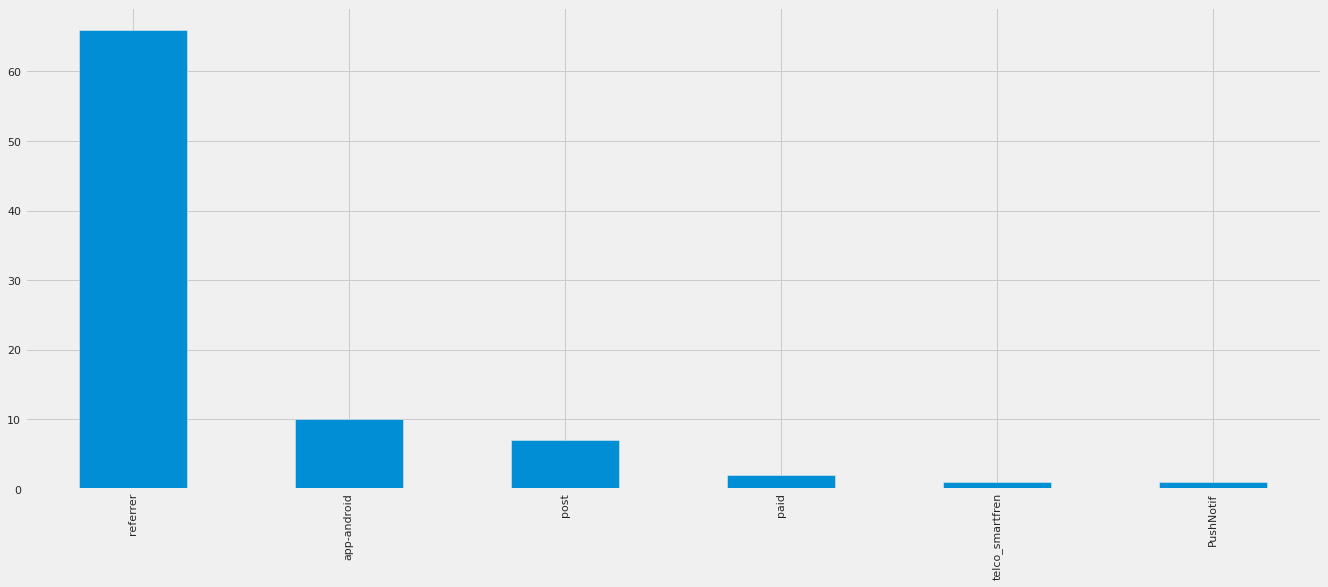

utm_campaign


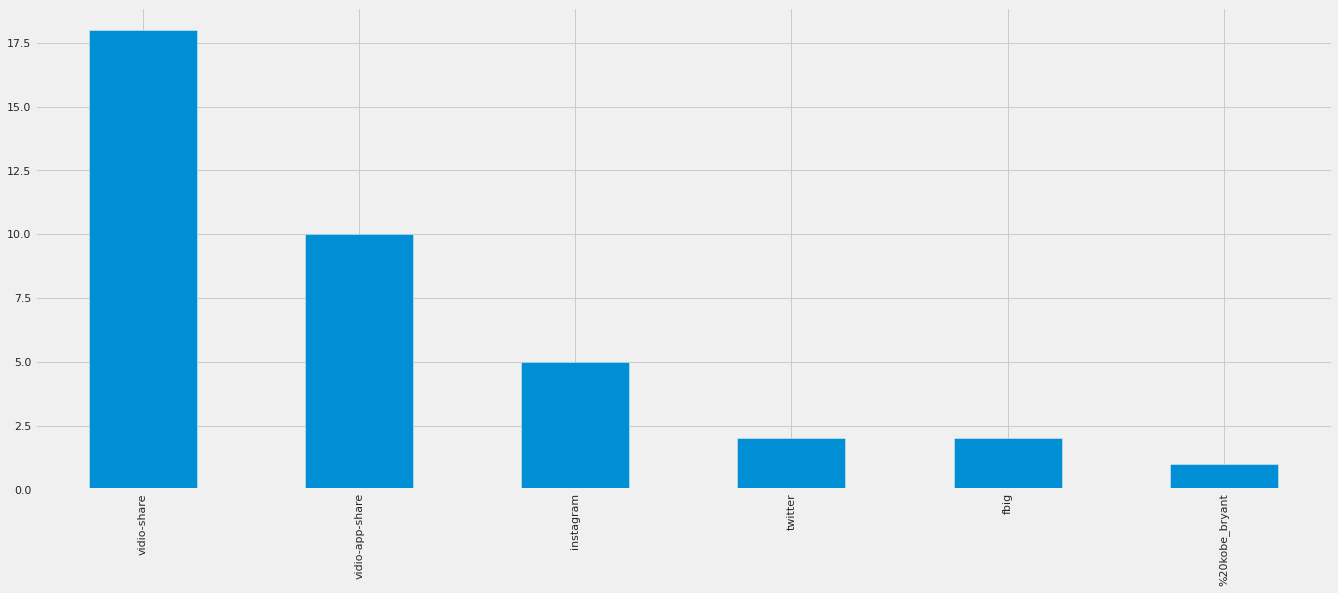

player_name


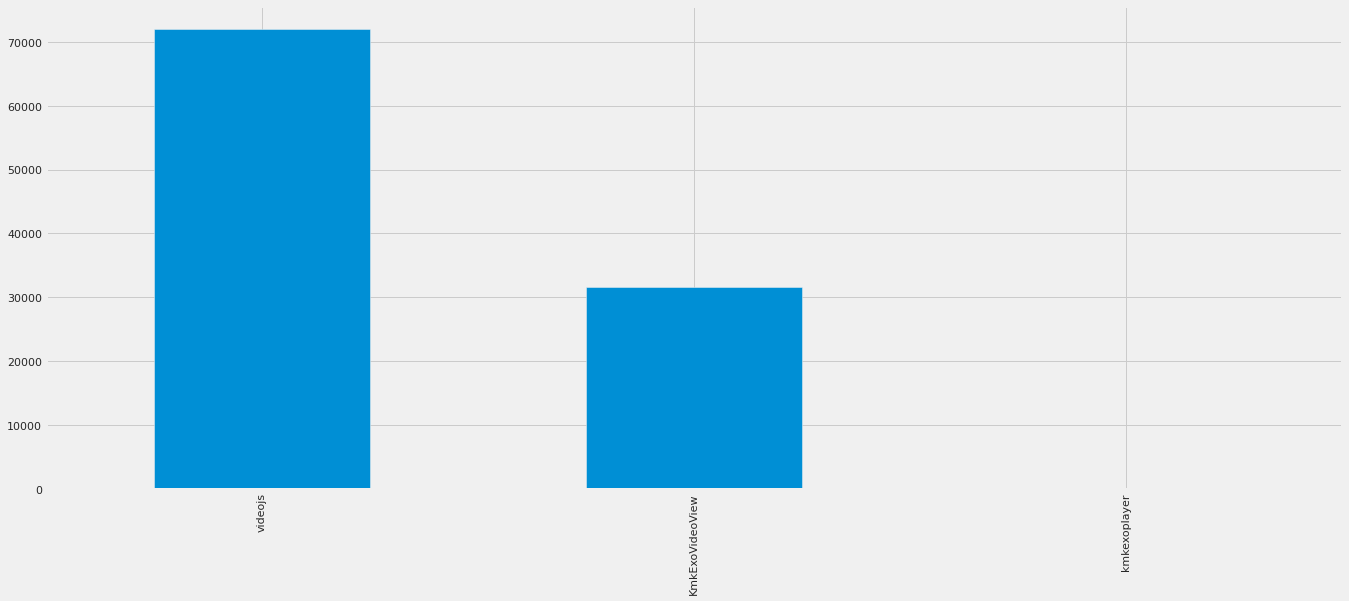

has_ad


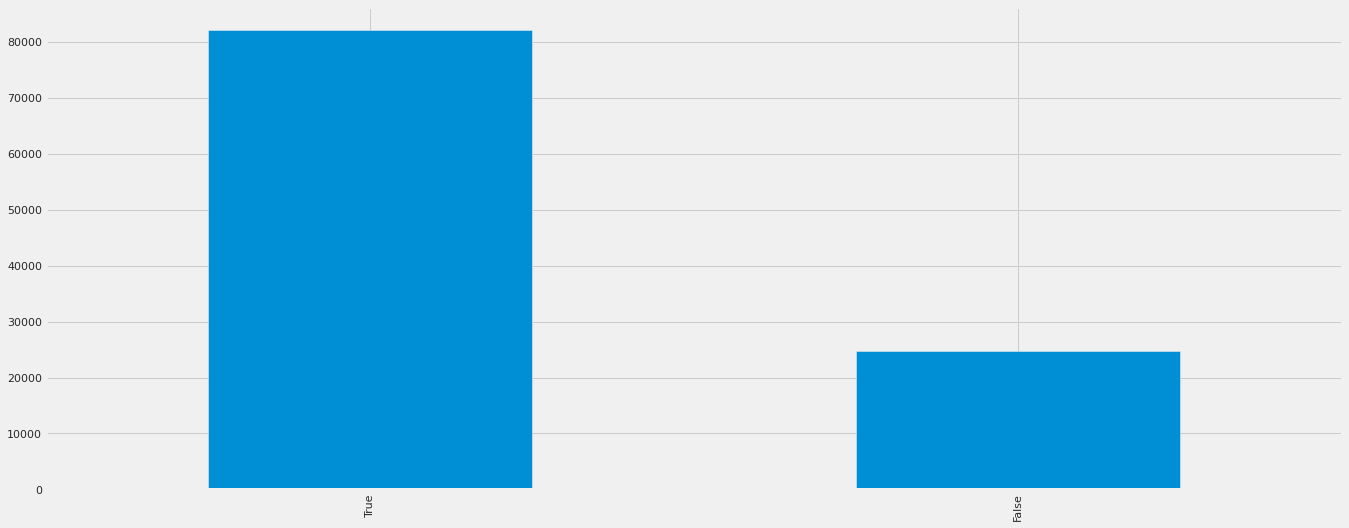

flash_version


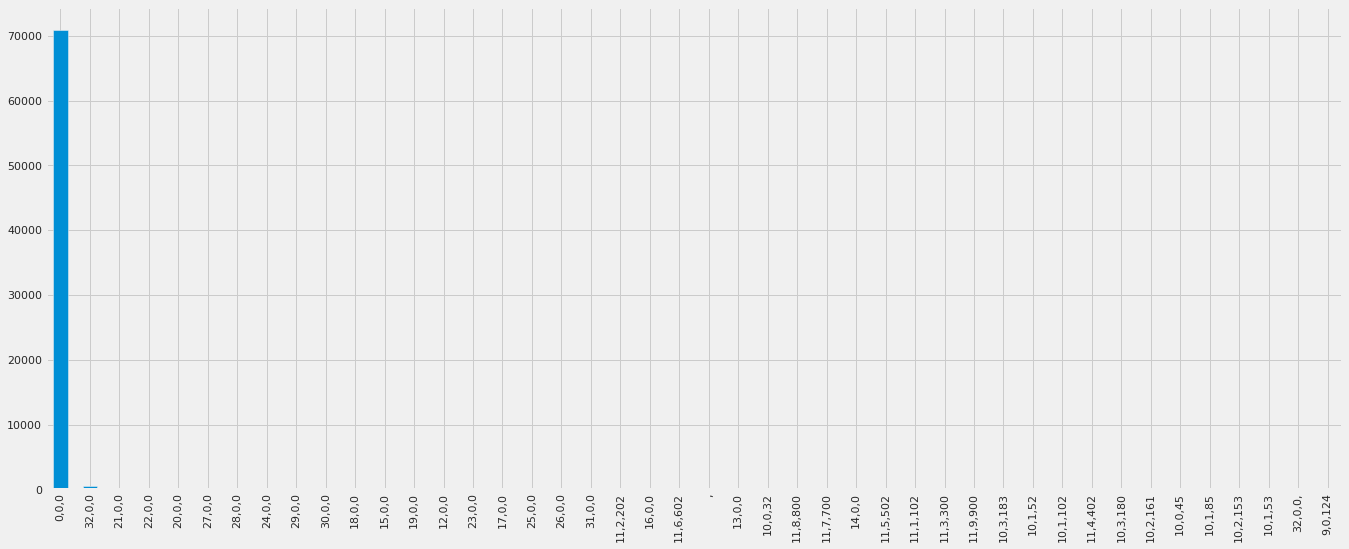

os_name


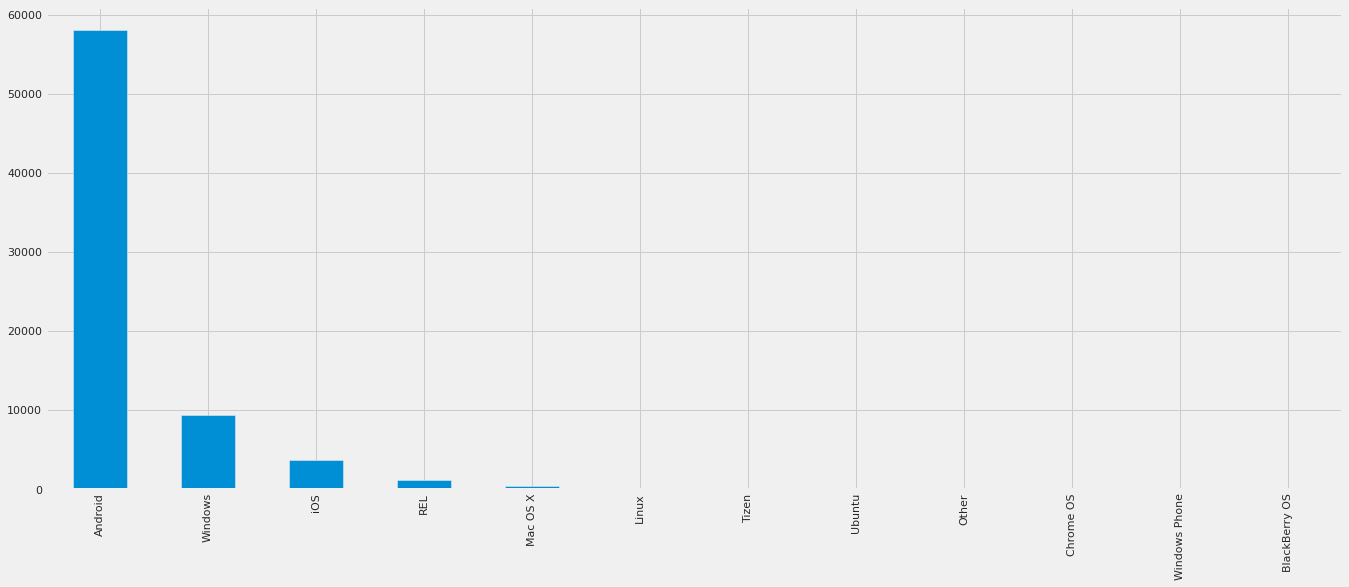

browser_name


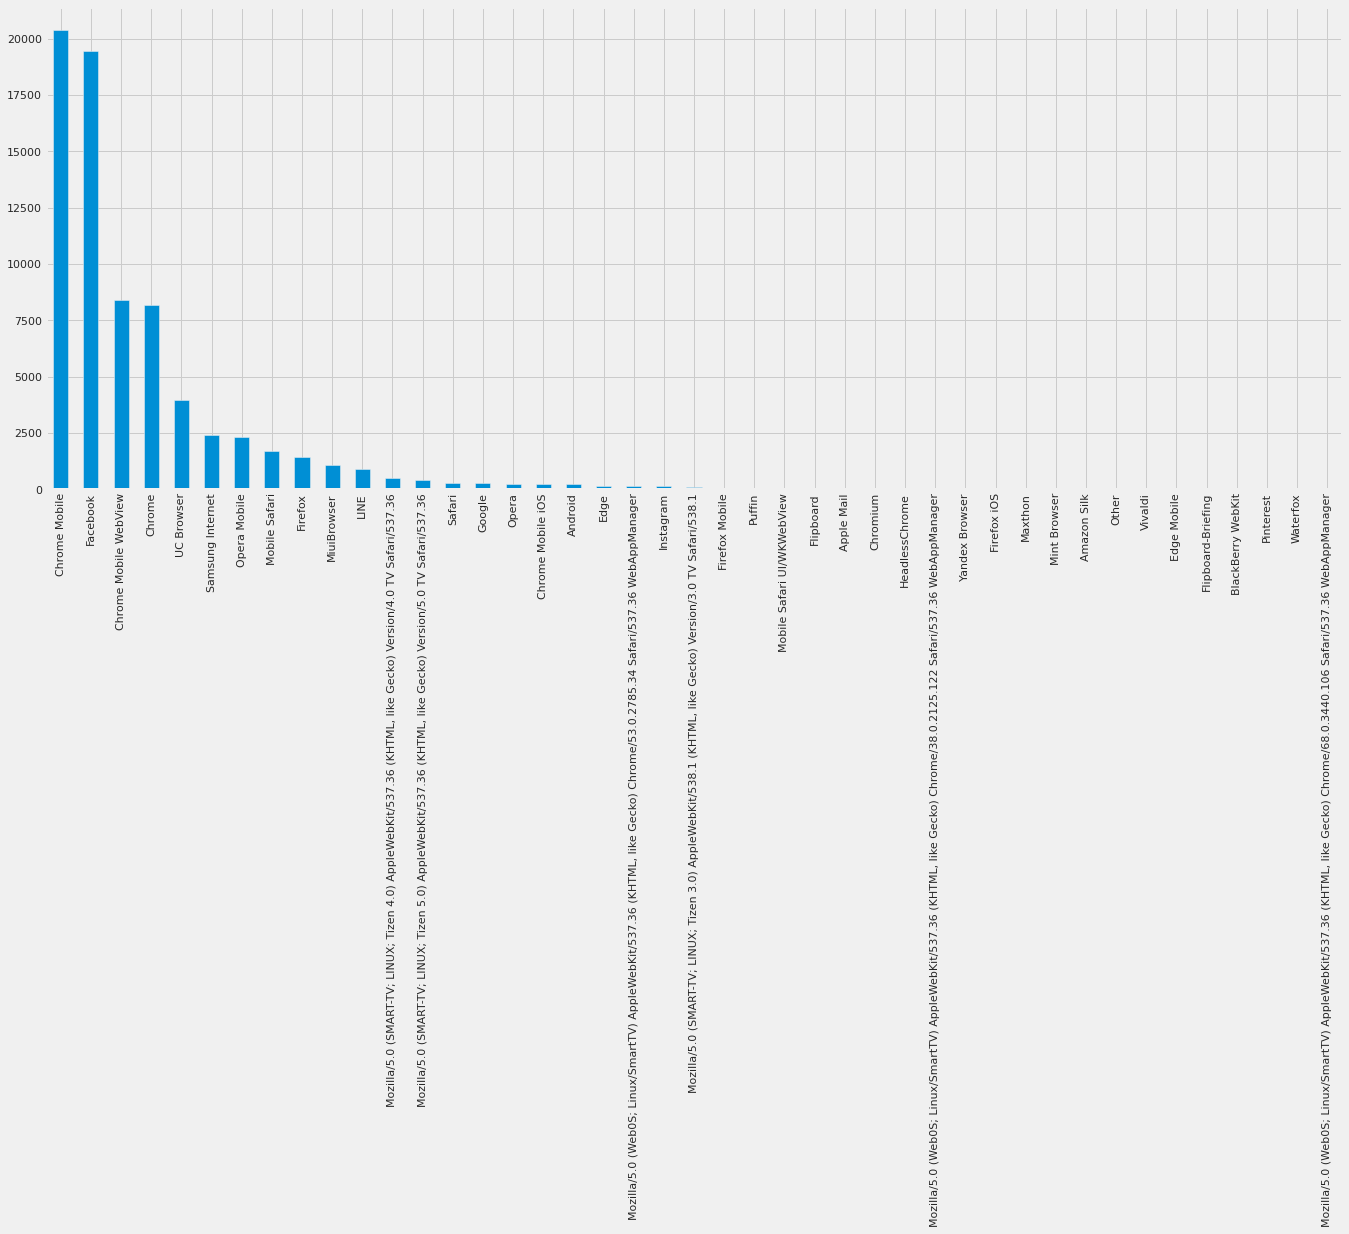

app_name


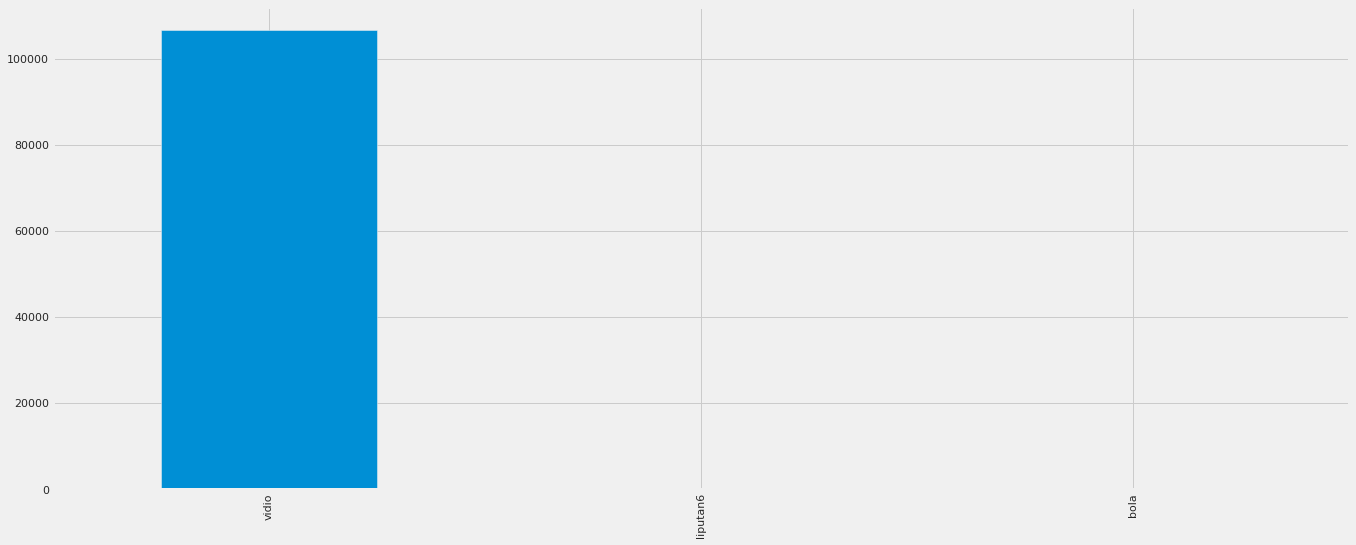

autoplay


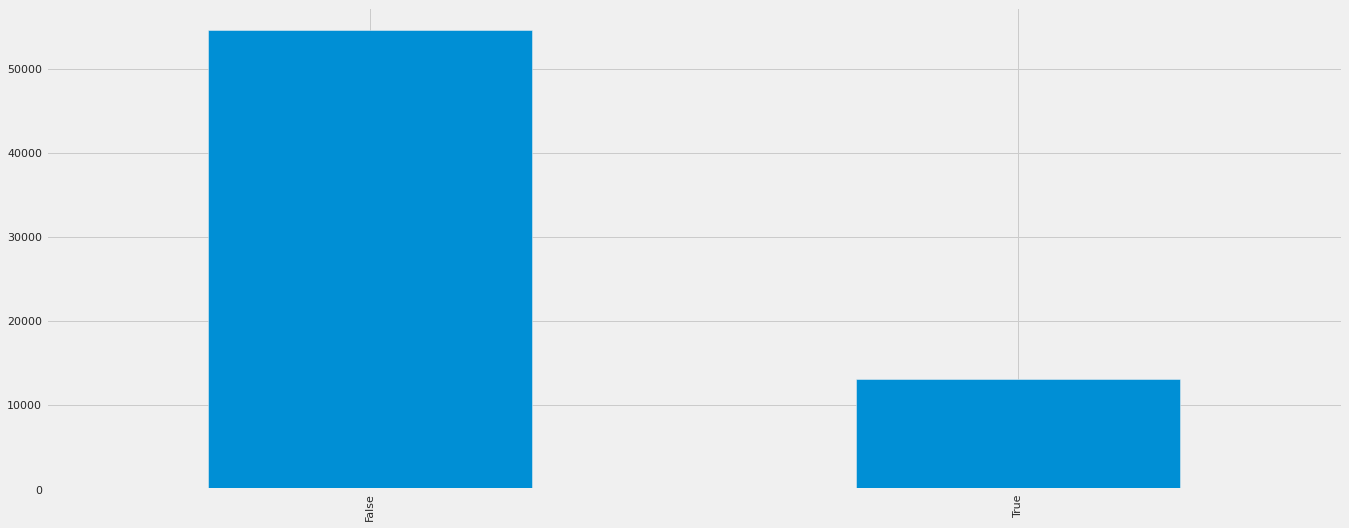

is_premium


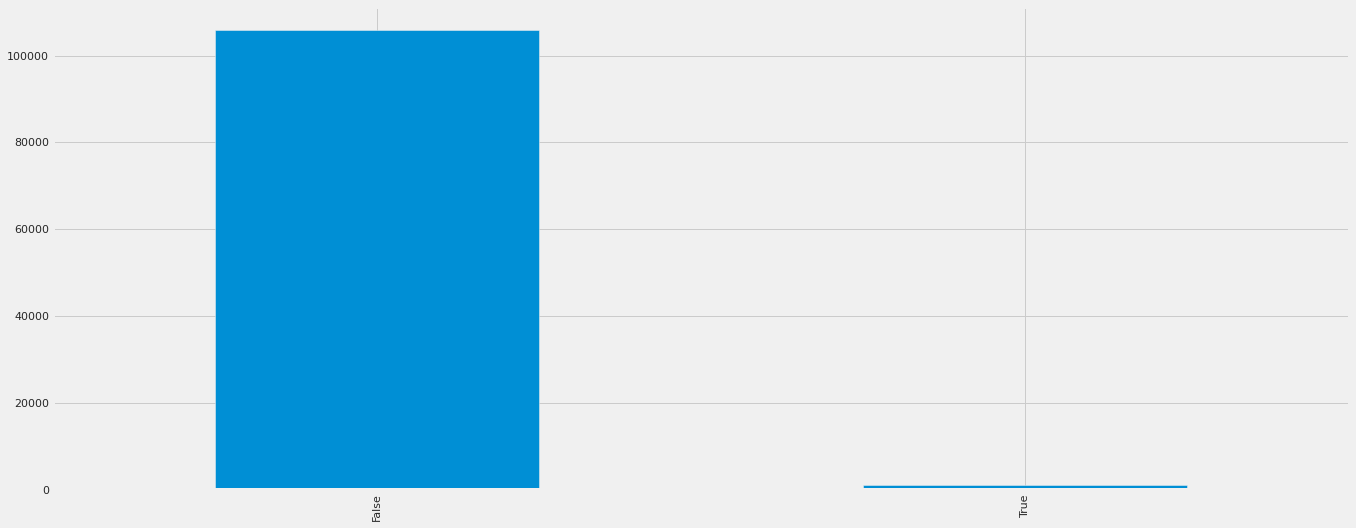

content_type


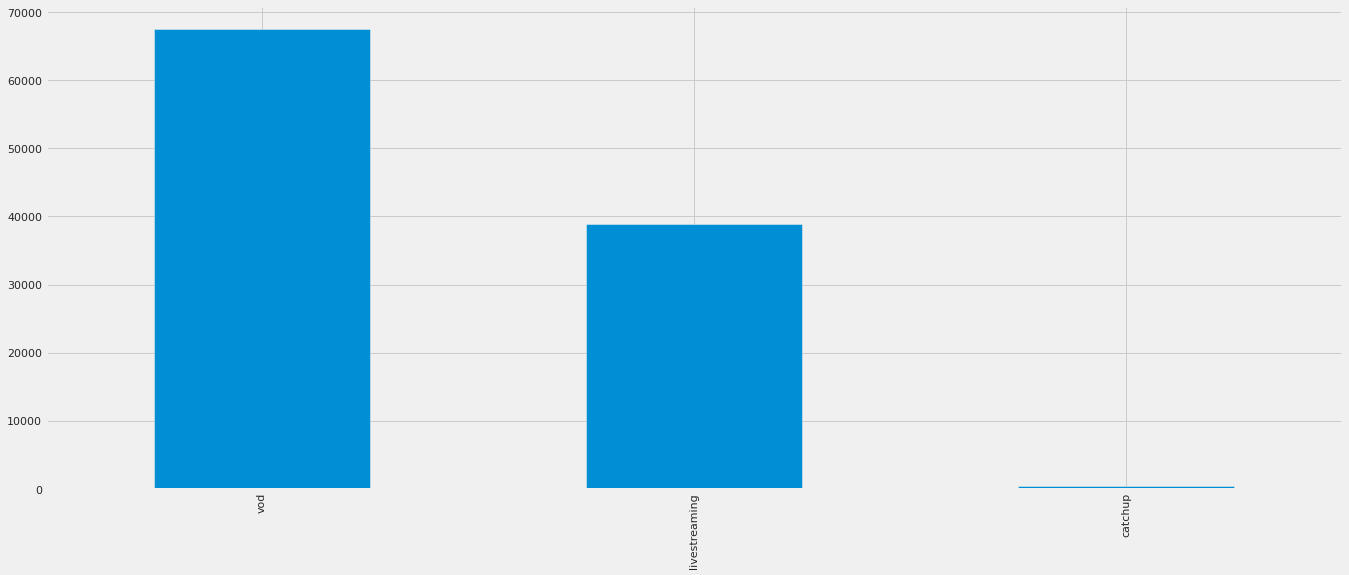

stream_type


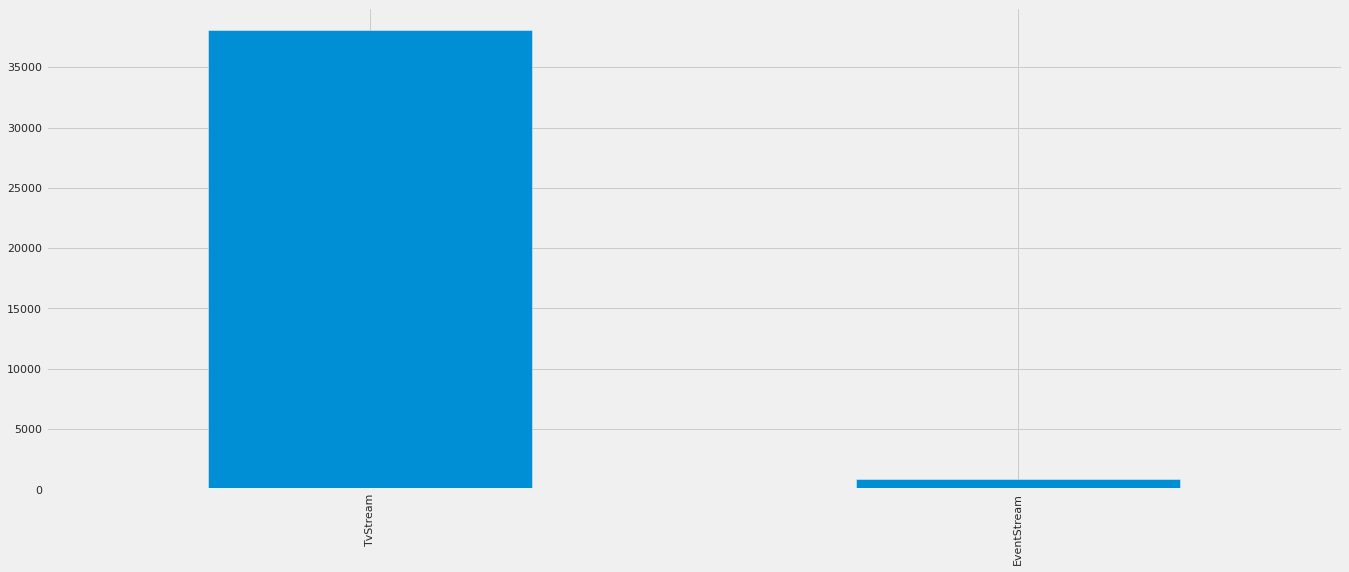

category_name


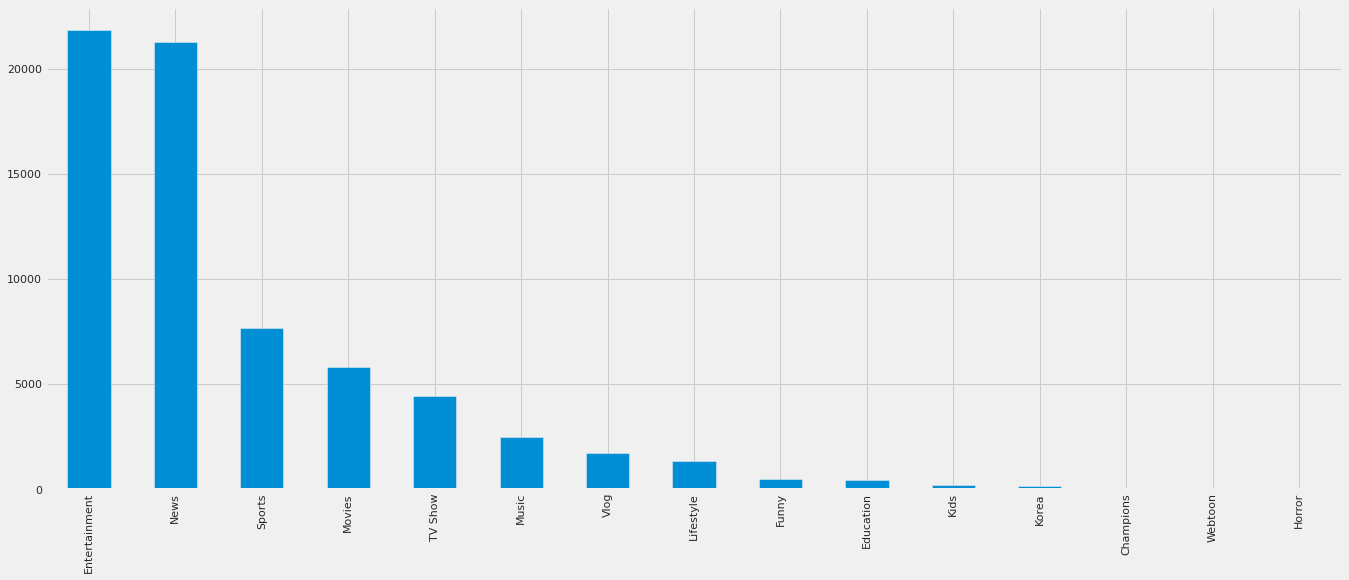

In [6]:
#untuk mempermudah melihat pattern, gunakan visualisasi
for i in low_cardinality:
    print(i)
    df[i].value_counts().plot.bar()
    plt.show()

In [7]:
#let's check categorical features which have high cardinality(nunique value > 100)
high_cardinality = [i for i in df.columns if(df[i].dtypes in ['O','bool'])&(df[i].nunique()>100)]
high_cardinality

['hash_content_id',
 'hash_play_id',
 'hash_visit_id',
 'hash_watcher_id',
 'hash_film_id',
 'hash_event_id',
 'play_time',
 'end_time',
 'referrer',
 'os_version',
 'browser_version',
 'app_version',
 'title',
 'film_title',
 'season_name',
 'genre_name']

In [8]:
#karena variabel yang diawali hash merupakan id(baik id film, user, dll)
#pisahkan hash_ dengan categorical feature lainnya
hash_features = [i for i in high_cardinality if 'hash' in i] 
hash_features

['hash_content_id',
 'hash_play_id',
 'hash_visit_id',
 'hash_watcher_id',
 'hash_film_id',
 'hash_event_id']

In [9]:
# pisahkan juga kolom playtime dan endtime karena kedua var tersebut merupakan
# datetime var
time_features = [i for i in high_cardinality if 'time' in i] 
time_features

['play_time', 'end_time']

In [10]:
high_cardinality = [i for i in high_cardinality if (i not in time_features )and (i not in hash_features)] 
high_cardinality

['referrer',
 'os_version',
 'browser_version',
 'app_version',
 'title',
 'film_title',
 'season_name',
 'genre_name']

referrer


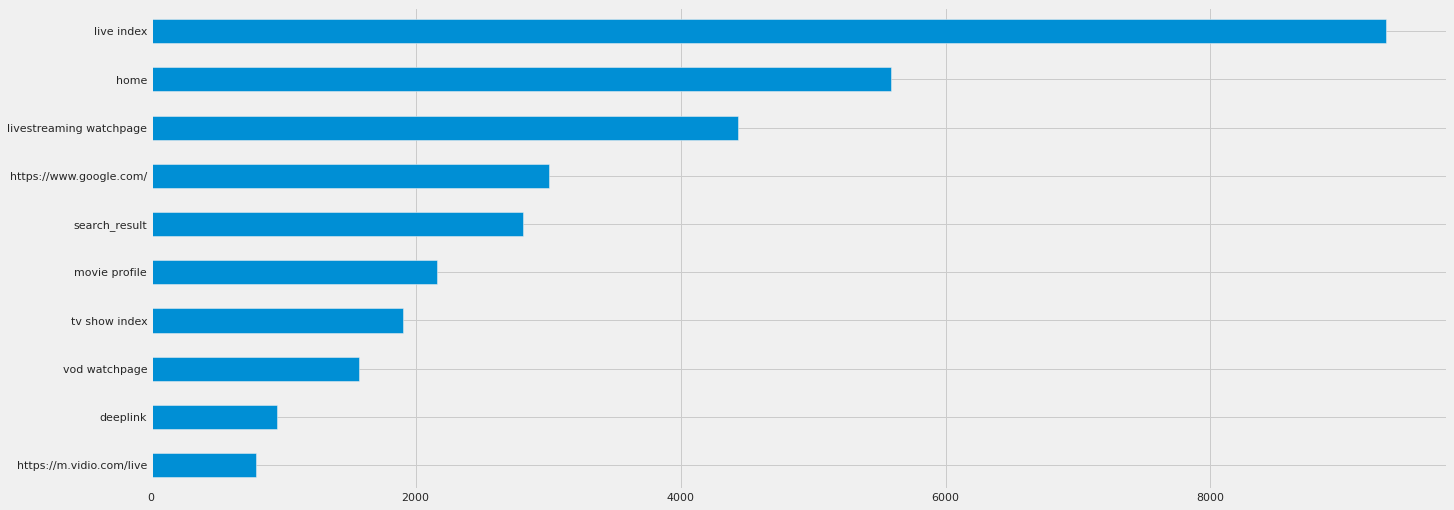

os_version


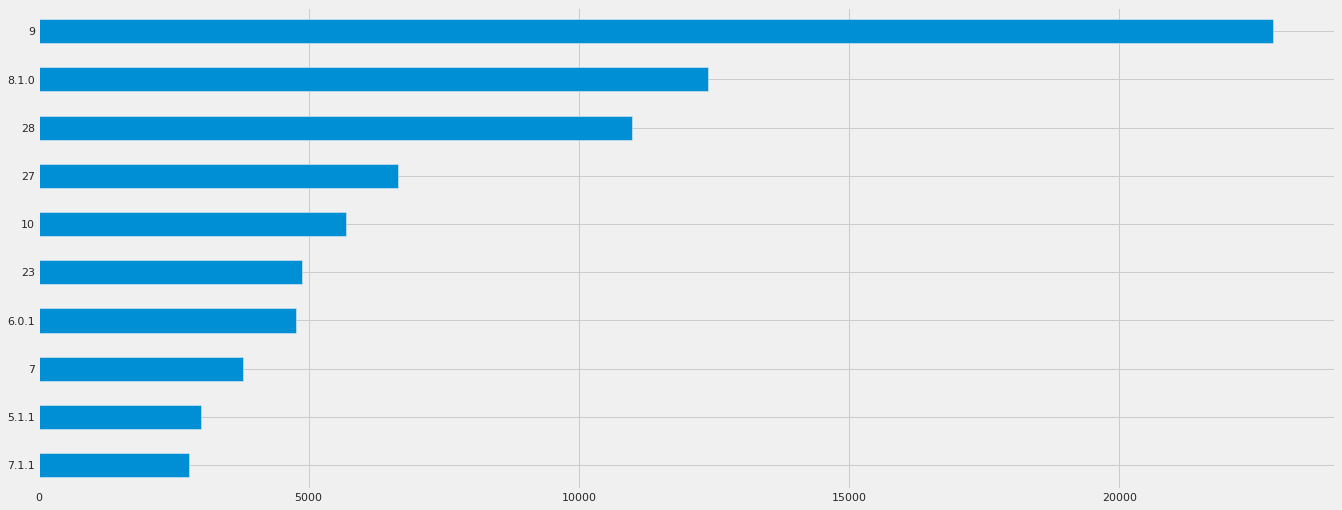

browser_version


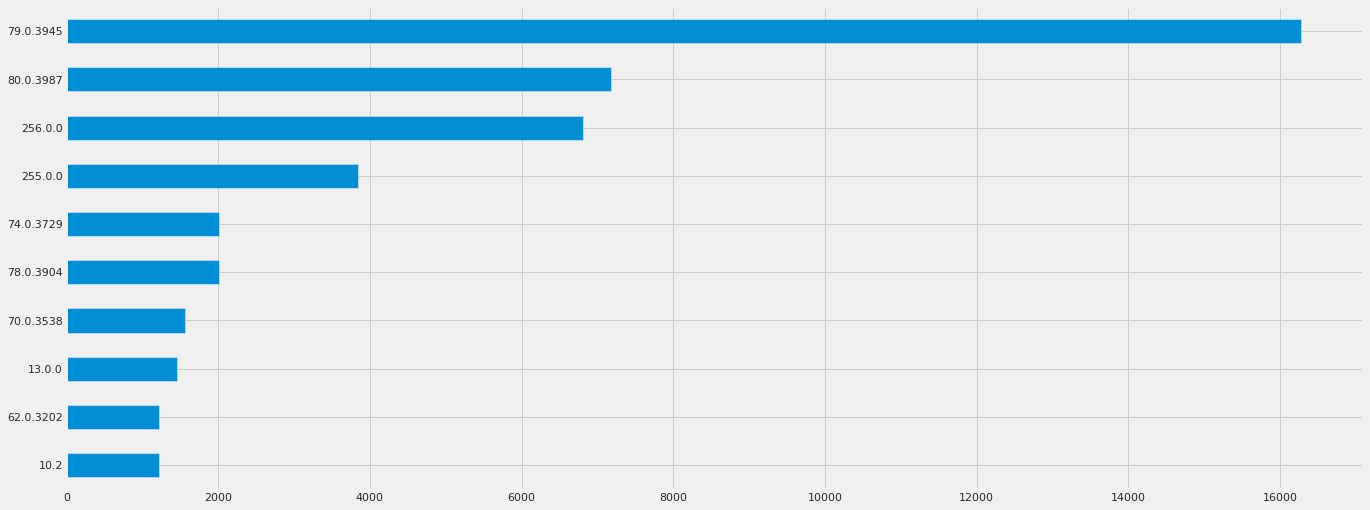

app_version


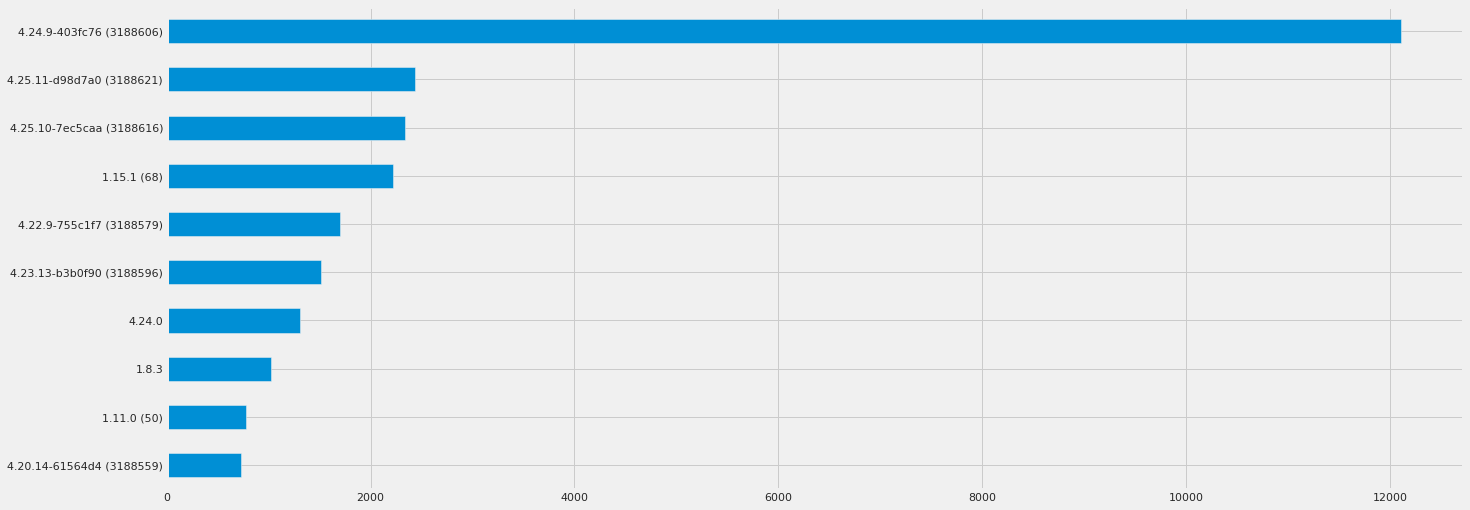

title


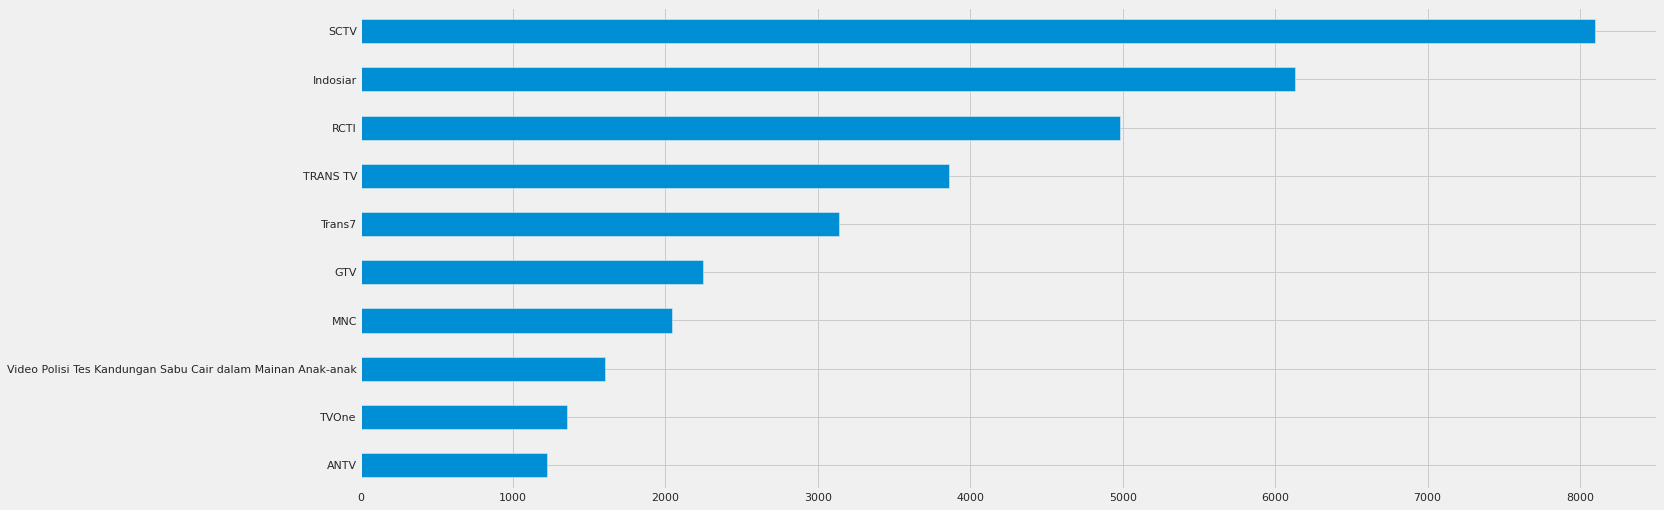

film_title


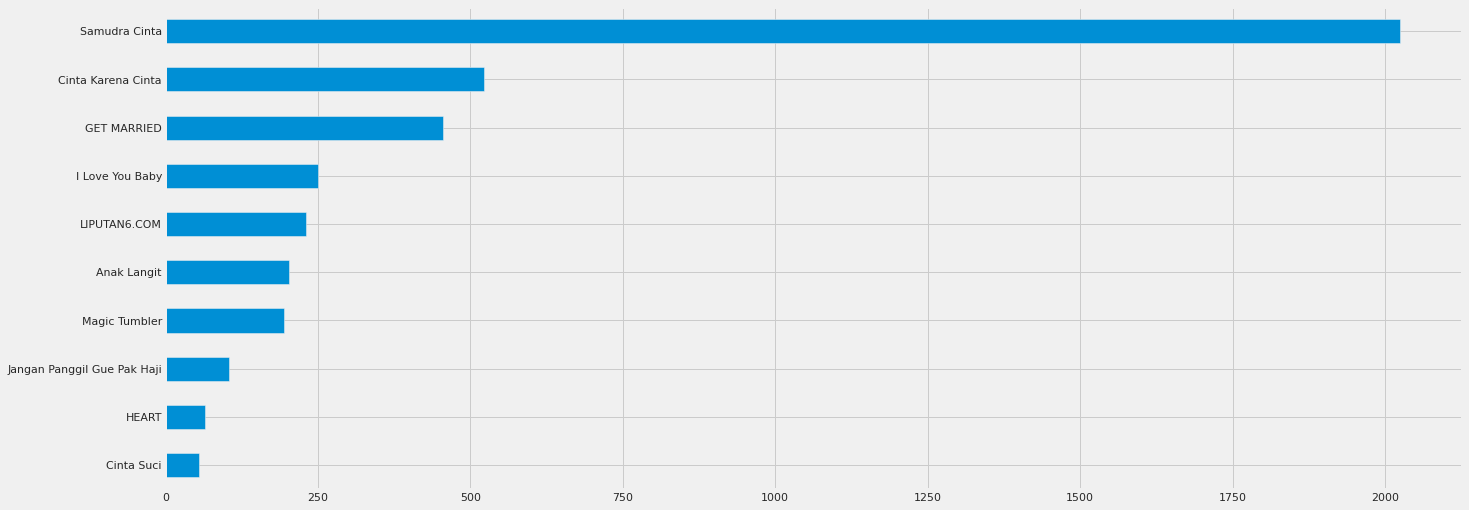

season_name


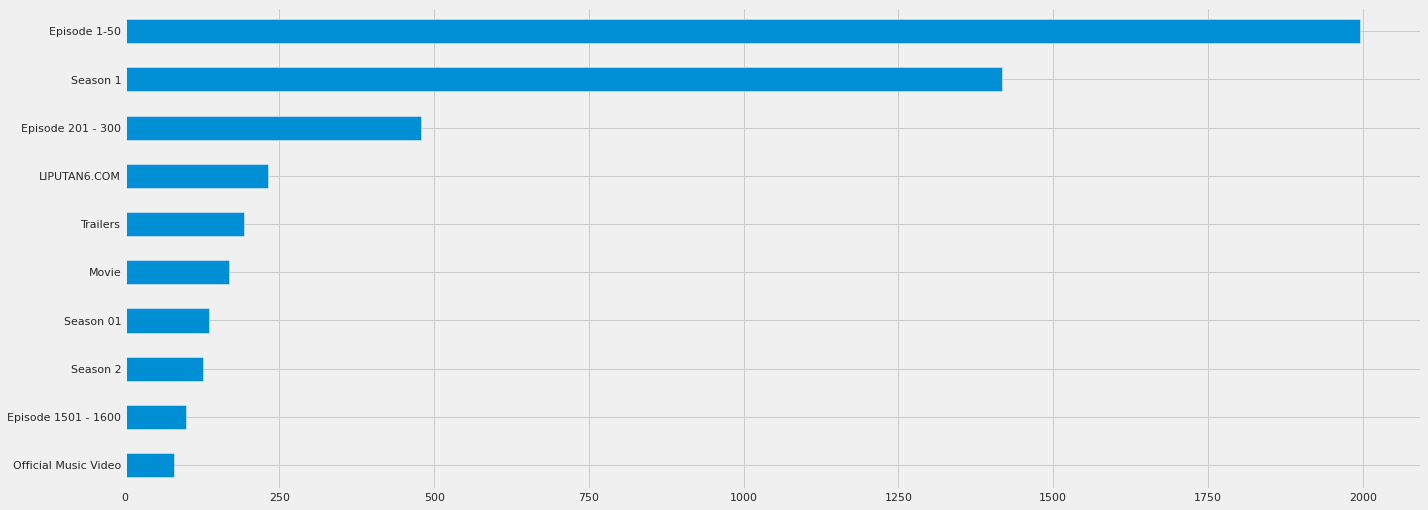

genre_name


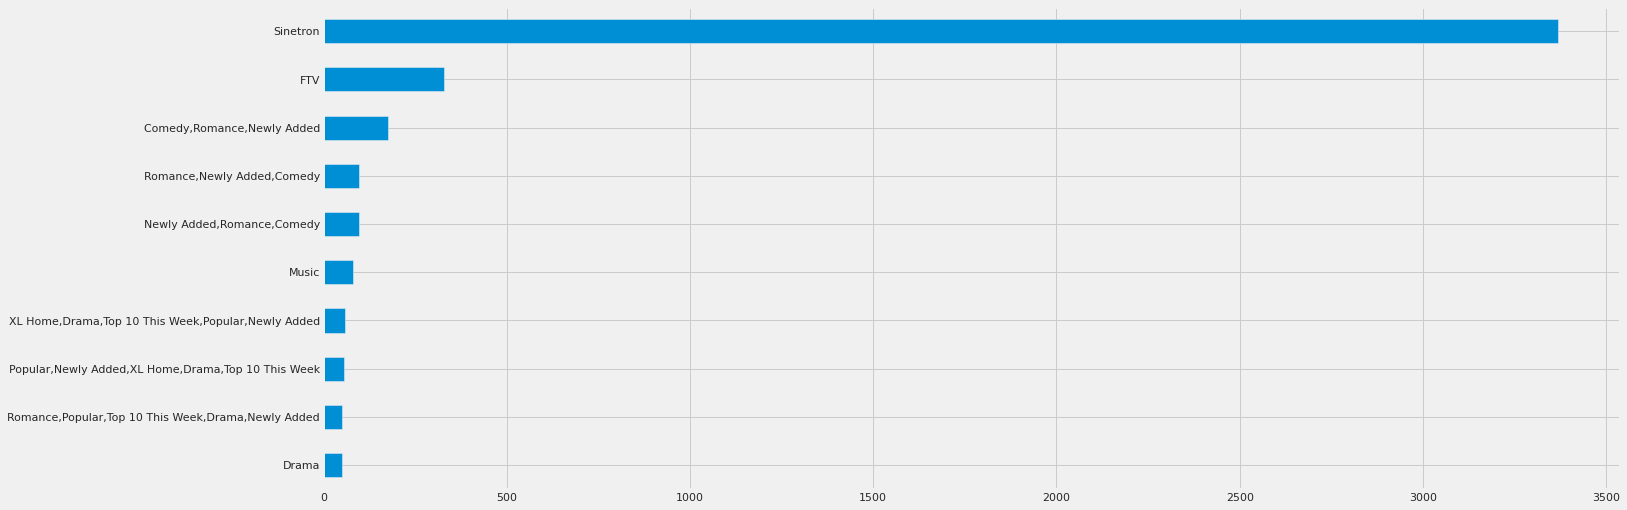

In [11]:
for i in high_cardinality:
    print(i)
    df[i].value_counts().head(10).sort_values().plot.barh()
    plt.show()

In [12]:
# untuk variabel play_time dan end_time, ubah format datetimenya menjadi YY-MM-DD HH:mm:SS
def time_split(var):
    temp = df.copy()
    temp[f'{var}_date'] = temp[var].apply(lambda x:x.split('T')[0])
    temp[f'{var}_time'] = temp[var].apply(lambda x:x.split('T')[1].split('.')[0])
    temp[var] = pd.to_datetime(temp[[f'{var}_date',f'{var}_time']].agg(' '.join,axis = 1))
    return temp[var]

In [13]:
# karena saya malas untuk nguli, maka saya memanfaatkan loop
for i in time_features:
    df[i] = time_split(i)

In [14]:
df.sample(5)

hash_content_id  ...             genre_name
36357  fc56dbc6d4652b315b86b71c8d688c1ccdea9c5f1fd077...  ...                    NaN
87818  b85a4cc54bd99f72aff2323e55d5af72c895866ef468ae...  ...  UEFA Champions League
41178  b07bc240bf40301d61a1bb3239373f74f469f52ce50dce...  ...               Sinetron
93475  4a1815c5cb8e8653a6eeef2600e5d2a12b74c5bdaec050...  ...                    NaN
83484  367461e6dd07bdb57342cb64b2a8d8e0fa13c53842a95e...  ...                    NaN

[5 rows x 41 columns]

In [15]:
#cek cardinality from play_time feature 
print('unique year :',df['play_time'].apply(lambda x:x.year).nunique())
print('unique month :',df['play_time'].apply(lambda x:x.month).nunique())
print('unique day :',df['play_time'].apply(lambda x:x.day).nunique())
print('unique hour :',df['play_time'].apply(lambda x:x.hour).nunique())

unique year : 1
unique month : 1
unique day : 16
unique hour : 24


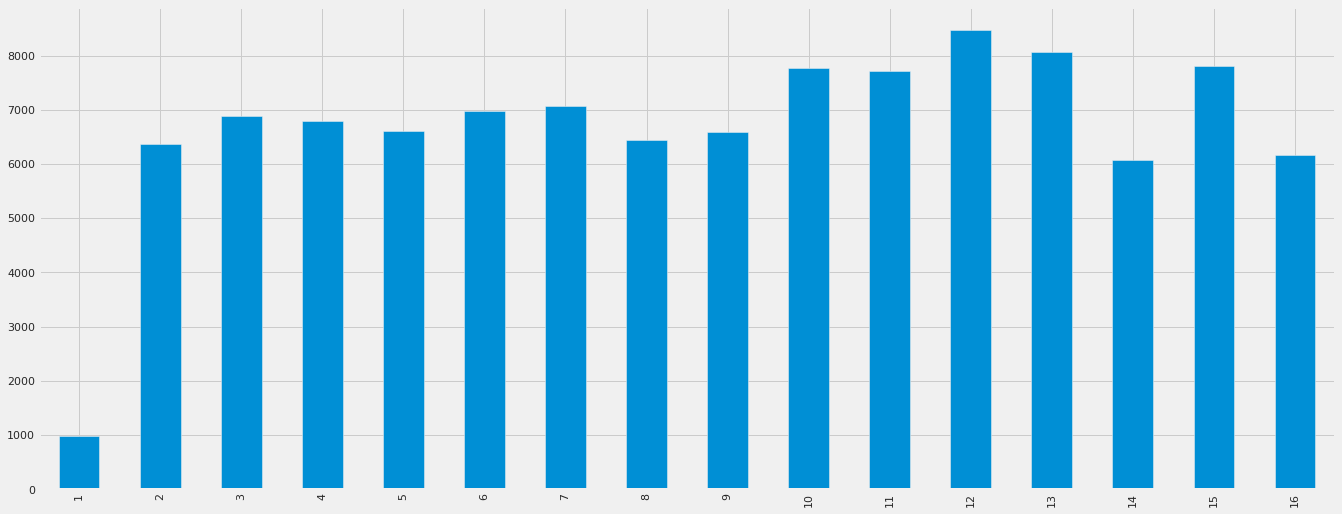

In [16]:
#cek distribusi waktu(tanggal) menonton
df['play_time_date'] = df['play_time'].apply(lambda x:x.day)
df['play_time_date'].value_counts(sort = False).plot.bar()
plt.show()

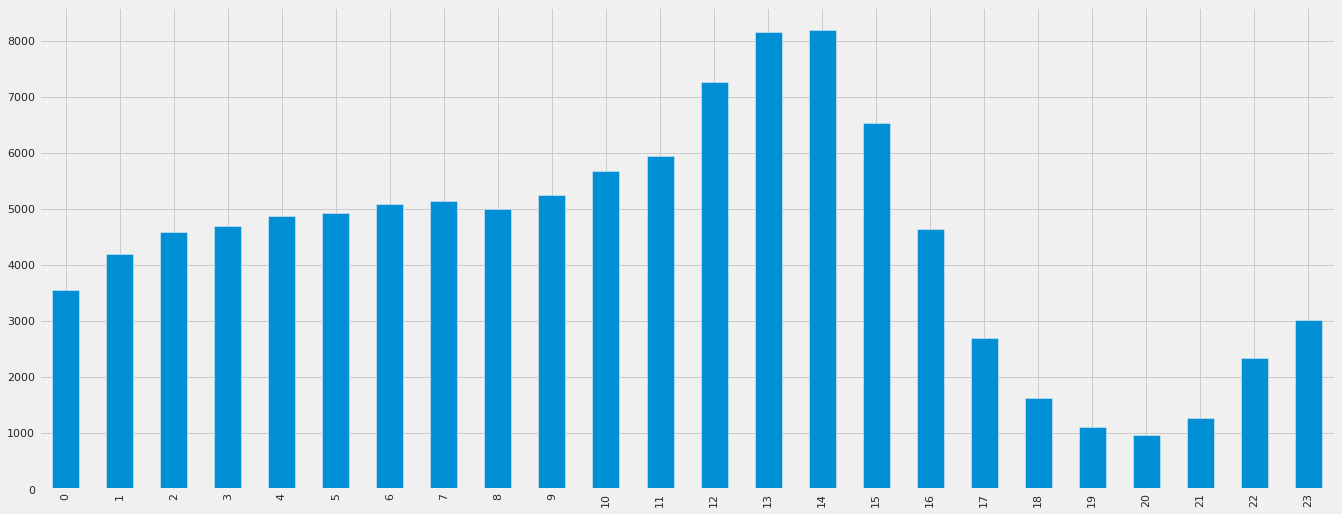

In [17]:
#cek distribusi waktu(jam) menonton
df['play_time_hour'] = df['play_time'].apply(lambda x:x.hour)
df['play_time_hour'].value_counts(sort = False).plot.bar()
plt.show()

In [18]:
day_list = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
position = [i for i in range(7)]
df['weekday'] = df['play_time'].dt.dayofweek

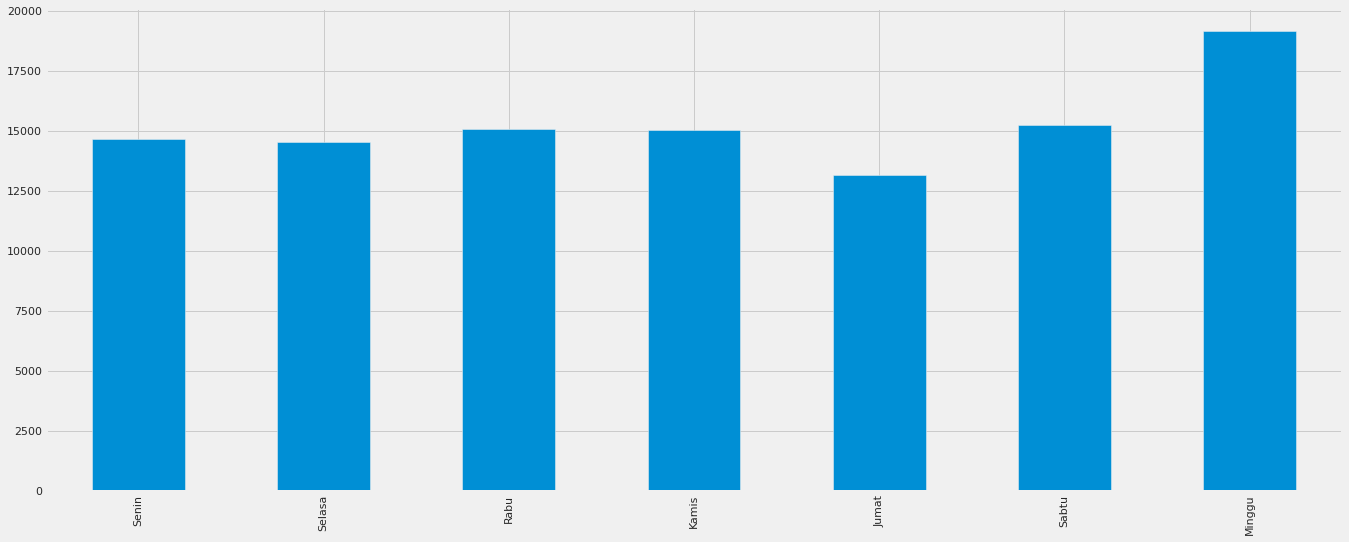

In [19]:
df['weekday'].value_counts(sort = False).plot.bar()
plt.xticks(position, day_list)
plt.show()

In [20]:
non_unique_hash = [] #capture columns that have repetitive value
unique_hash = [] #capture every columns that don't have repetitive value
for i in hash_features:
    if df[i].nunique()==len(df):
        unique_hash.append(i)
    else:
        non_unique_hash.append(i)
print('non unique: ',' '.join(non_unique_hash))
print('unique: ',' '.join(unique_hash))

non unique:  hash_content_id hash_visit_id hash_watcher_id hash_film_id
unique:  hash_play_id hash_event_id


In [21]:
content = df['hash_content_id'].value_counts().reset_index()
content.columns = ['hash_content_id','count']
content['hash_content_id'] = content['hash_content_id'].map(lambda x: x[:10])
content.head(10)

hash_content_id  count
0      fc56dbc6d4   8101
1      f8809aff4d   6130
2      9ae8f17cfc   4981
3      367461e6dd   3861
4      c2a181d817   3142
5      93411f44e2   2246
6      8a9a02d73a   2044
7      5c539e6678   1604
8      5620e84be3   1354
9      3da6ee6699   1221

In [22]:
visit = df['hash_visit_id'].value_counts().reset_index()
visit.columns = ['hash_visit_id','count']
visit['hash_visit_id'] = visit['hash_visit_id'].map(lambda x: x[:10])
visit.head(10)

hash_visit_id  count
0    bf819a5a31      4
1    c3b4ee7dab      3
2    1072217b81      3
3    41fbbb81b9      3
4    09398825f8      3
5    7a8b83624c      3
6    d1f0419eb7      3
7    8f308da9fd      3
8    f18551edb8      3
9    79fc36ce9a      2

In [23]:
watcher = df['hash_watcher_id'].value_counts().reset_index()
watcher.columns = ['hash_watcher_id','count']
watcher = watcher.head(10)
watcher

hash_watcher_id  count
0  e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...    654
1  133af93c4a0191b2d31fecb34b7653836abe32b769be23...     32
2  83f4d120aaa71c673ceae6733feb59687272e7a00e2bc9...     25
3  b11d6374348cfff917a41543edf3ea128d9faa2d7667a6...     24
4  8909a84bbdd20a837c88977687efe839d0aac7c72891ba...     19
5  219e2b2c5ef39dbf7d4beebfa076b3c8cb233abc000664...     15
6  f6412c7764aec4826de4888462b7bb225833d48d544b62...     14
7  55505db6c235dbc298ab227db5ad123380e5e39cb4e995...     14
8  a8e1d40716829e08f1b3f5a8c64375ddb87d47fdd9b9dc...     12
9  4e6972d0d83046c5601773506b8f13009515deb45a0dcd...     11

In [24]:
film = df['hash_film_id'].value_counts().reset_index()
film.columns = ['hash_film_id','count']
film['hash_film_id'] = film['hash_film_id'].map(lambda x: x[0:5])
film.head(10)

hash_film_id  count
0        28955   2025
1        ddfe0    522
2        f53f2    455
3        d6723    250
4        6c0f3    231
5        200dd    202
6        a73ab    195
7        a6706    105
8        3f1bb     65
9        86573     55

In [25]:
#analisa data numerik, drop kolom city karena tidak ada data sama seklai
numeric = [i for i in df.columns if (df[i].dtypes in ['int','float'])&(i!='city')&('time' not in i)]
numeric

['average_bitrate',
 'total_bytes',
 'buffer_duration',
 'play_duration',
 'weekday']

In [26]:
df[numeric].describe()

average_bitrate   total_bytes  ...  play_duration        weekday
count    101865.000000  1.068110e+05  ...  106811.000000  106811.000000
mean     199406.240230  7.765342e+07  ...     425.431847       3.121111
std      141397.648432  4.683612e+08  ...    1541.638614       2.052169
min         144.000000  0.000000e+00  ...       0.000000       0.000000
25%         633.000000  7.500000e+02  ...       4.000000       1.000000
50%      300000.000000  5.062500e+05  ...      41.000000       3.000000
75%      300000.000000  1.125000e+07  ...     120.000000       5.000000
max      300000.000000  3.092062e+10  ...   82455.000000       6.000000

[8 rows x 5 columns]

average_bitrate


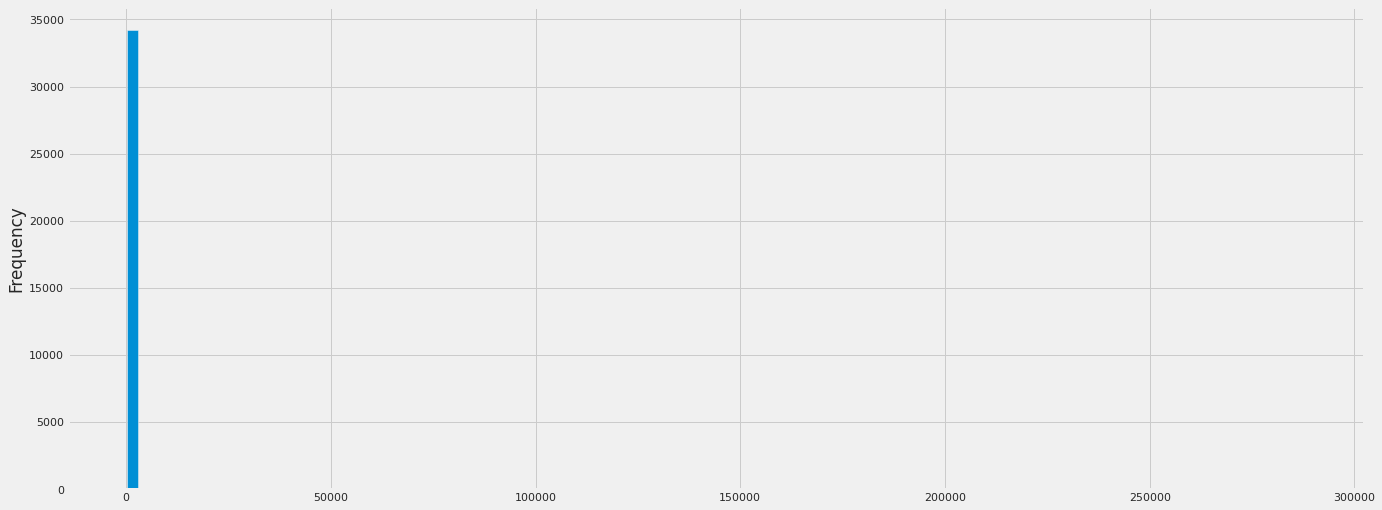

total_bytes


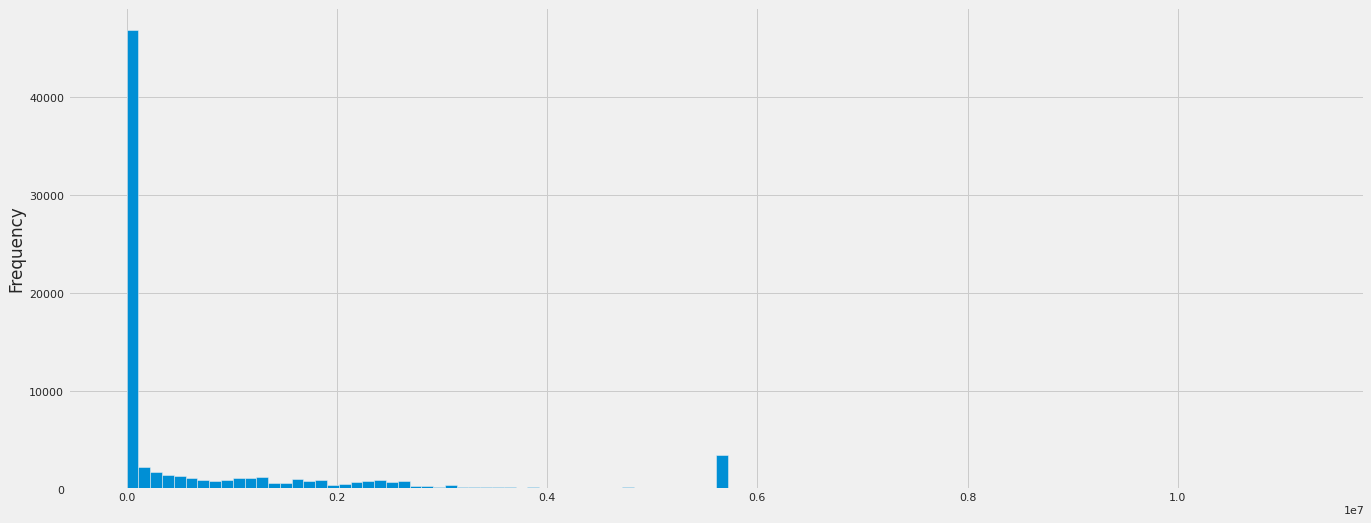

buffer_duration


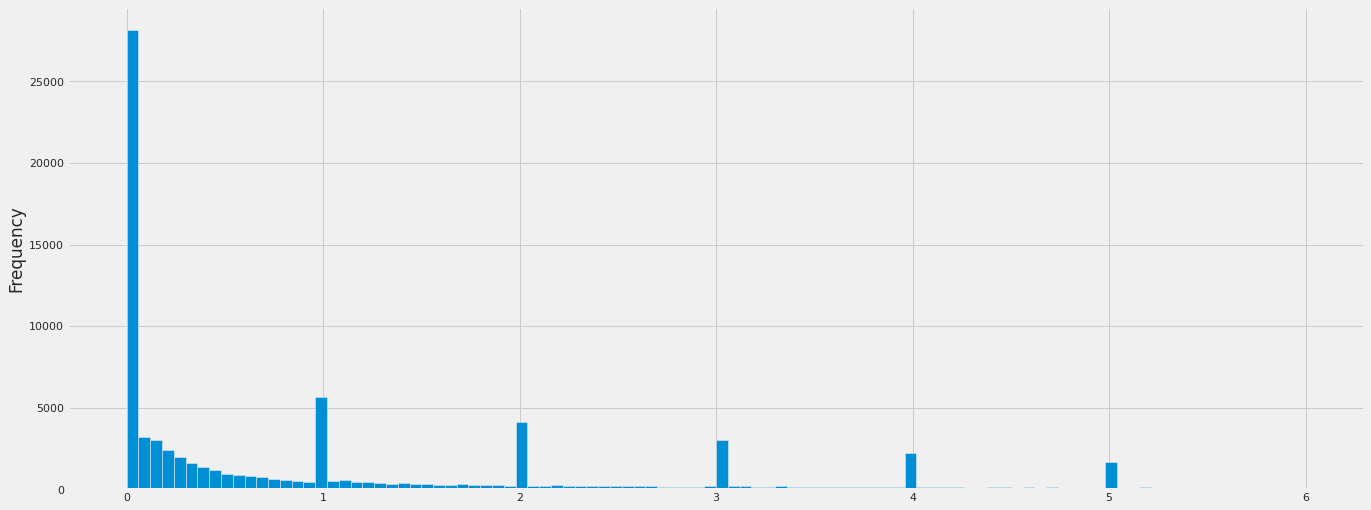

play_duration


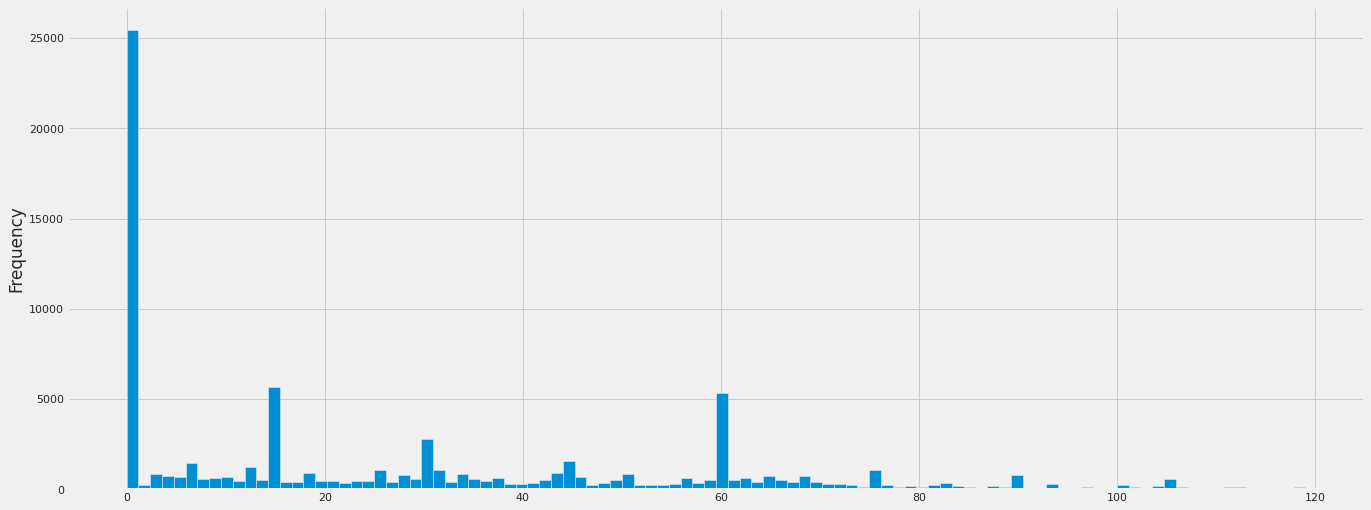

weekday


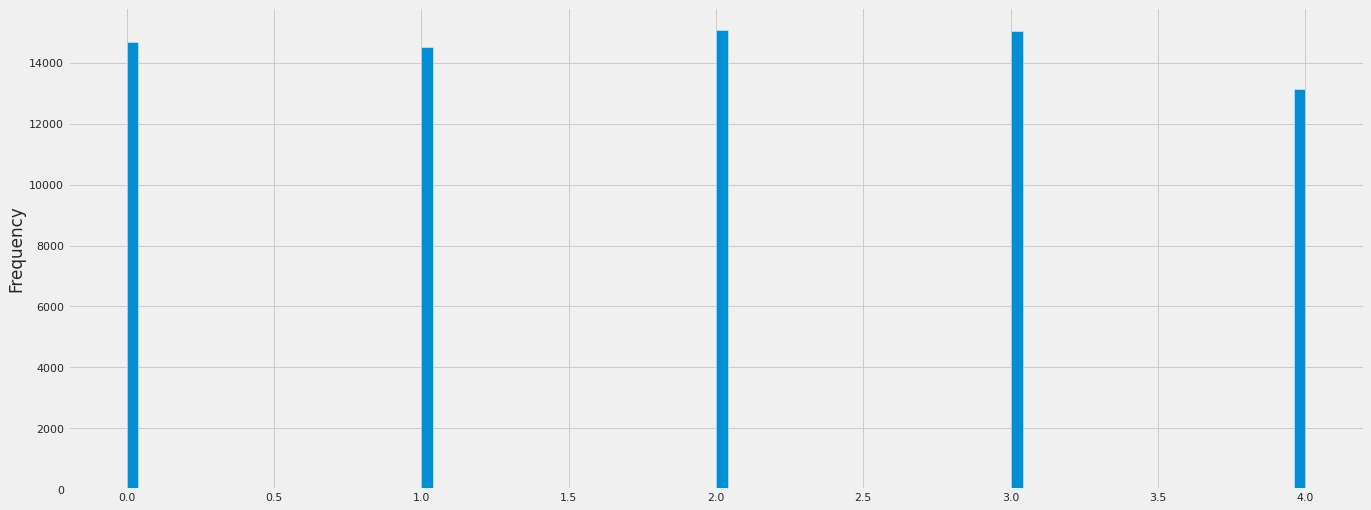

In [27]:
#karena jarak antara Q3 dan nilai maxnya cukup besar(kecuali bitrate), maka plot cuma sampe Q3 
#dengan tujuan untuk mempermudah analisa
for i in numeric:
    print(i)
    df[df[i]<df[i].quantile(q=0.75)][i].plot.hist(bins=100)
    plt.show()

In [ ]:
### beberapa goal yang menarik:
#### - Distribusi genre dan title perjamnya
#### - hash_watcher_id e3b0c(anomali yang kelewat anomali)
#### - Distribusi genre dan title per hari
#### - pola penonton(media,genre,jam)=>segmentasi penonton
#### - genre yang ditonton sampai selesai
#### - premium konten yang ditonton
#### - playduration sinetron lebih tinggi

In [28]:
#distribusi genre, title dan film yang di tonton berdasarkan jam

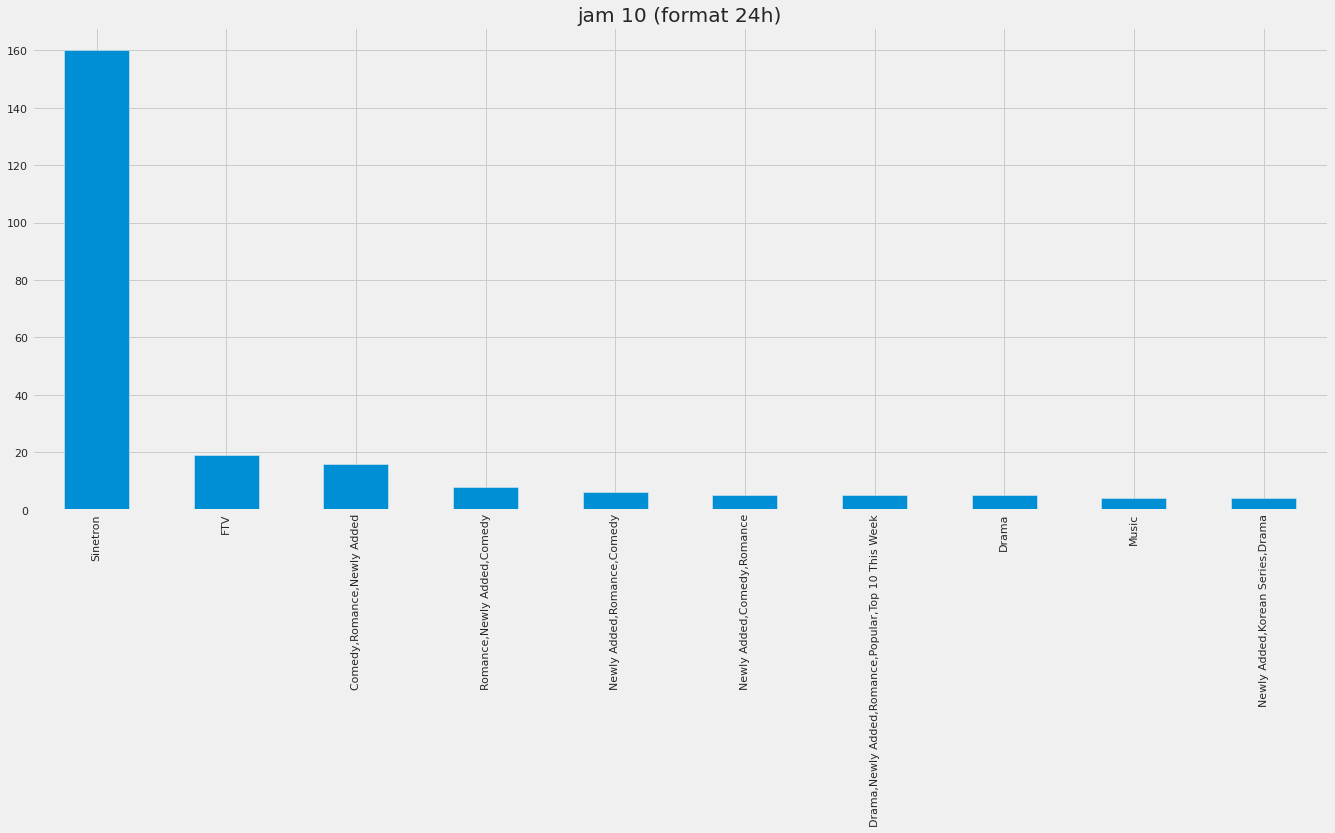

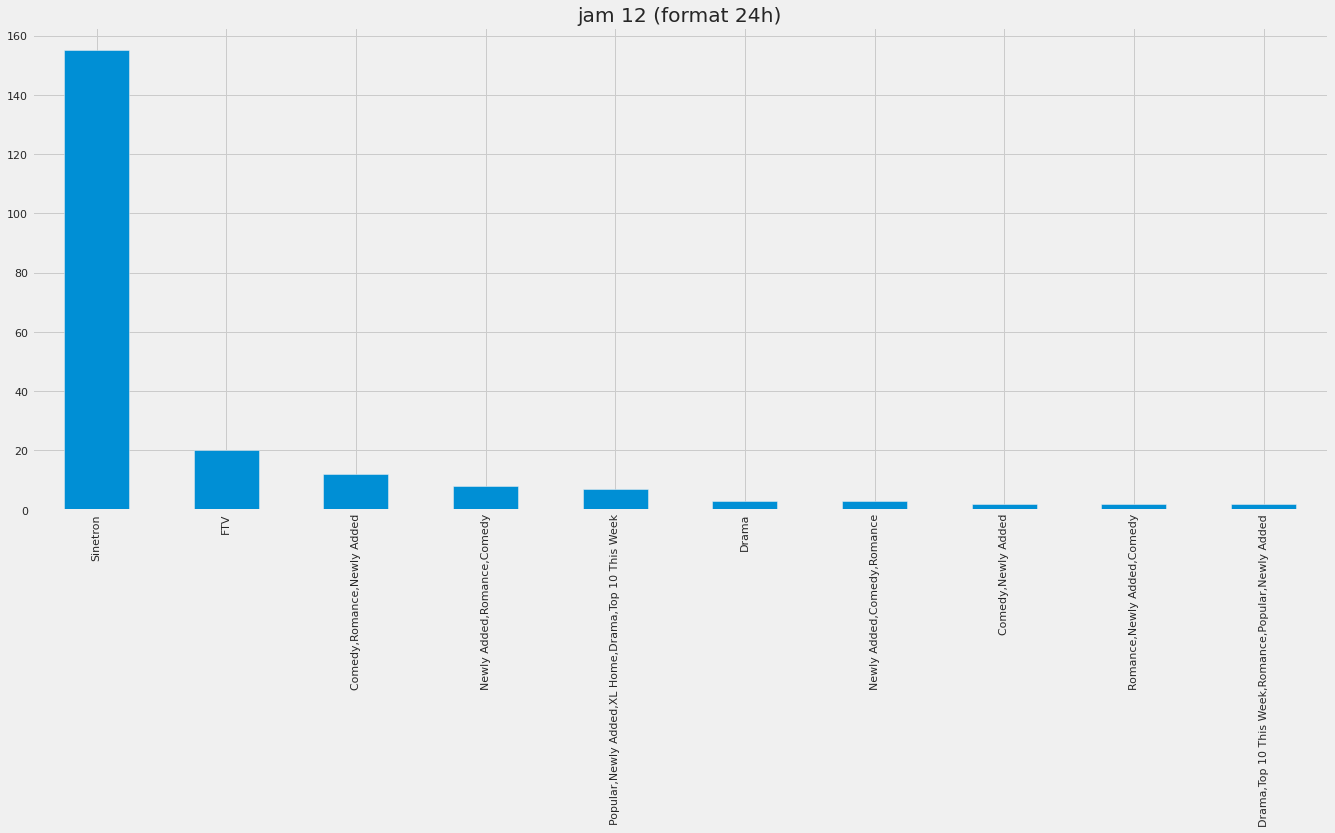

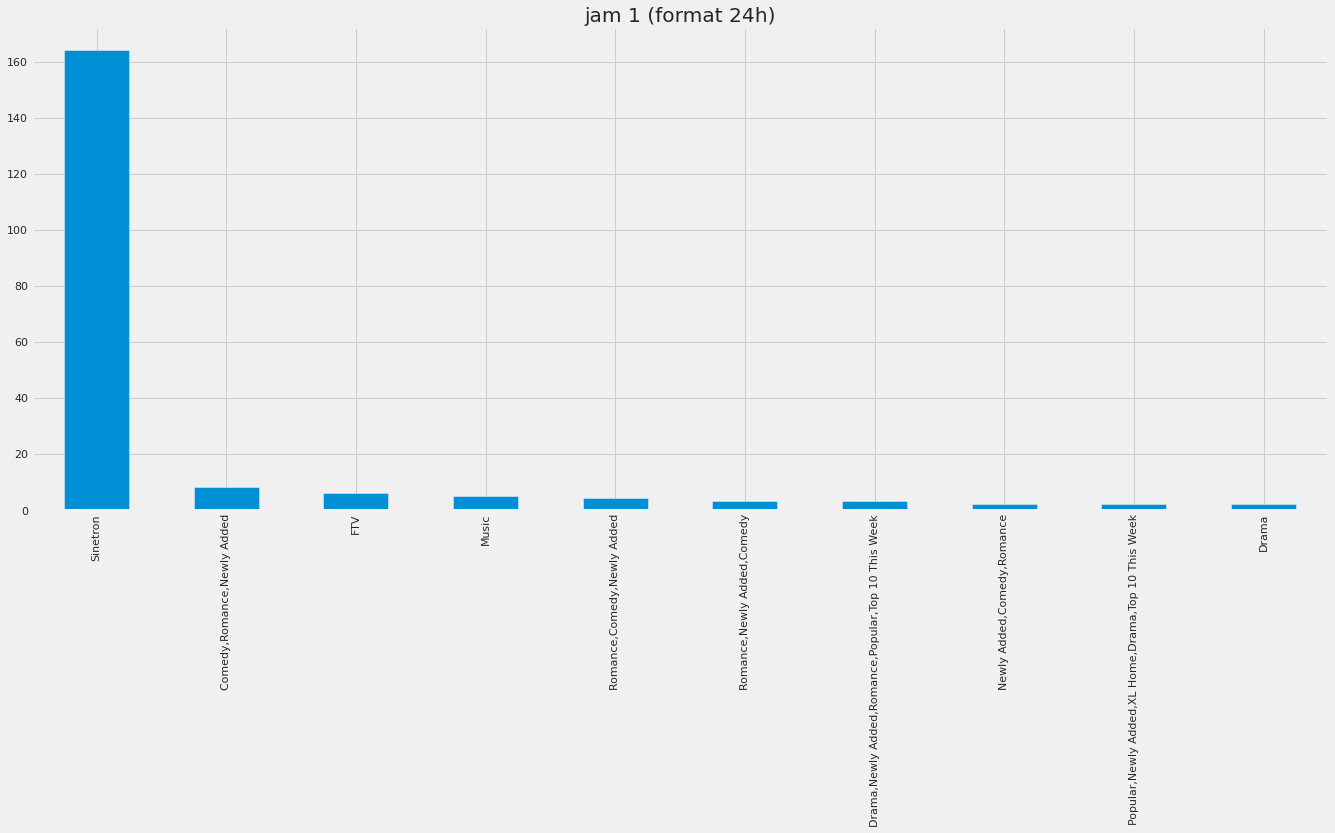

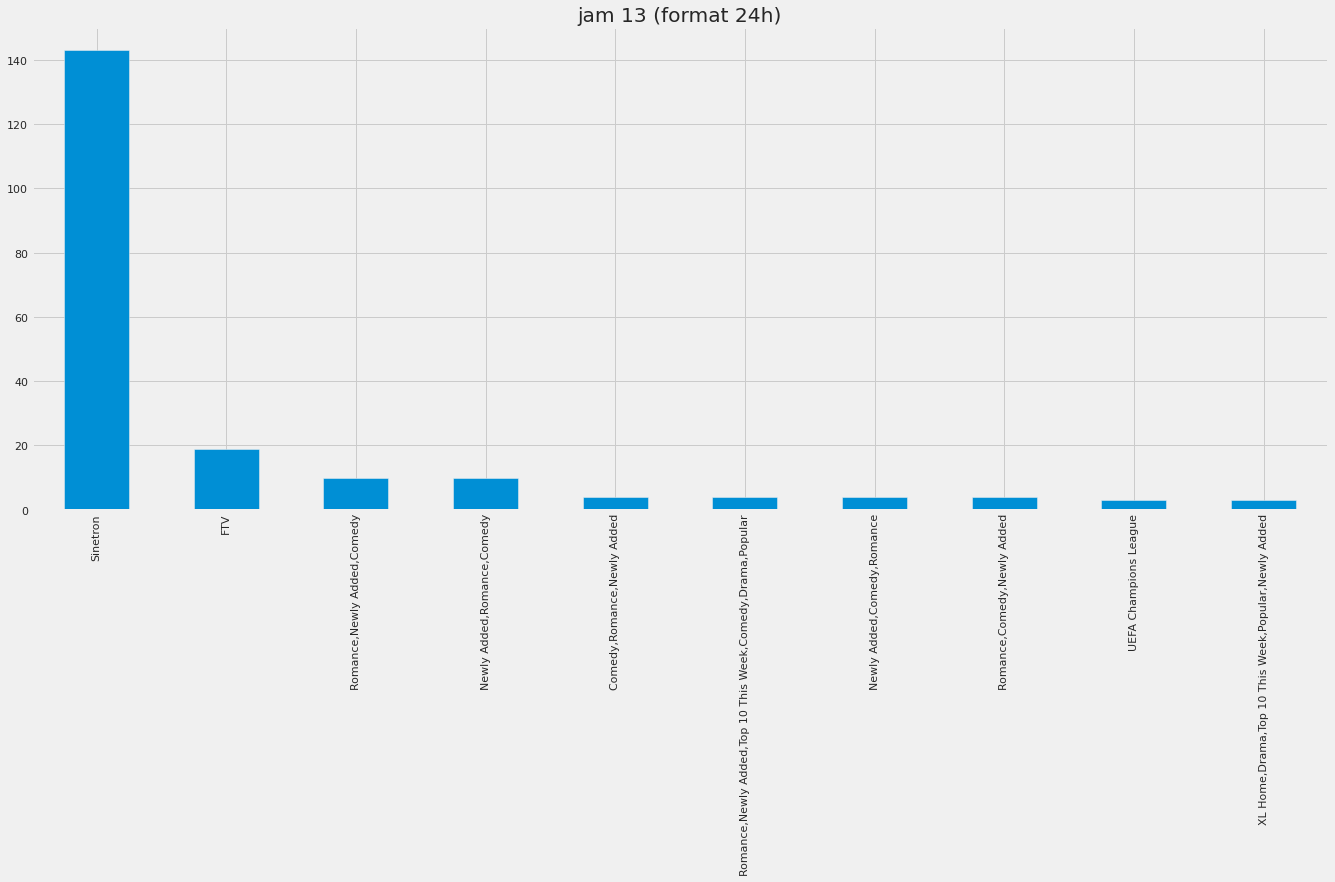

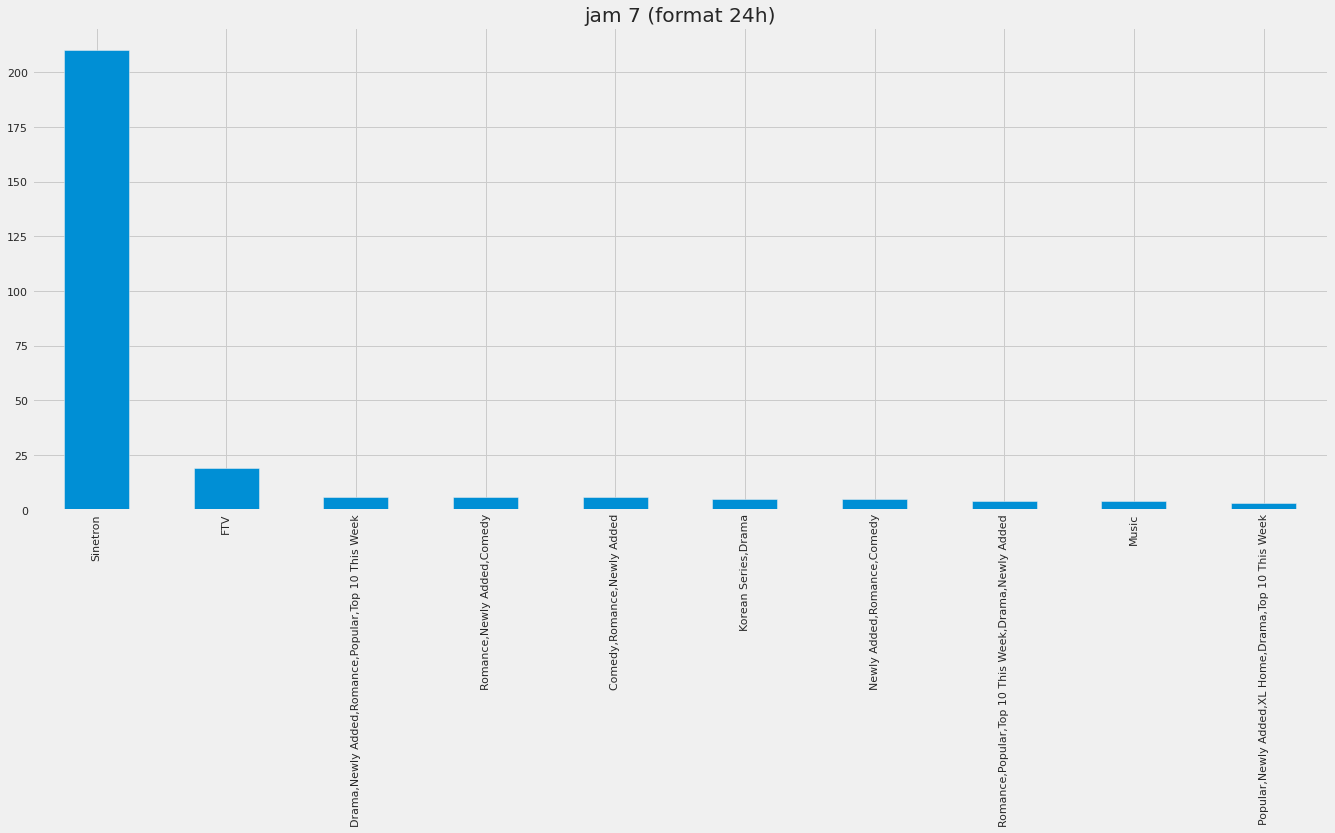

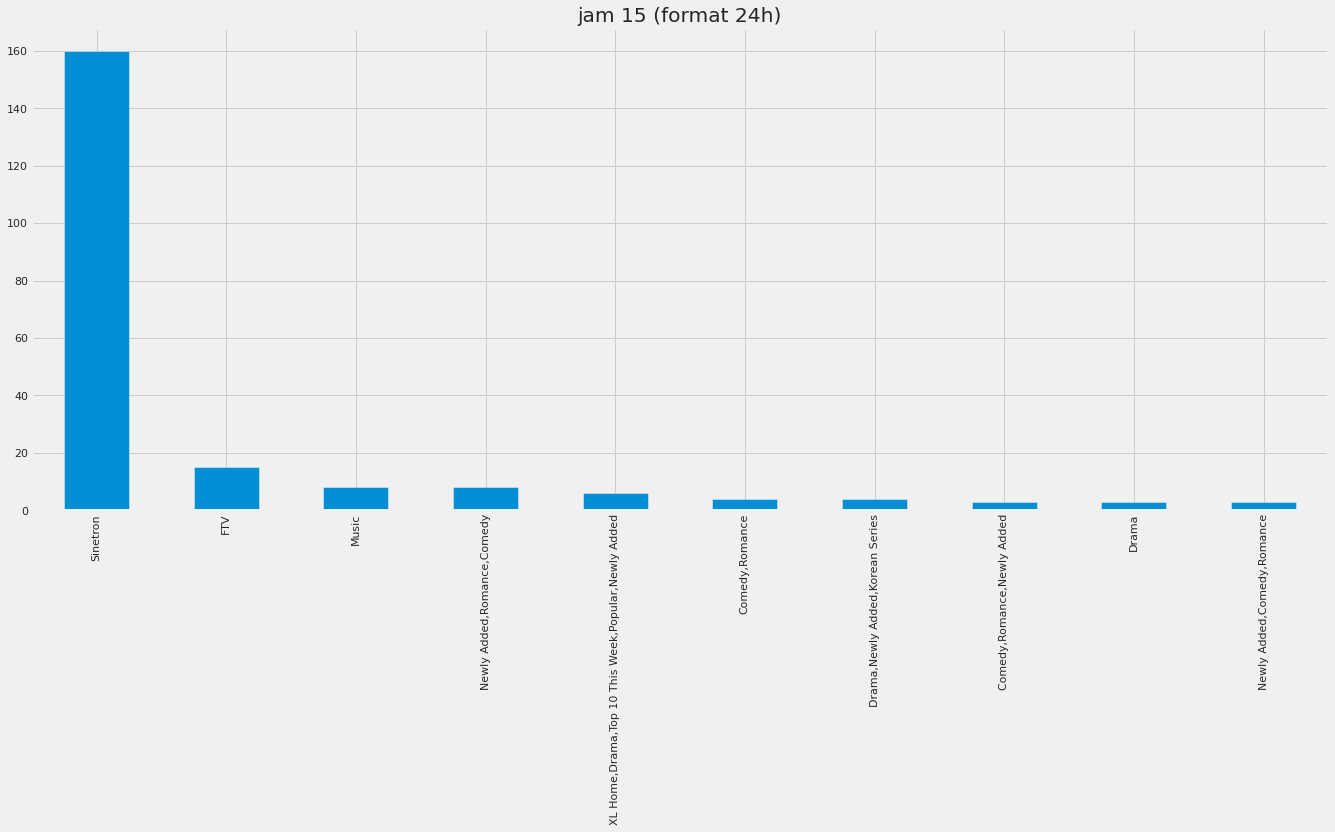

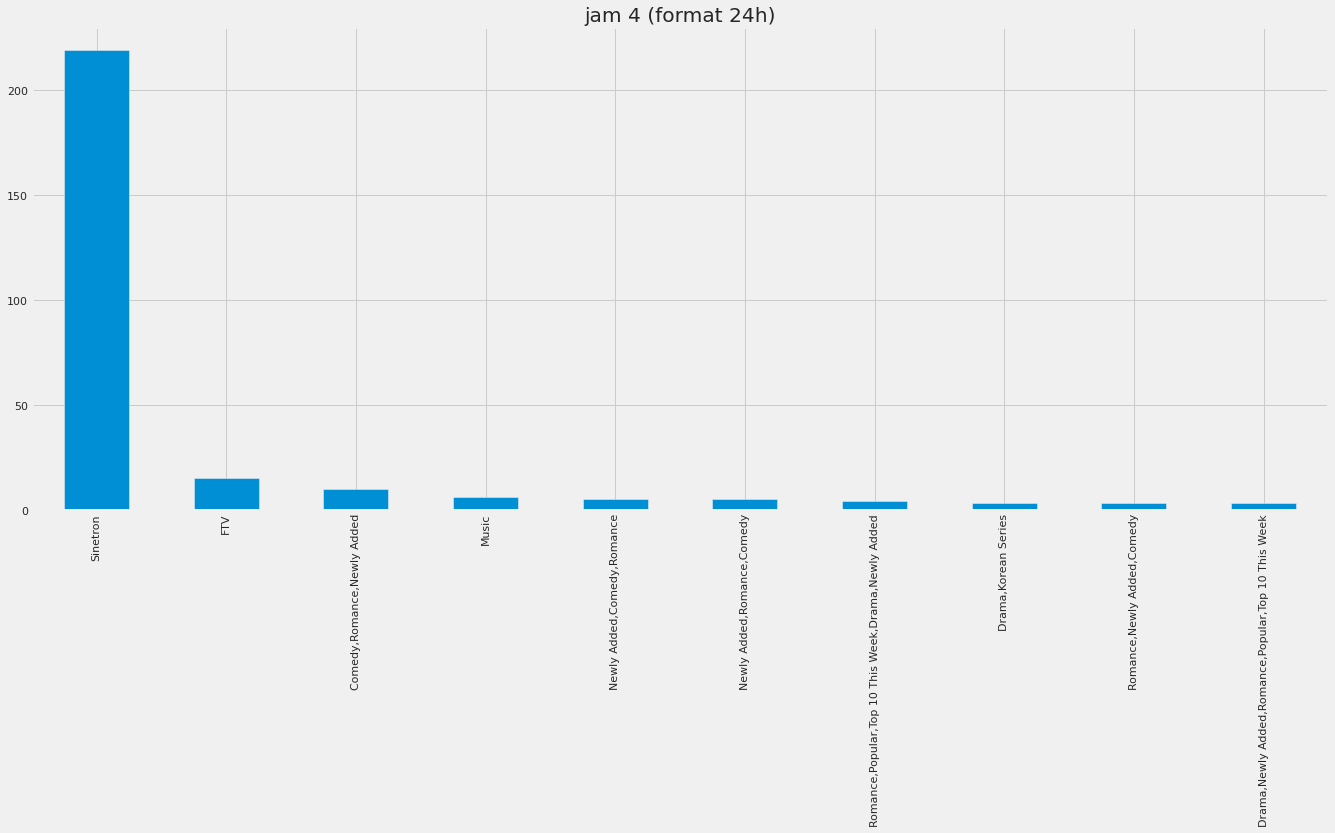

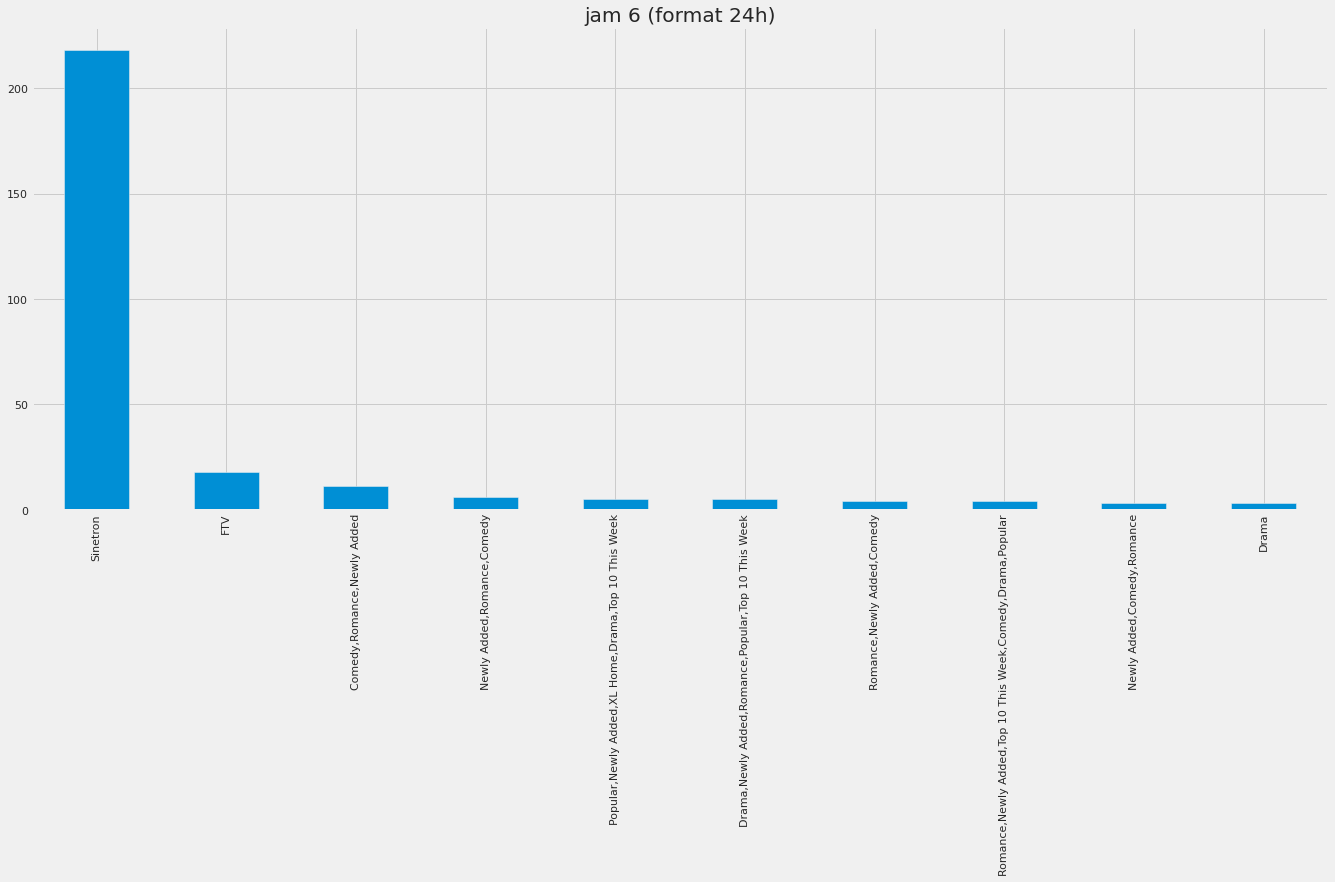

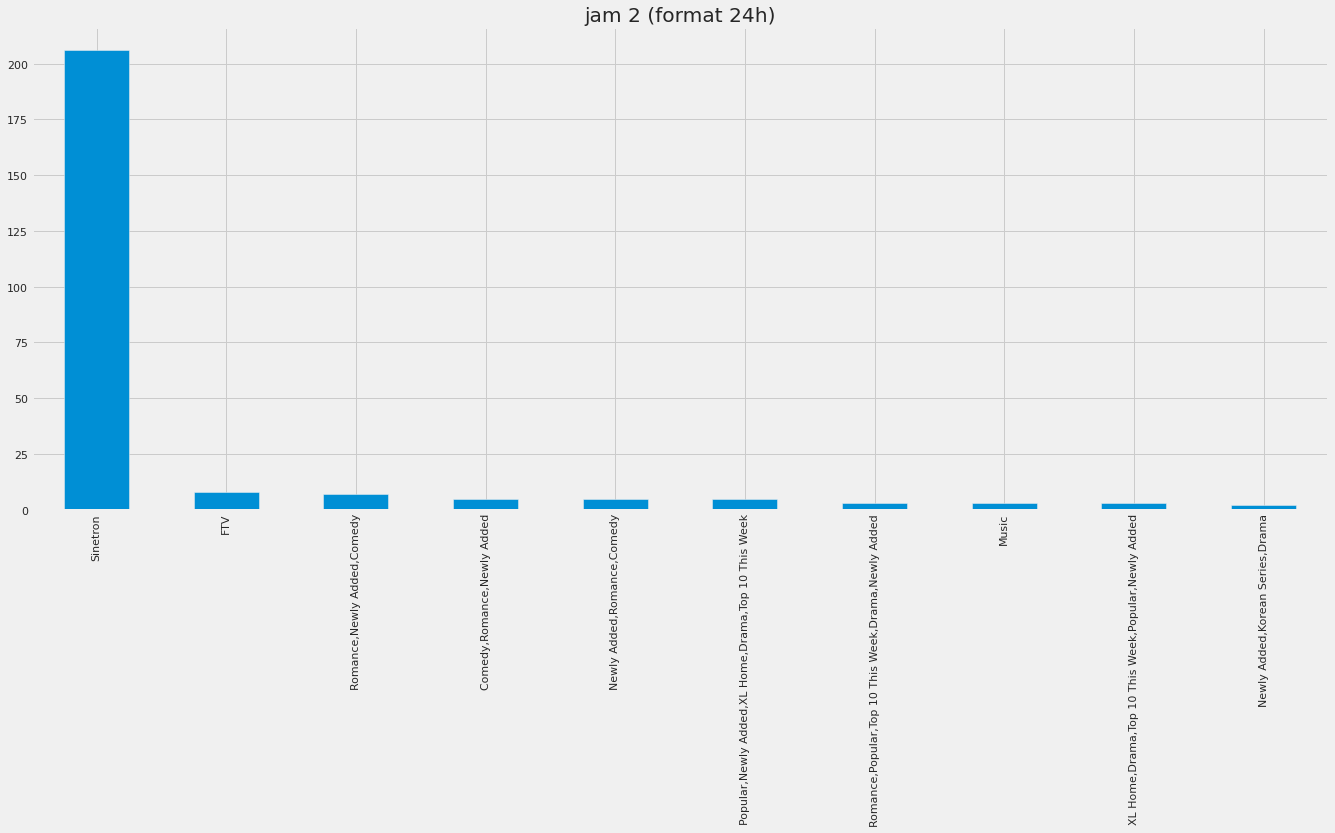

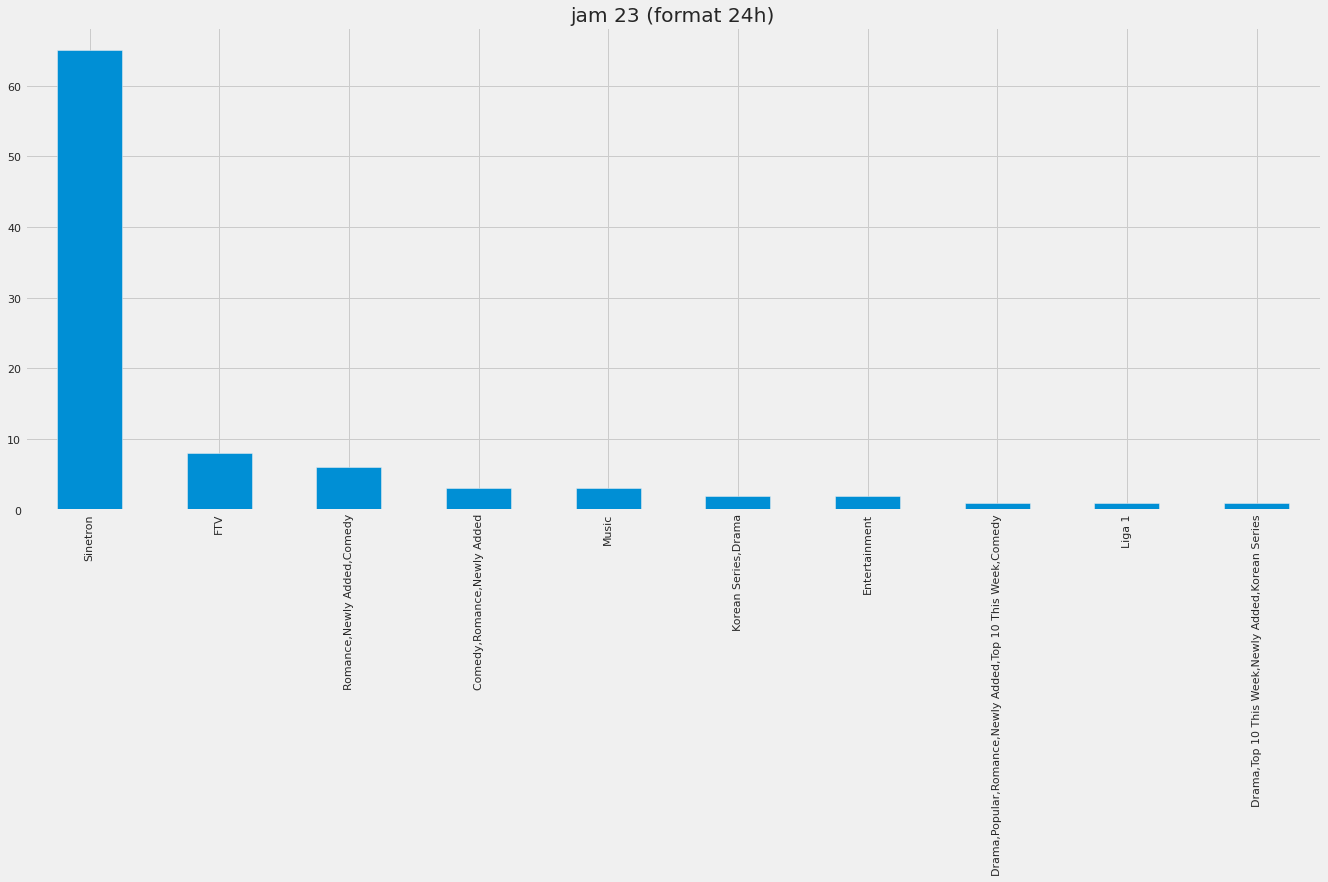

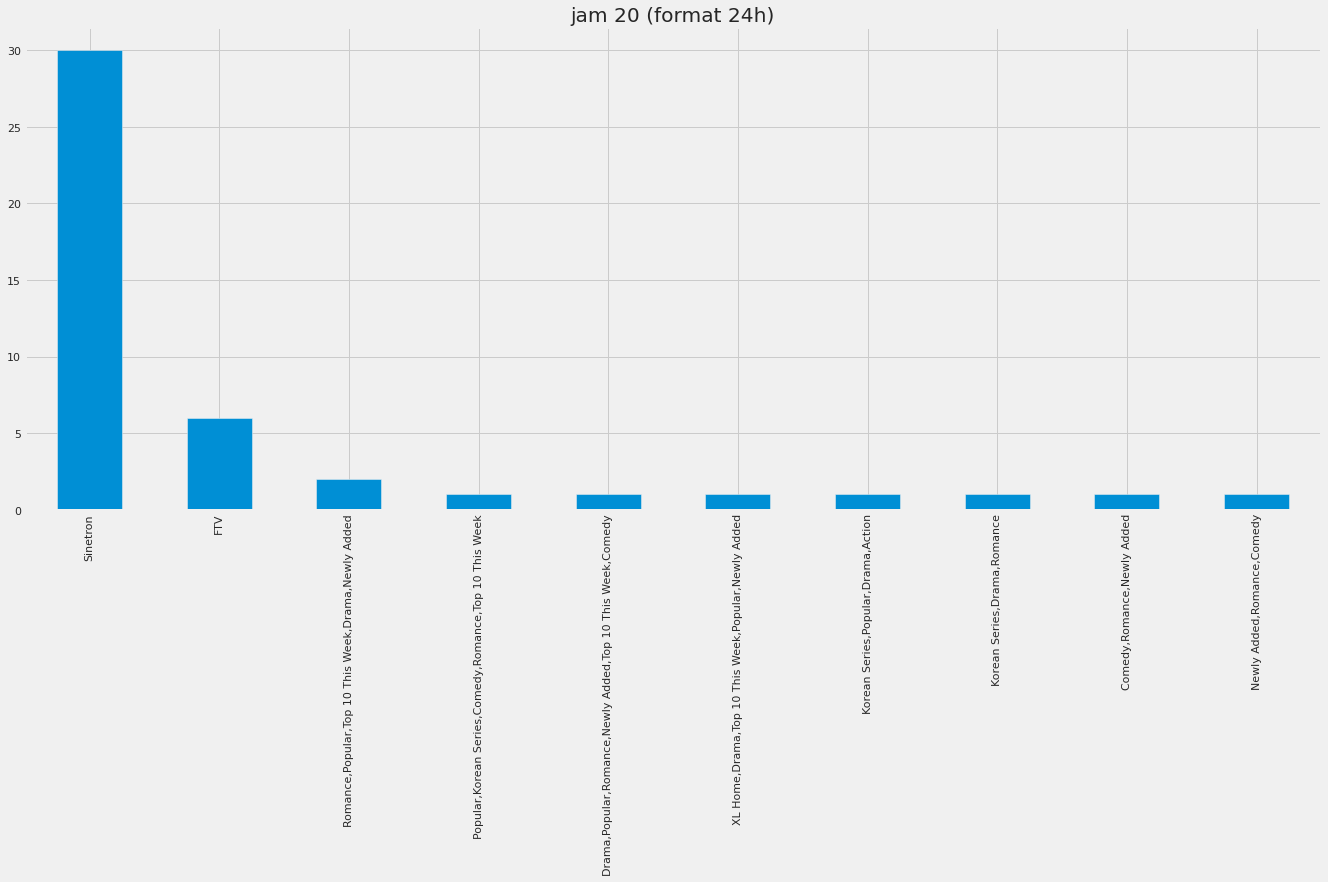

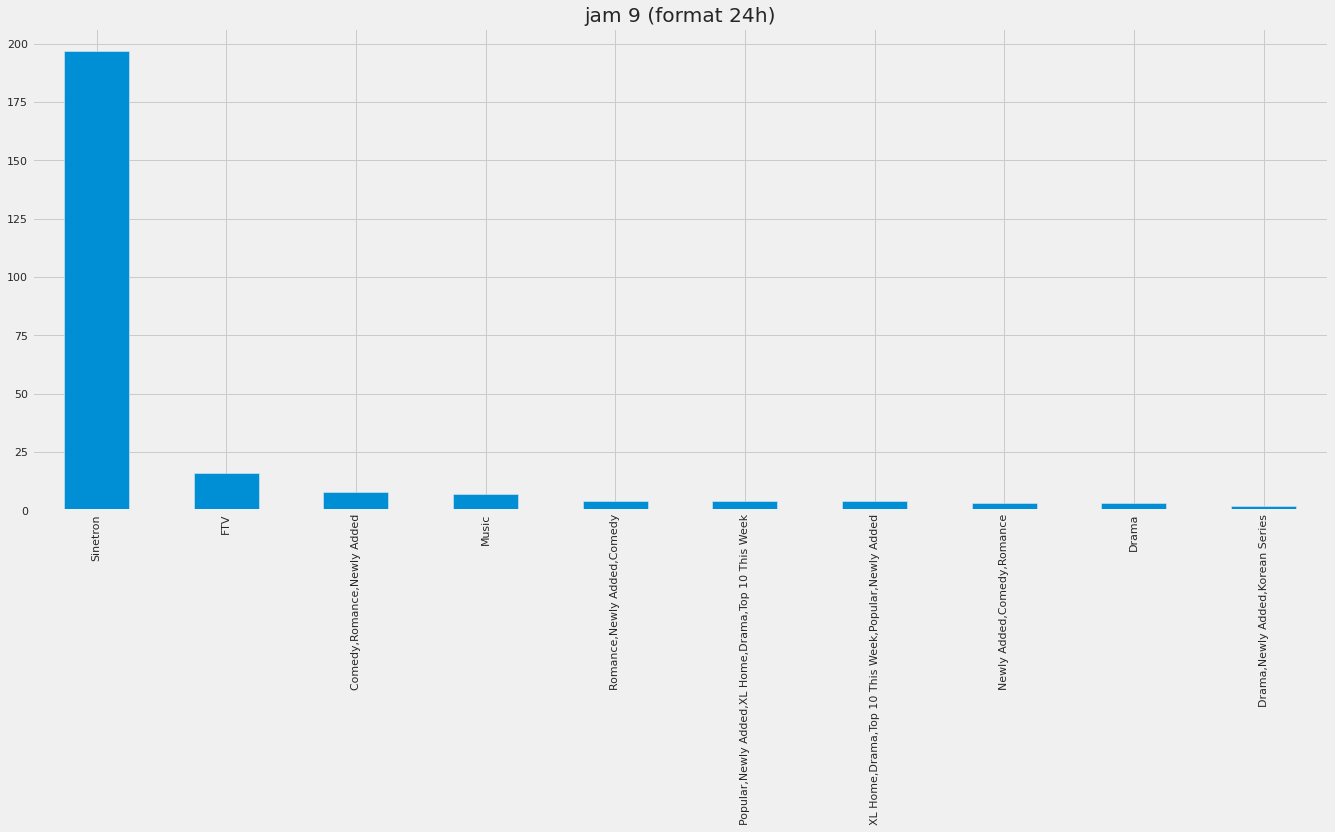

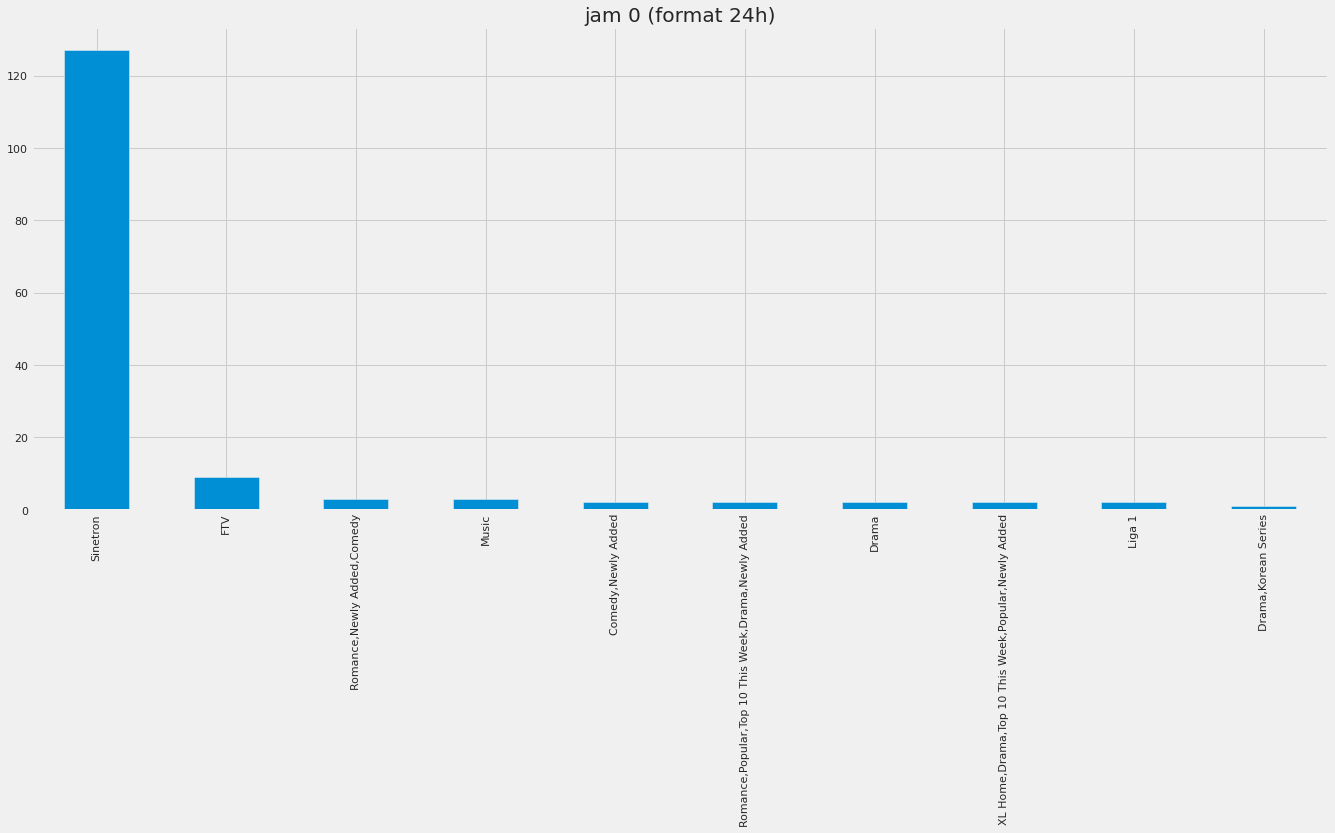

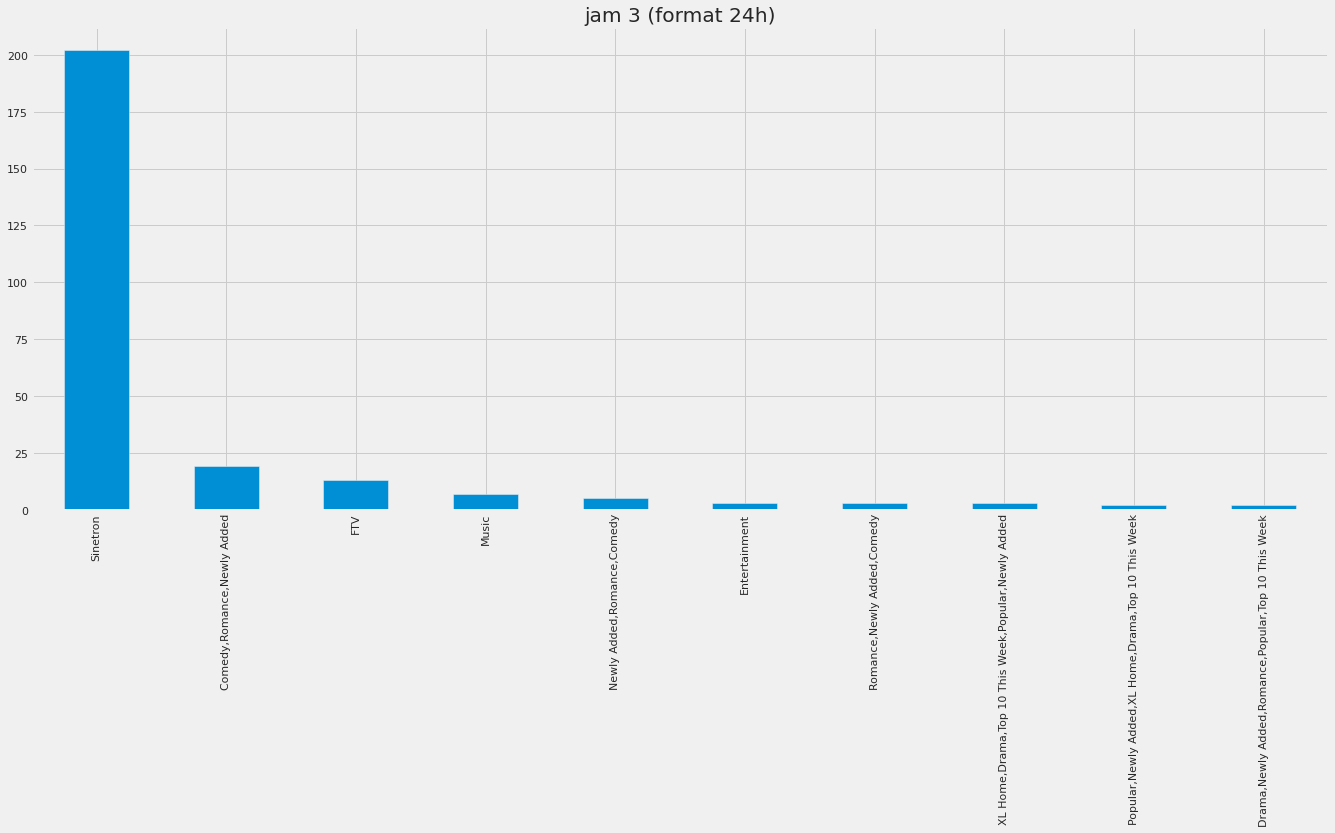

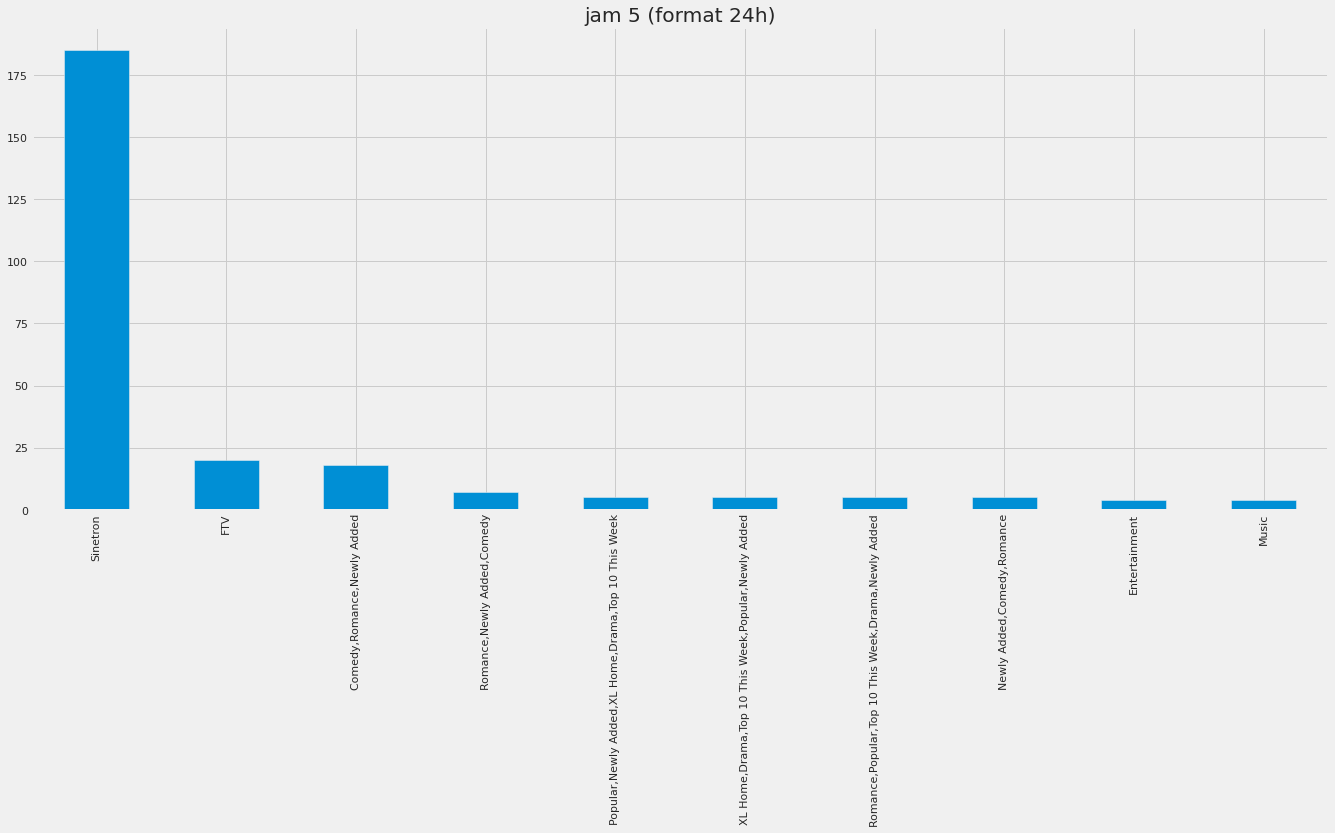

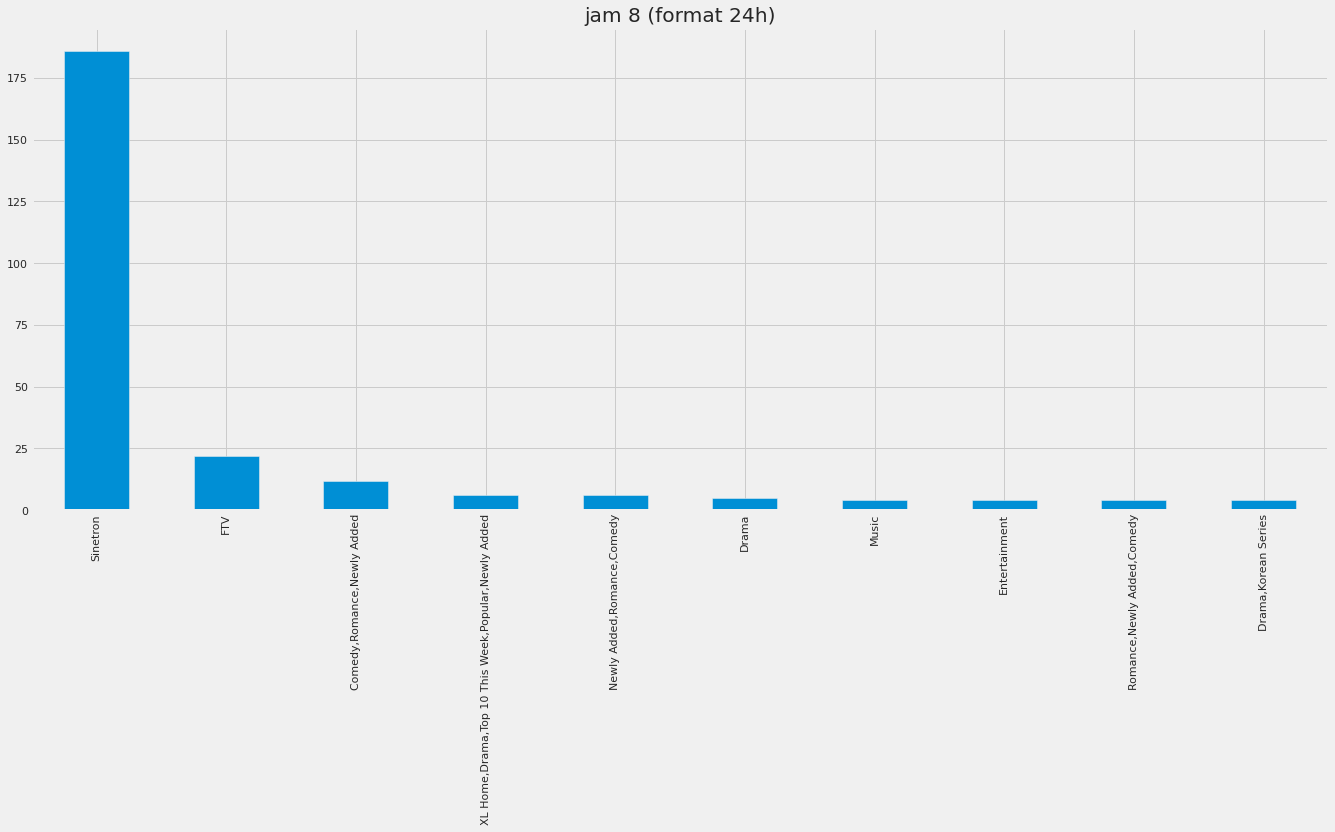

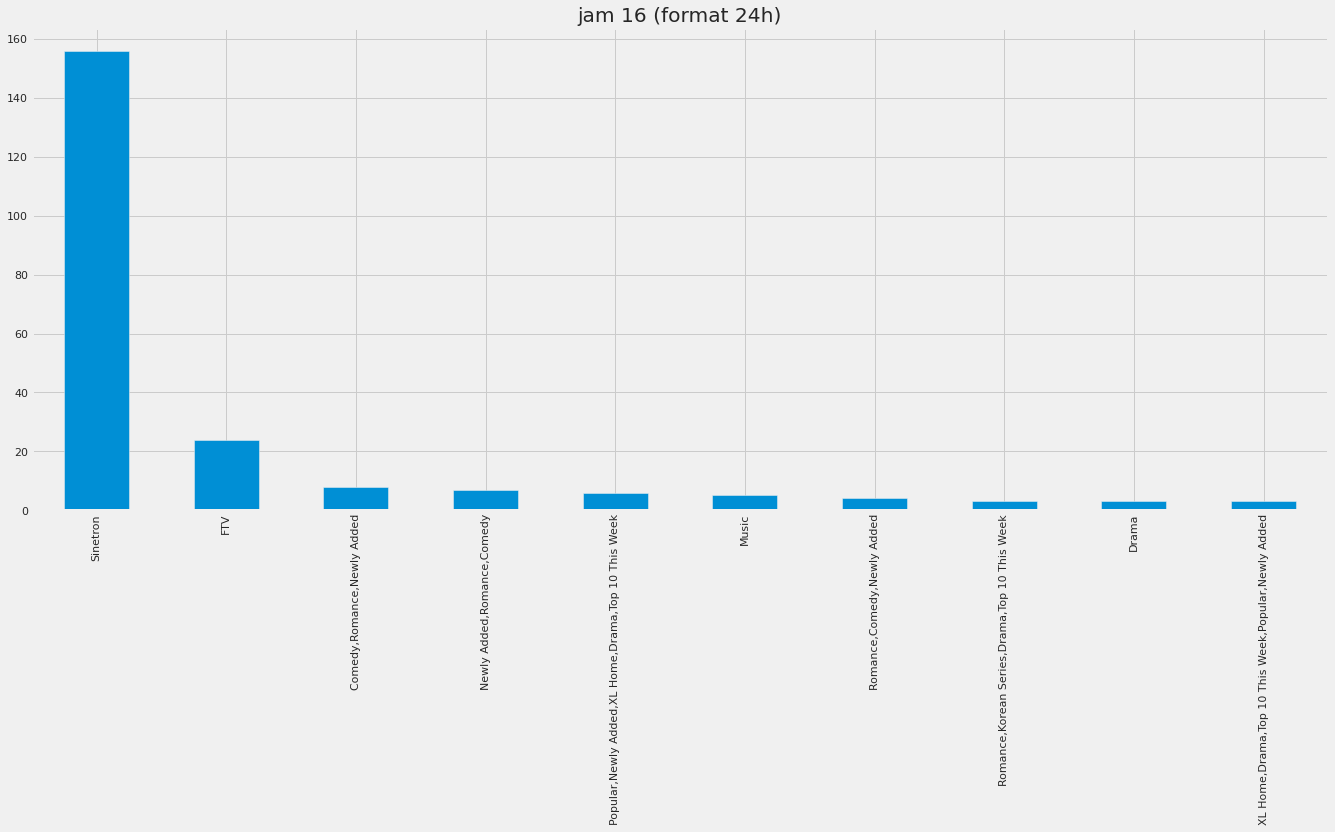

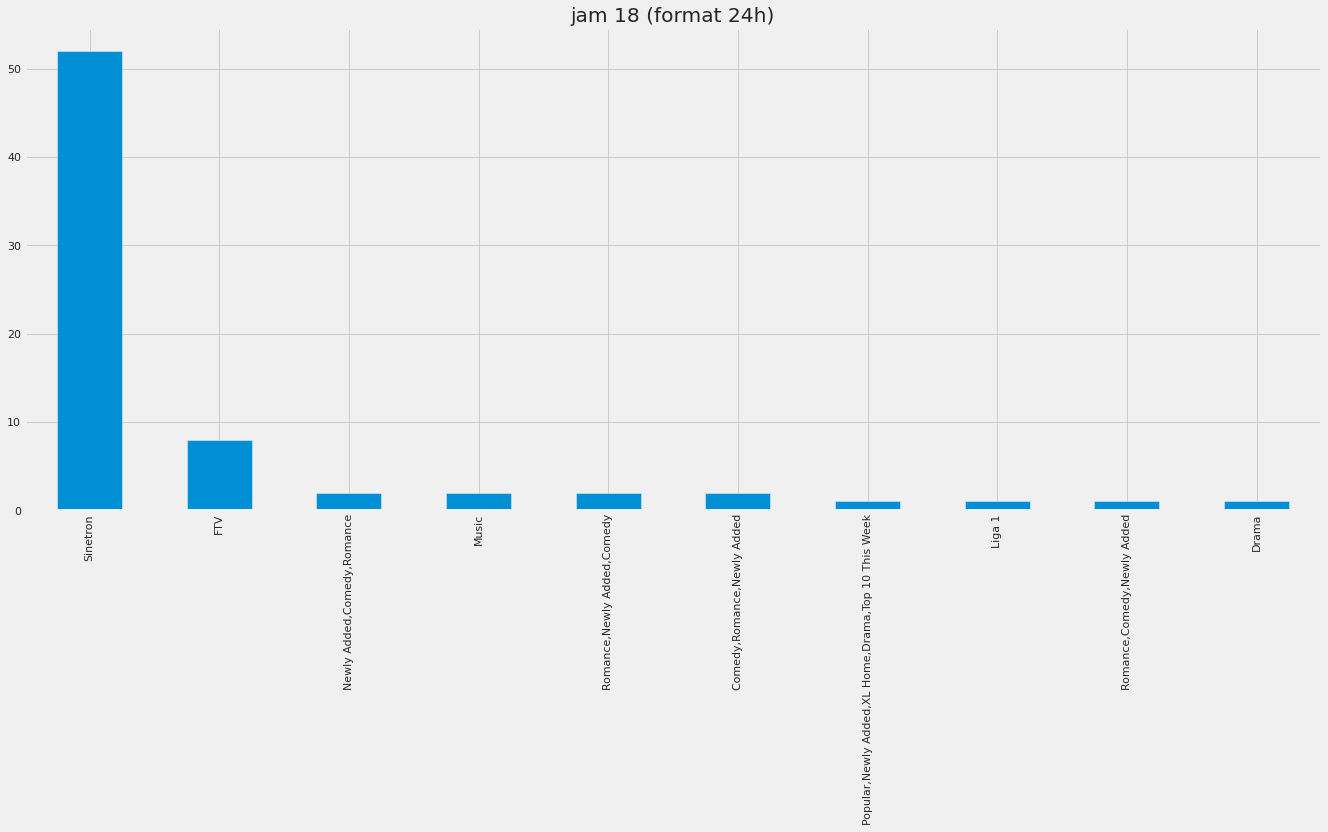

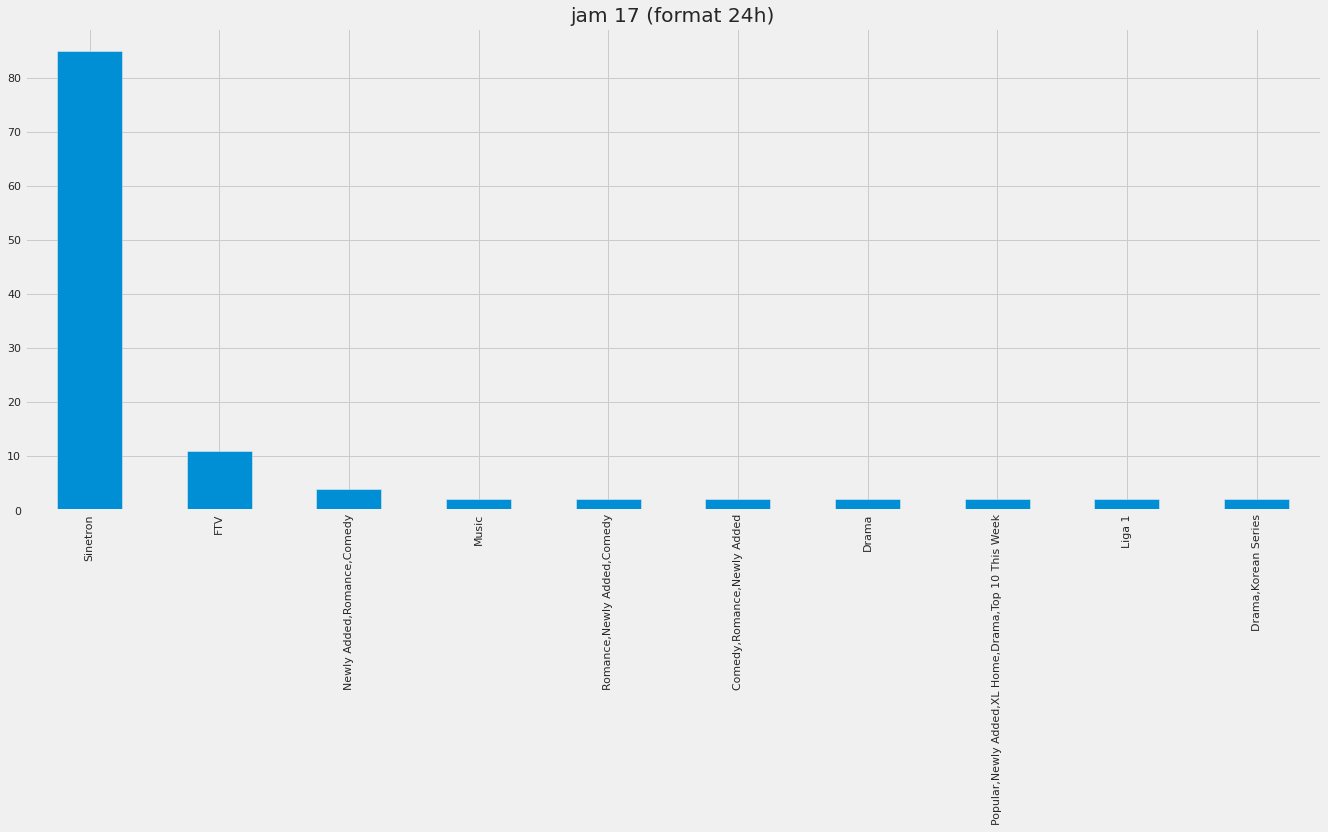

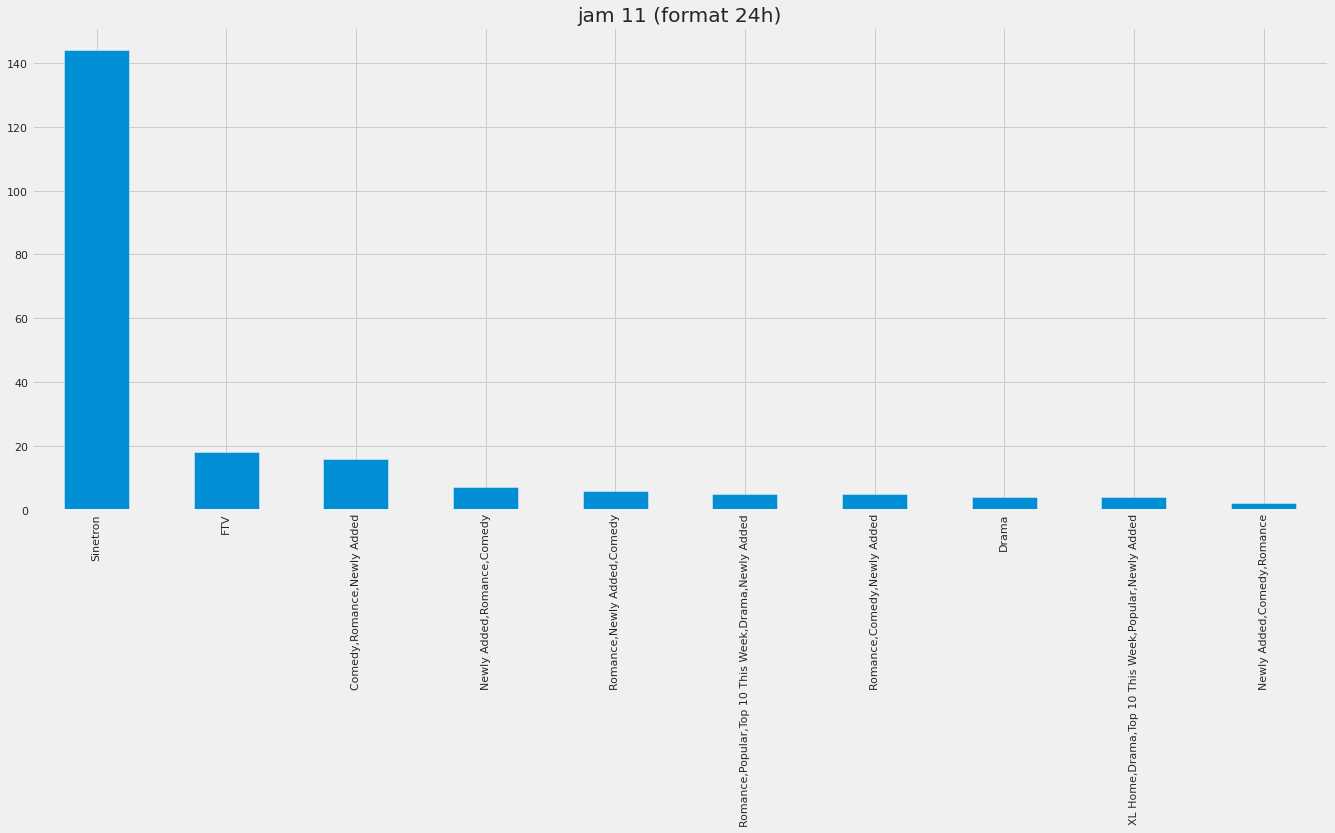

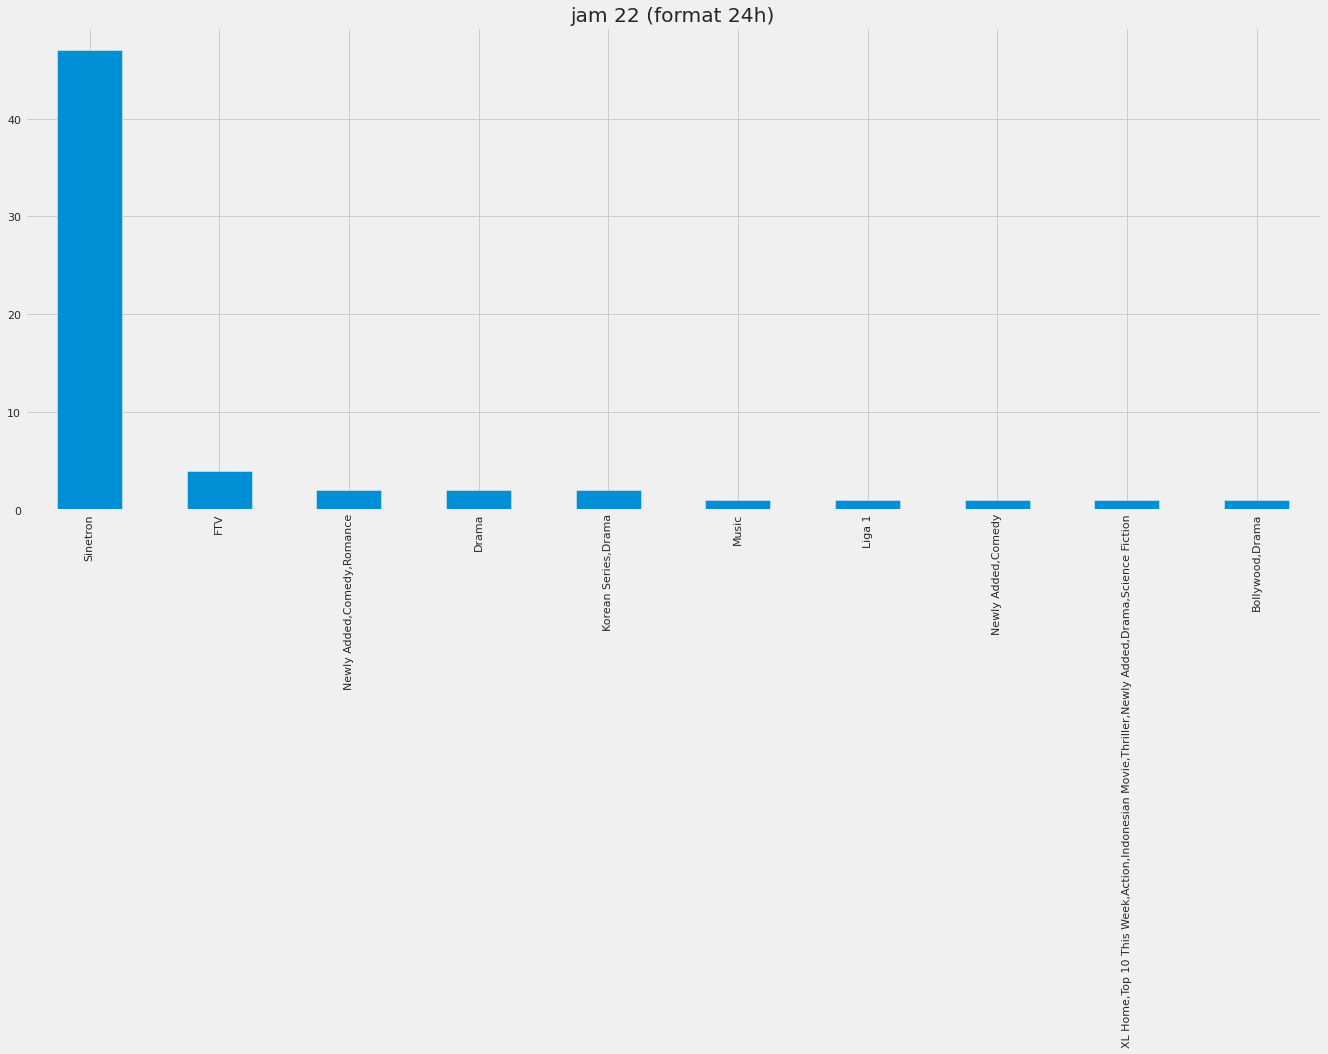

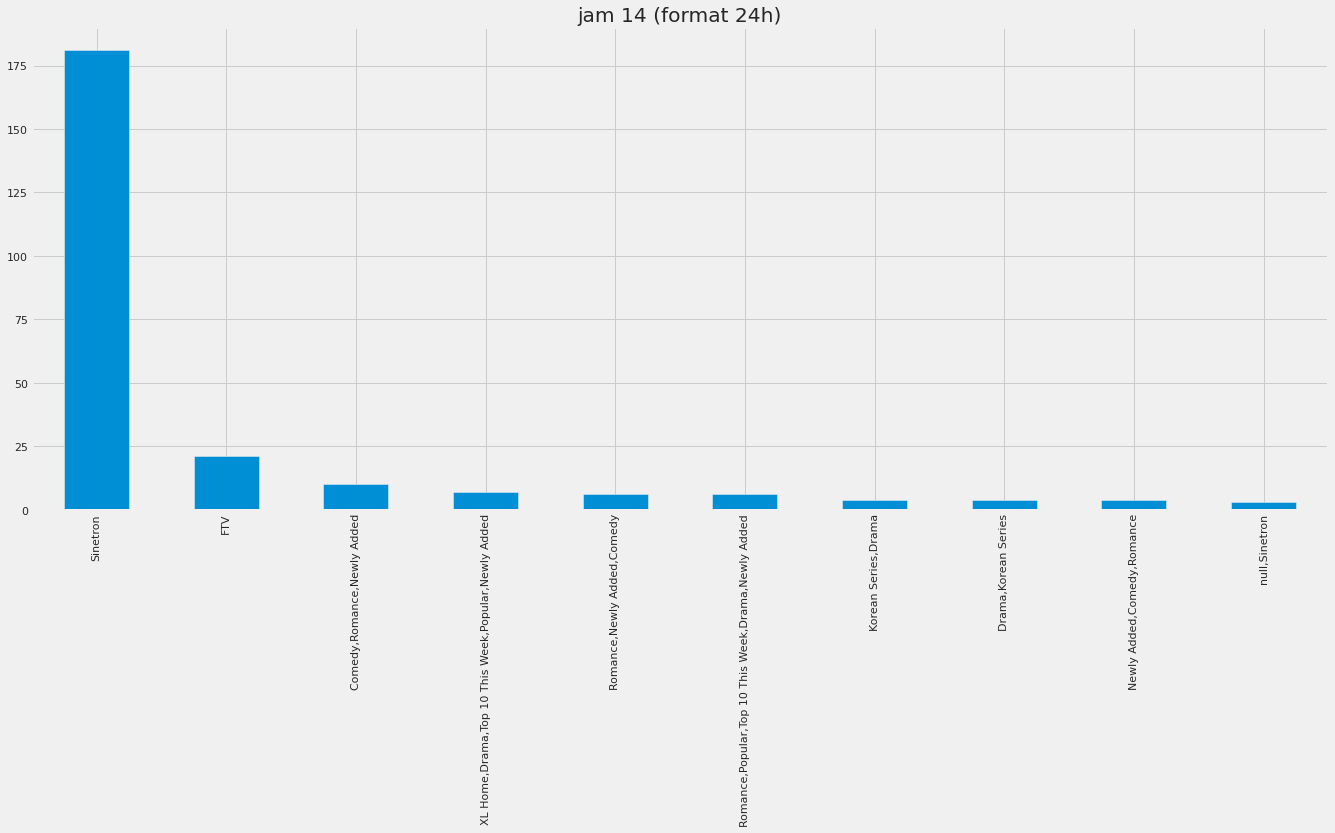

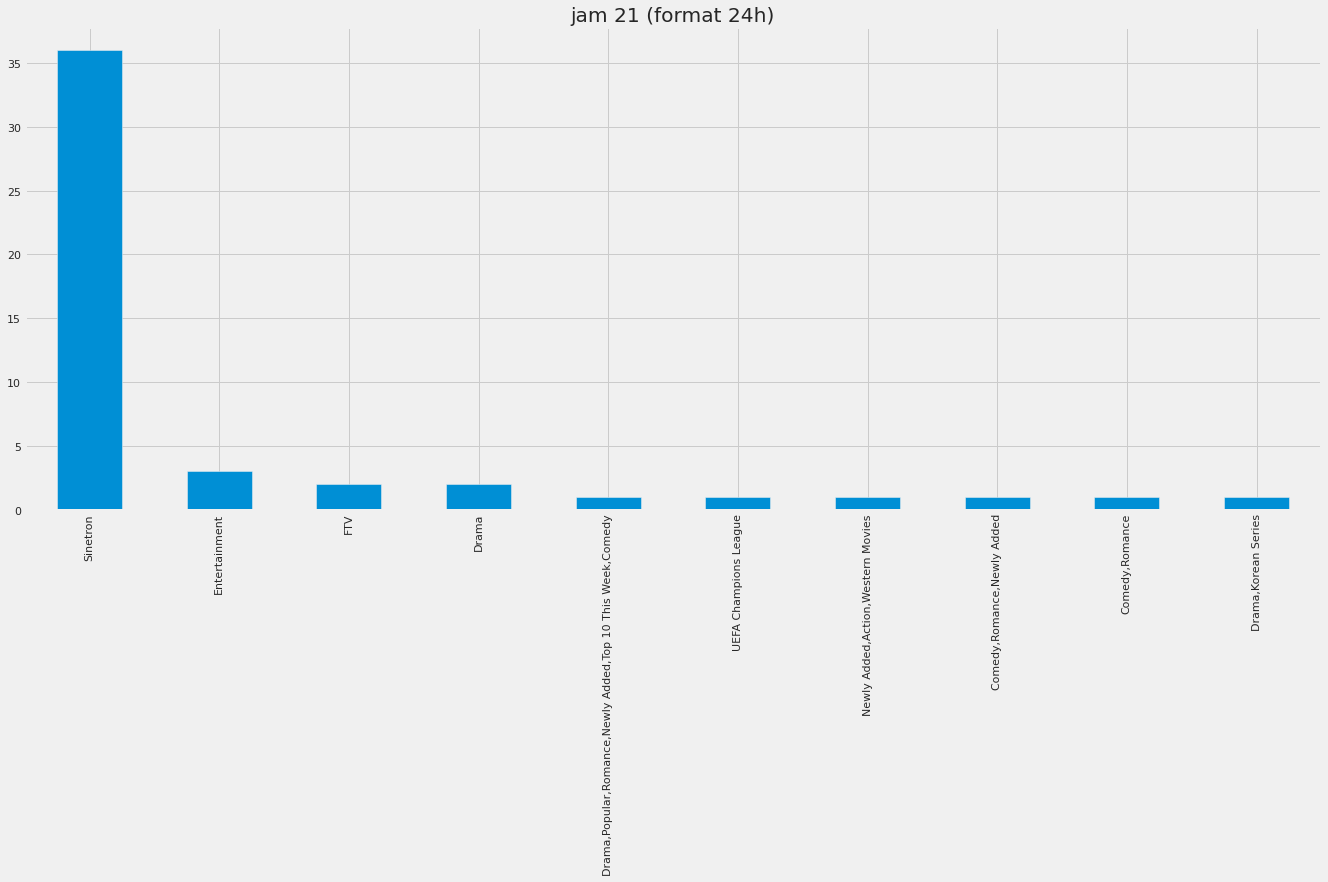

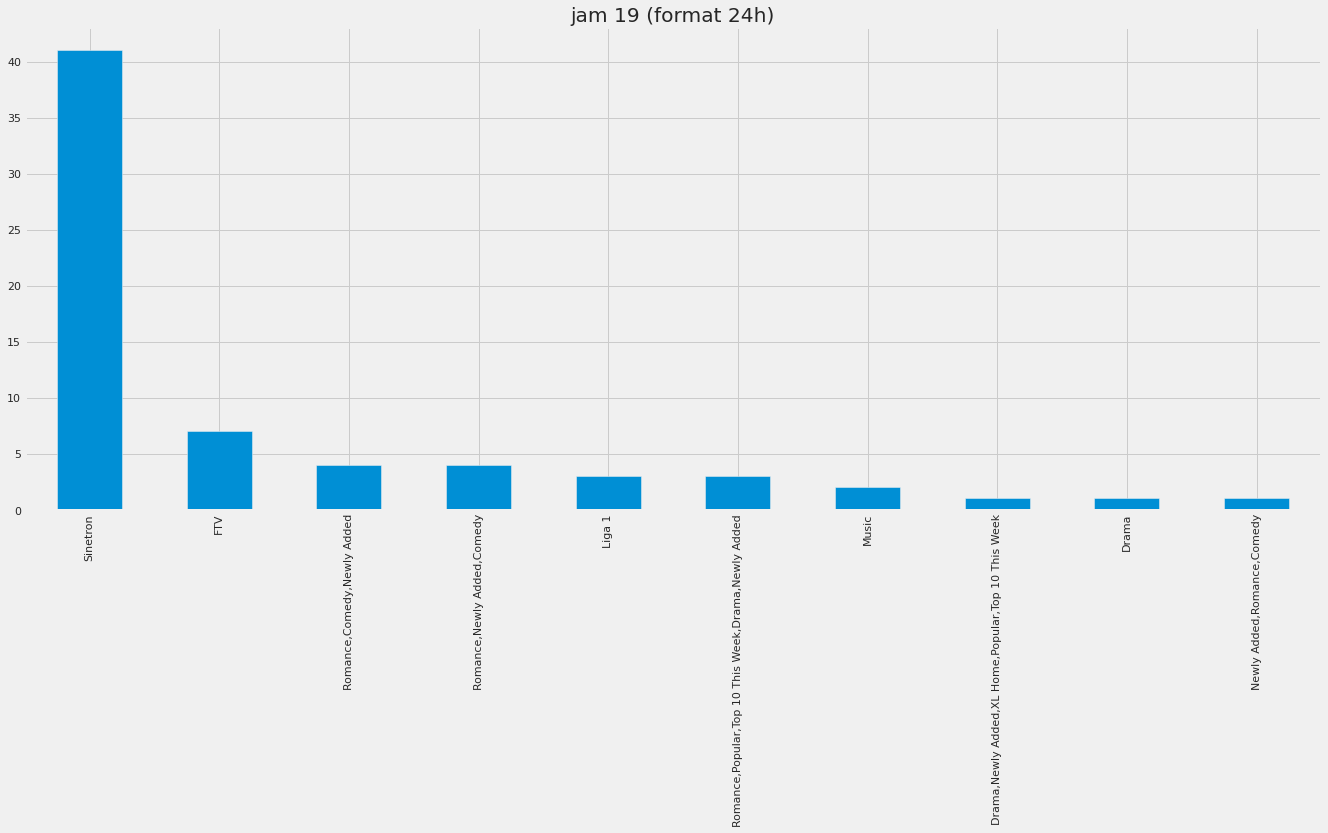

24


In [29]:
i = 0
for time in df['play_time_hour'].unique():
    df[df['play_time_hour']==time]['genre_name'].value_counts().head(10).plot.bar()
    plt.title(f'jam {time} (format 24h)')
    plt.show()
    i+=1
print(i)

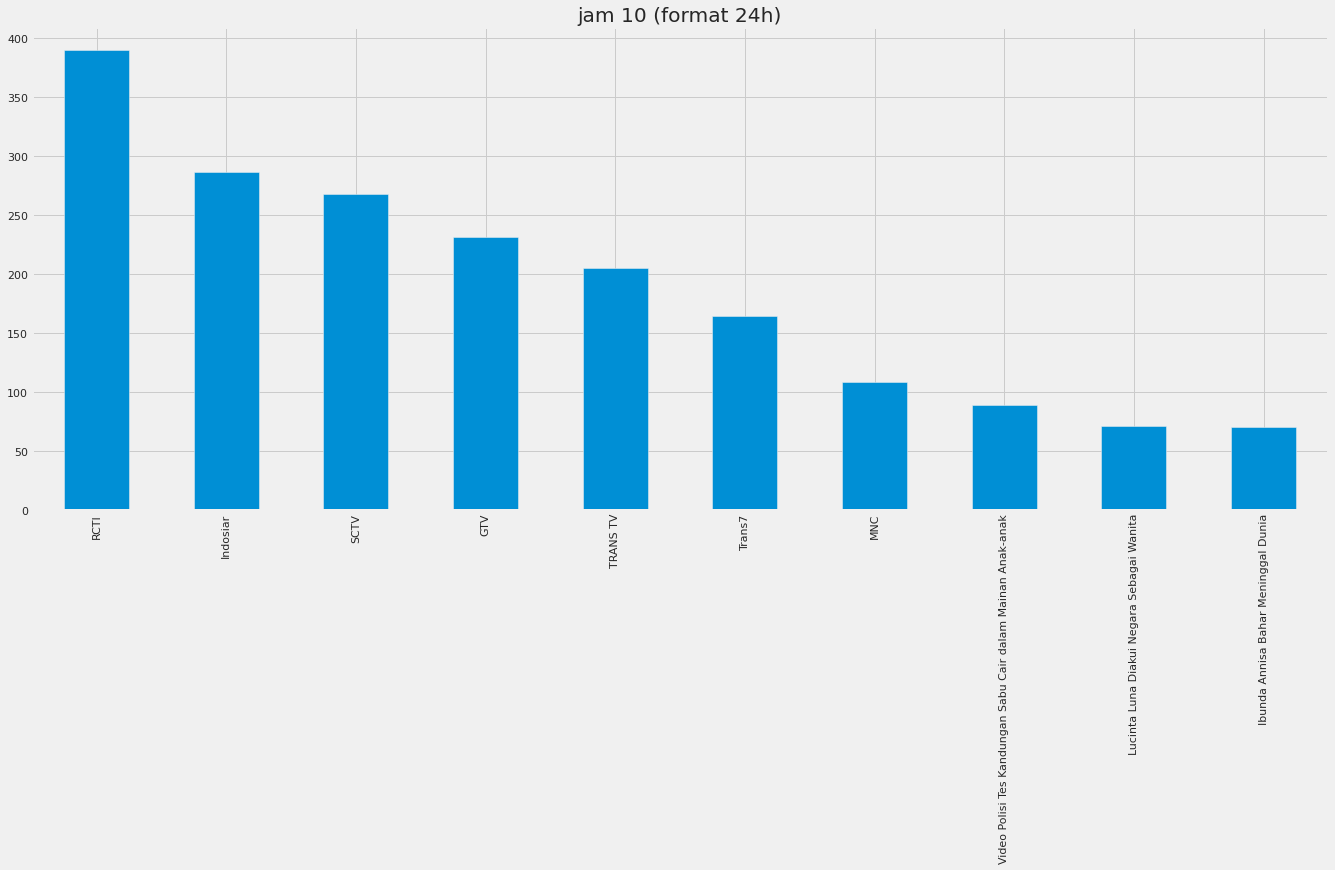

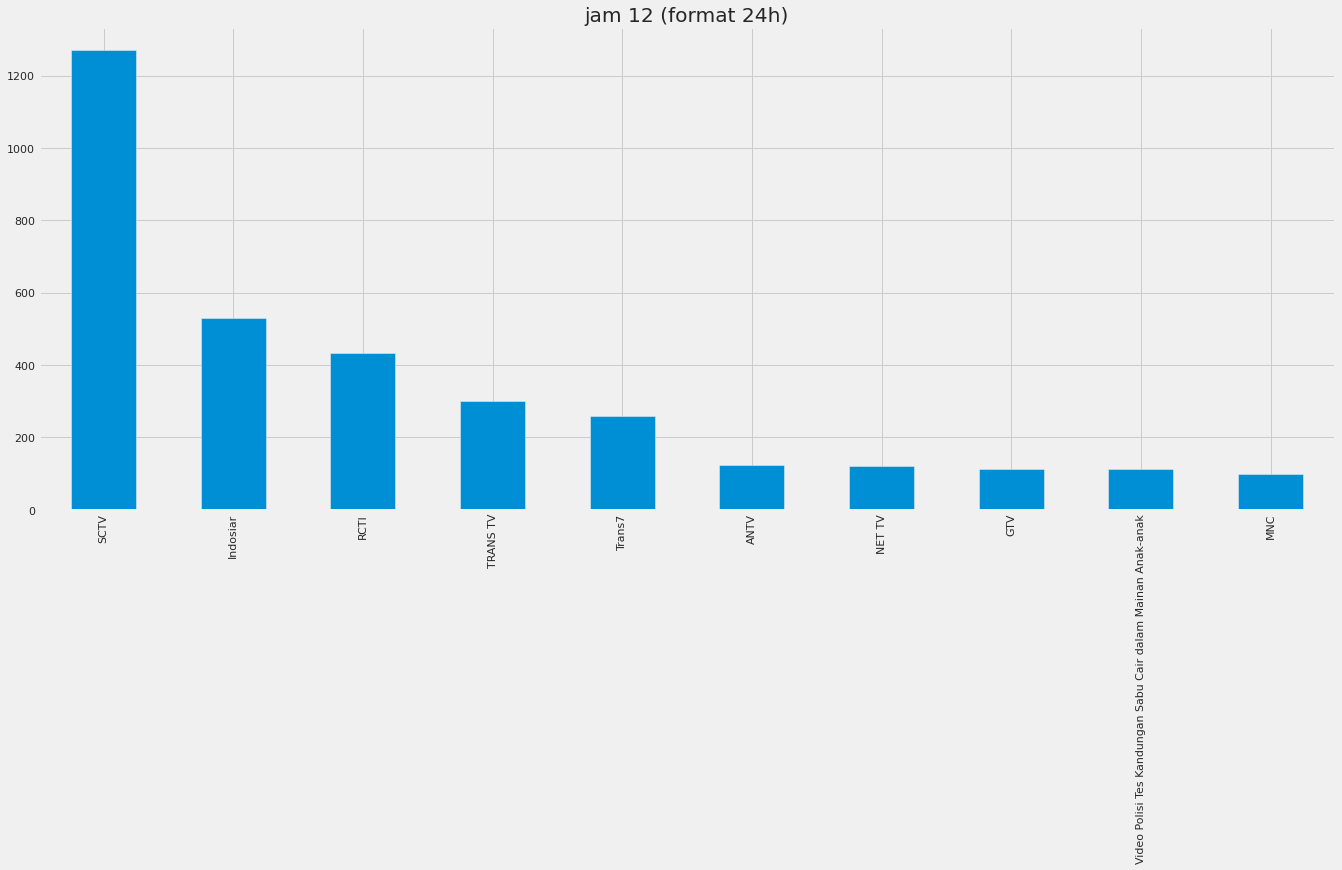

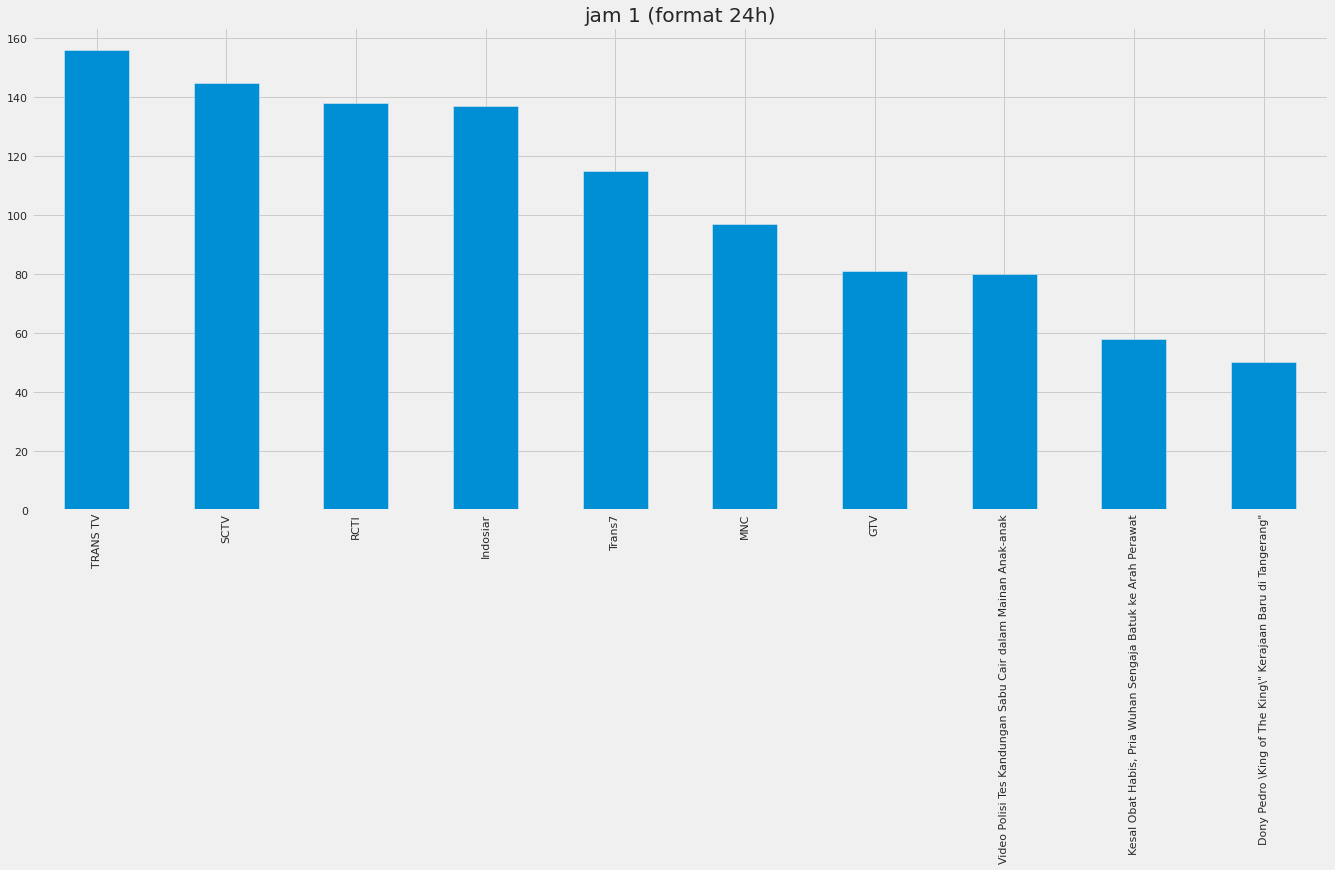

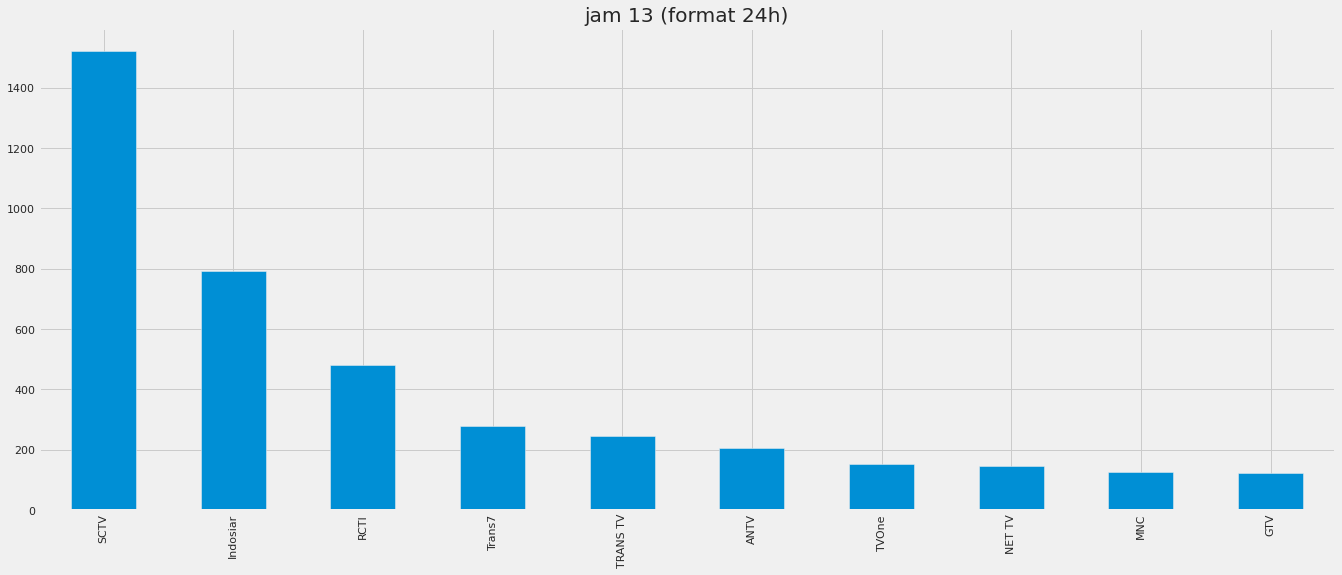

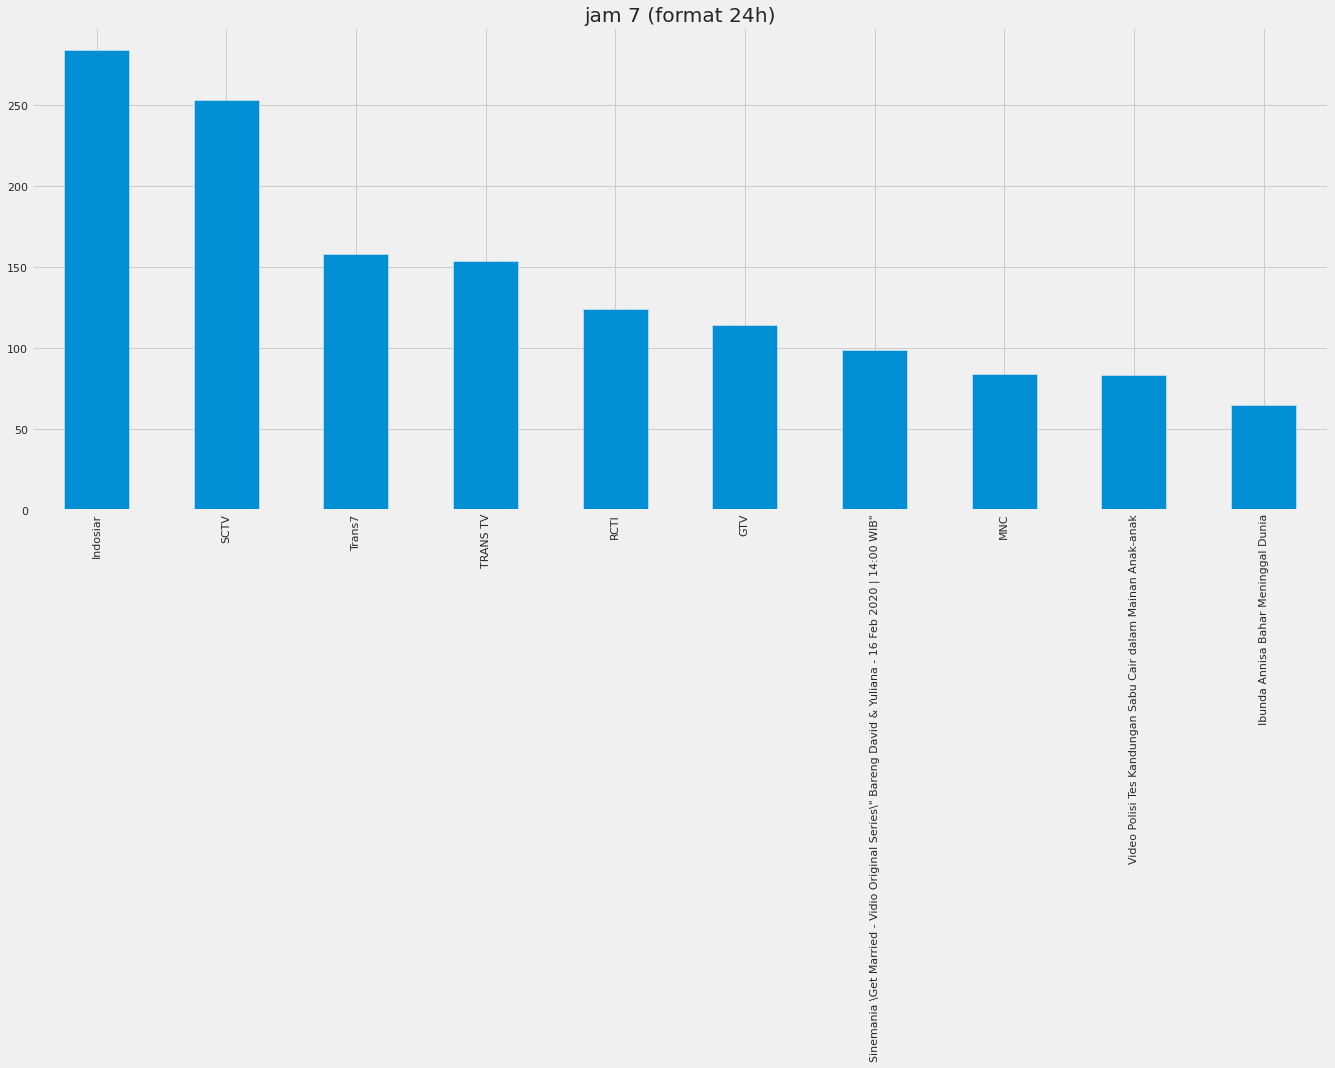

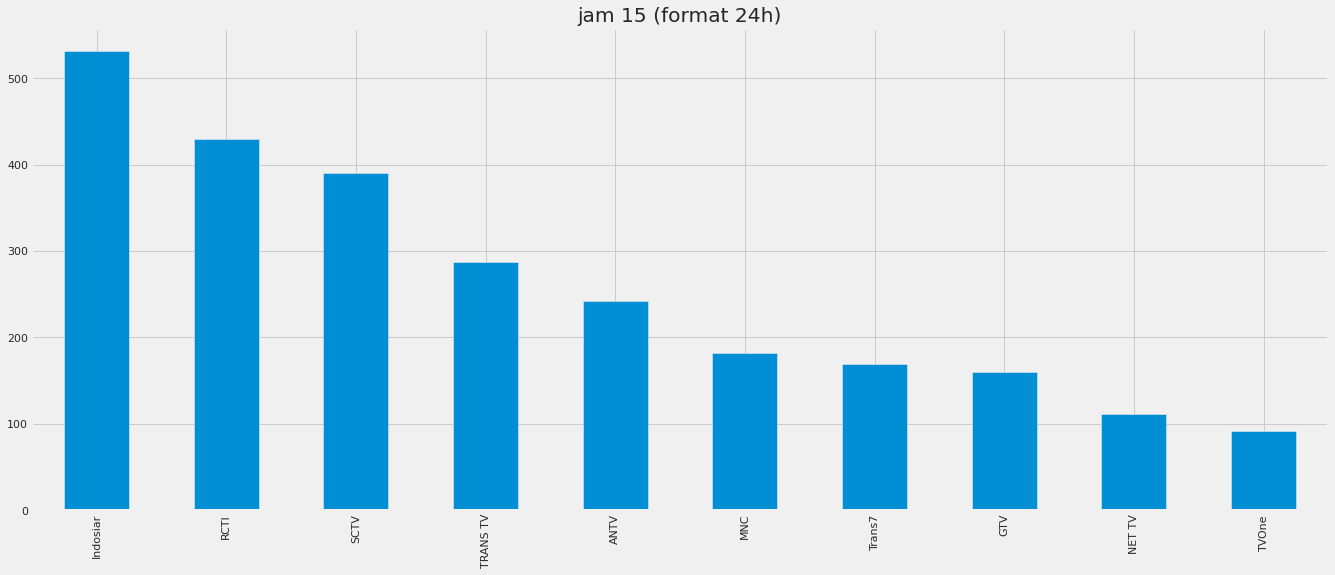

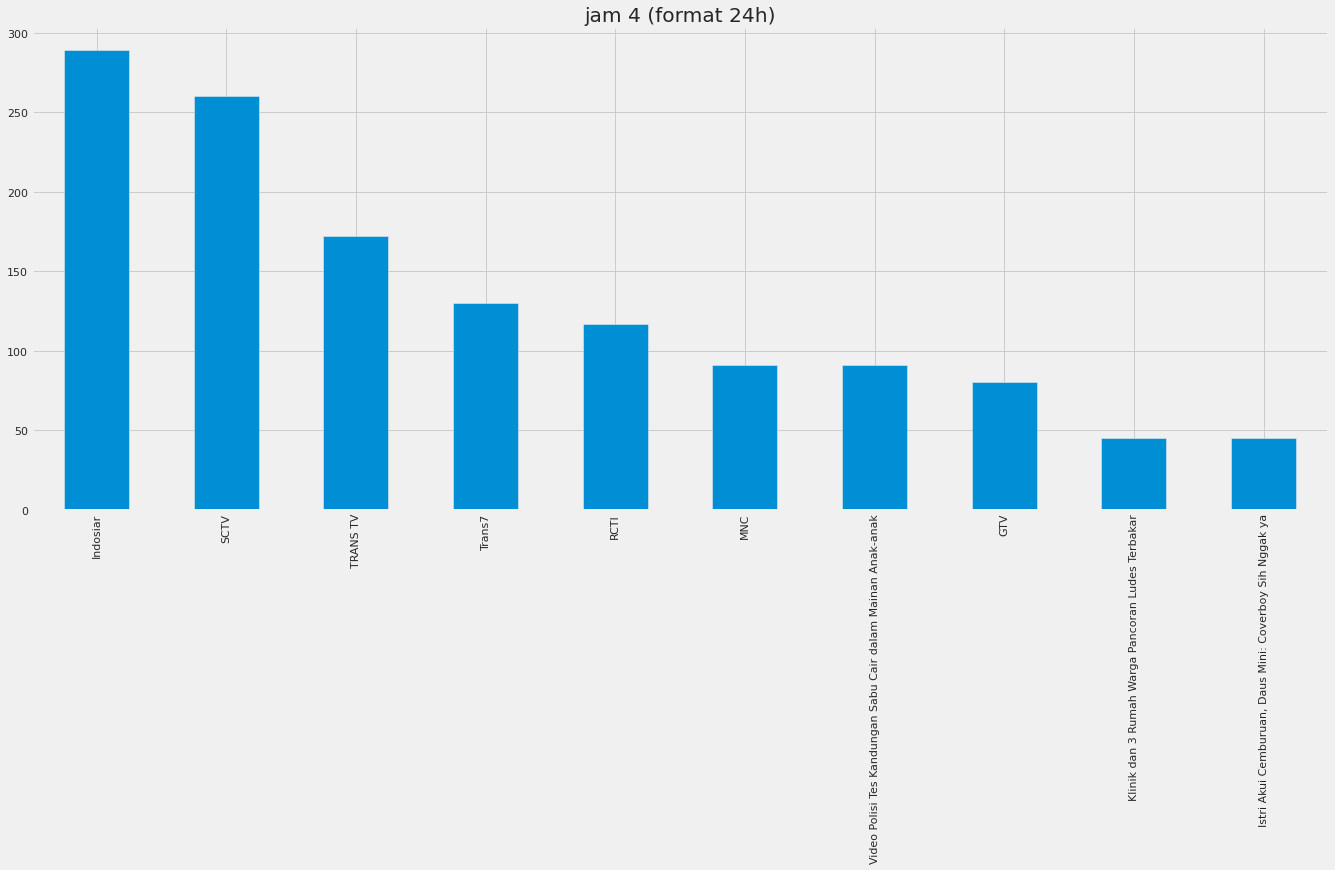

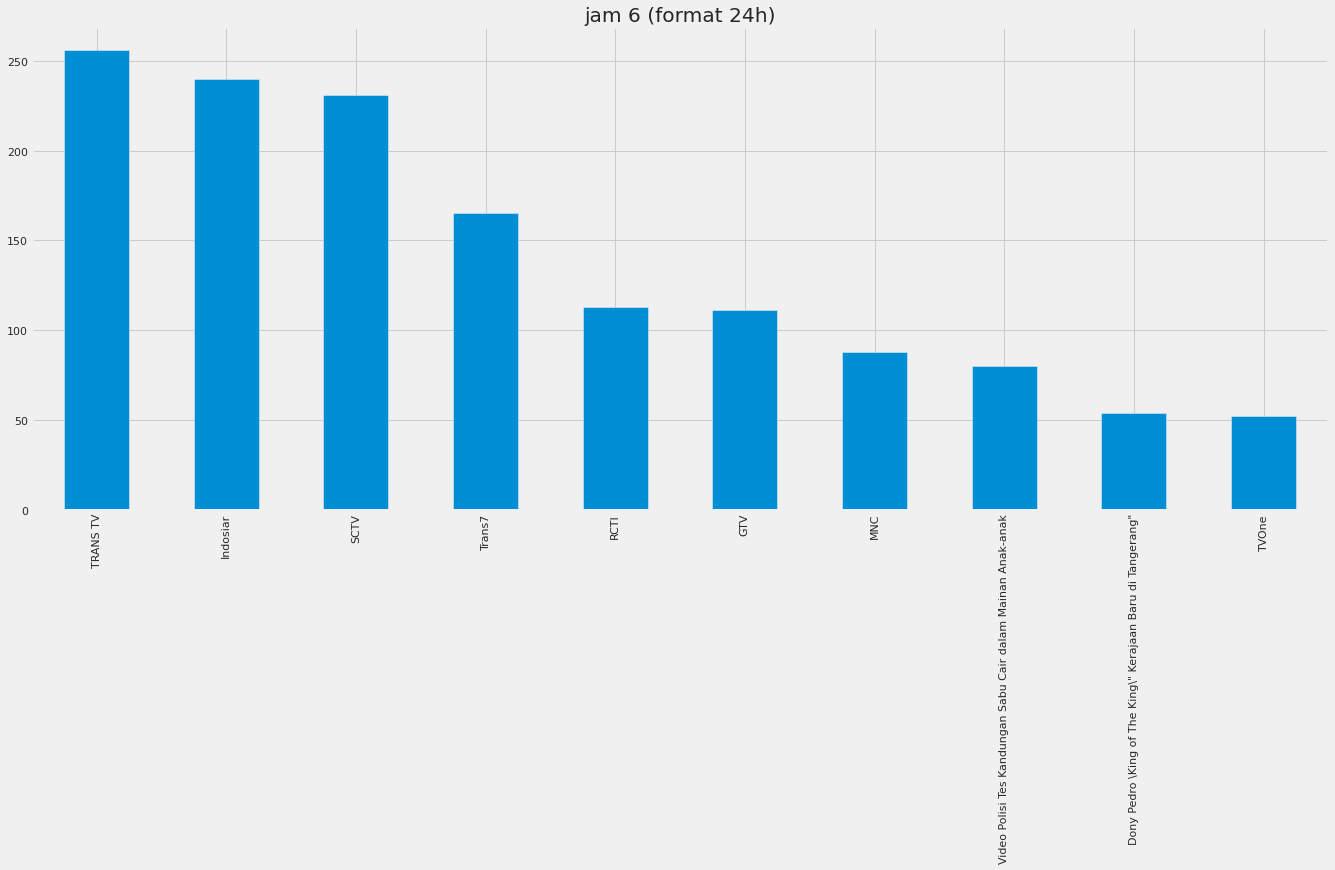

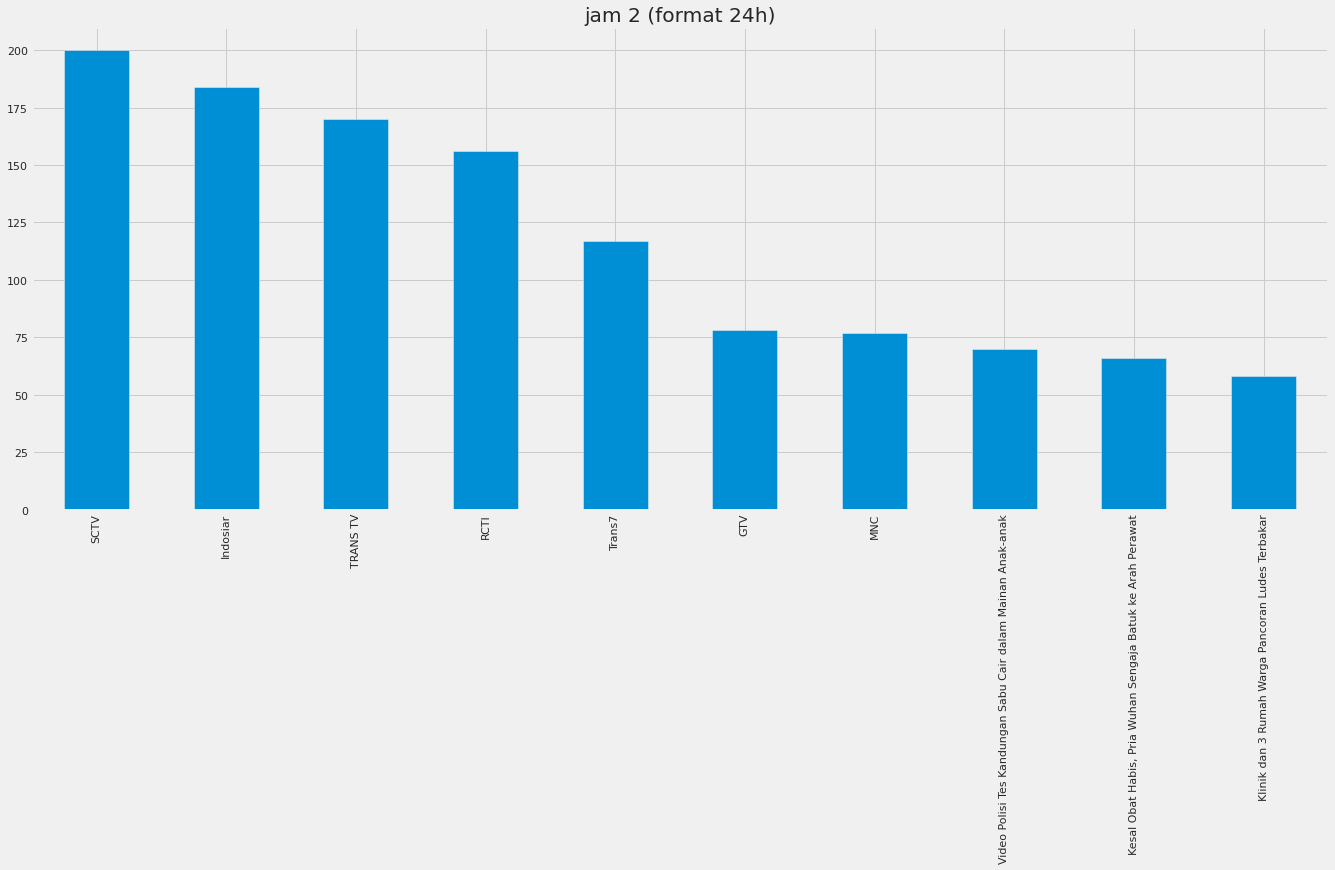

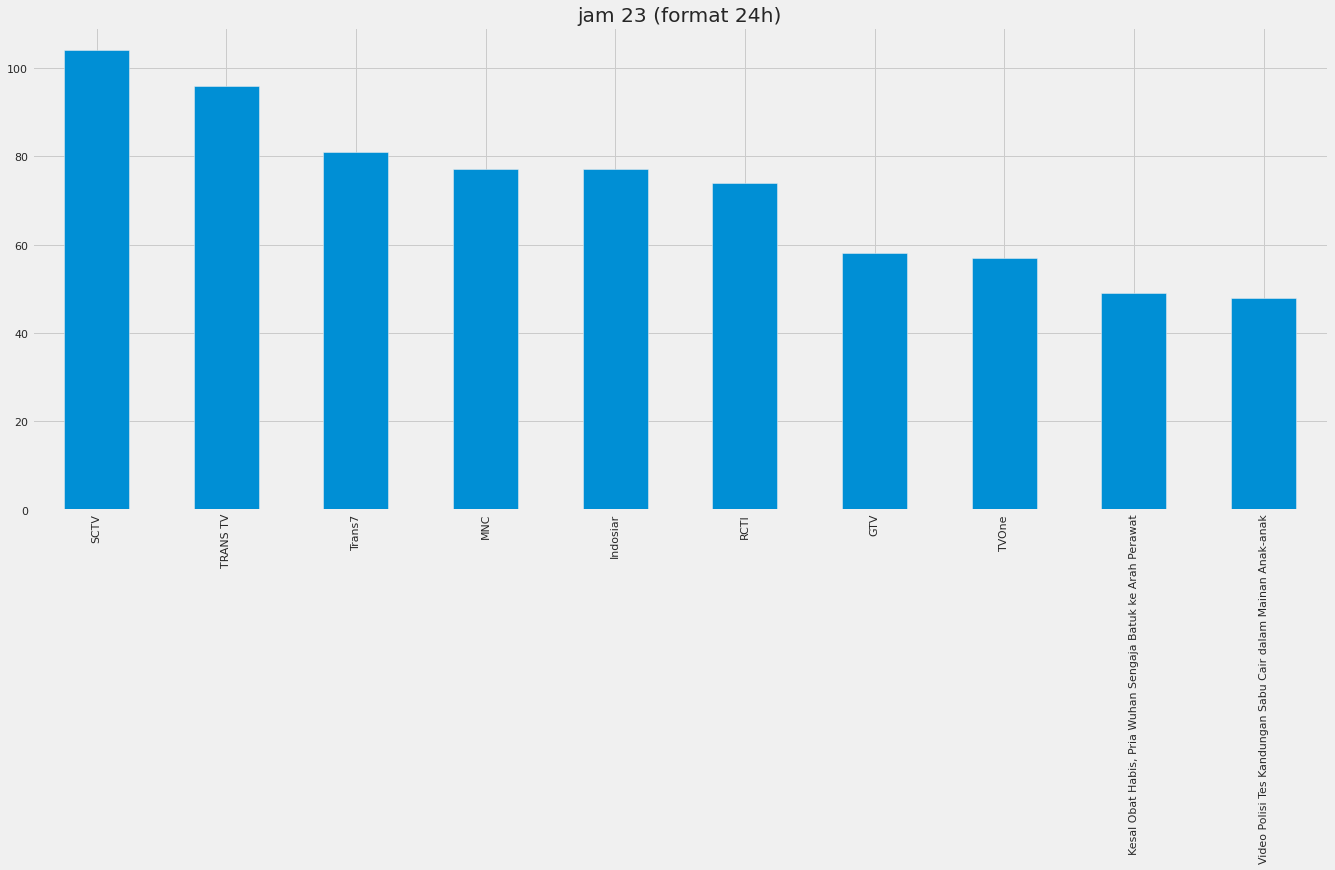

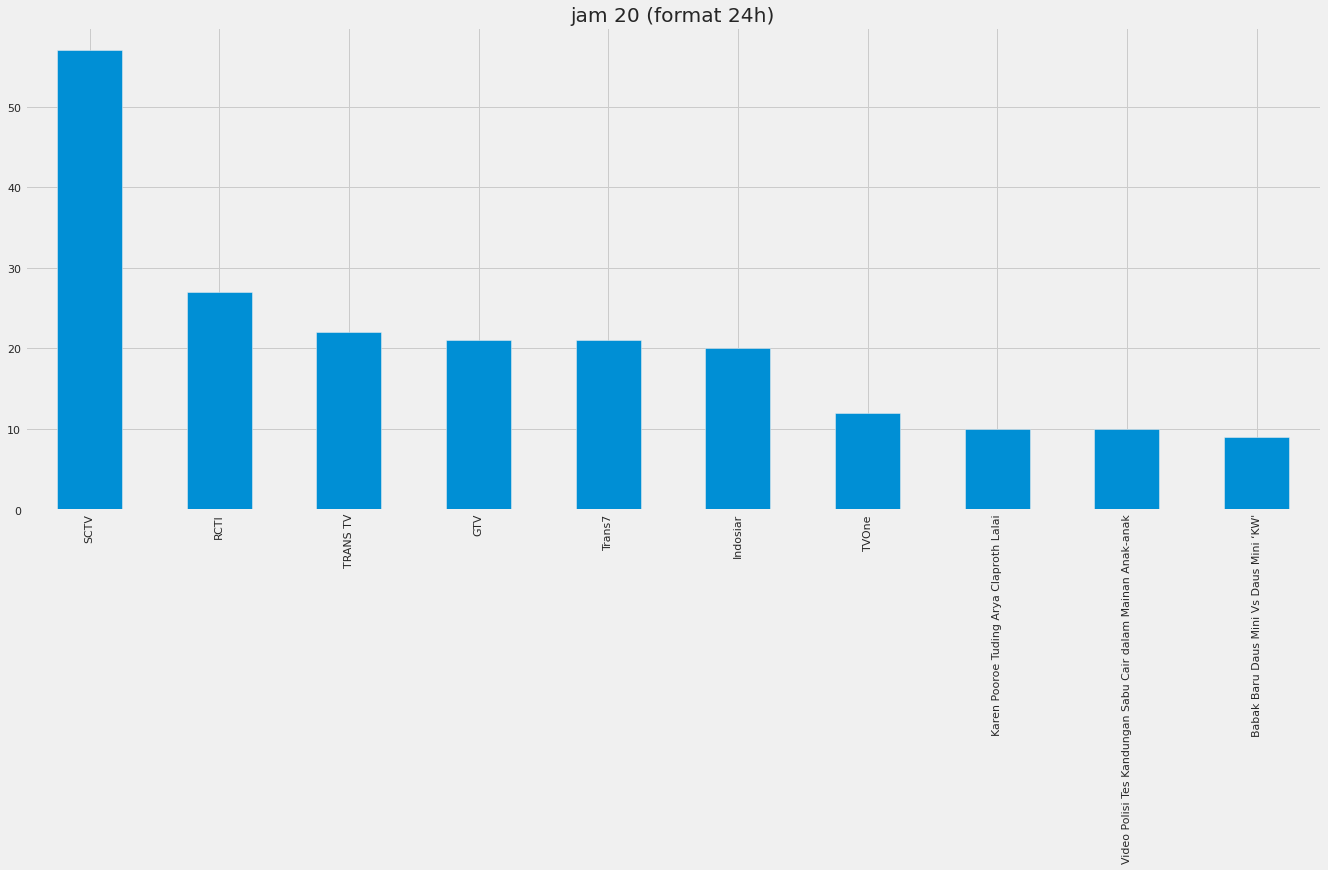

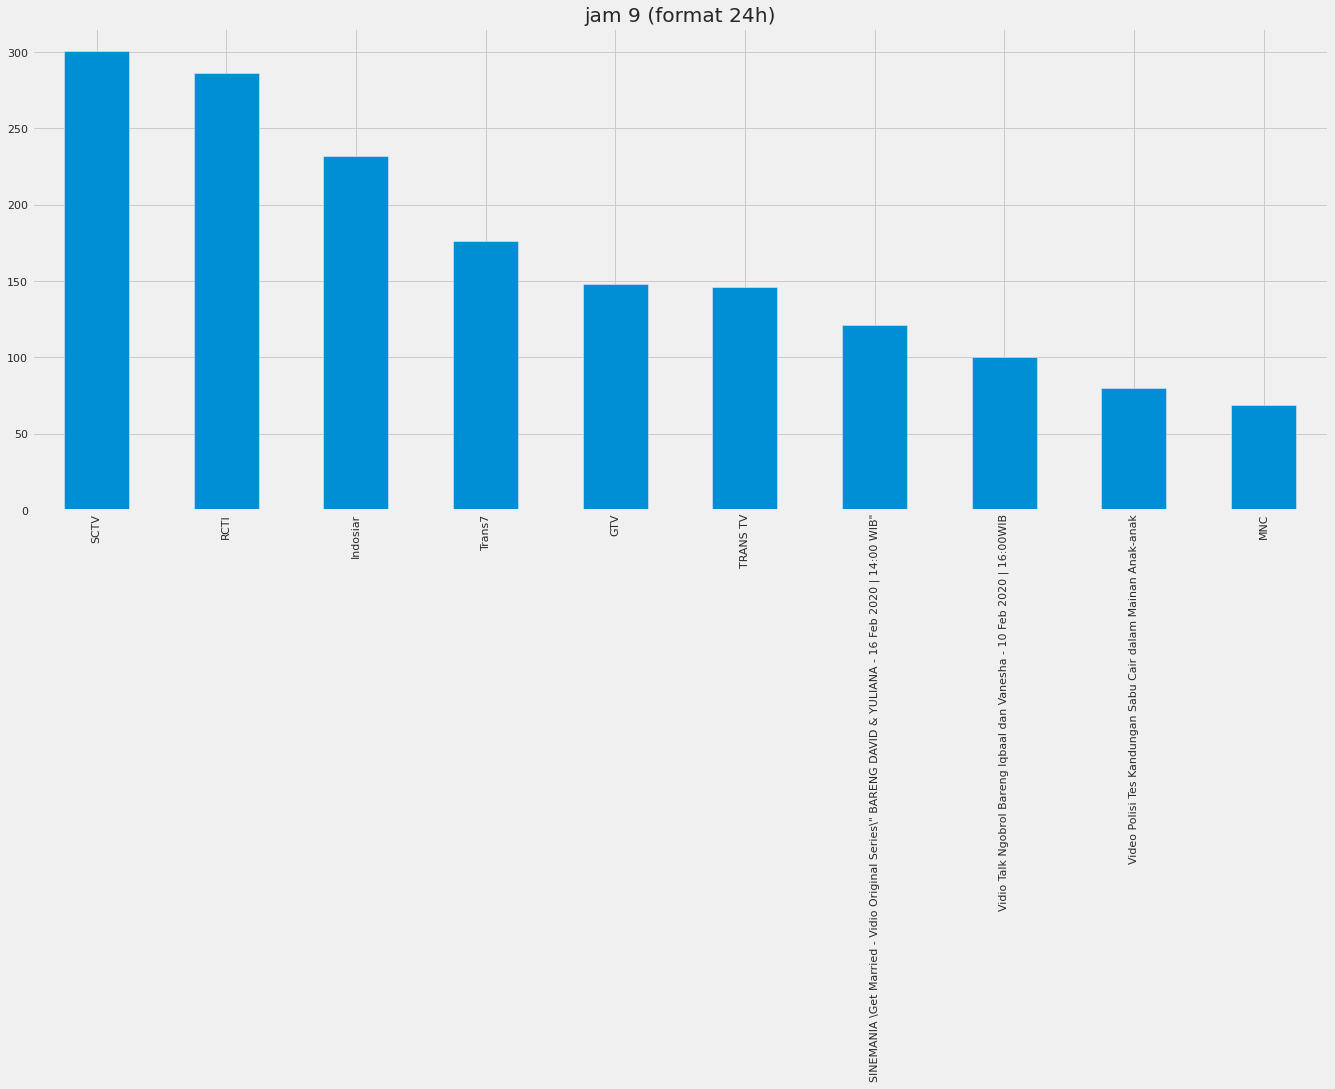

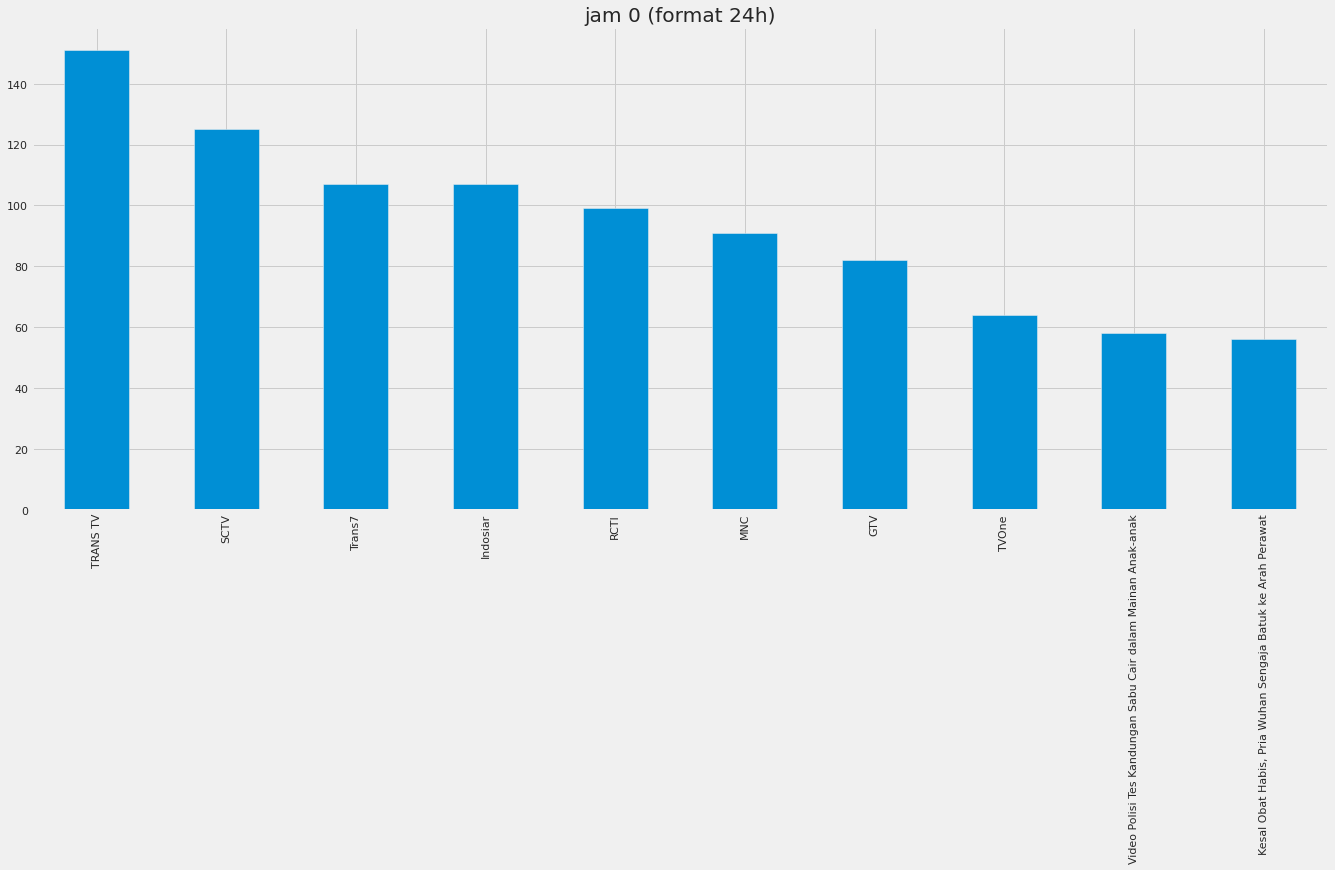

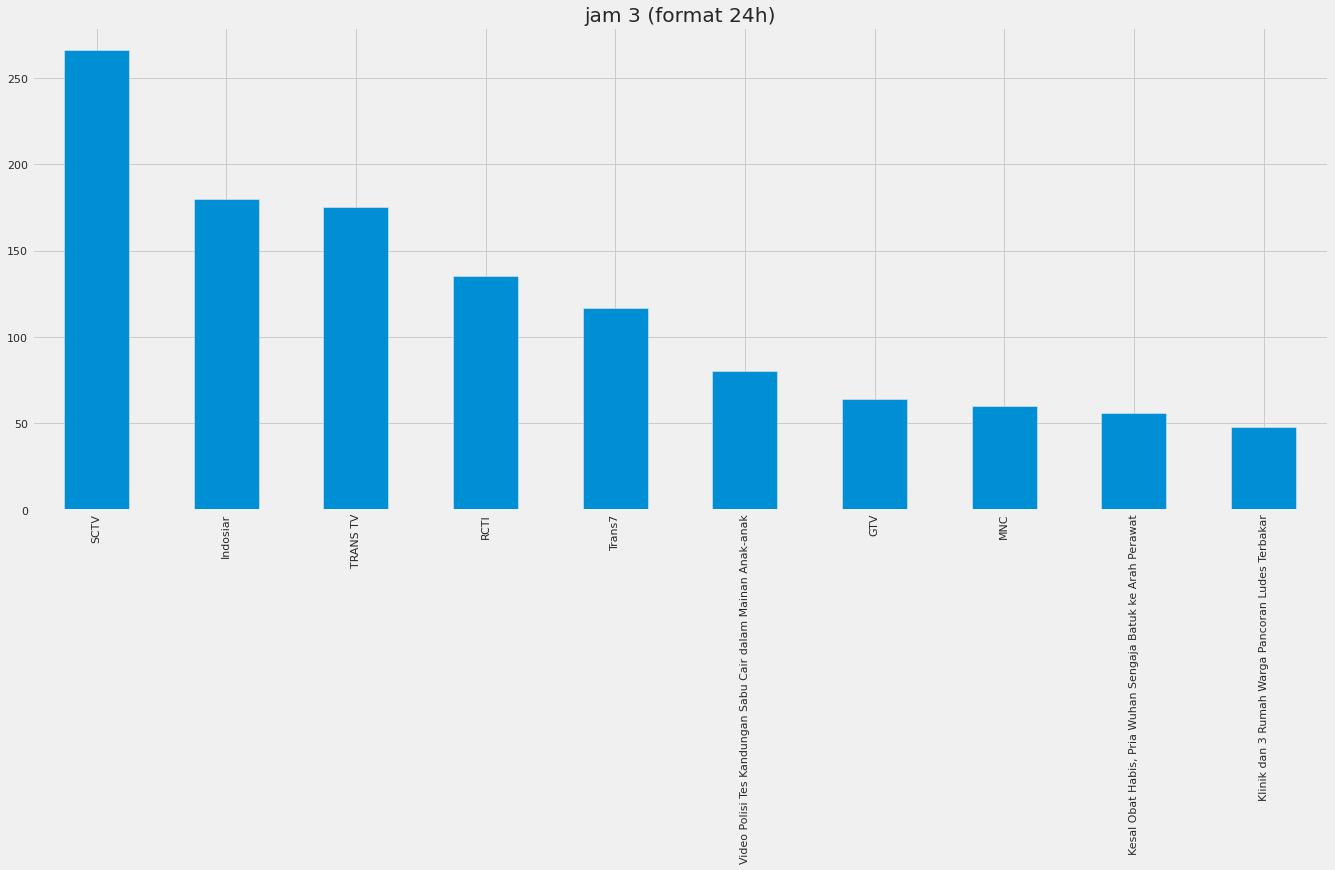

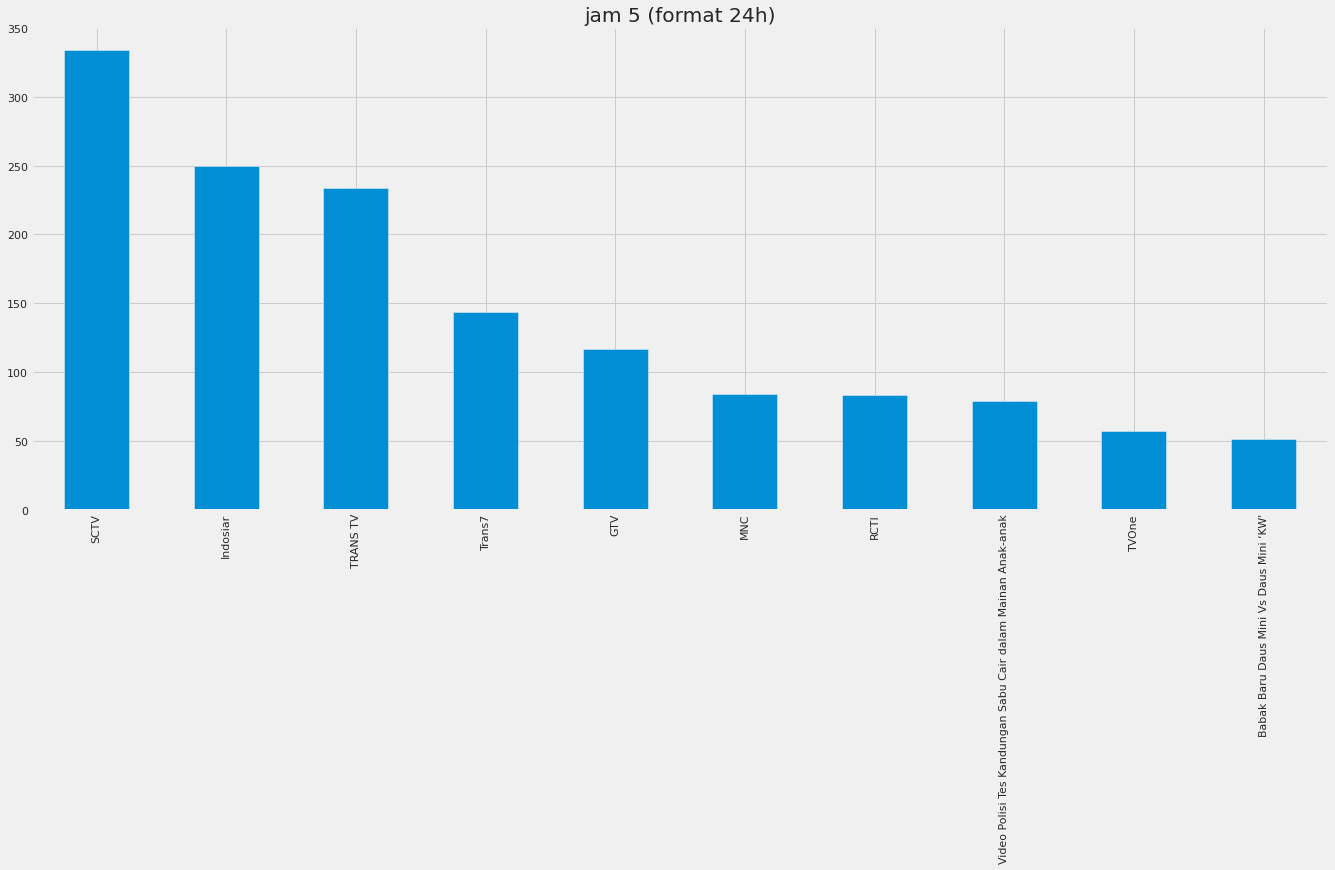

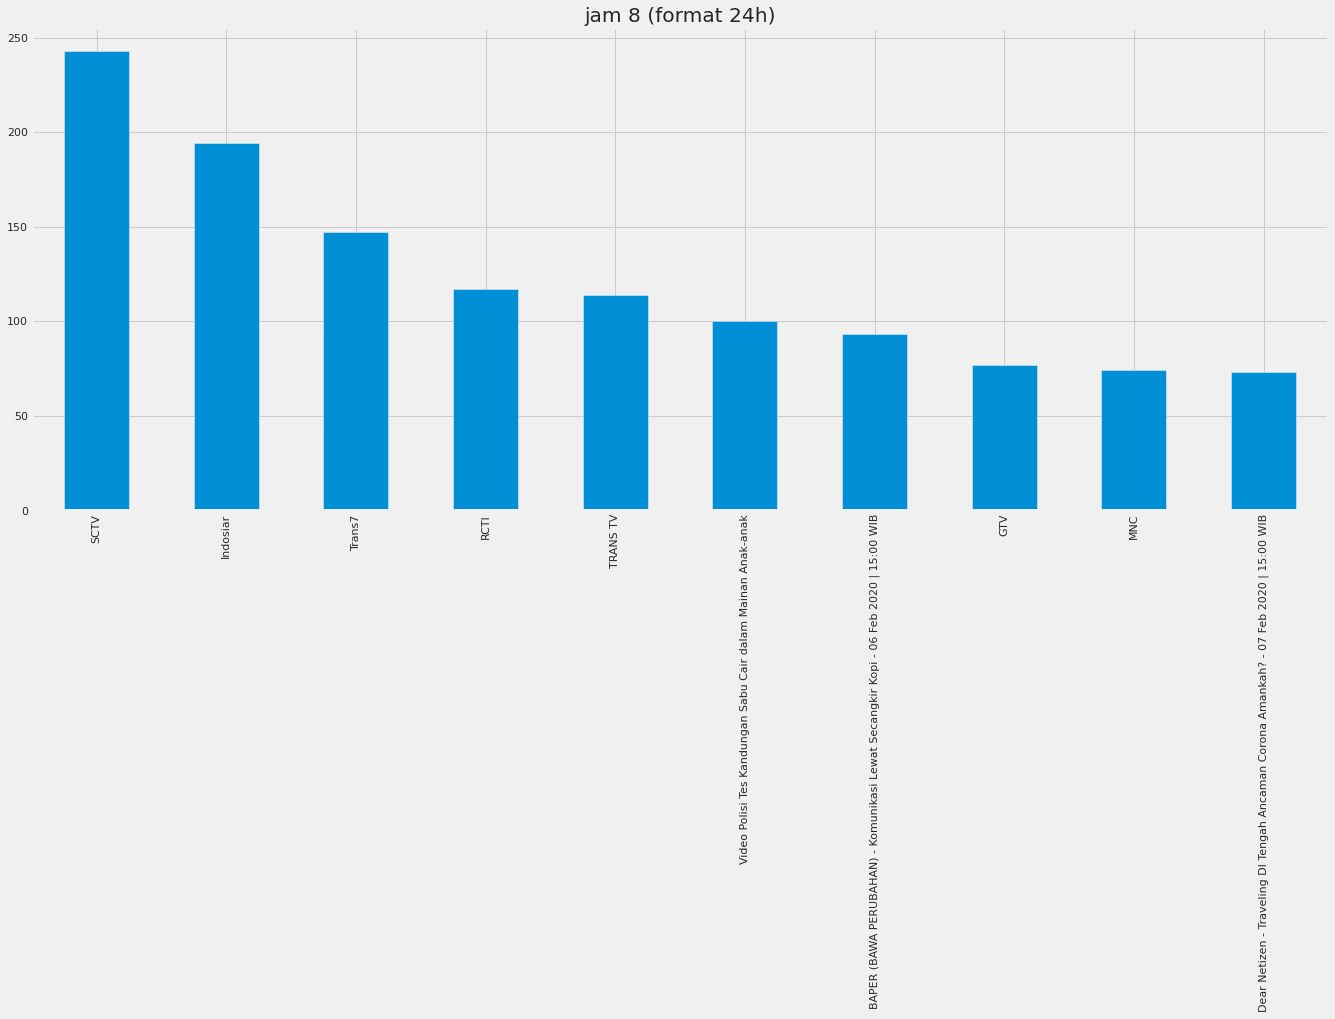

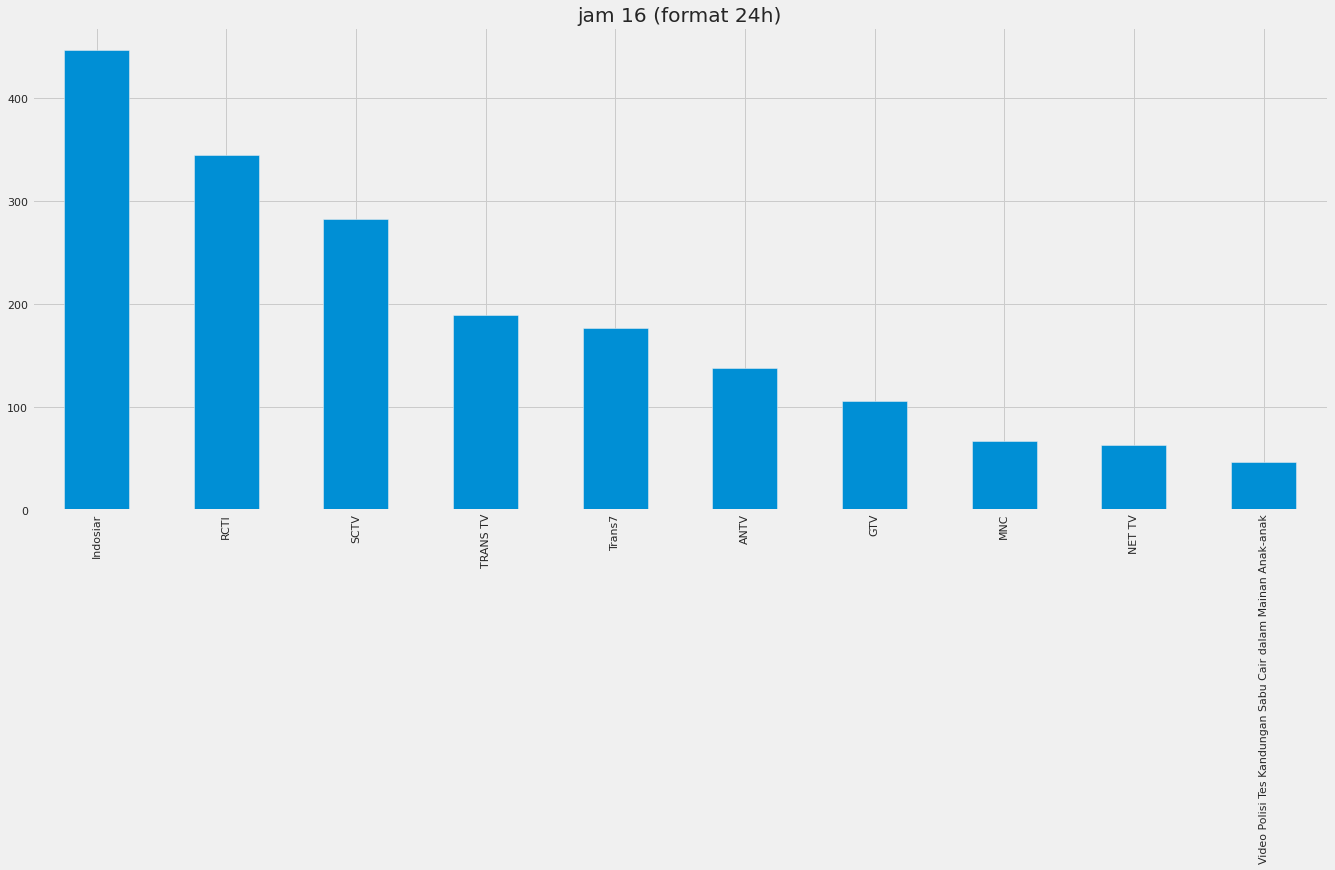

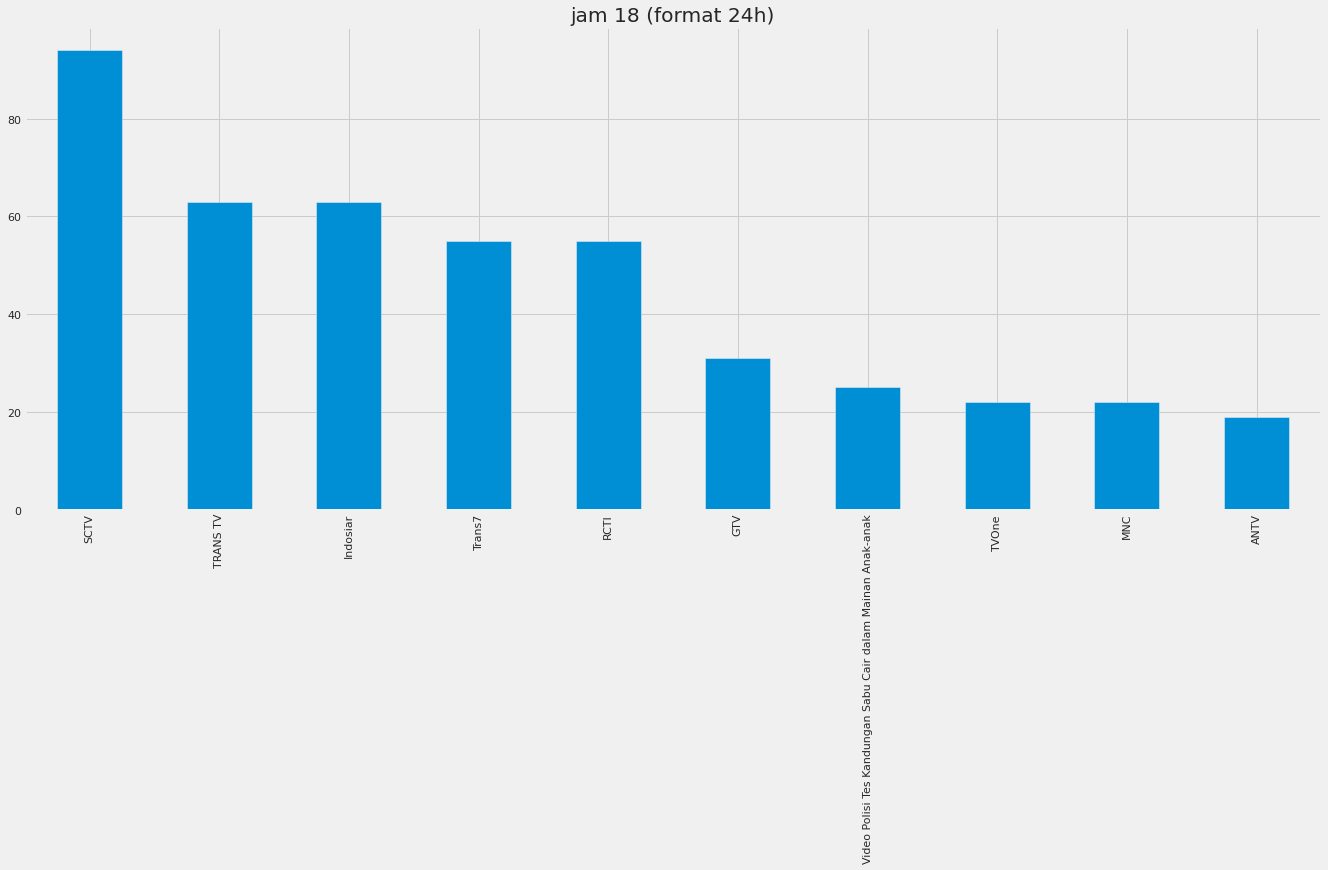

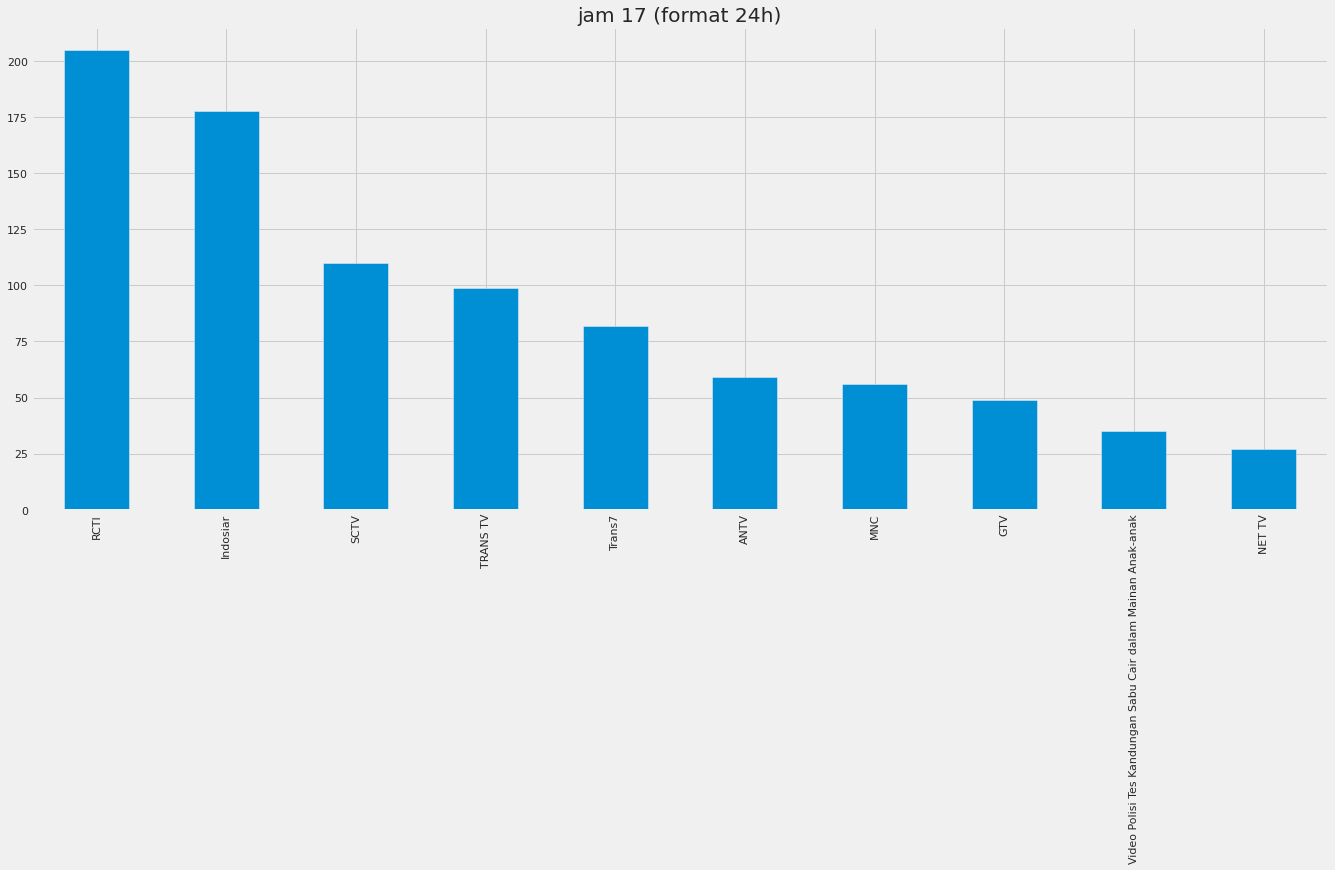

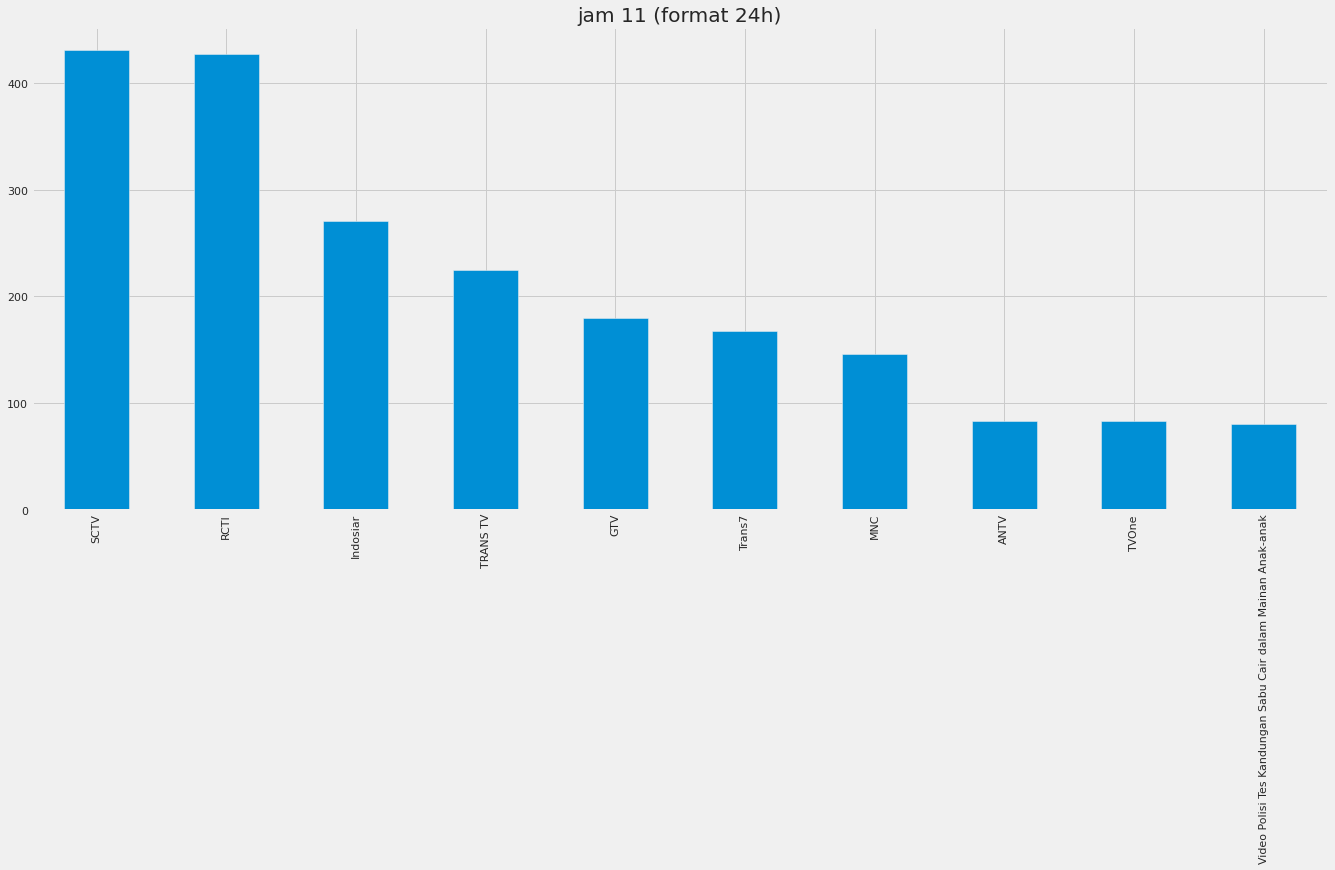

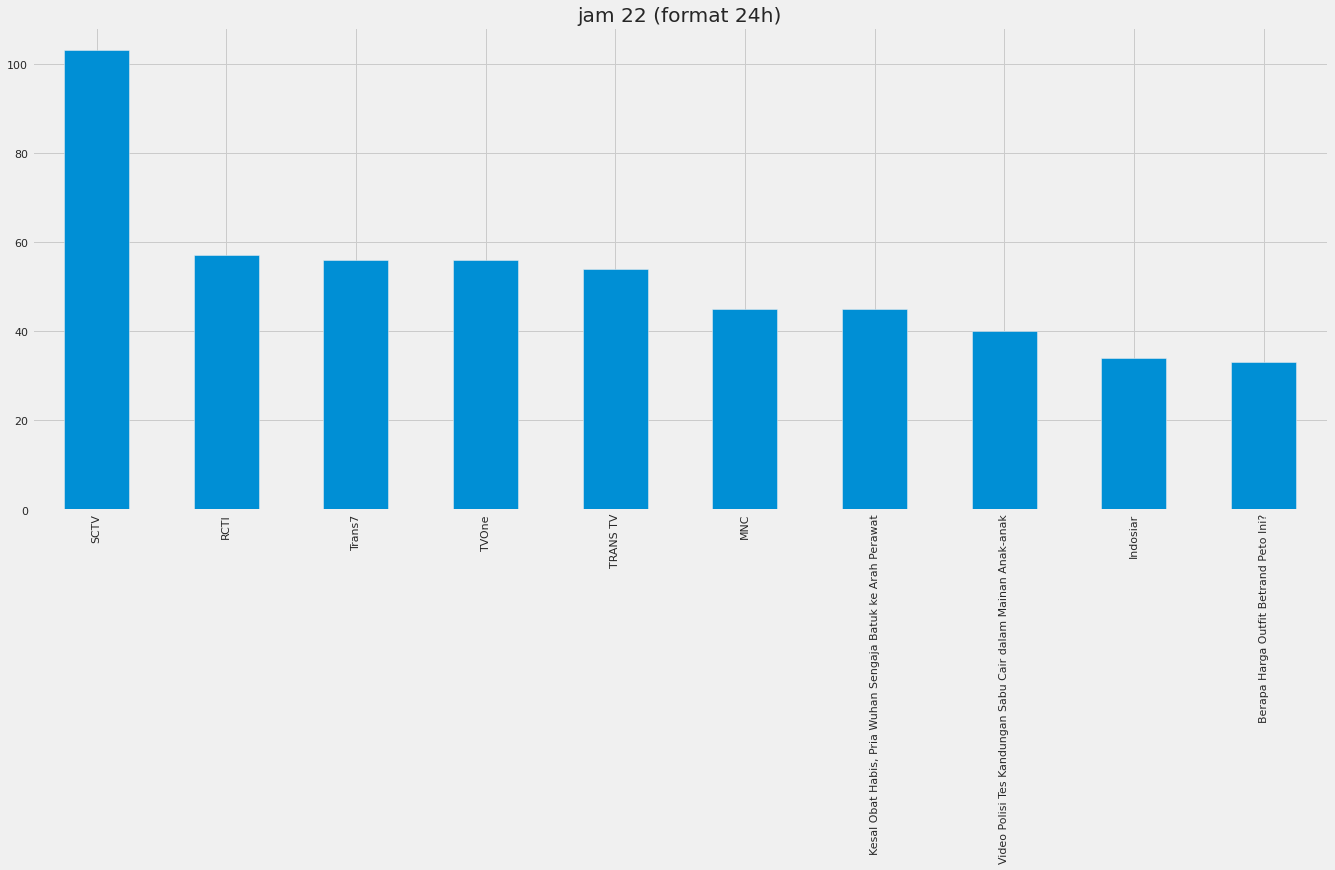

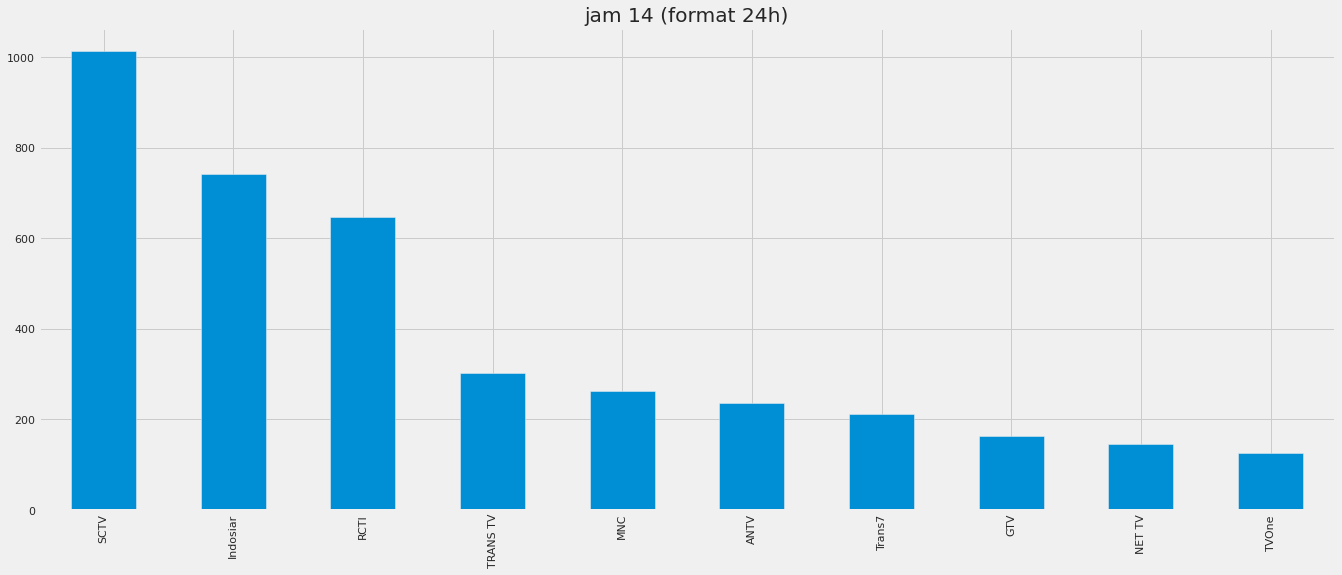

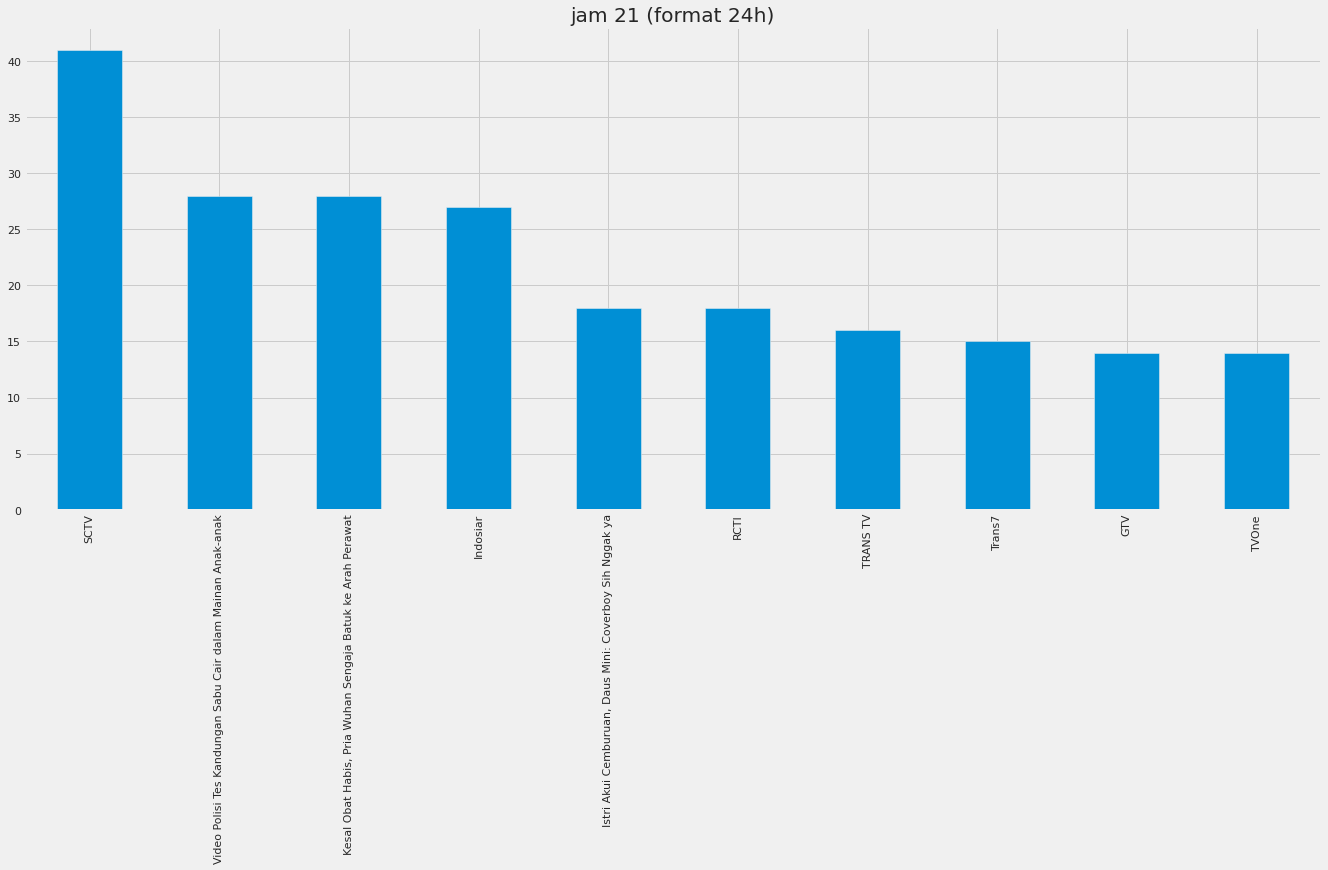

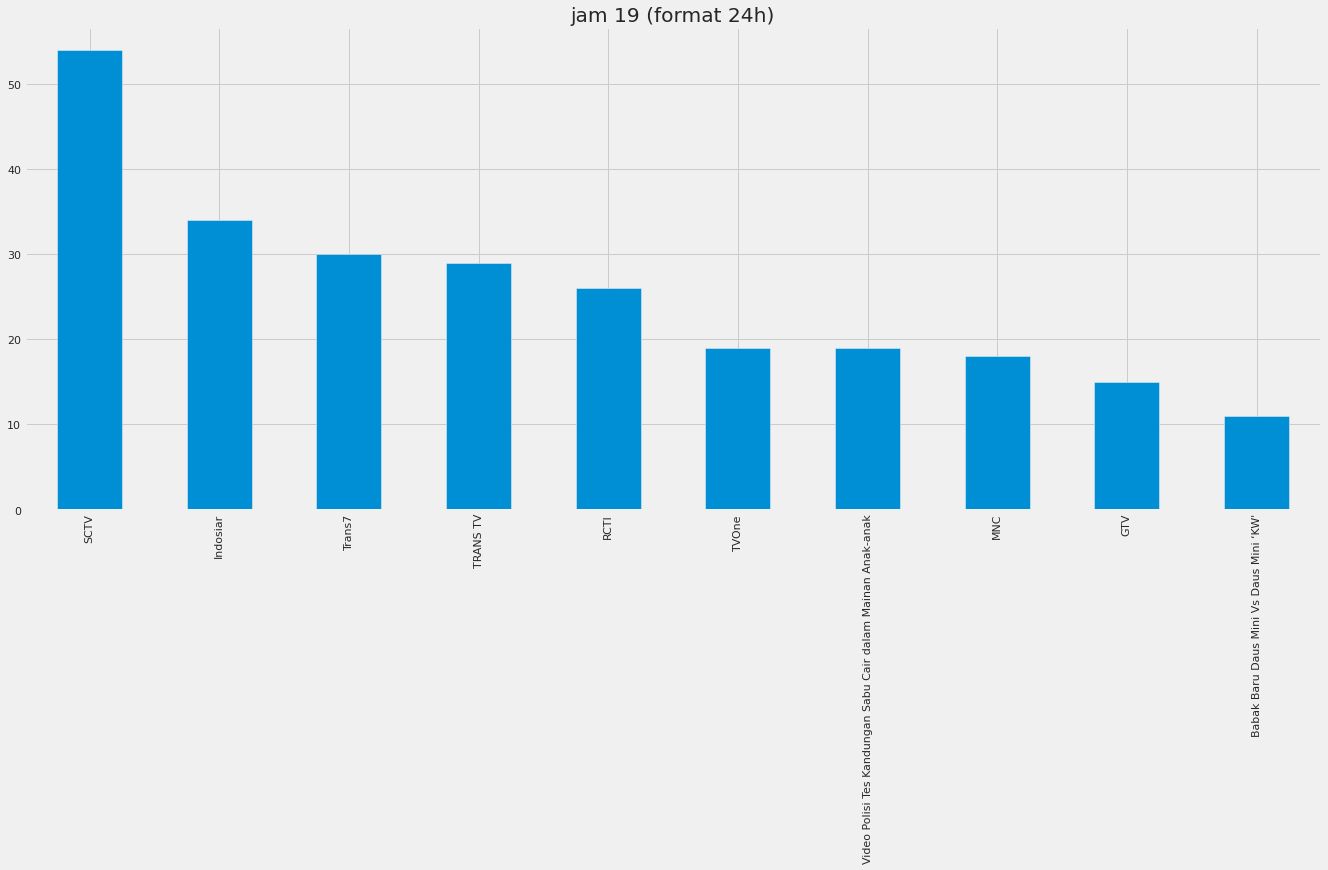

24


In [30]:
i = 0
for time in df['play_time_hour'].unique():
    df[df['play_time_hour']==time]['title'].value_counts().head(10).plot.bar()
    plt.title(f'jam {time} (format 24h)')
    plt.show()
    i+=1
print(i)

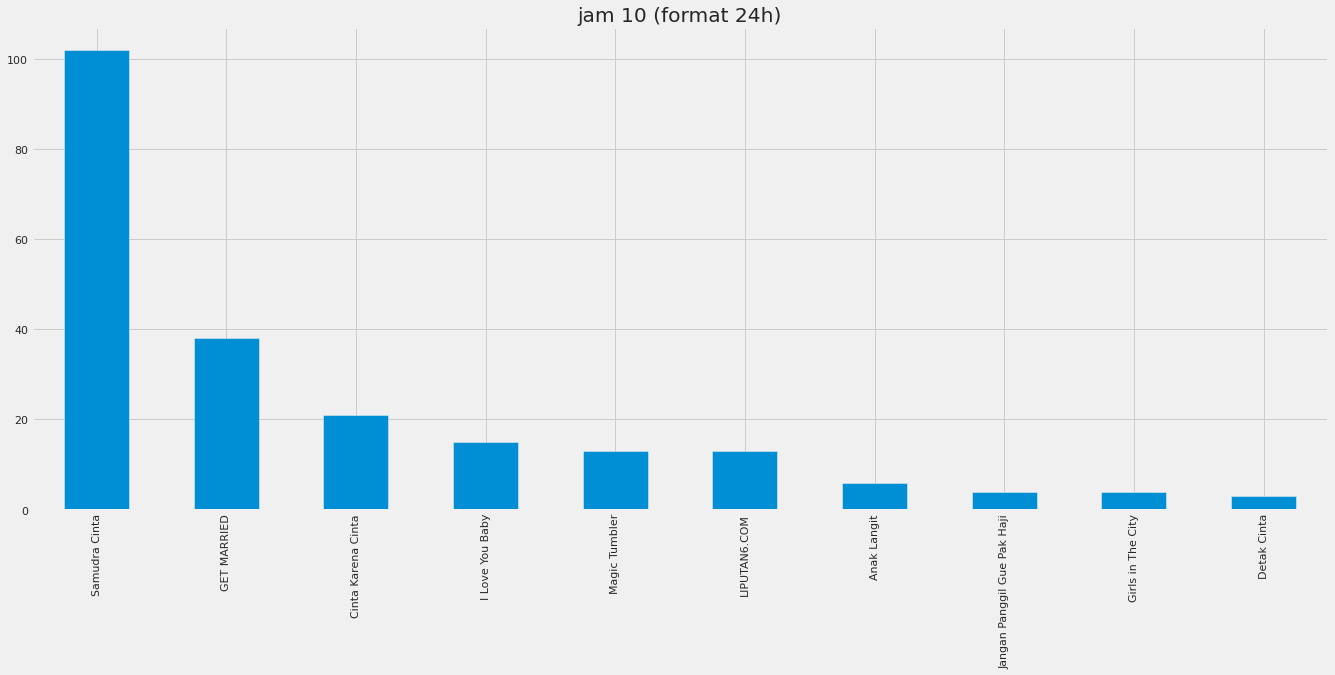

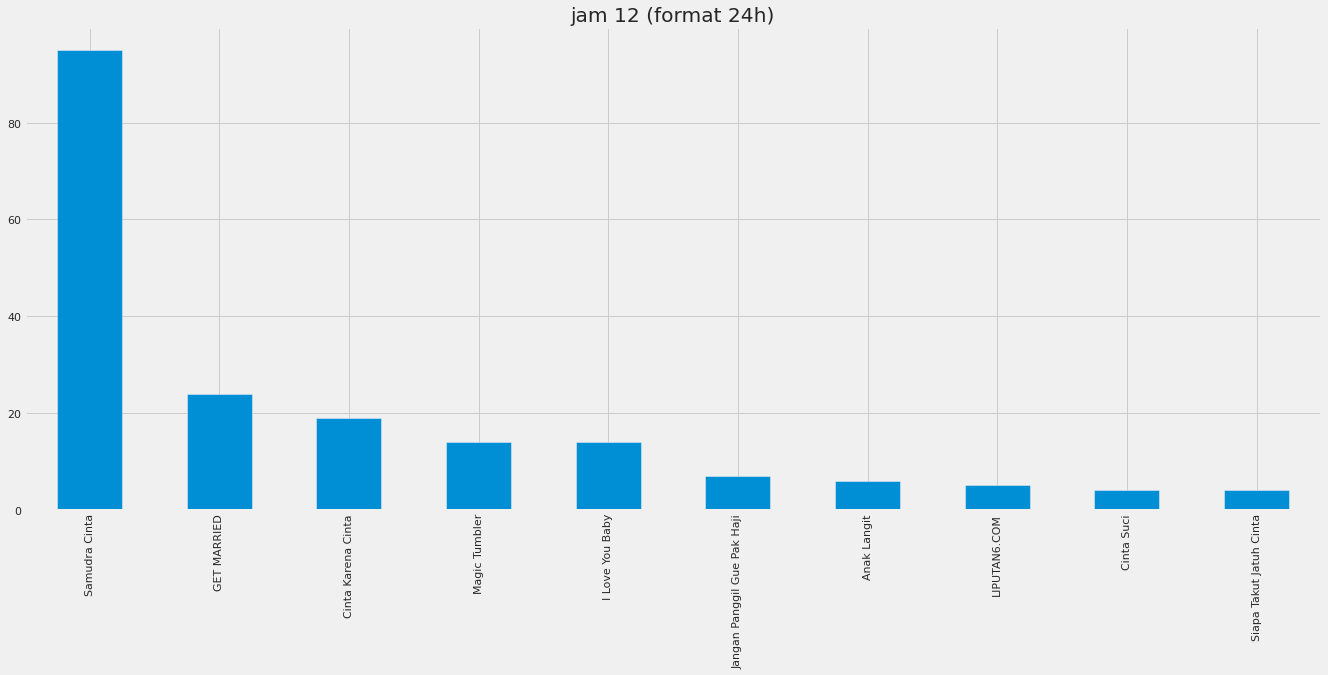

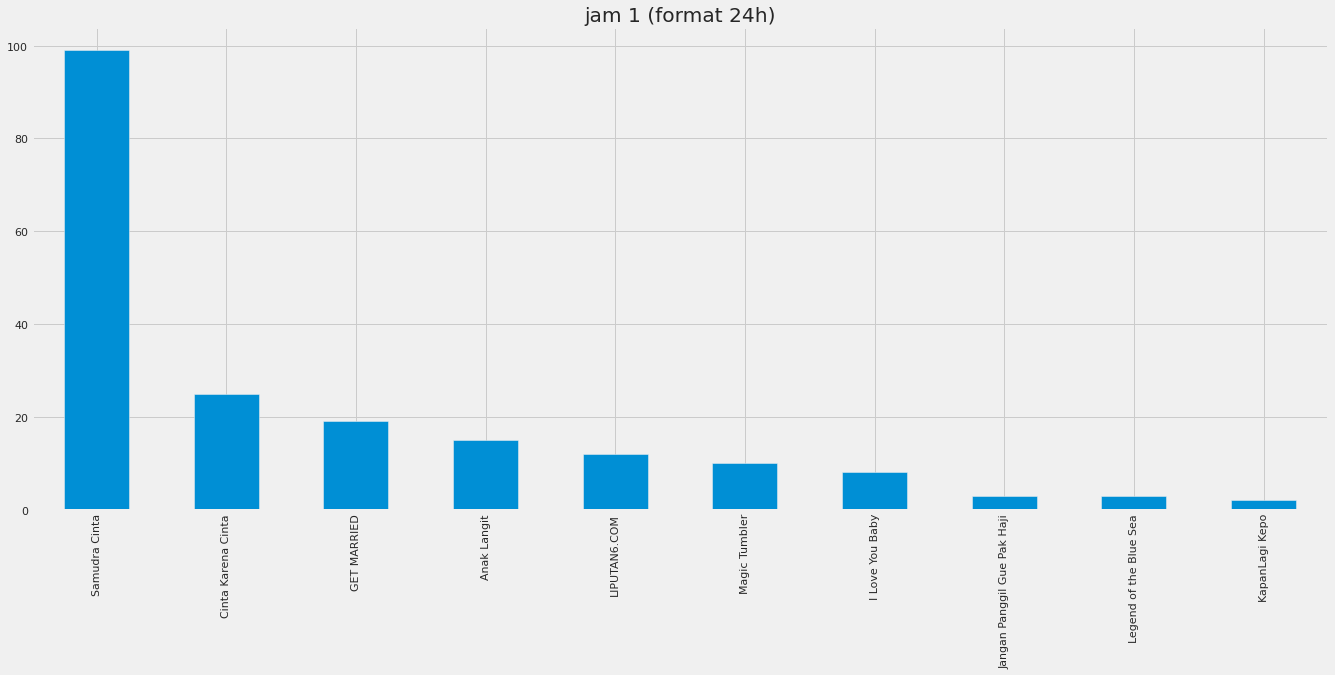

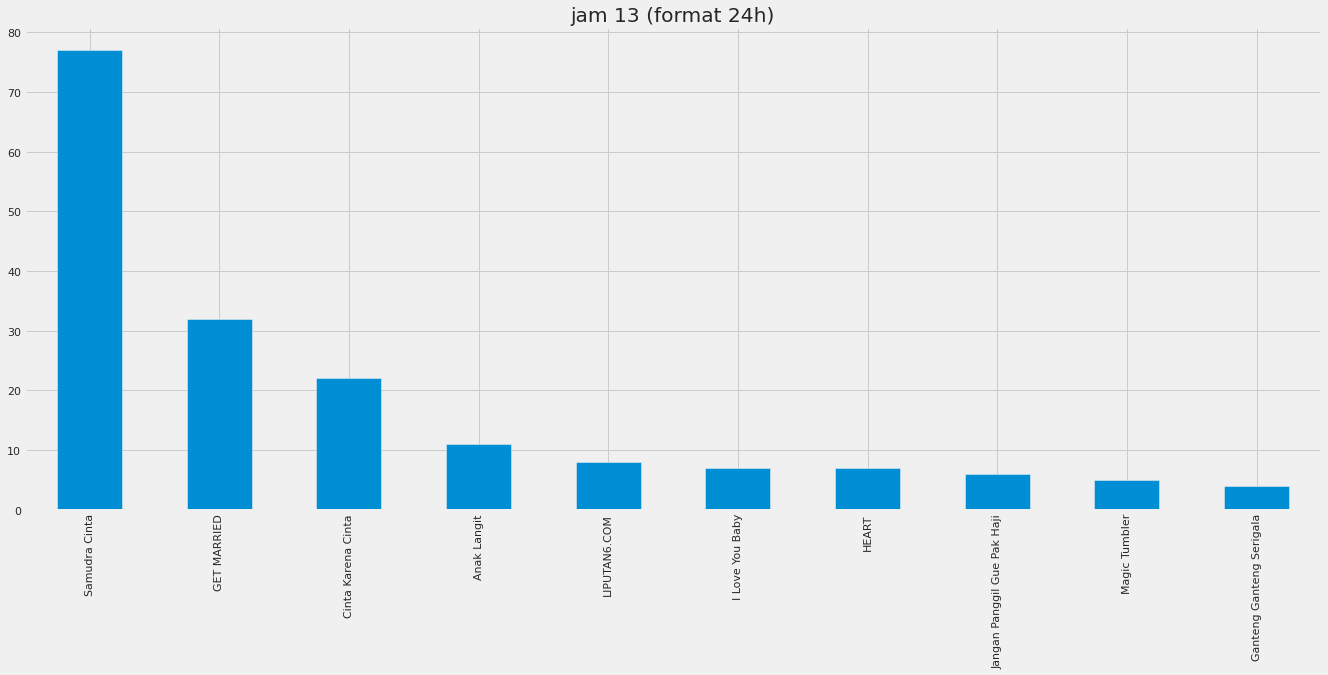

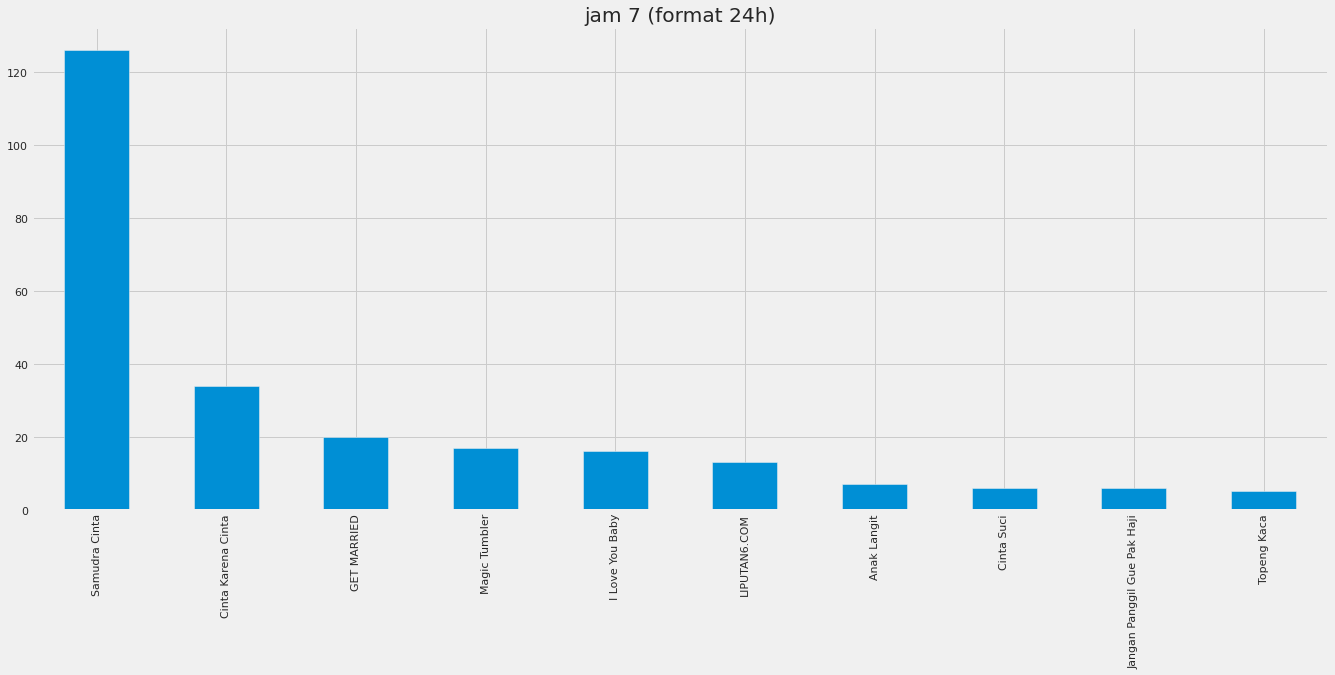

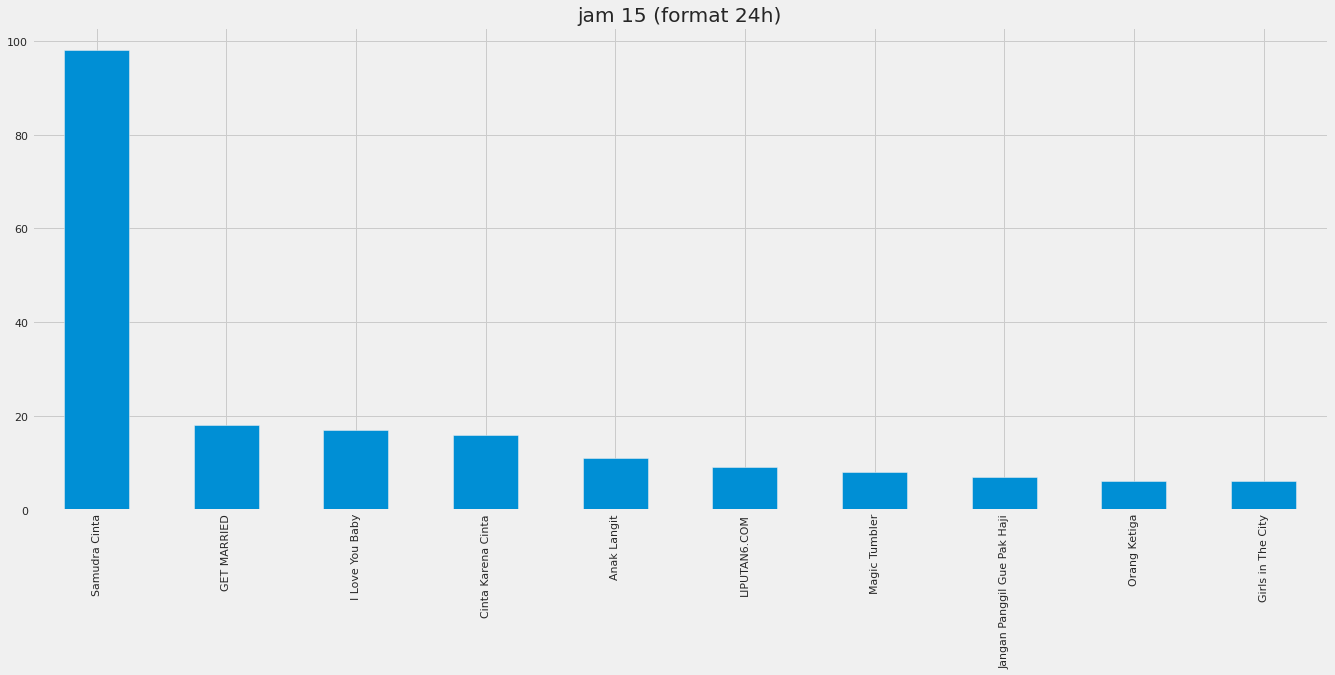

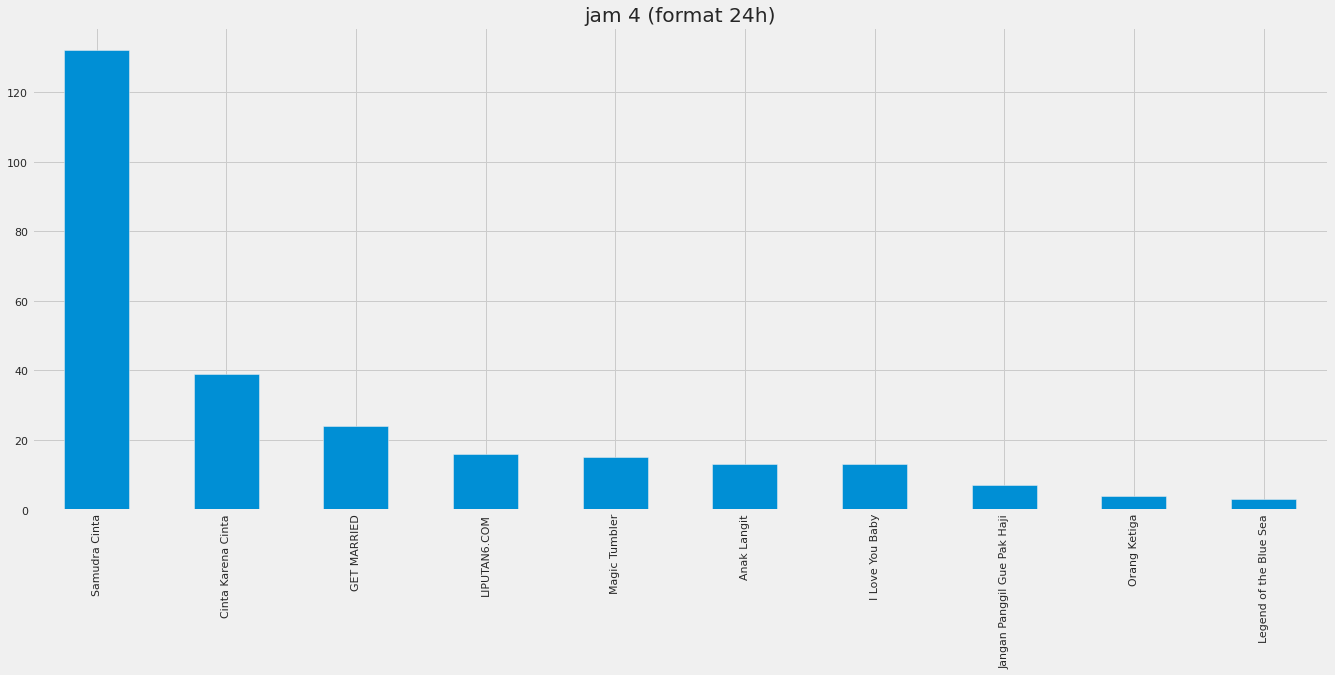

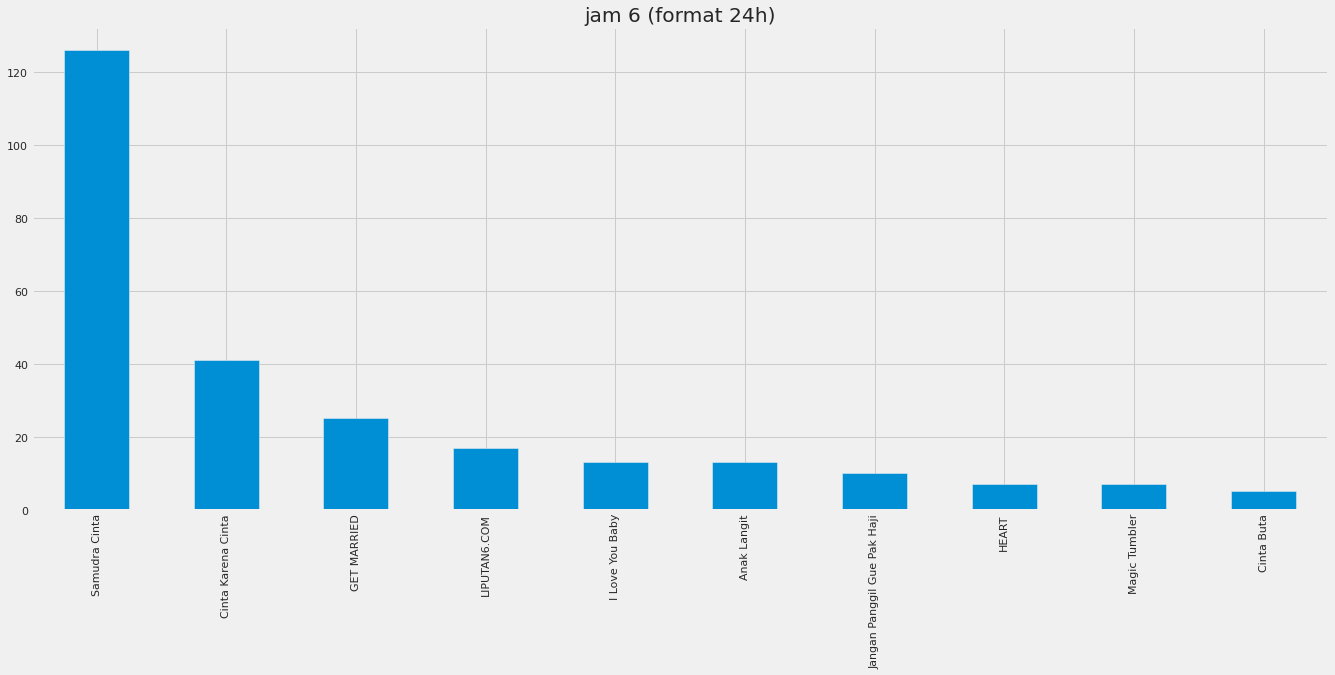

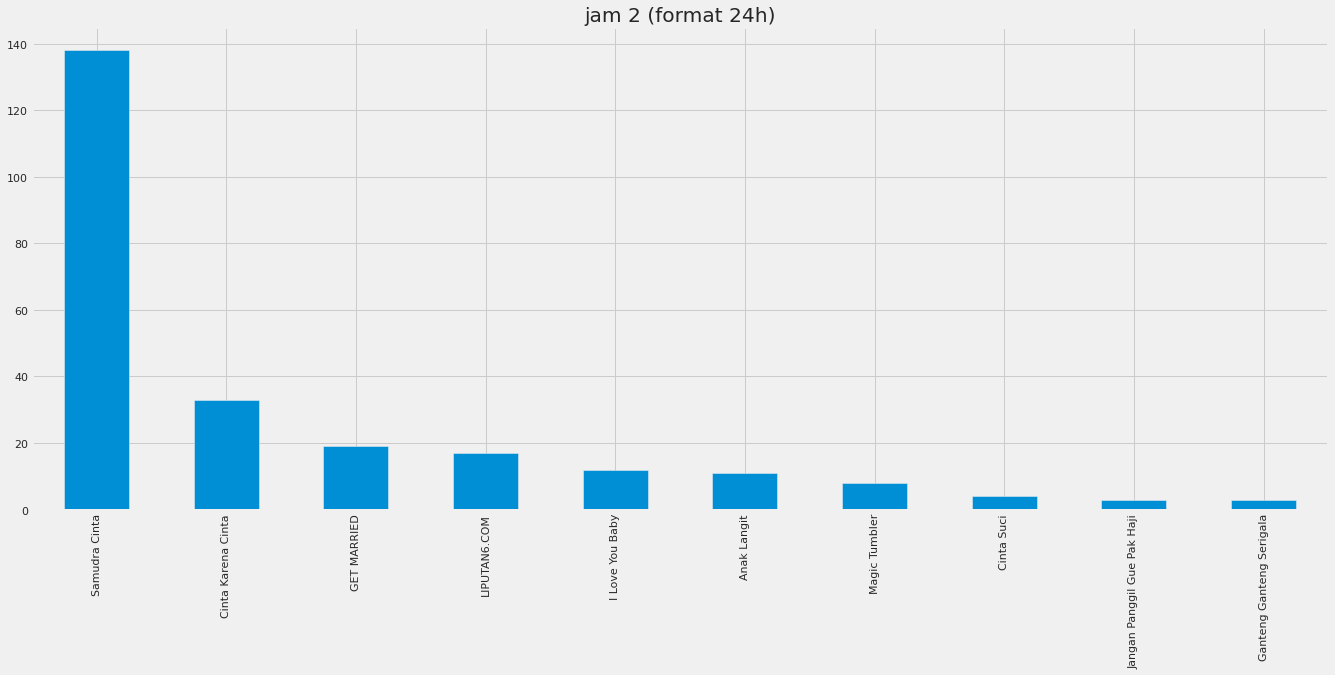

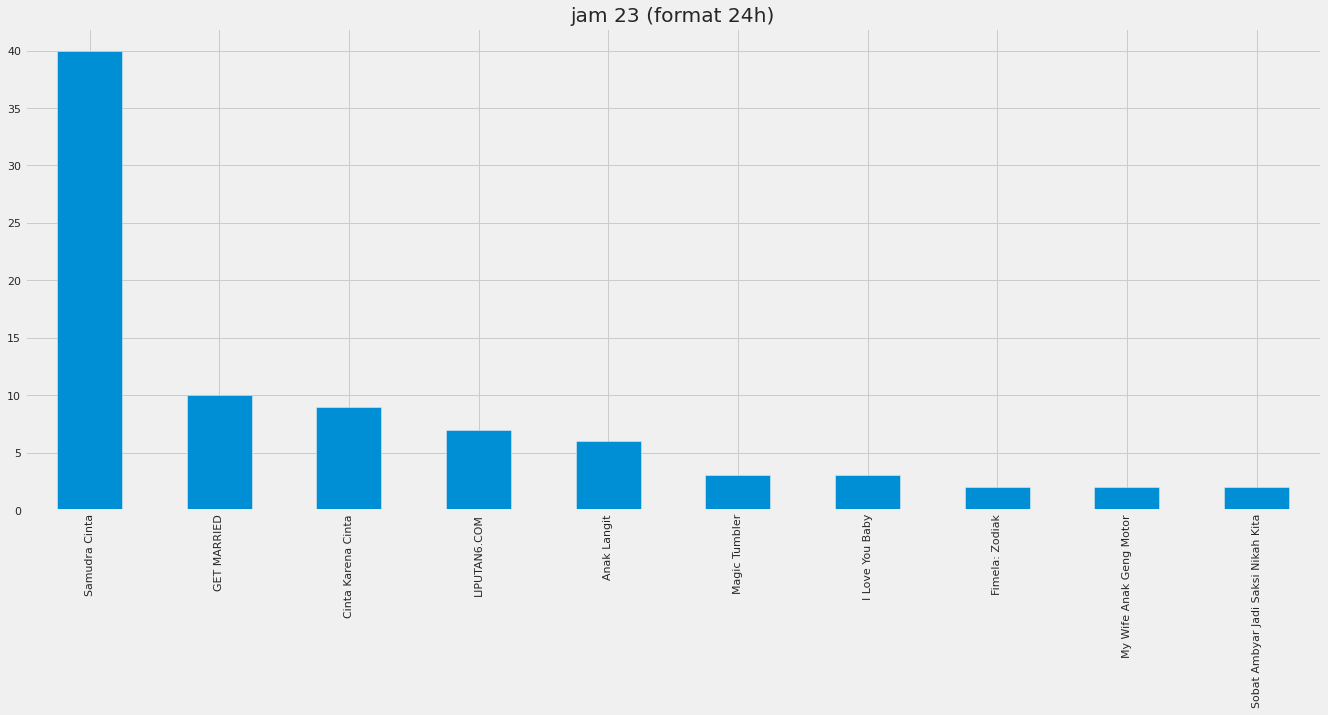

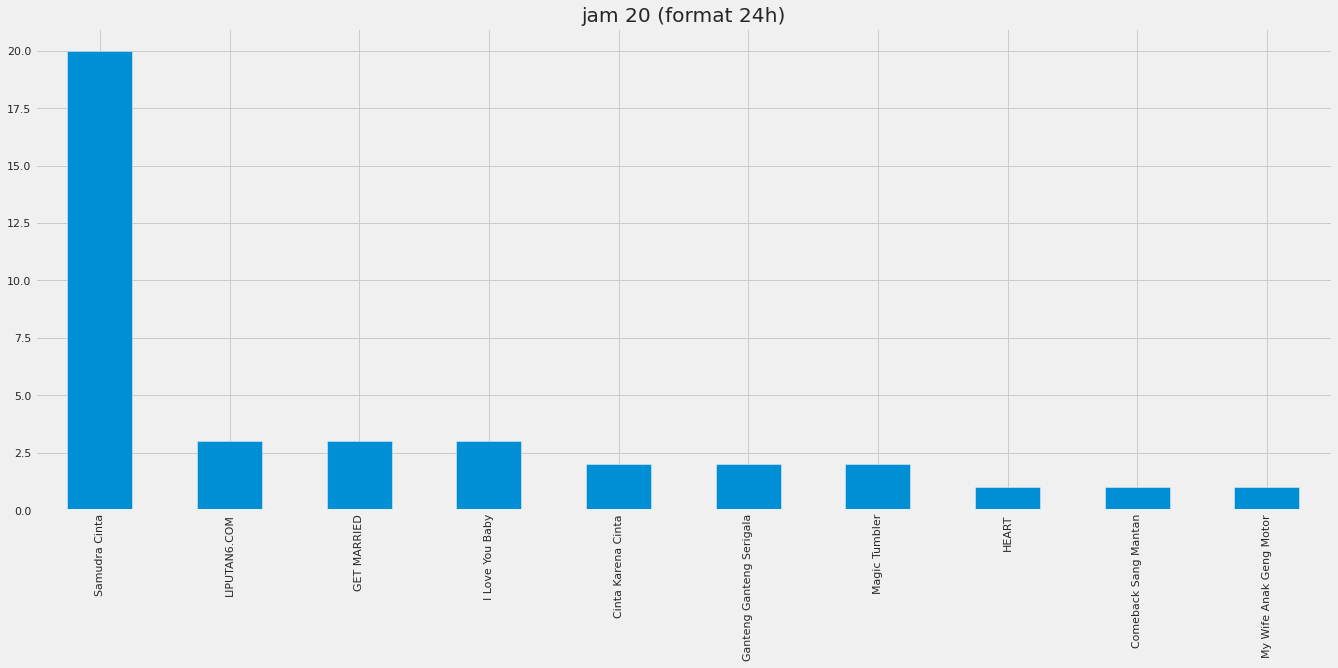

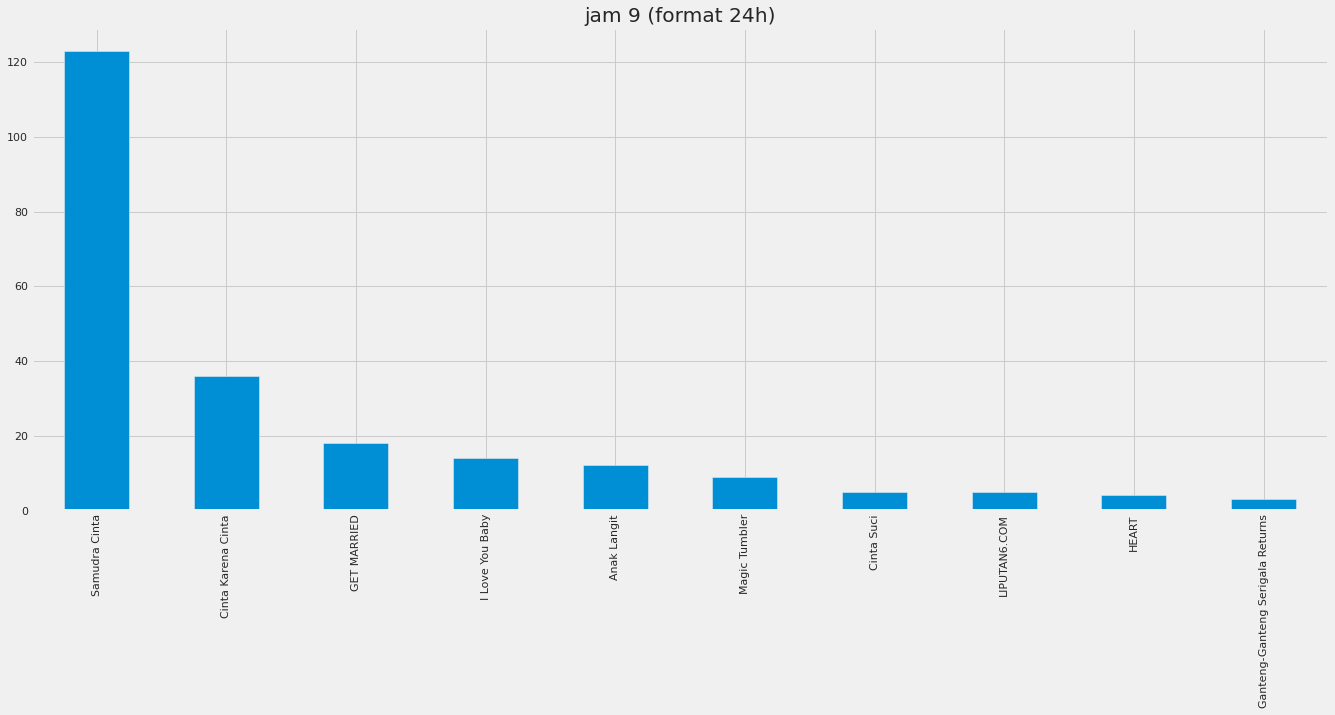

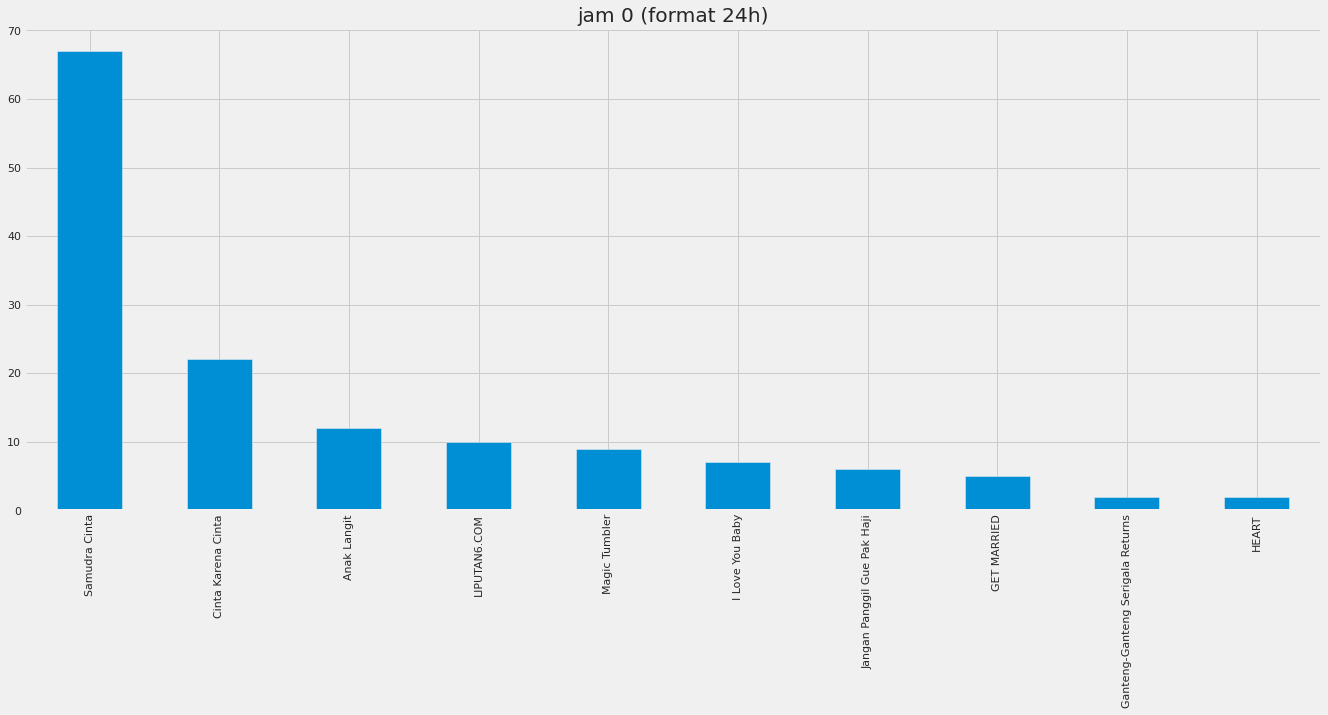

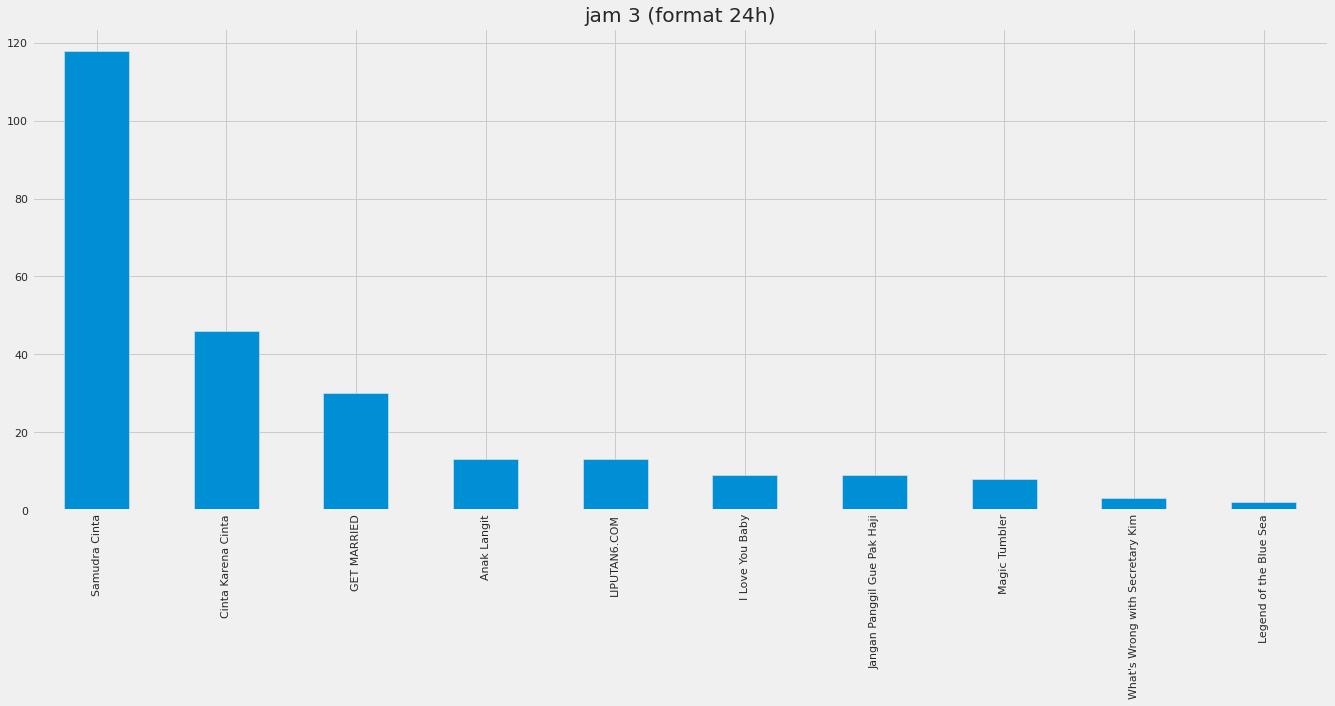

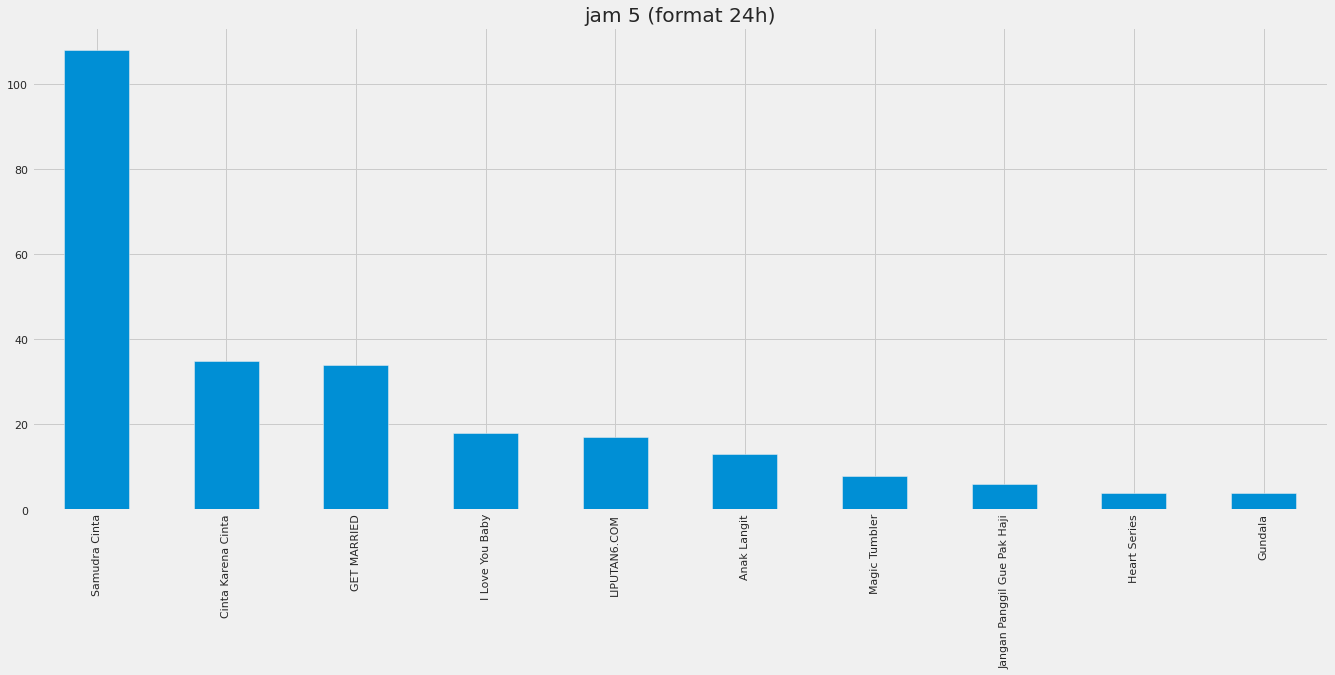

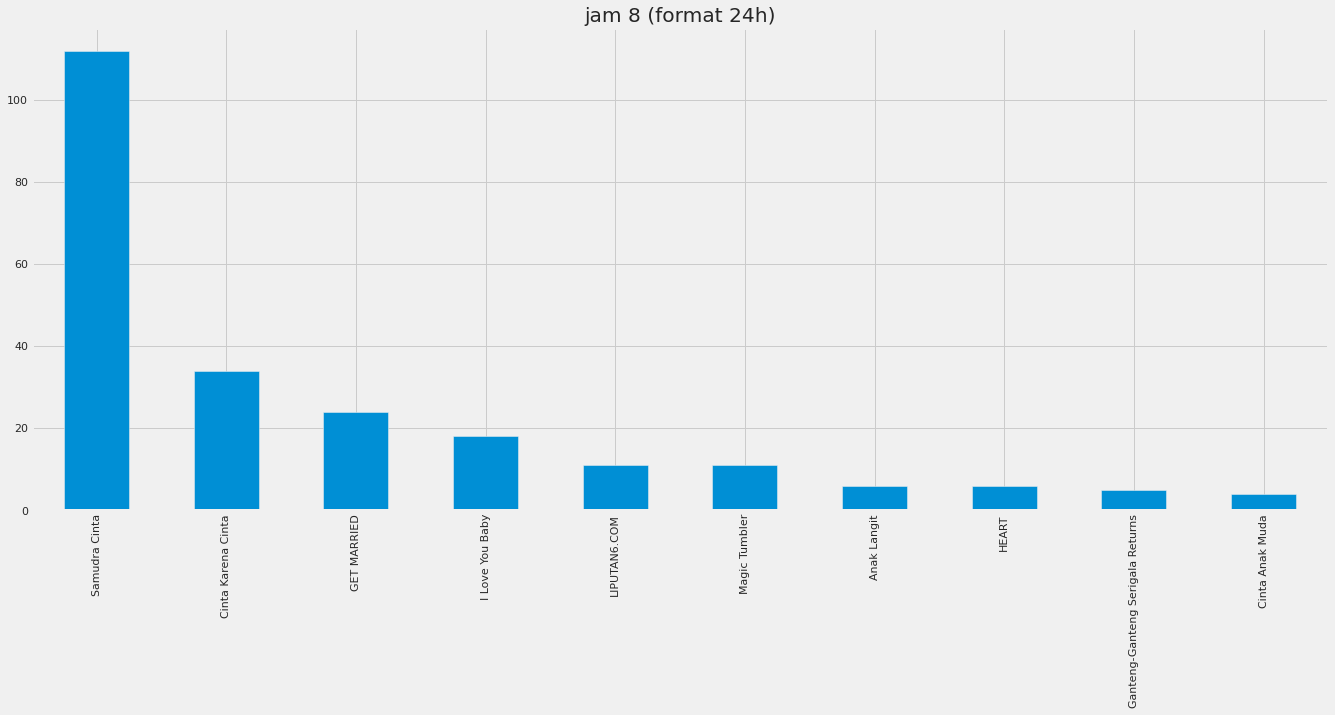

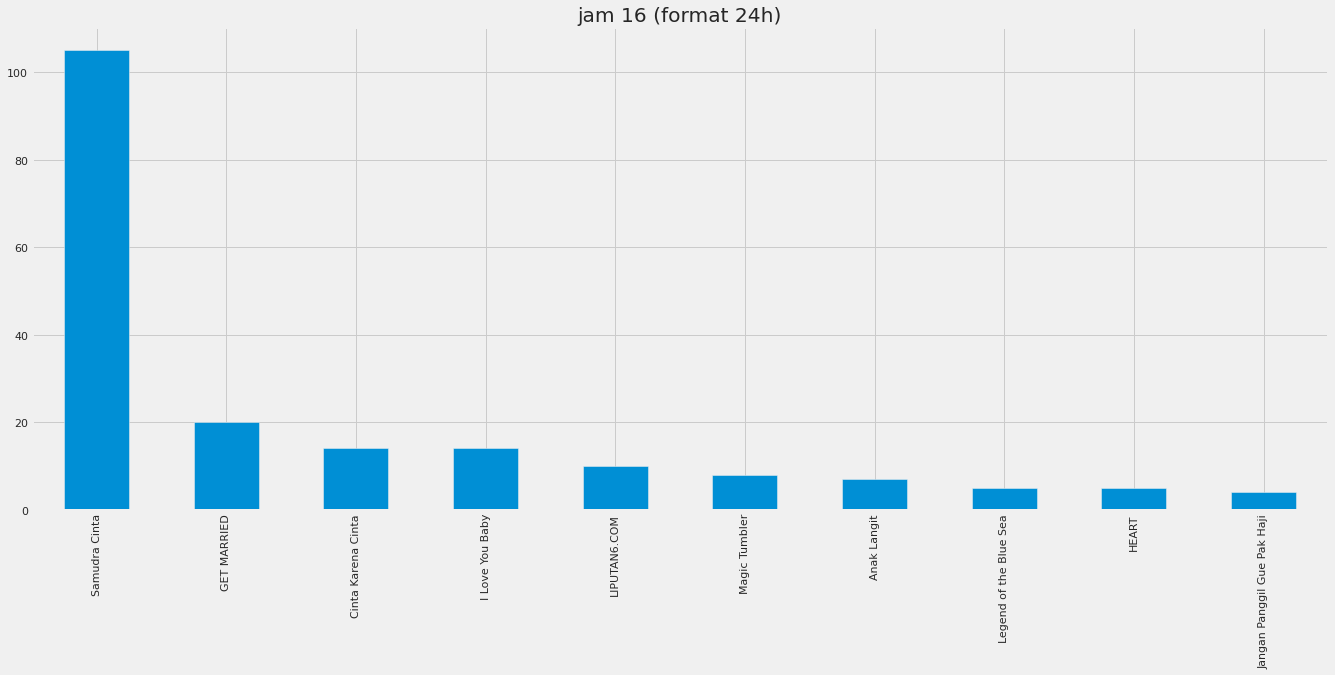

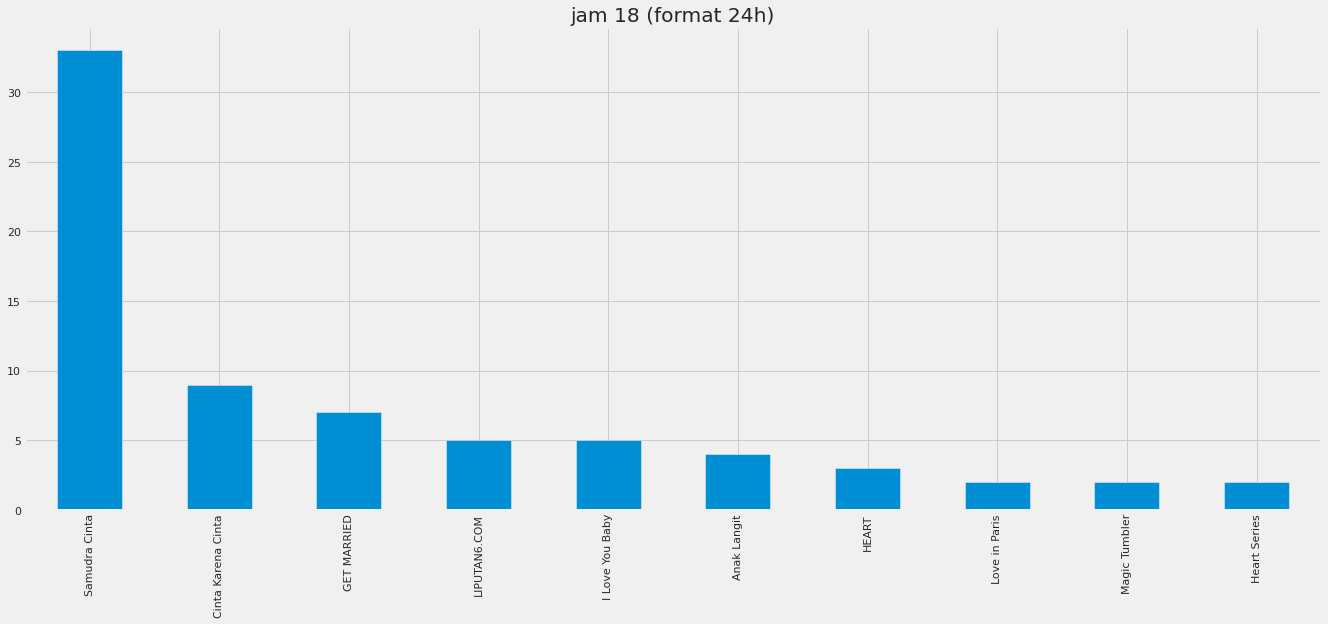

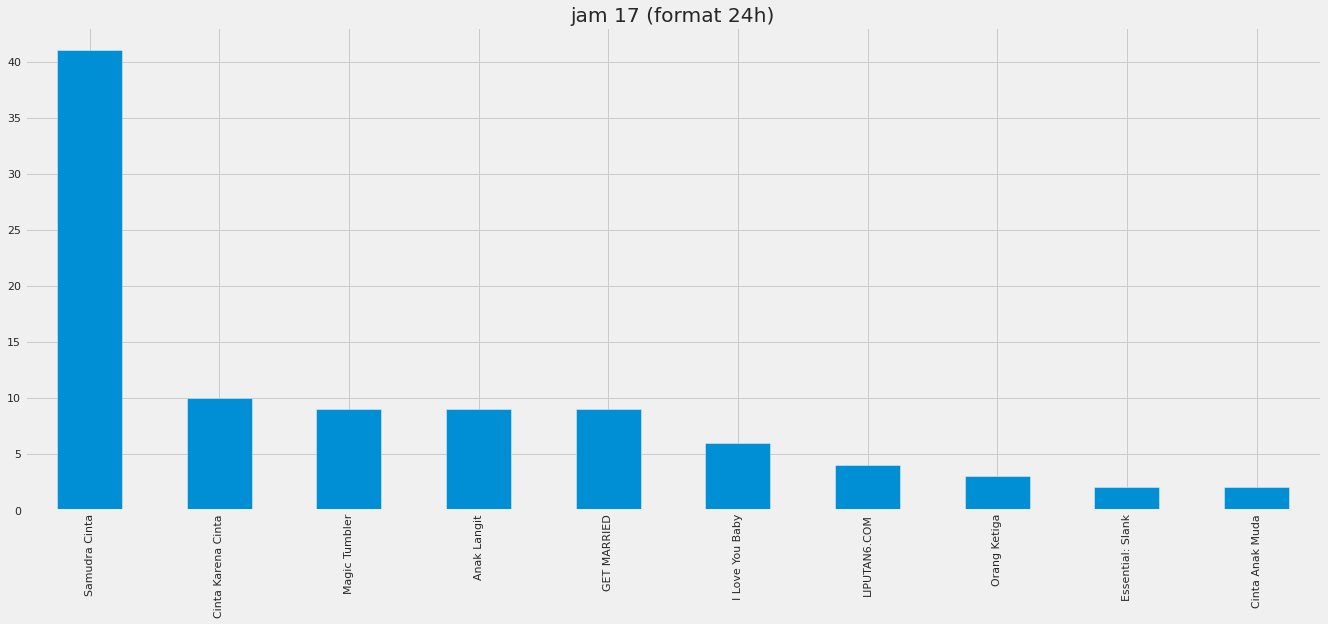

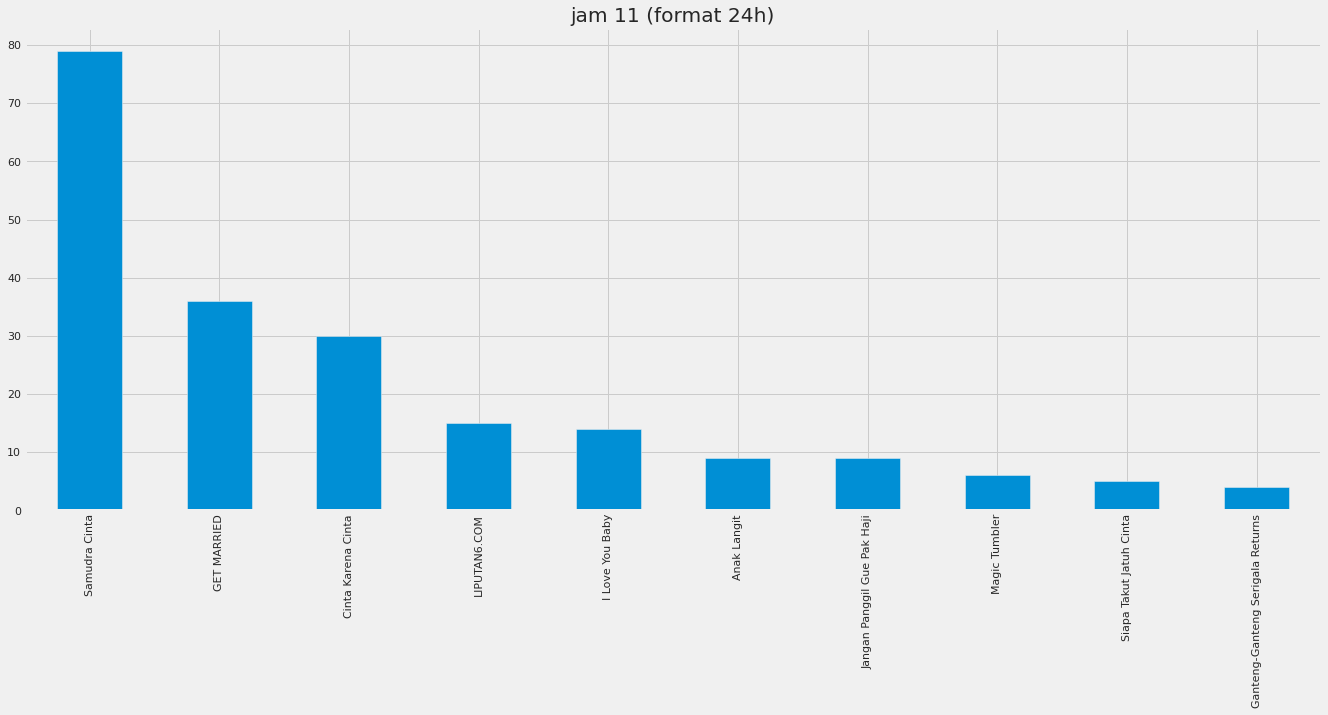

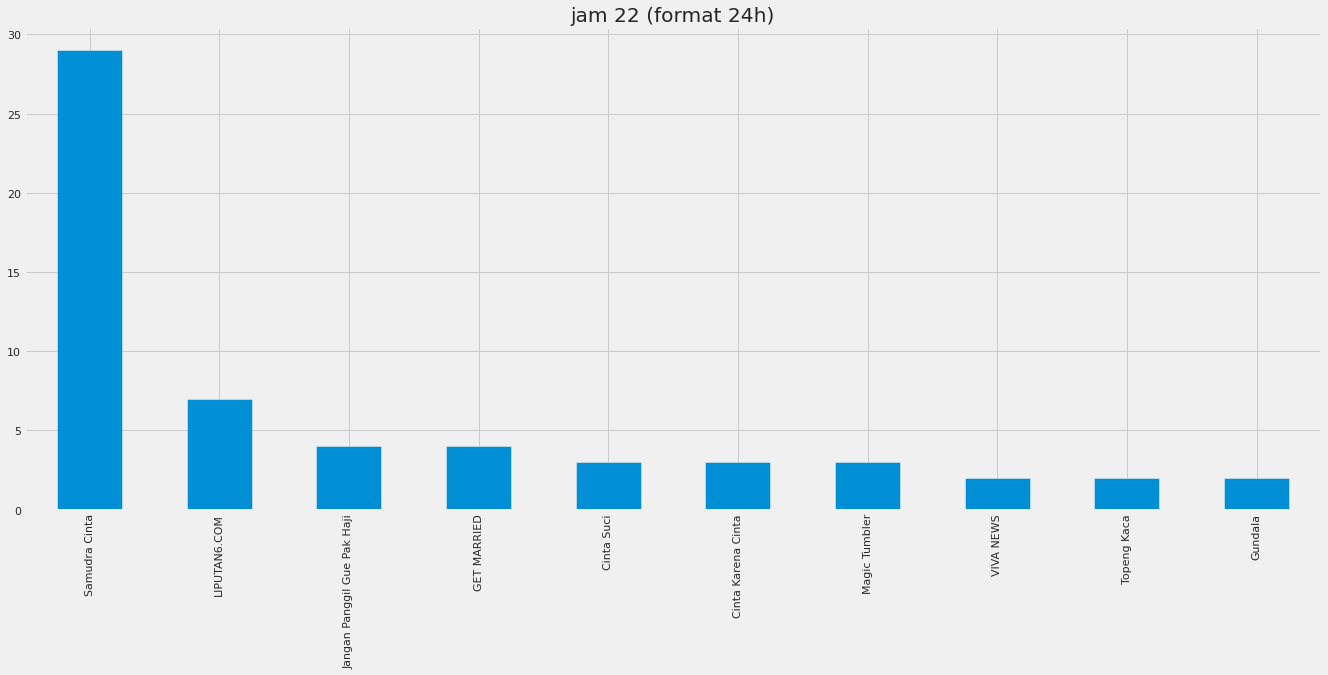

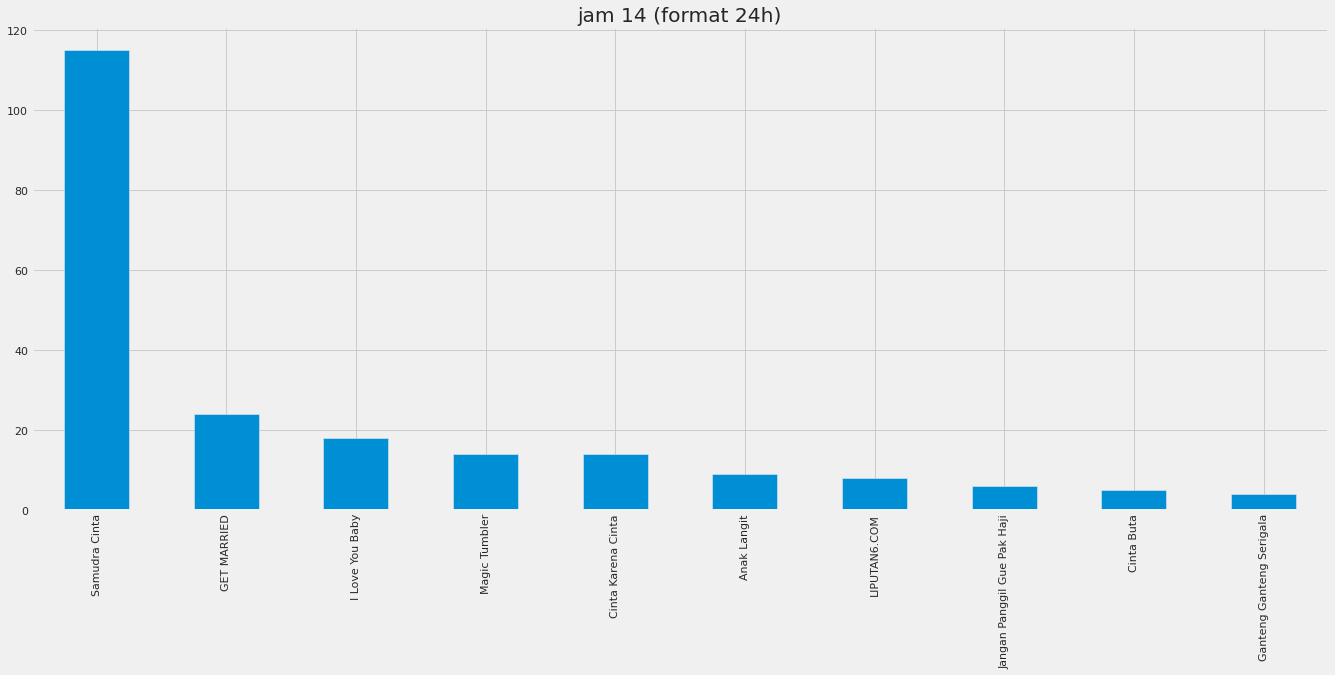

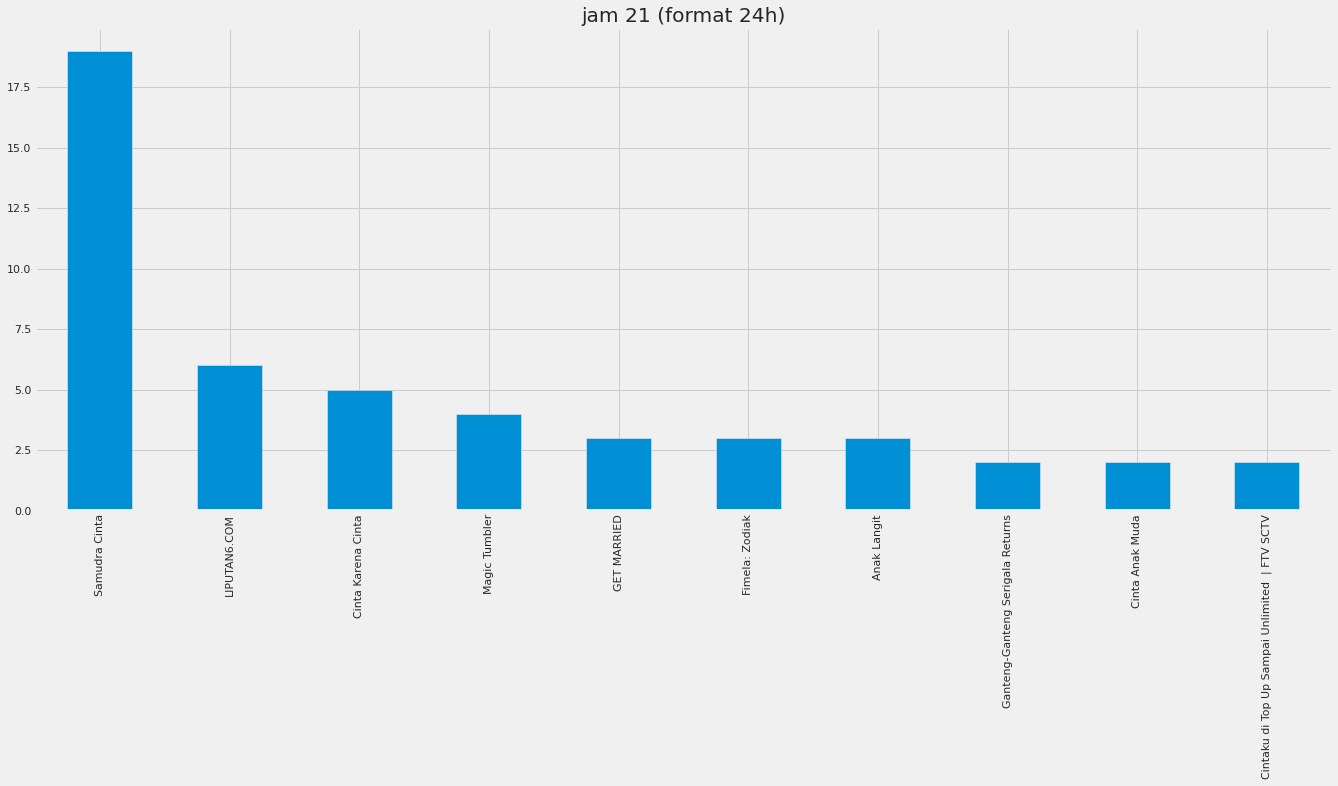

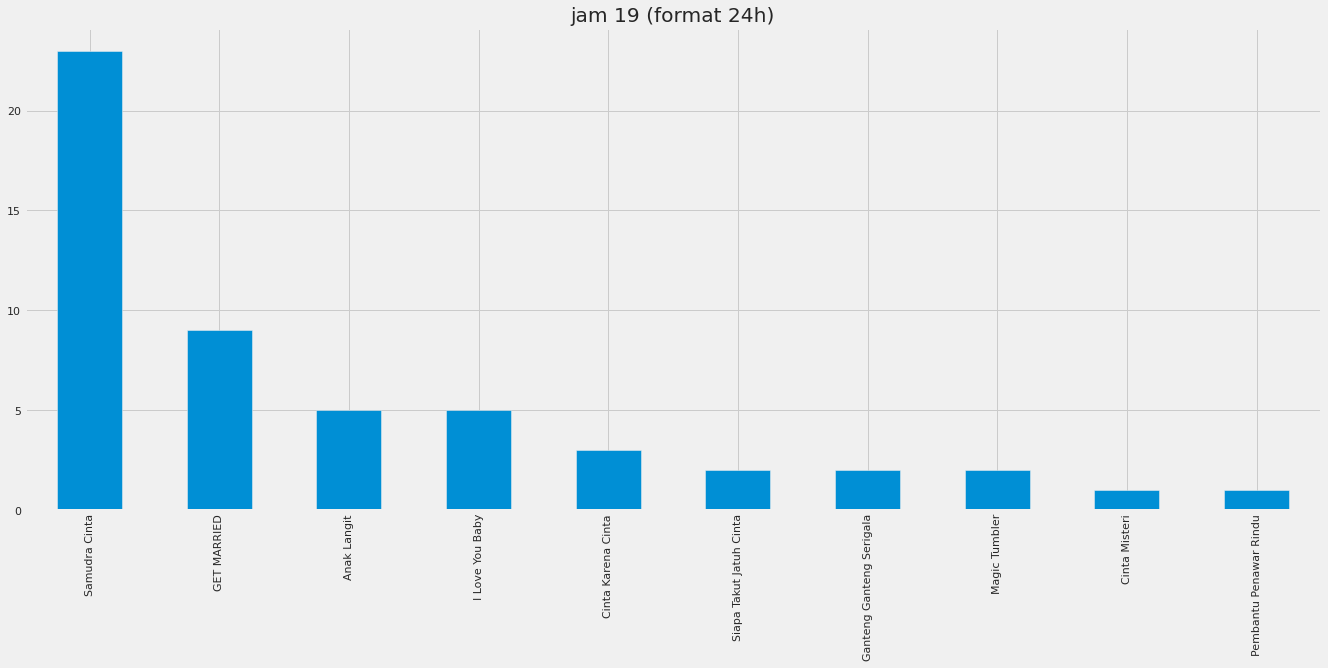

24


In [31]:
i = 0
for time in df['play_time_hour'].unique():
    df[df['play_time_hour']==time]['film_title'].value_counts().head(10).plot.bar()
    plt.title(f'jam {time} (format 24h)')
    plt.show()
    i+=1
print(i)

In [32]:
#distribusi genre, title dan film yang di tonton berdasarkan hari

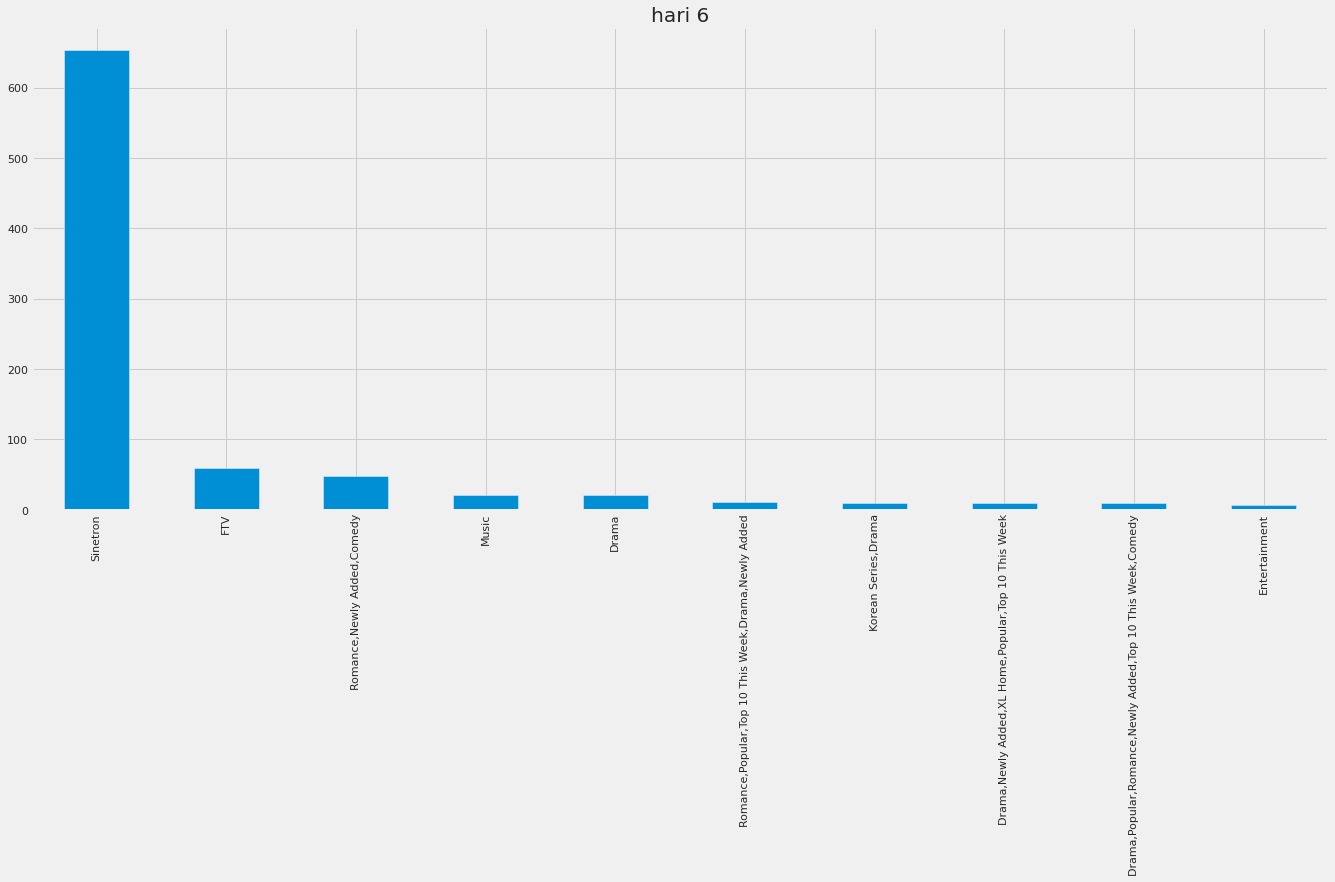

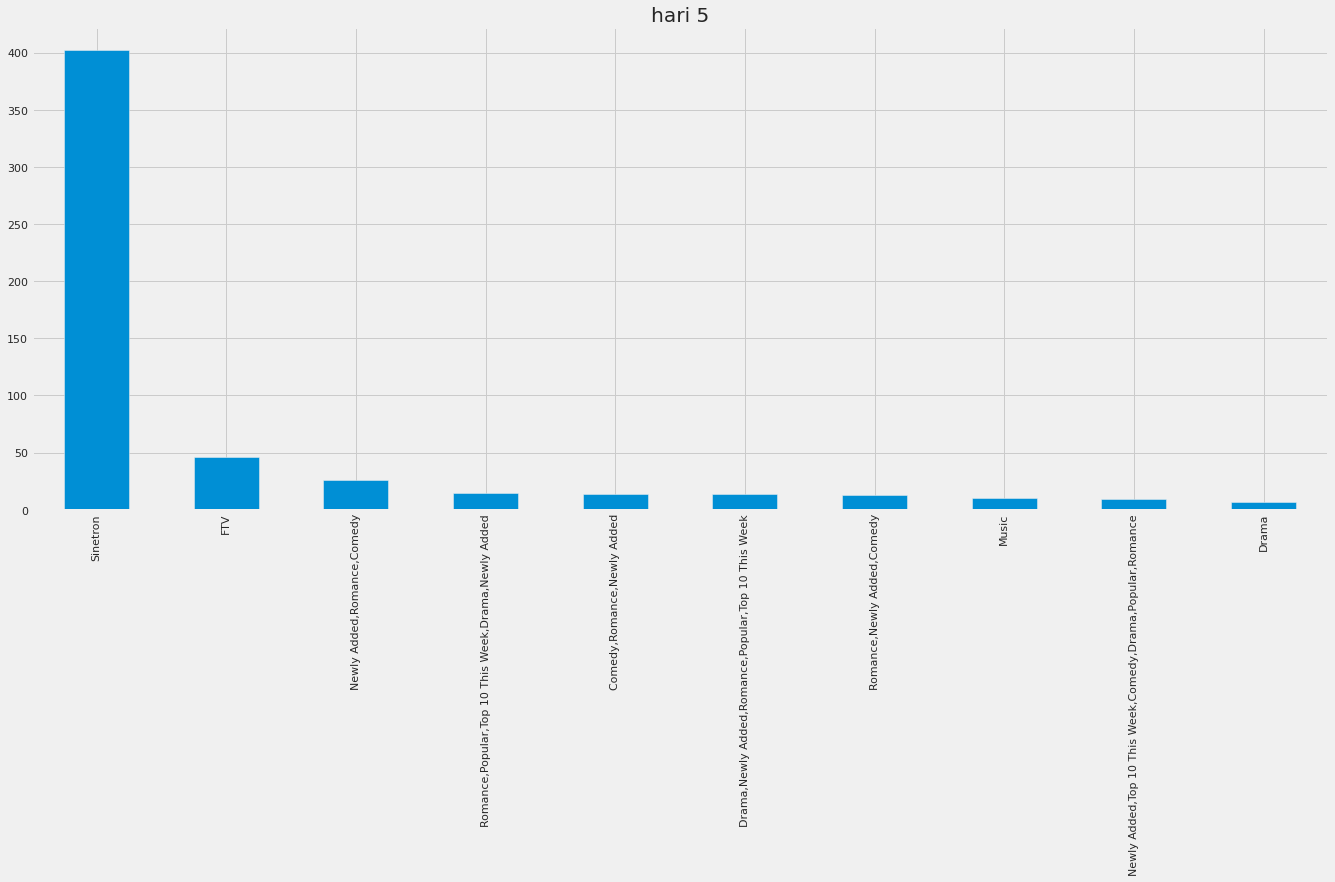

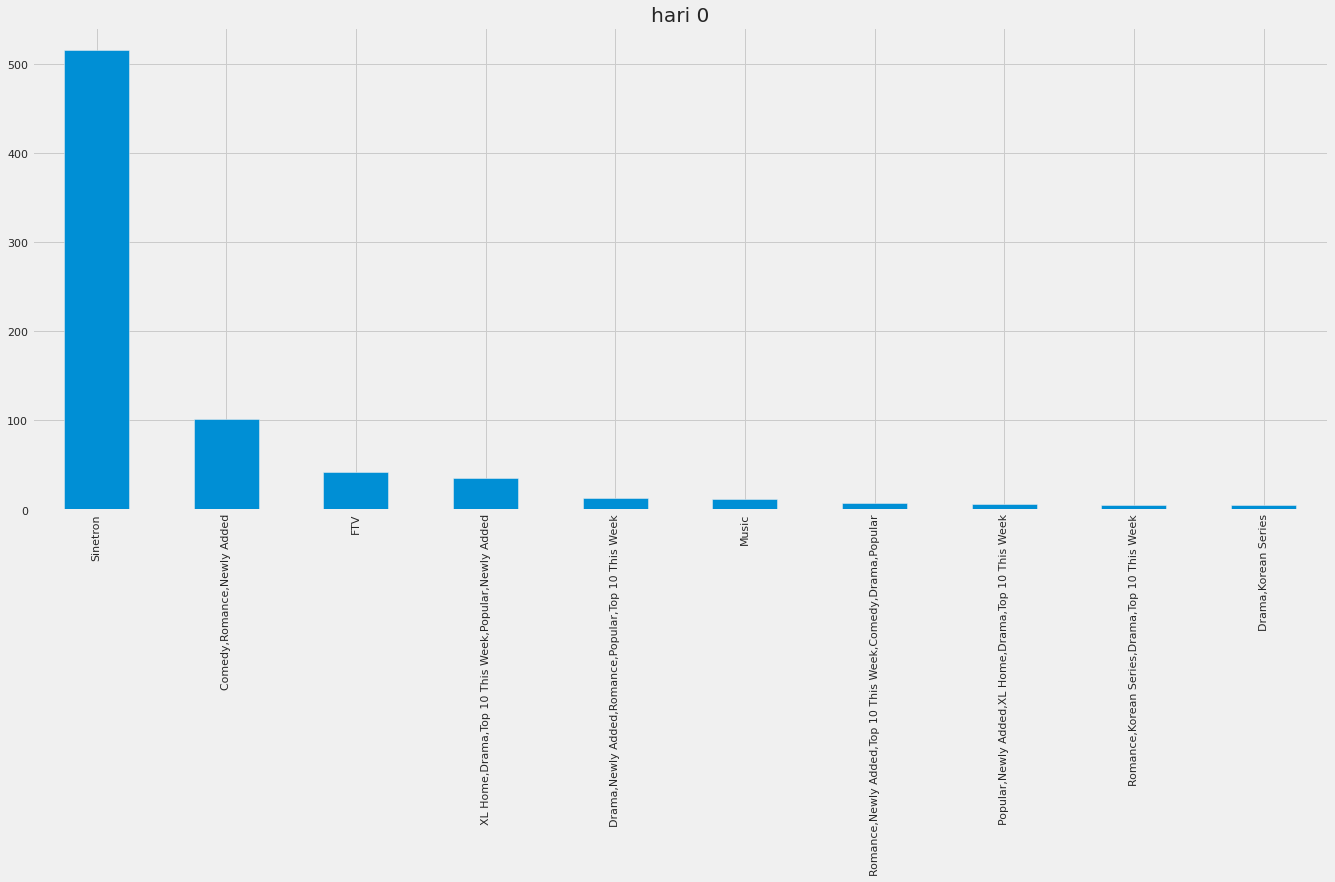

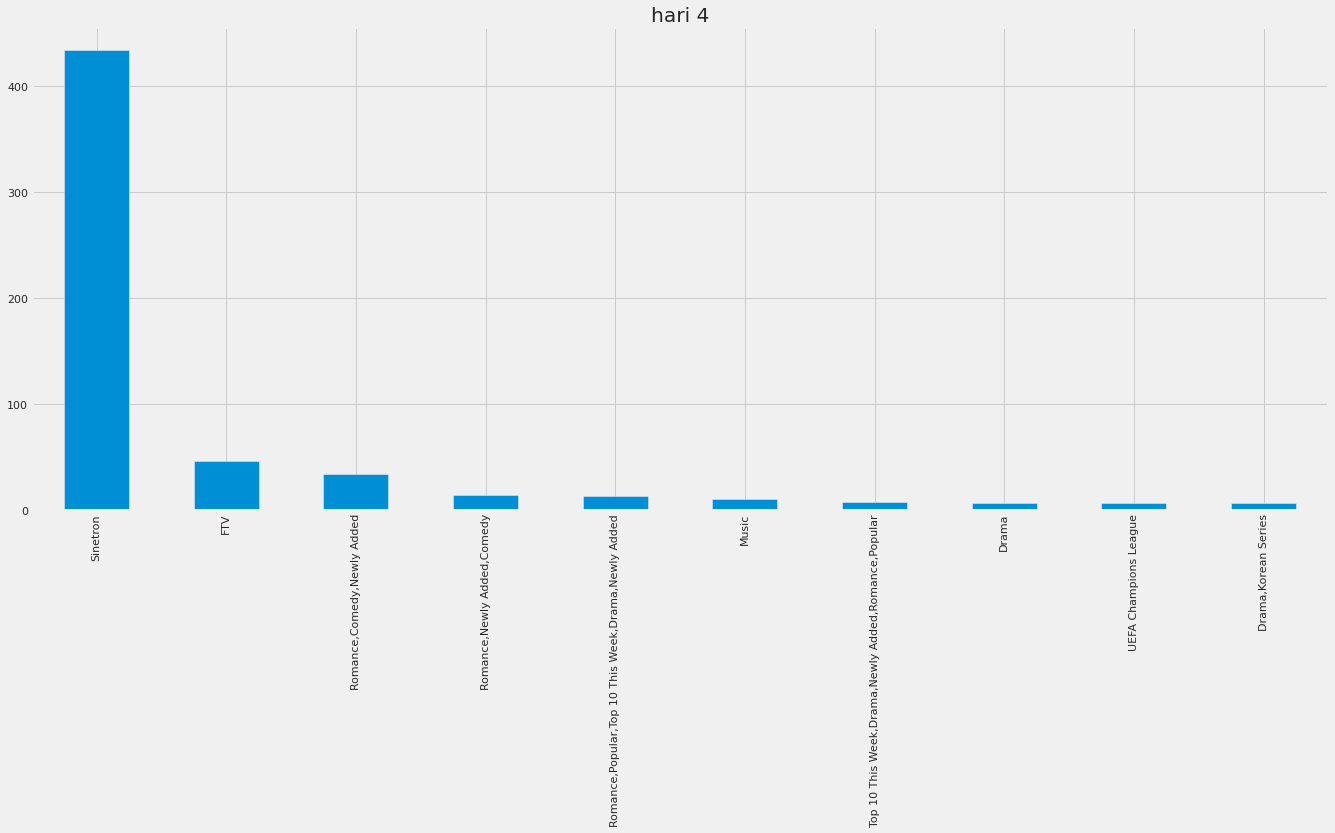

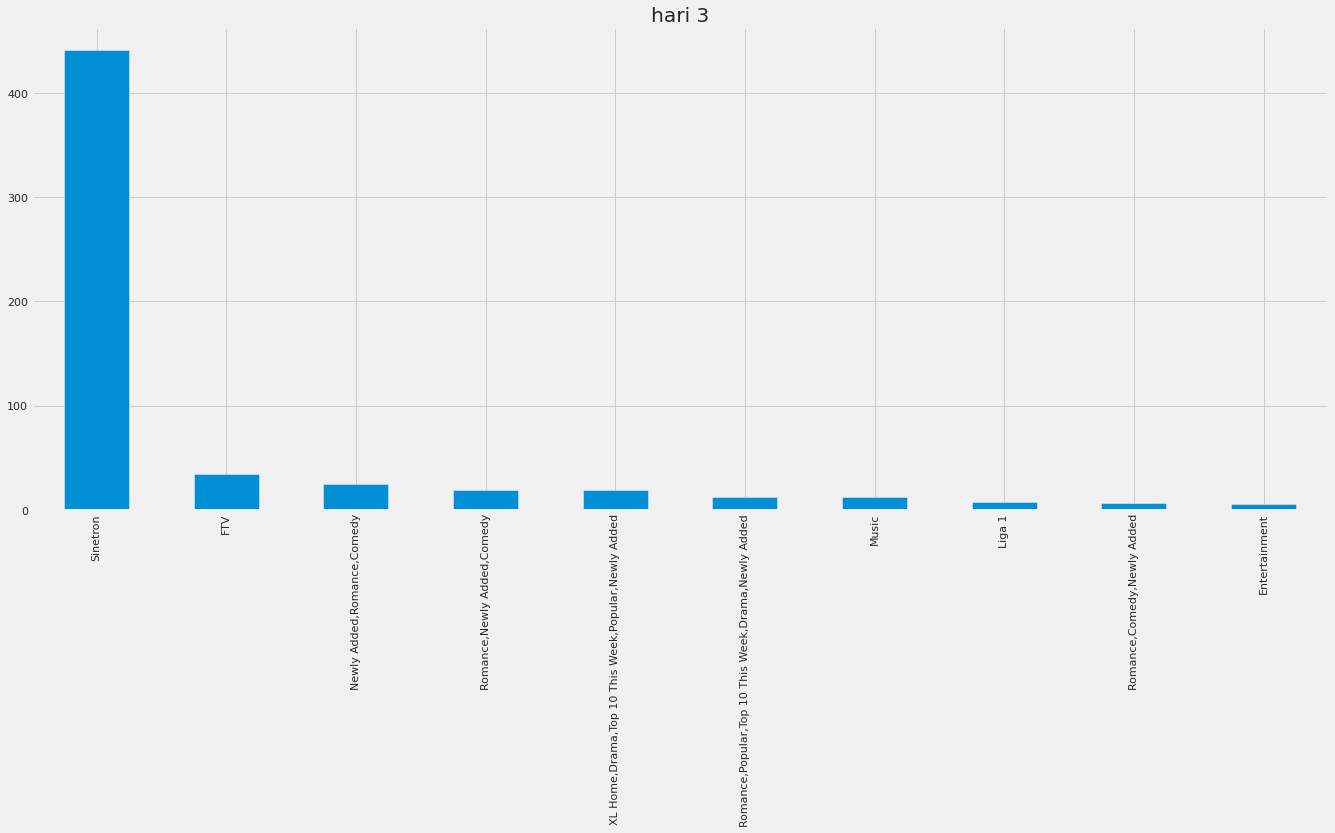

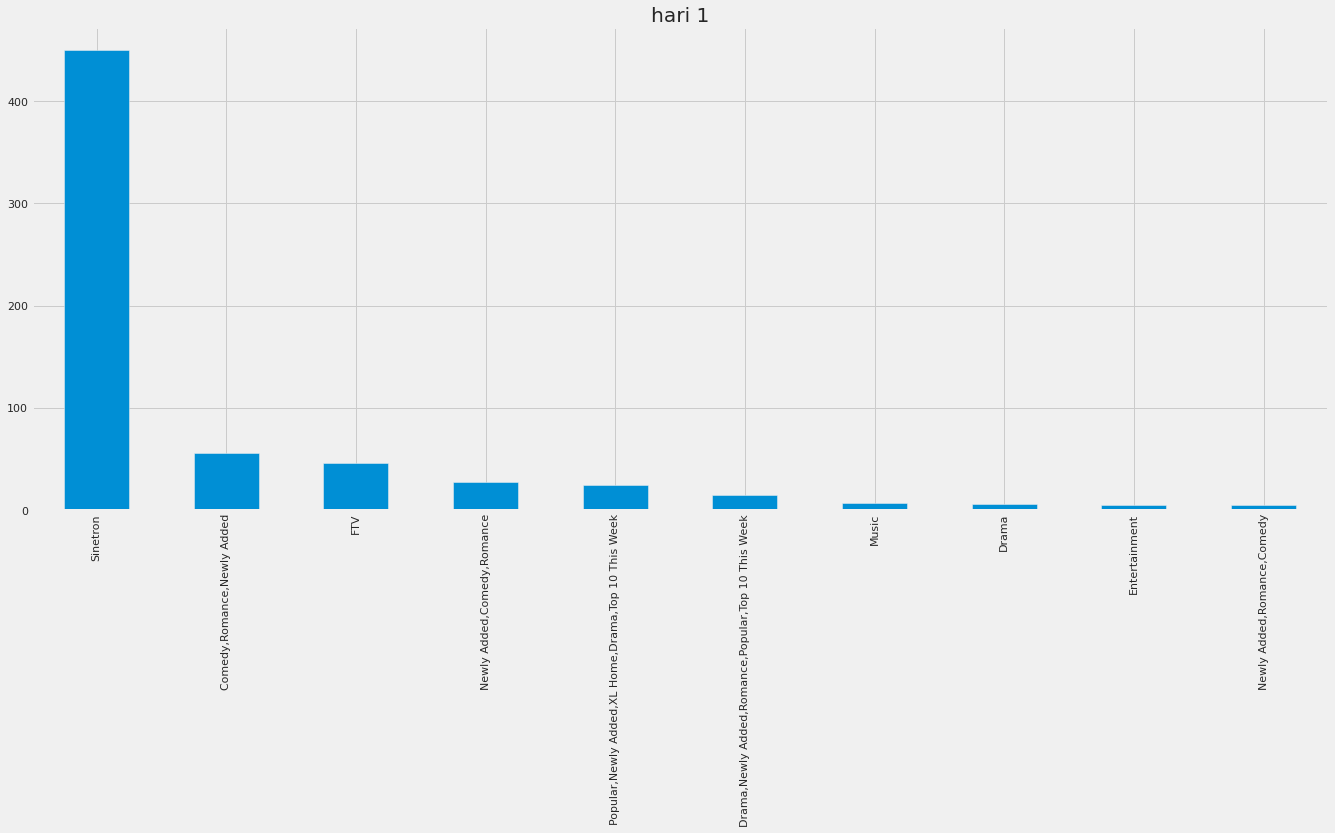

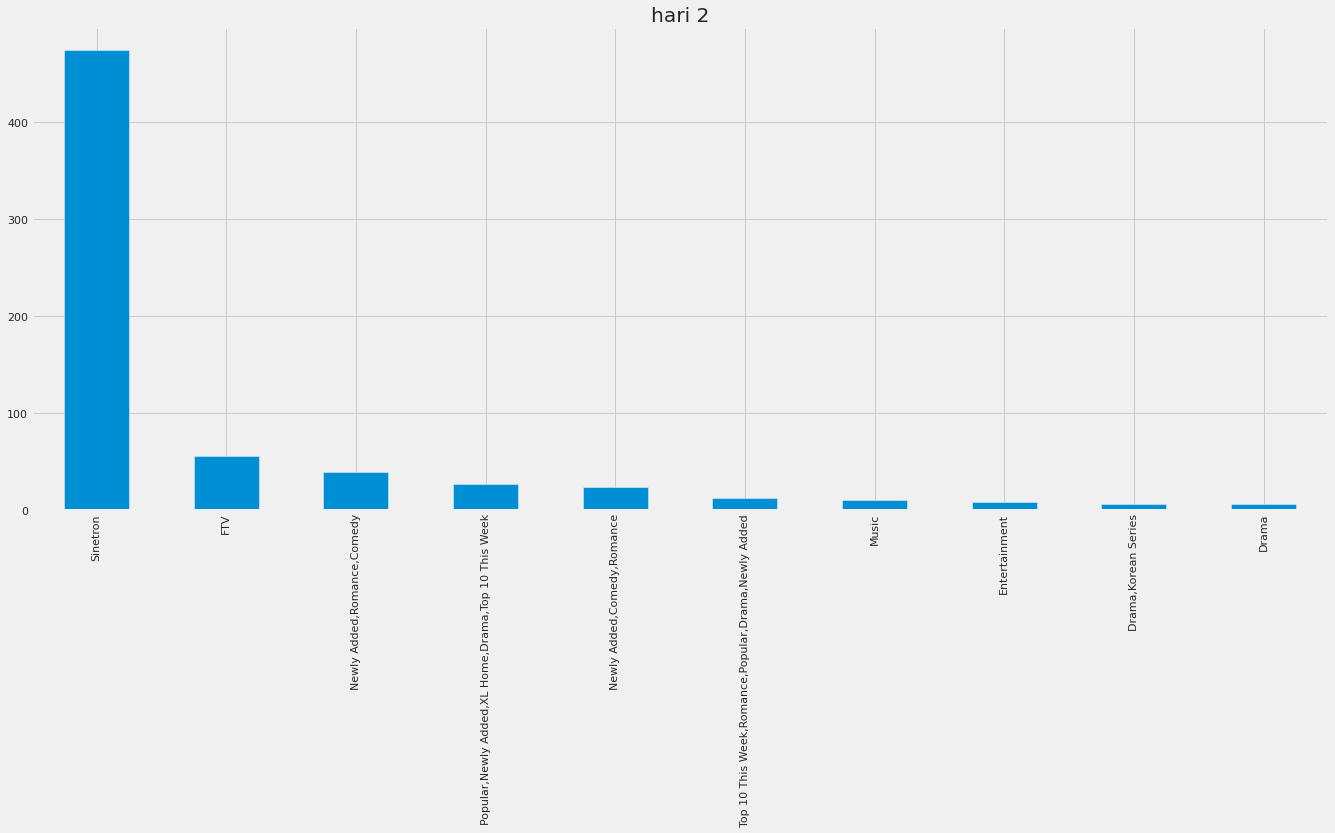

7


In [33]:
i = 0
for day in df['weekday'].unique():
    df[df['weekday']==day]['genre_name'].value_counts().head(10).plot.bar()
    plt.title(f'hari {day}')
    plt.show()
    i += 1
print(i)

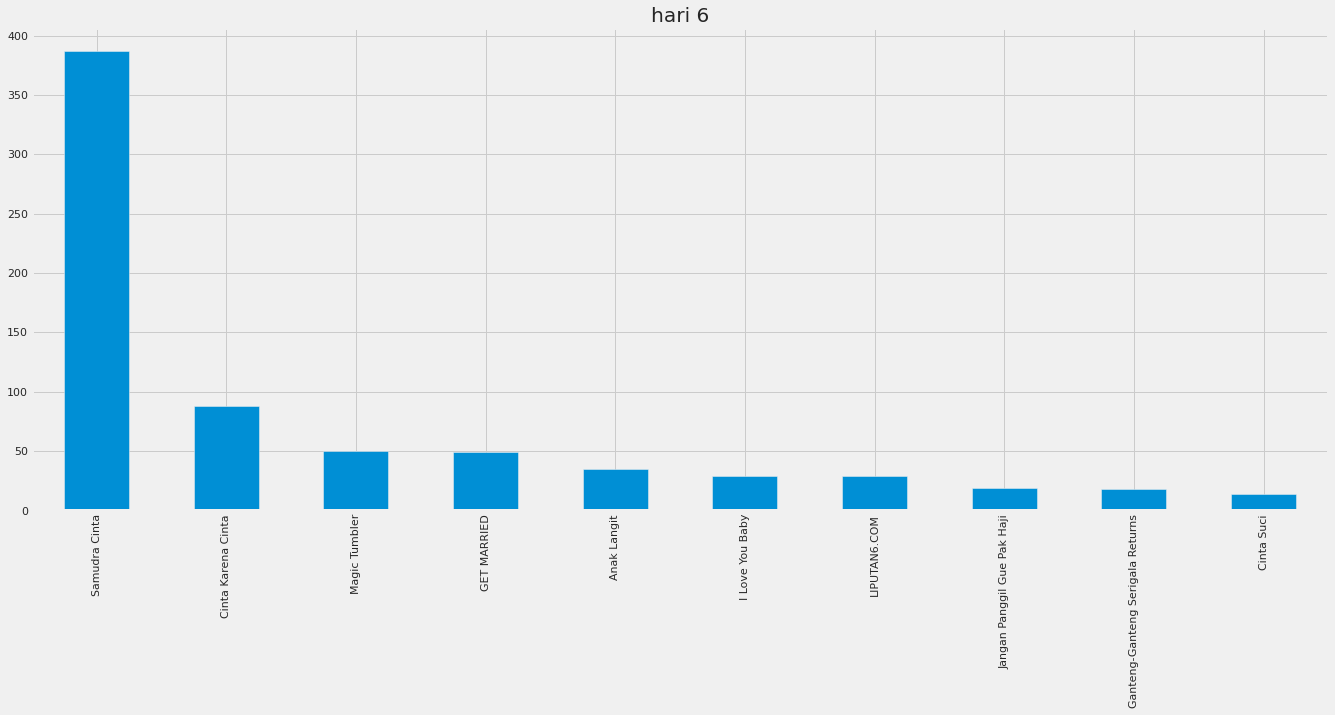

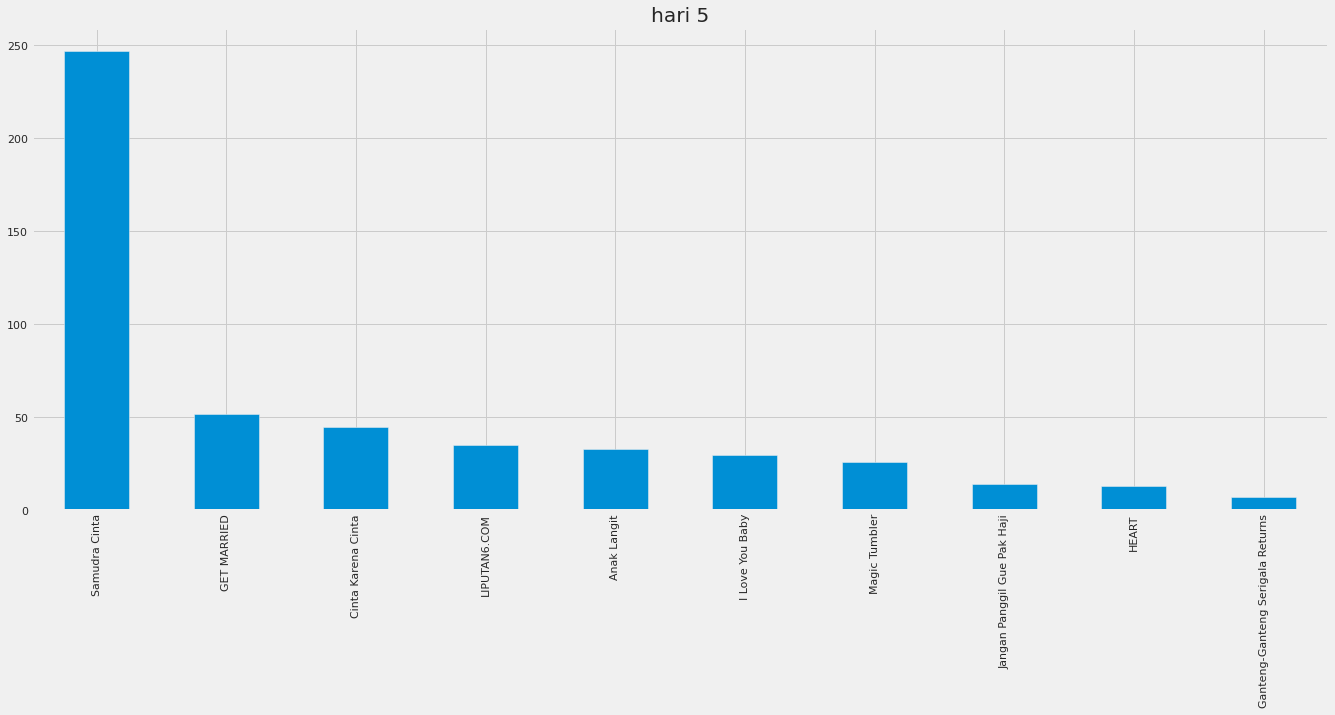

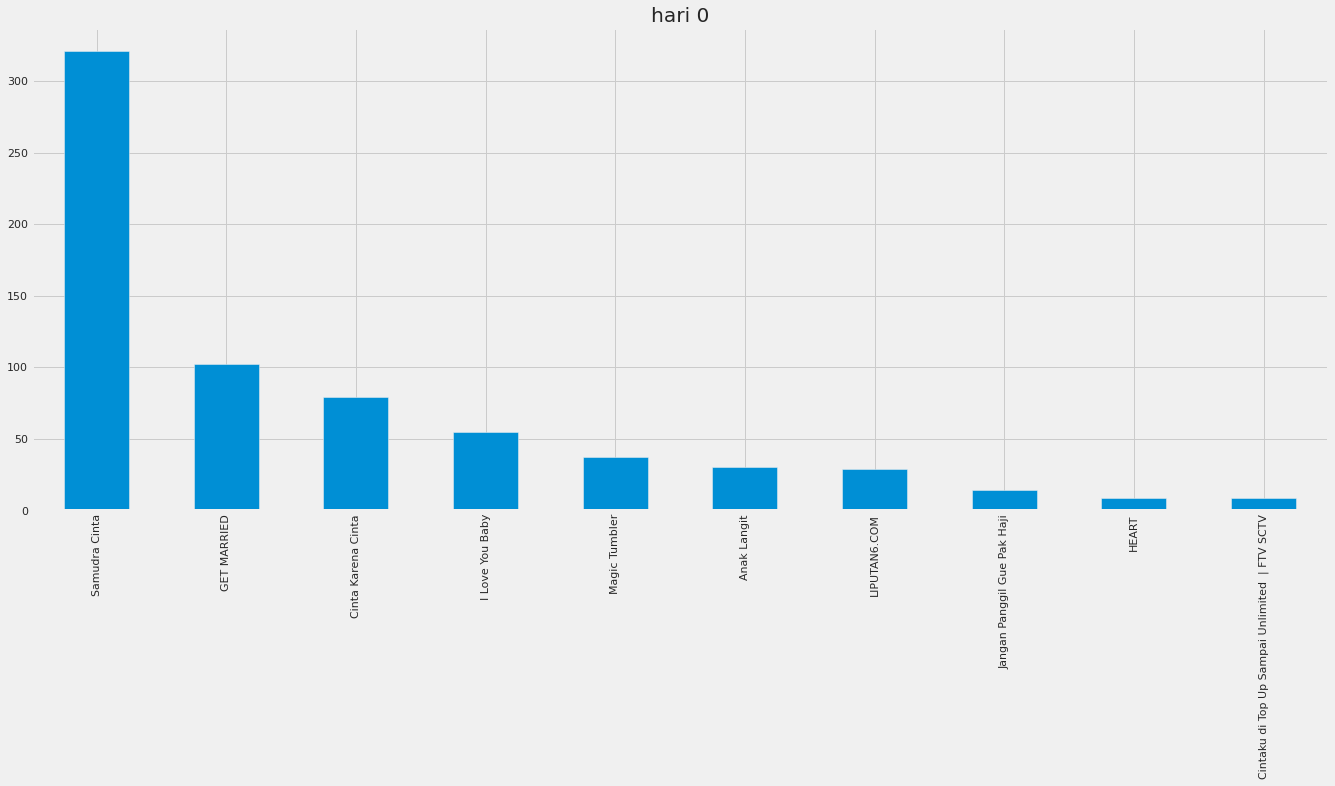

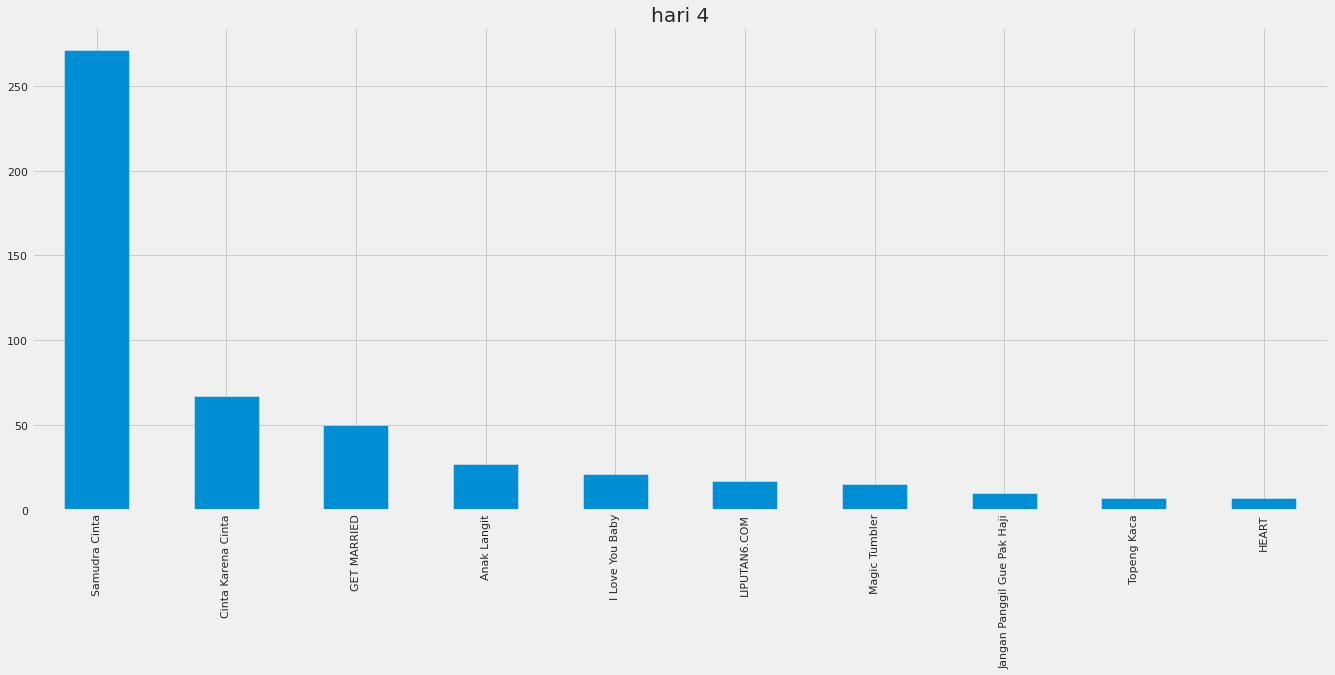

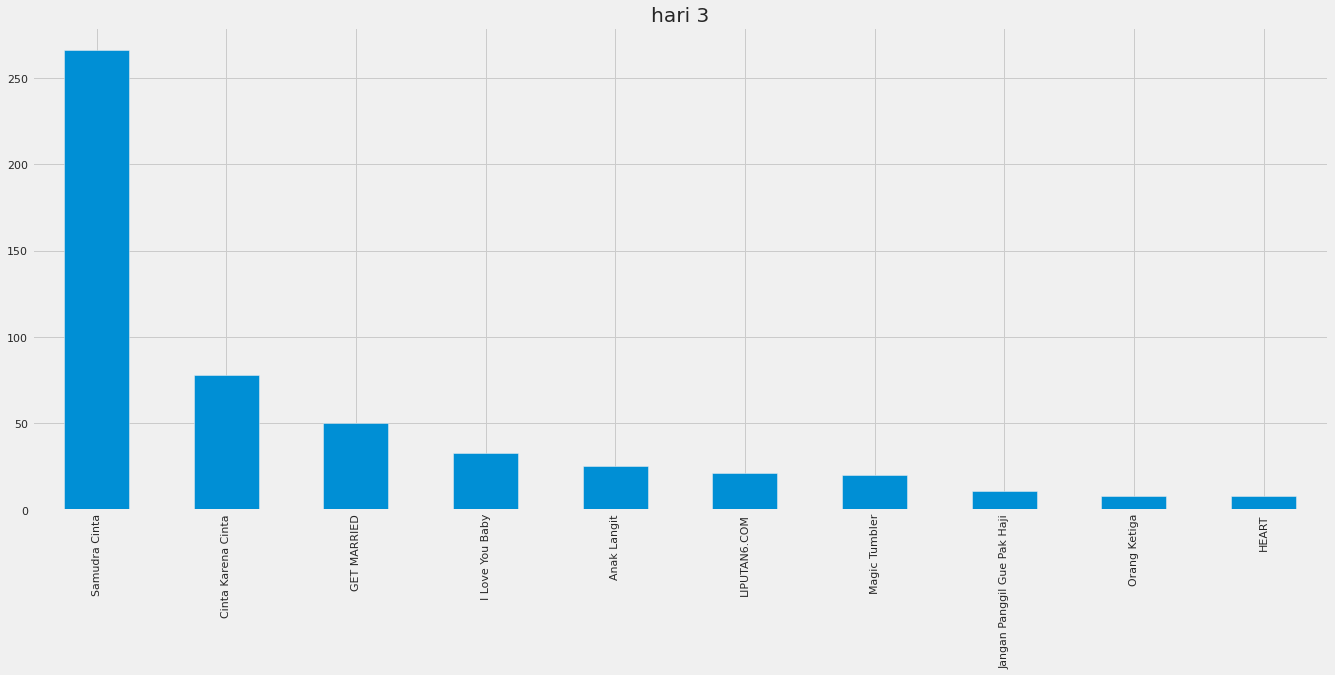

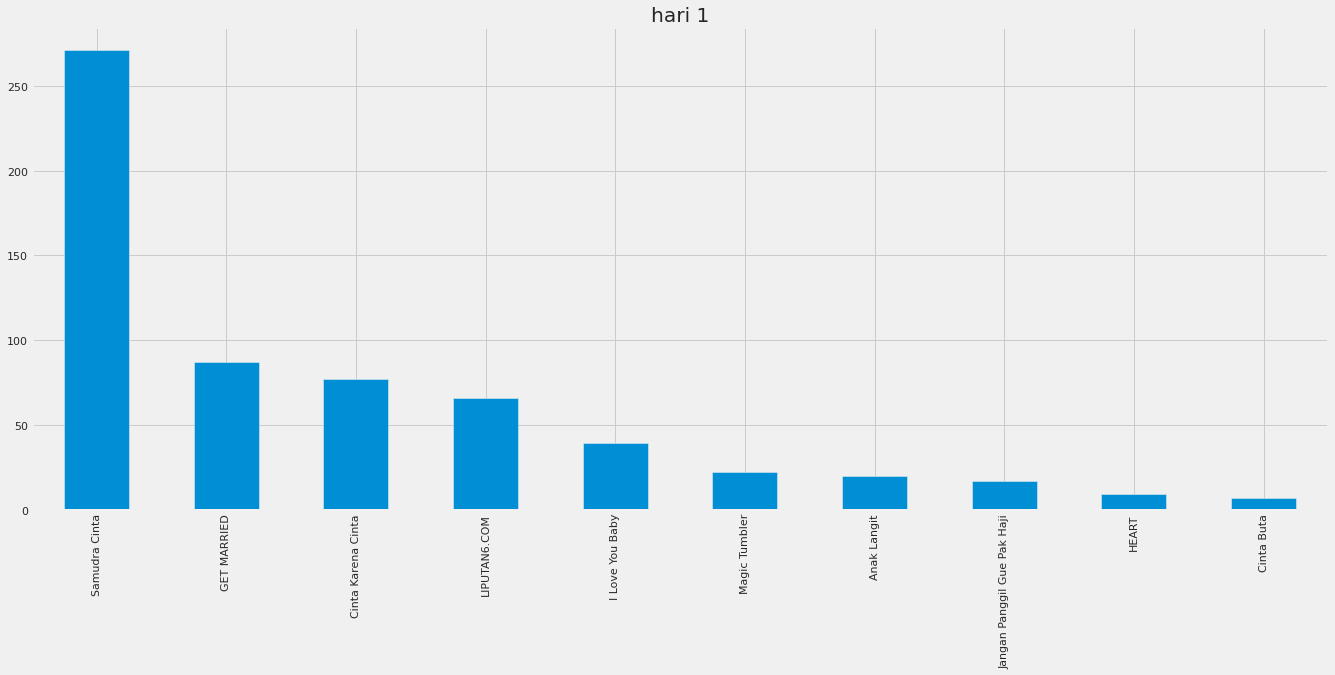

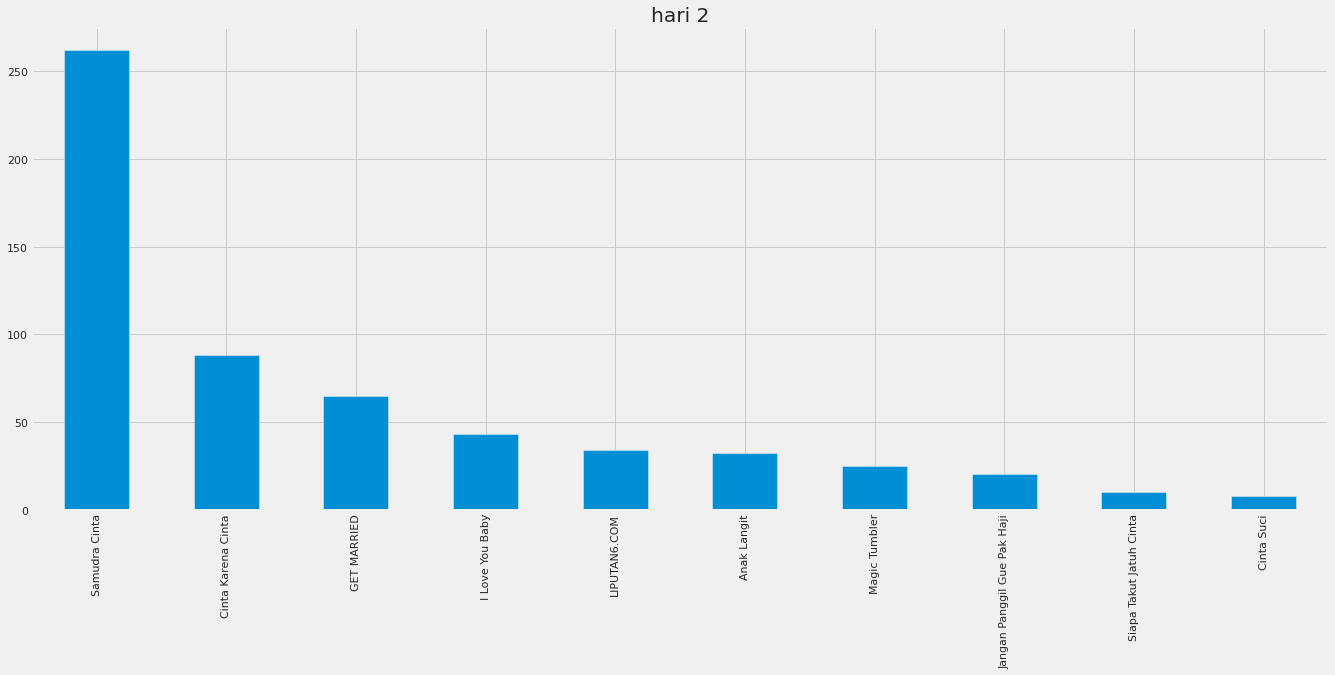

7


In [34]:
i = 0
for day in df['weekday'].unique():
    df[df['weekday']==day]['film_title'].value_counts().head(10).plot.bar()
    plt.title(f'hari {day}')
    plt.show()
    i+=1
print(i)

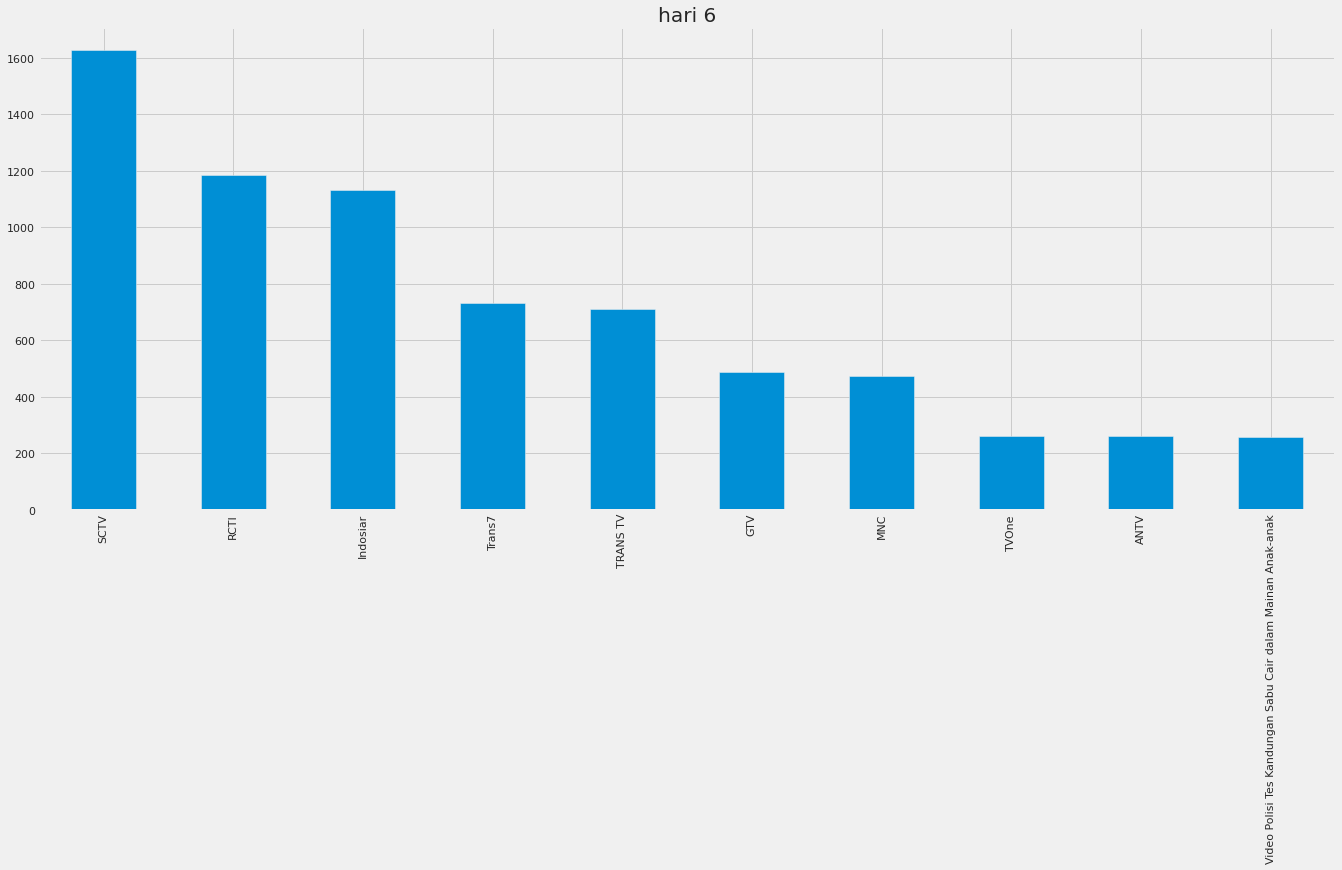

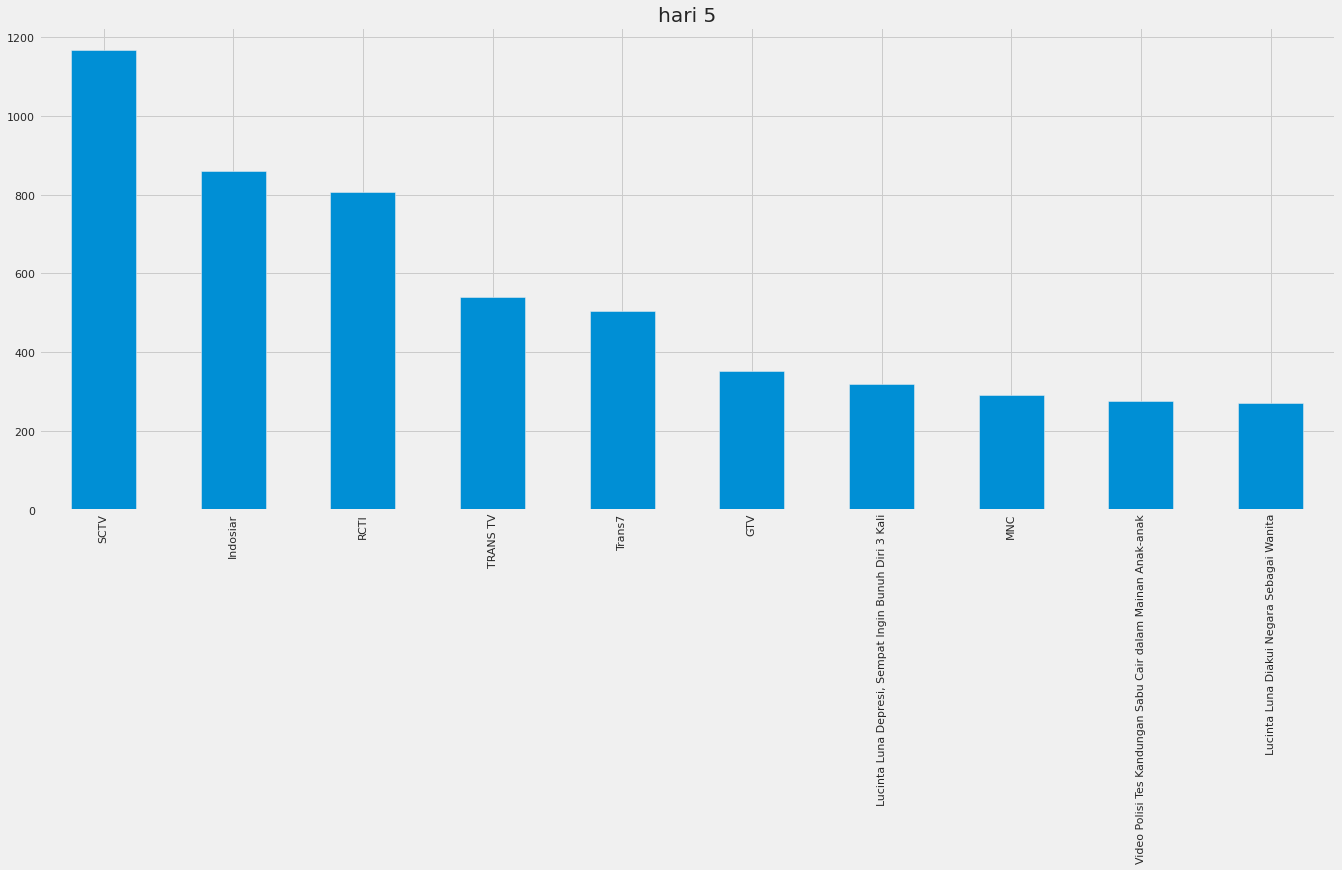

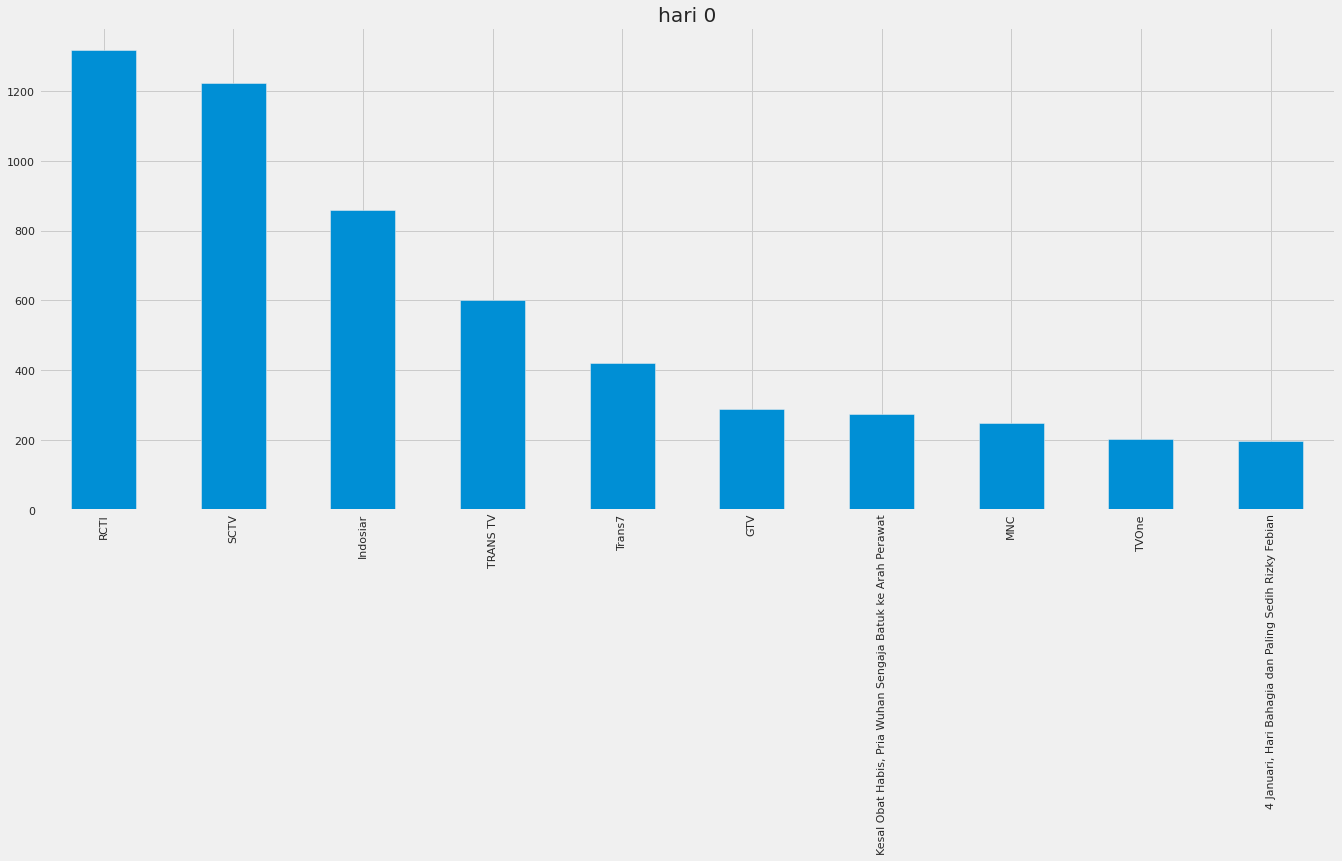

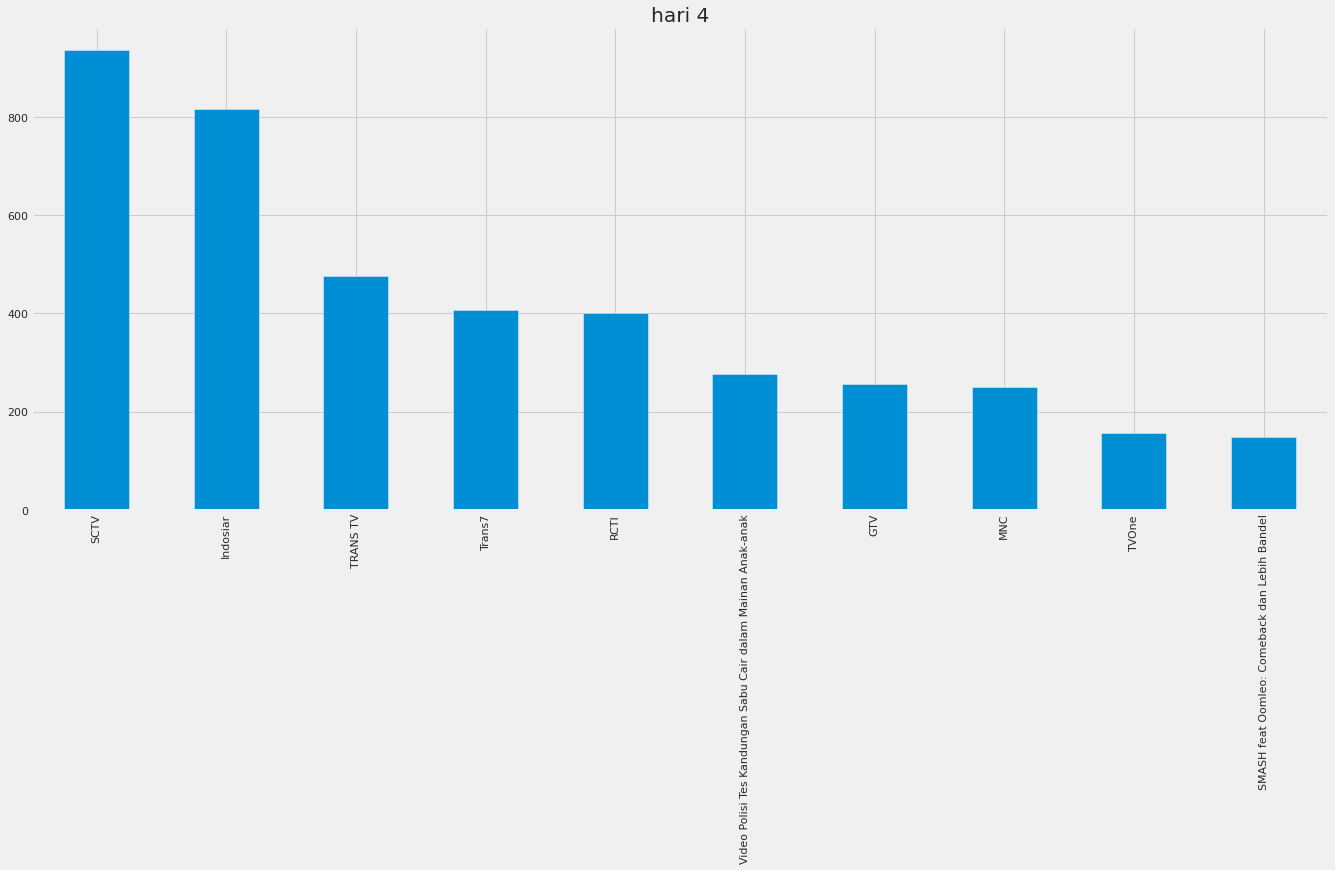

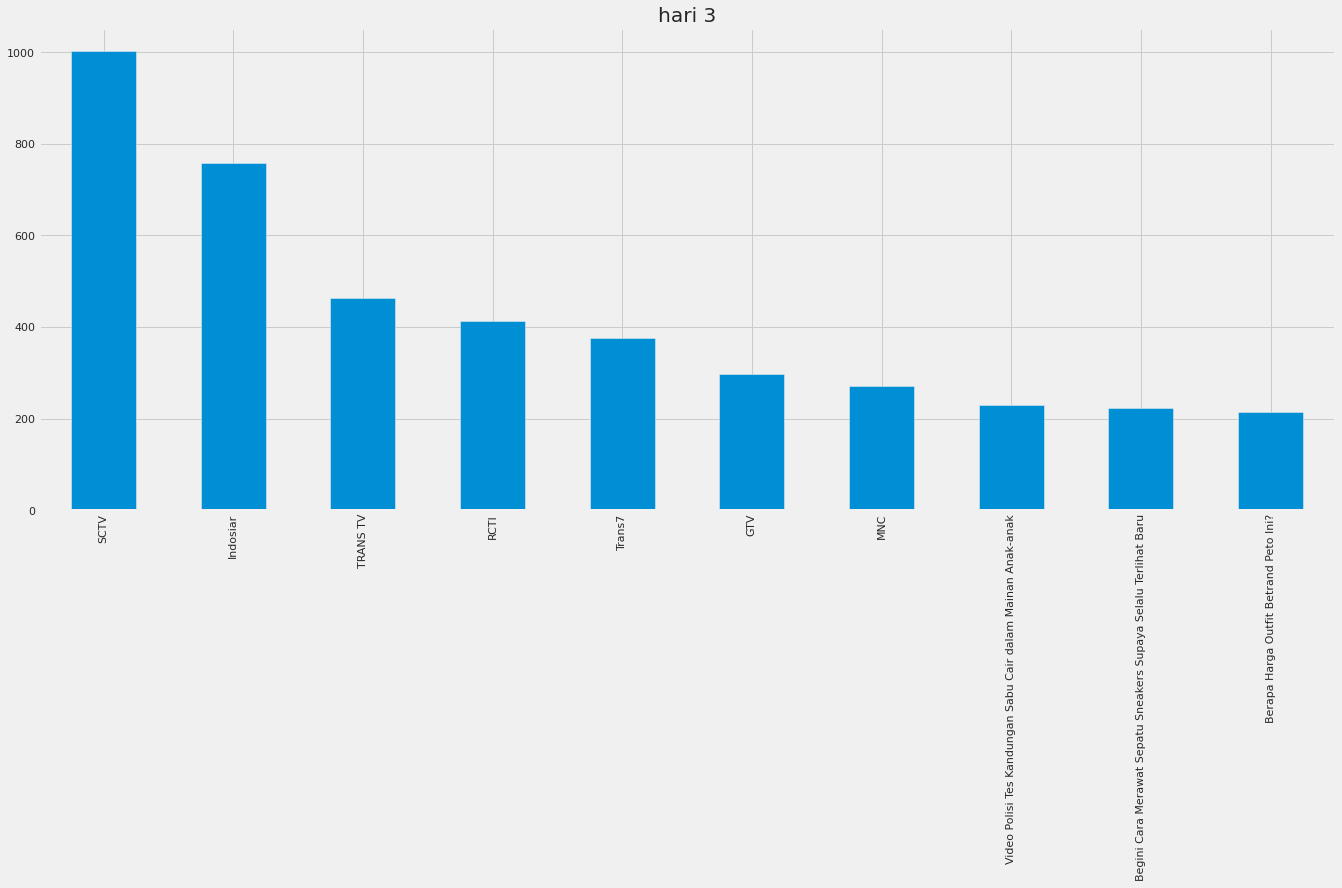

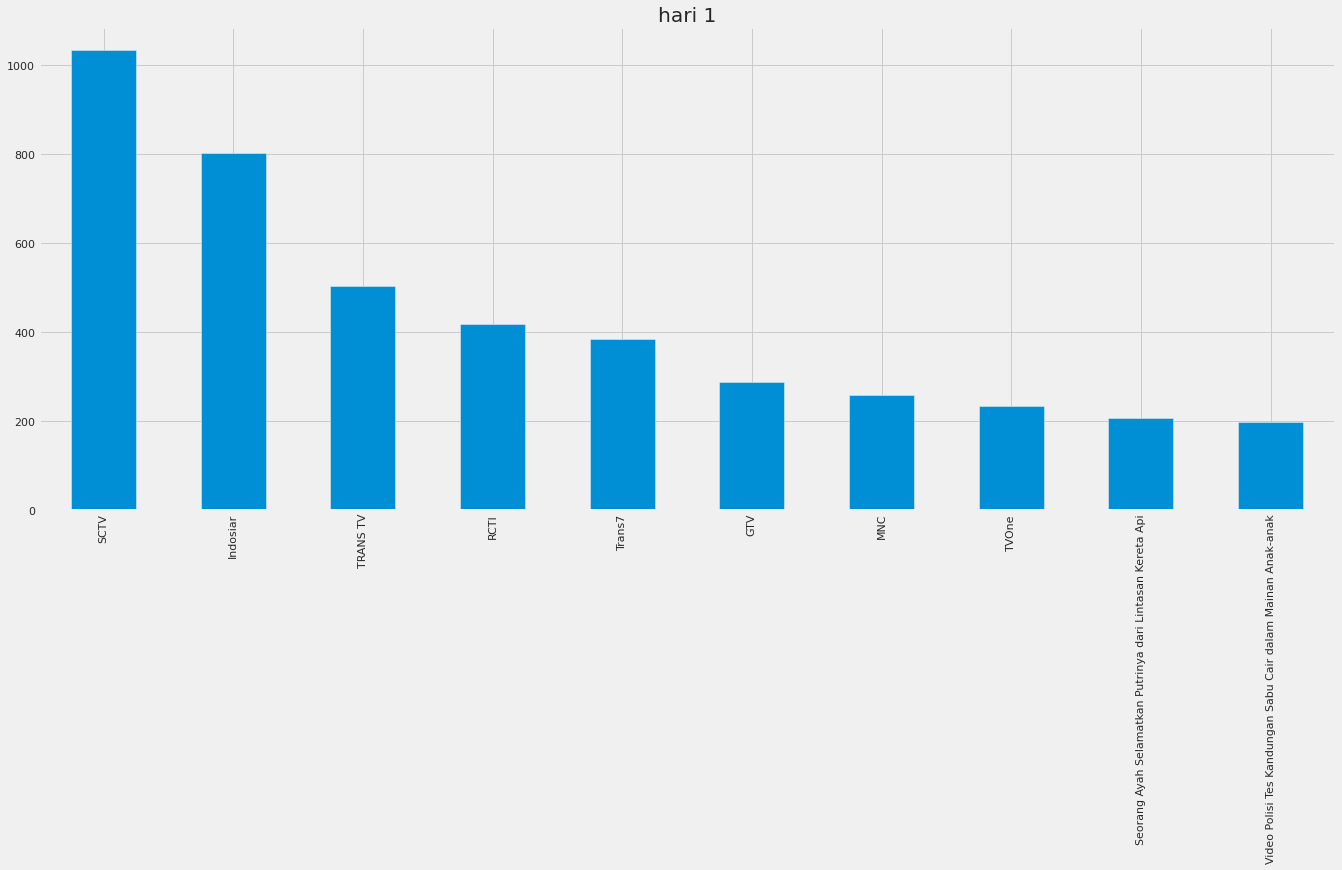

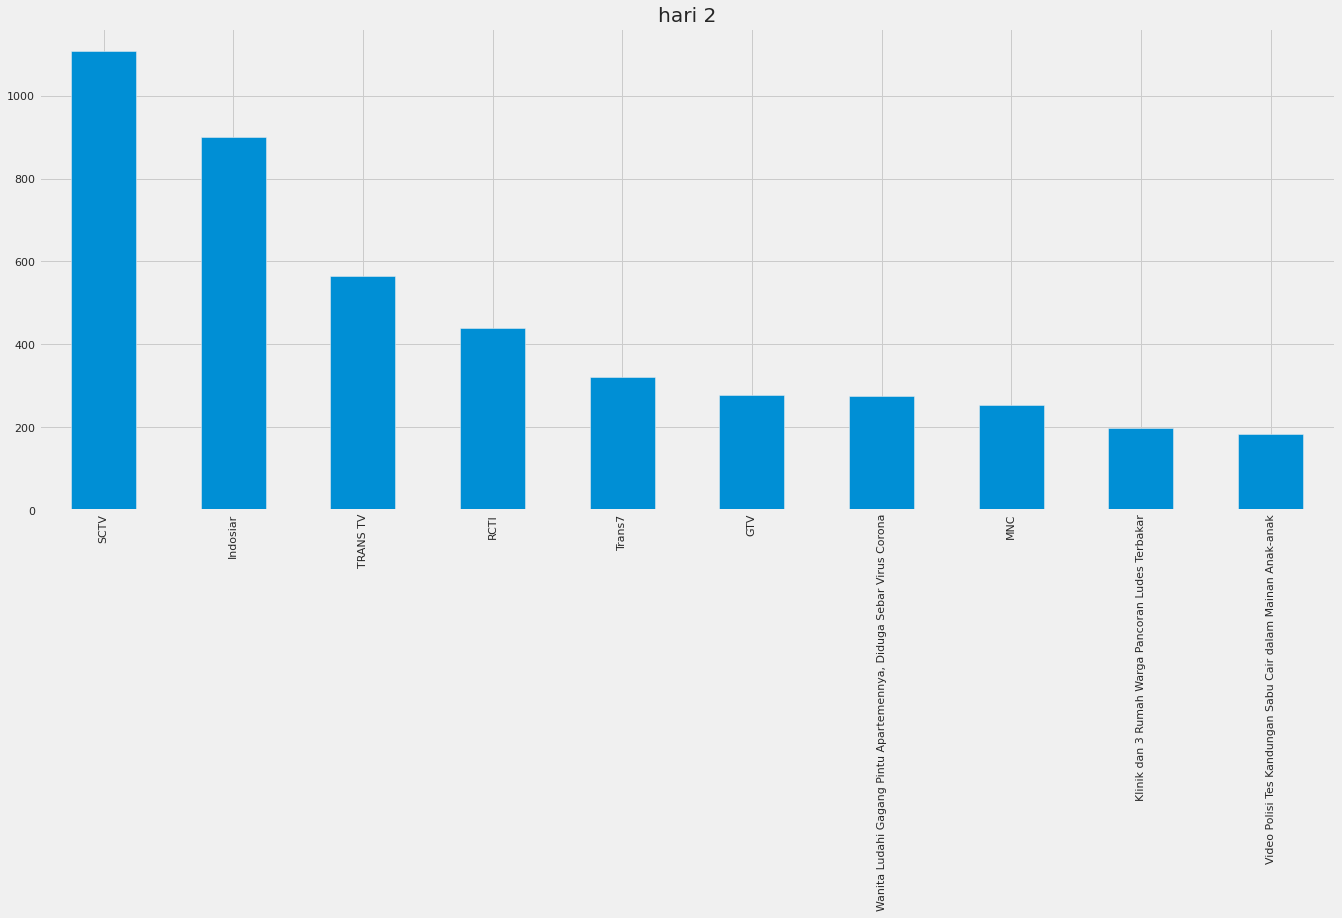

7


In [35]:
i = 0
for day in df['weekday'].unique():
    df[df['weekday']==day]['title'].value_counts().head(10).plot.bar()
    plt.title(f'hari {day}')
    plt.show()
    i+=1
print(i)

In [36]:
#distribusi genre, title dan film yang di tonton berdasarkan tanggal

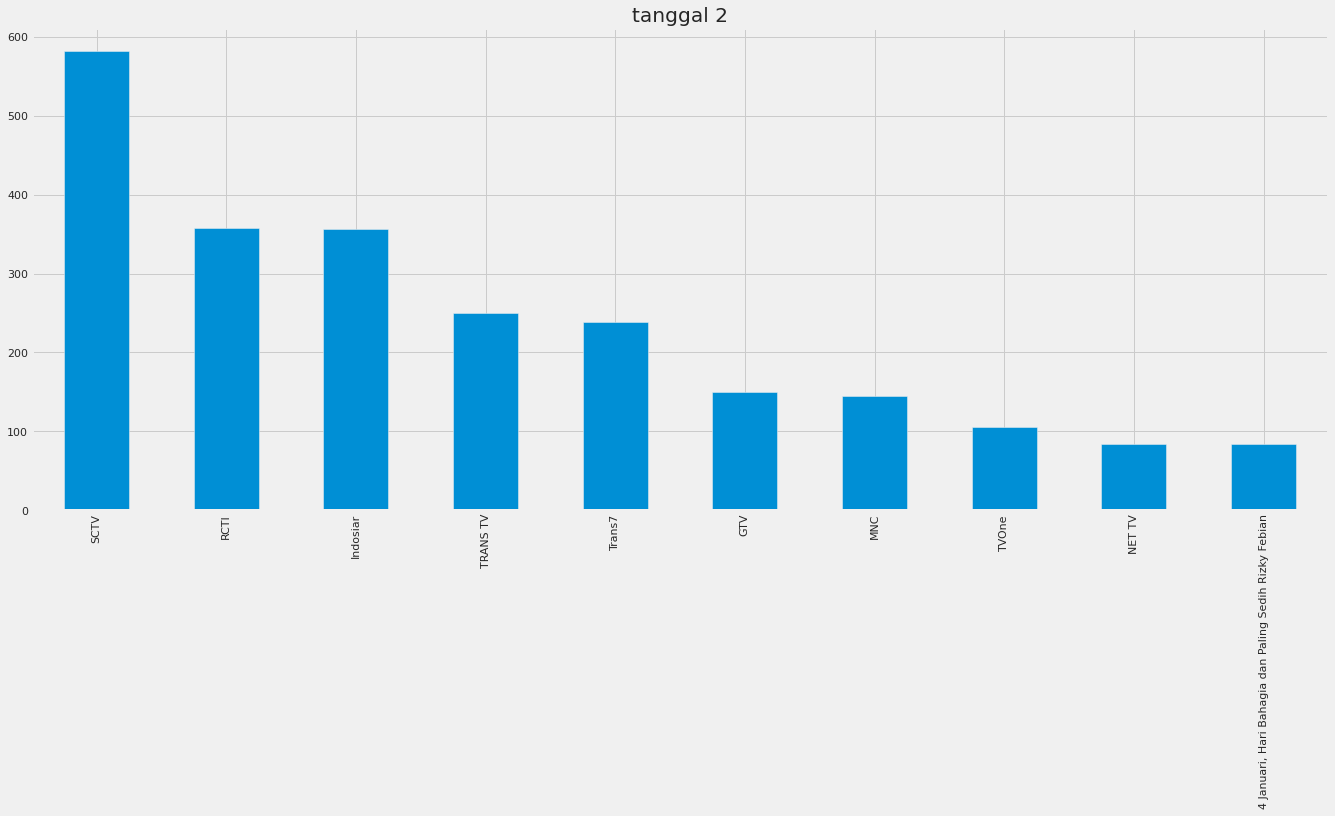

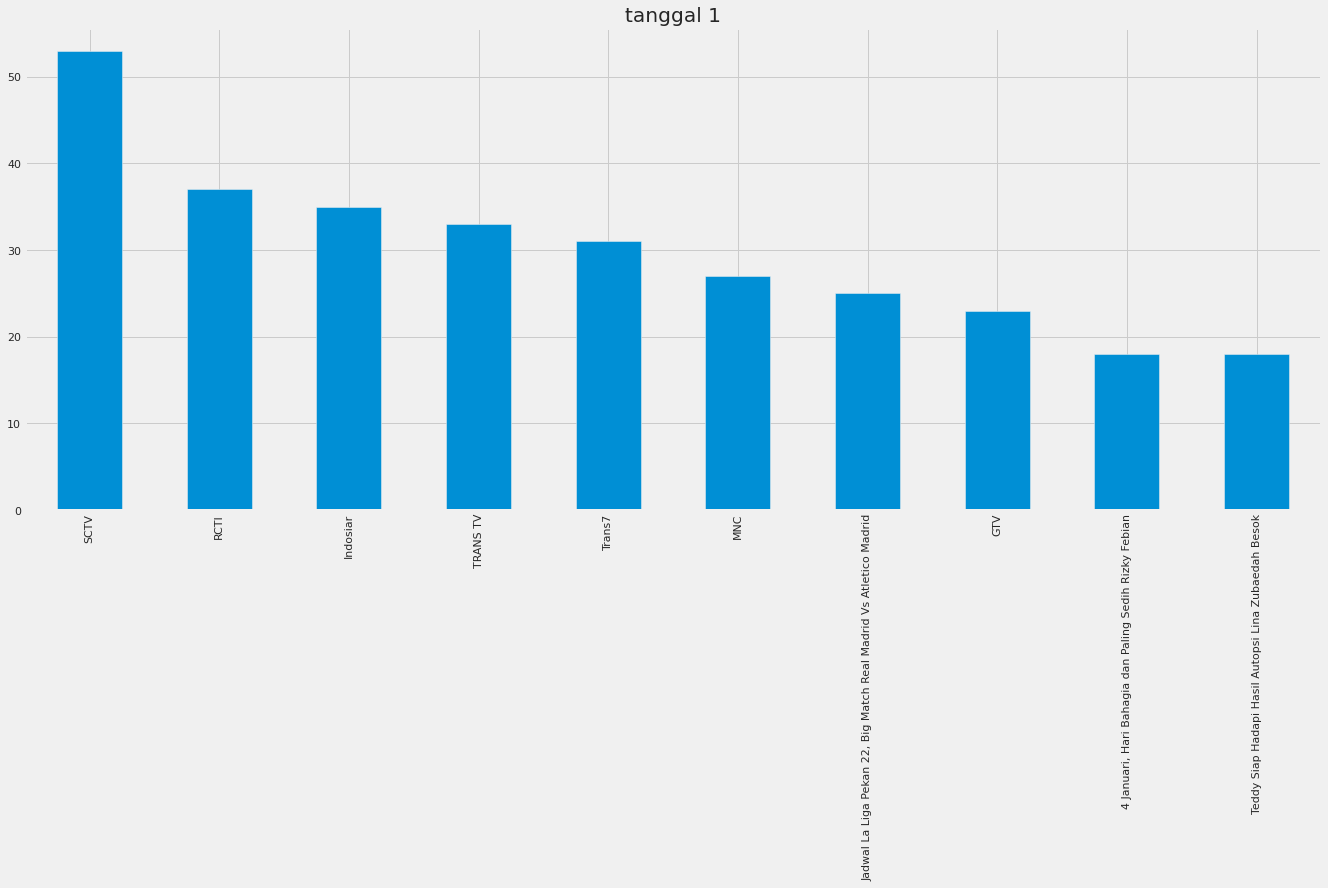

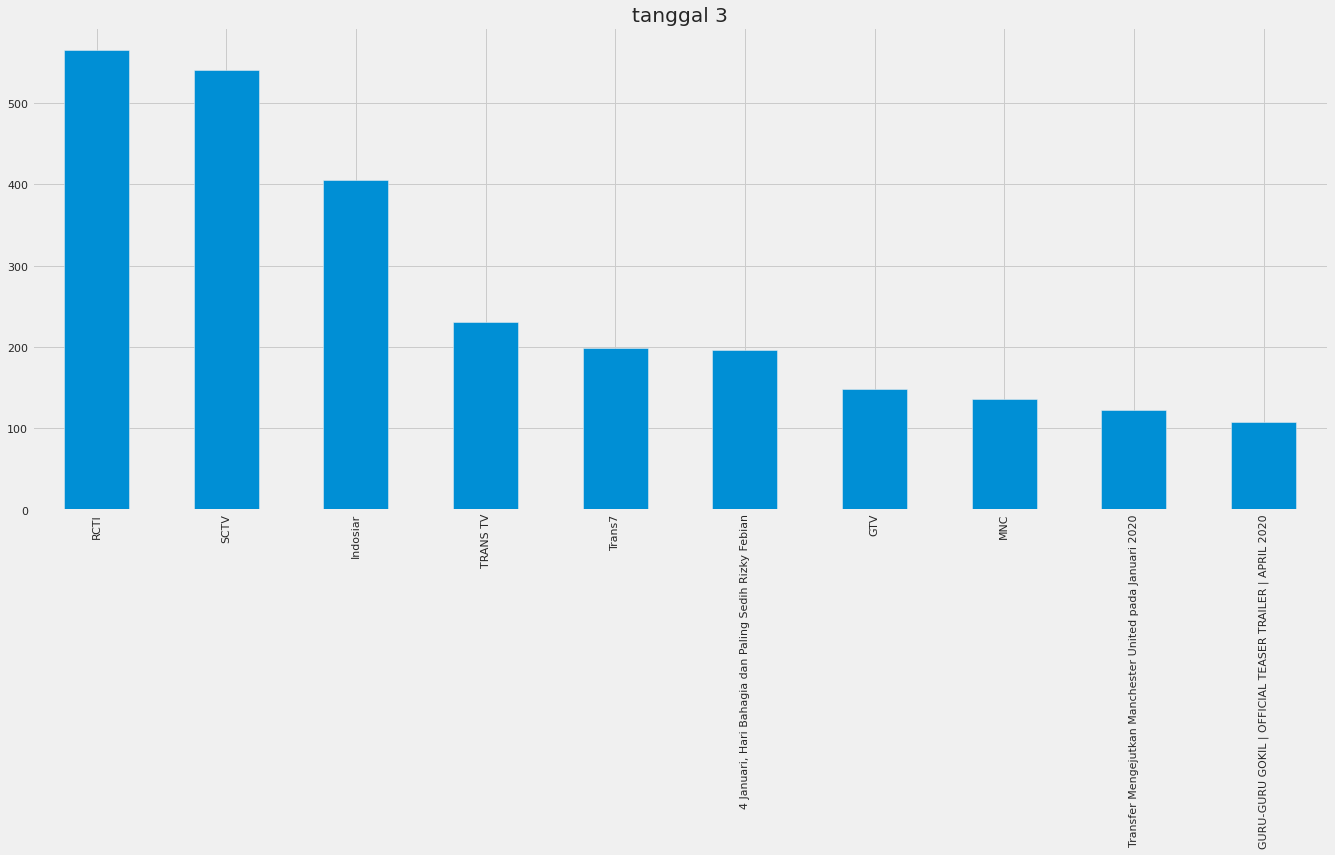

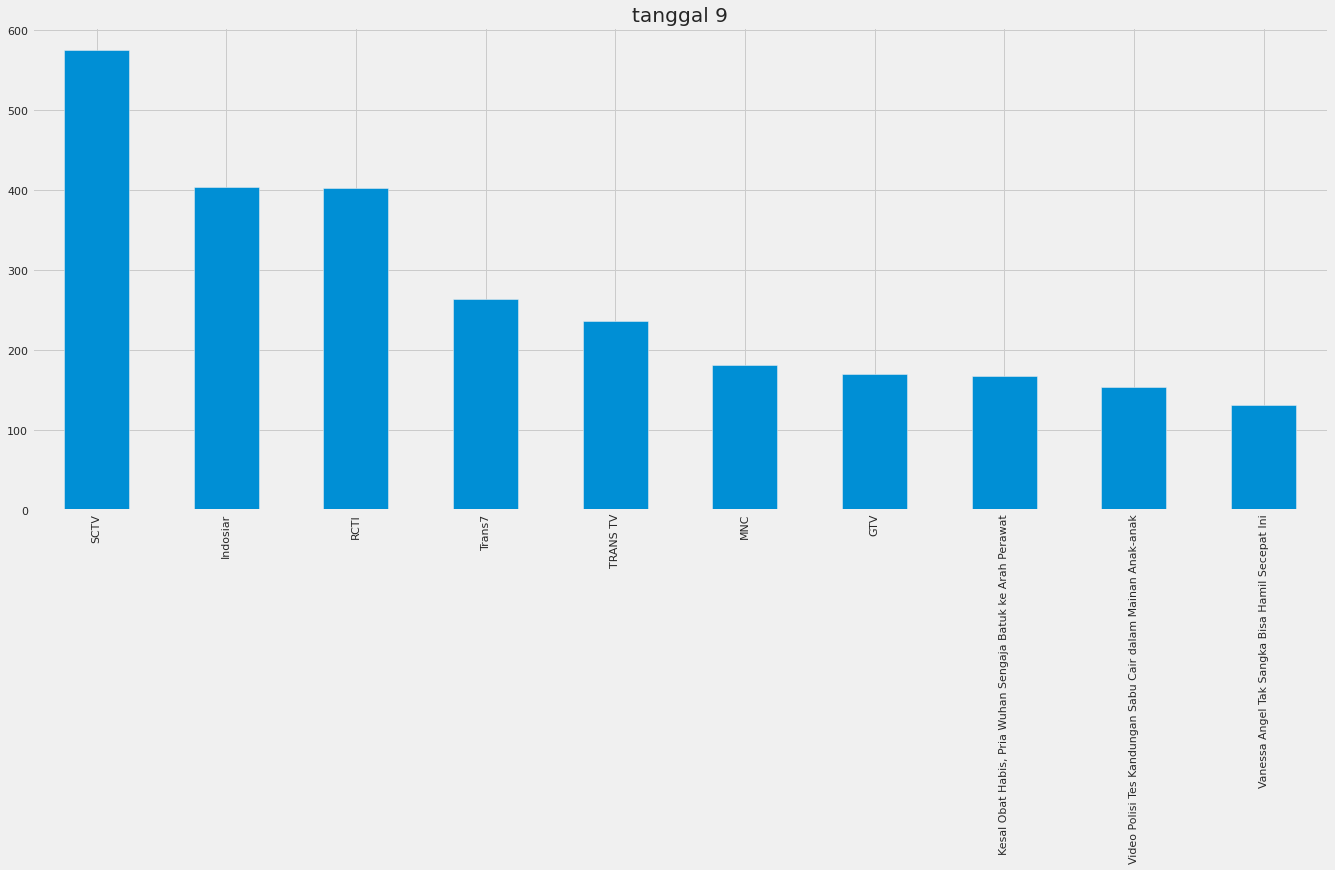

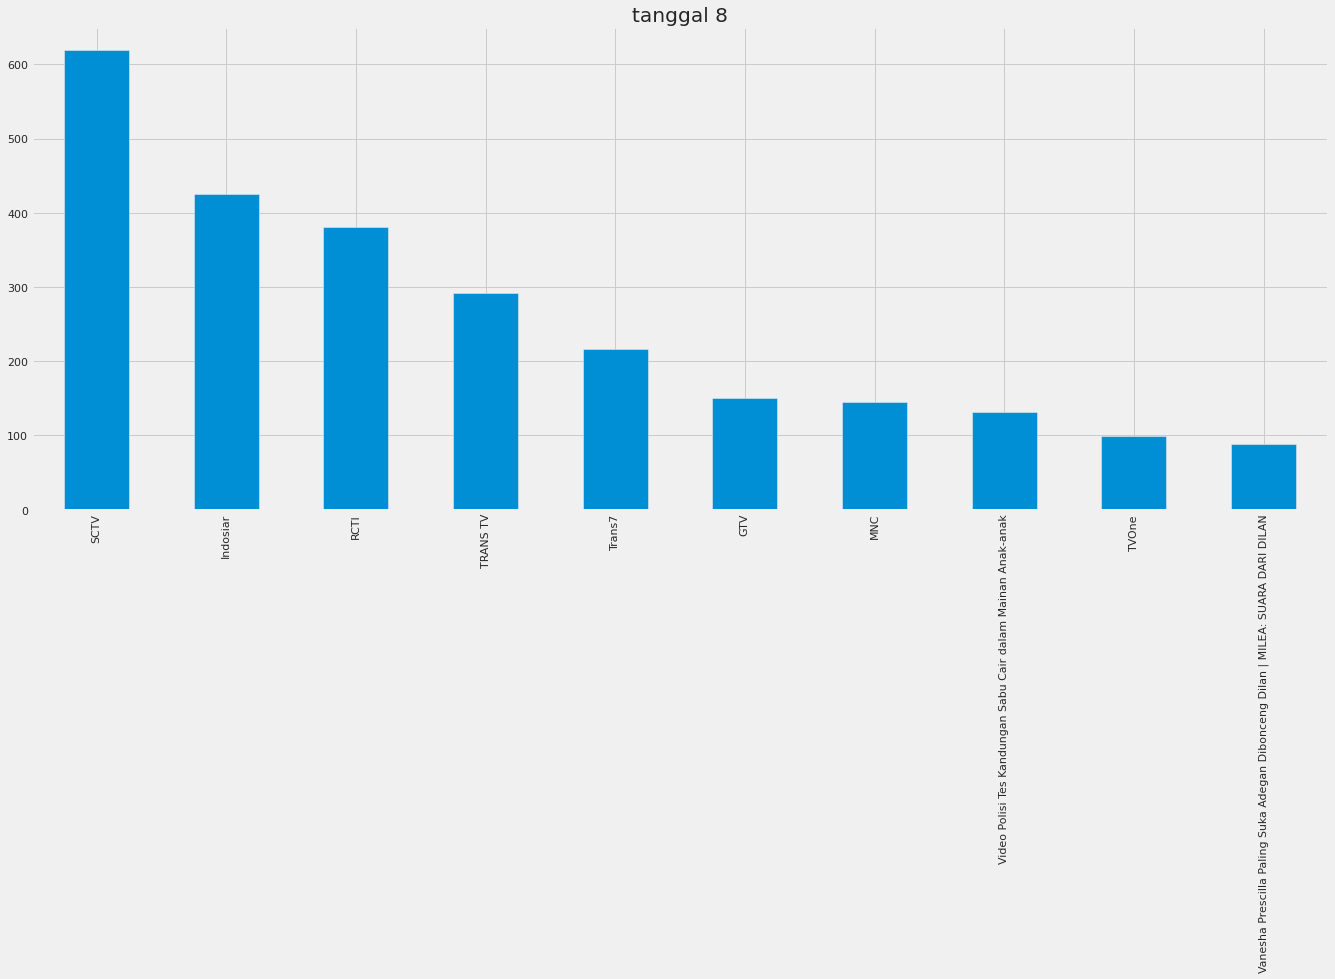

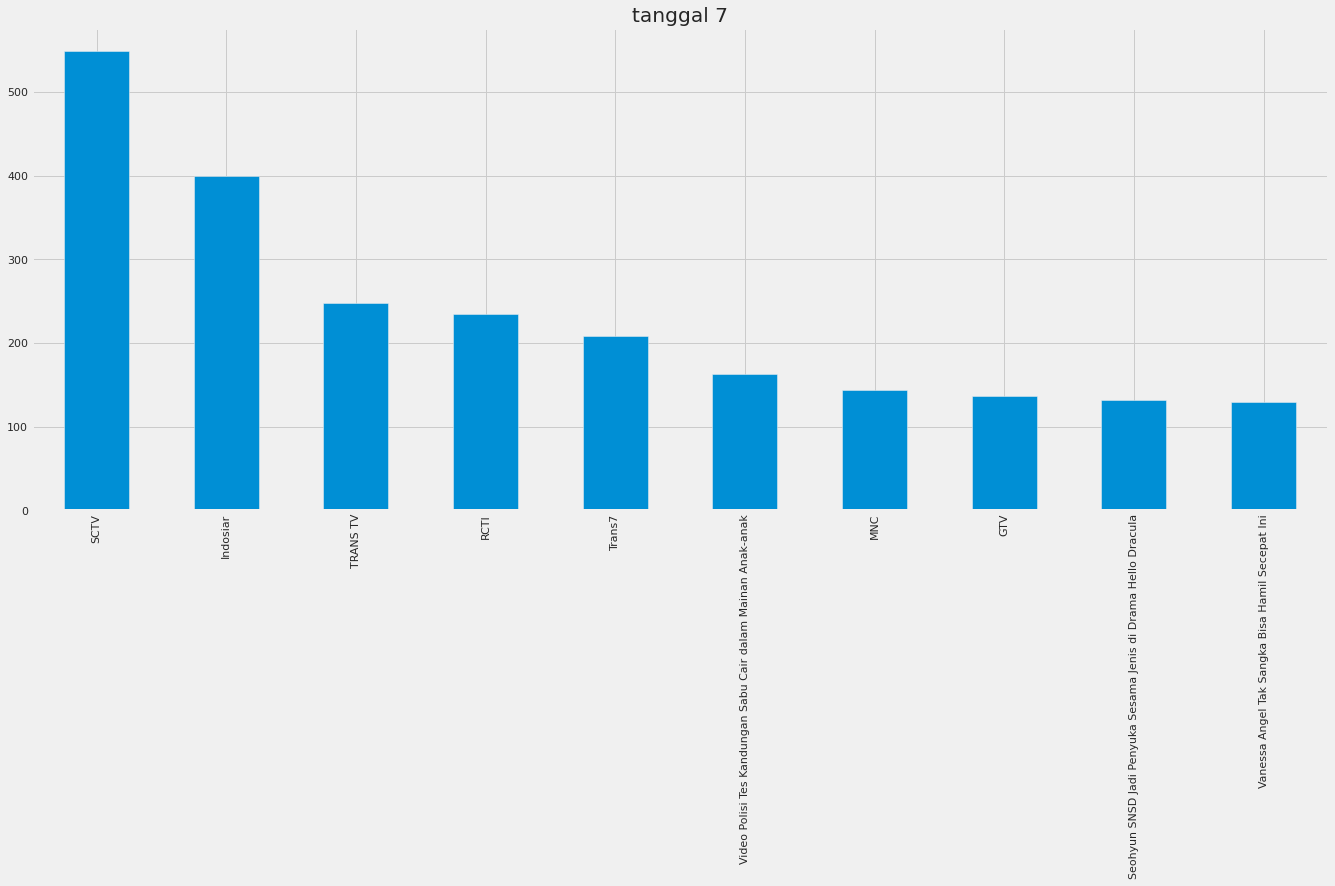

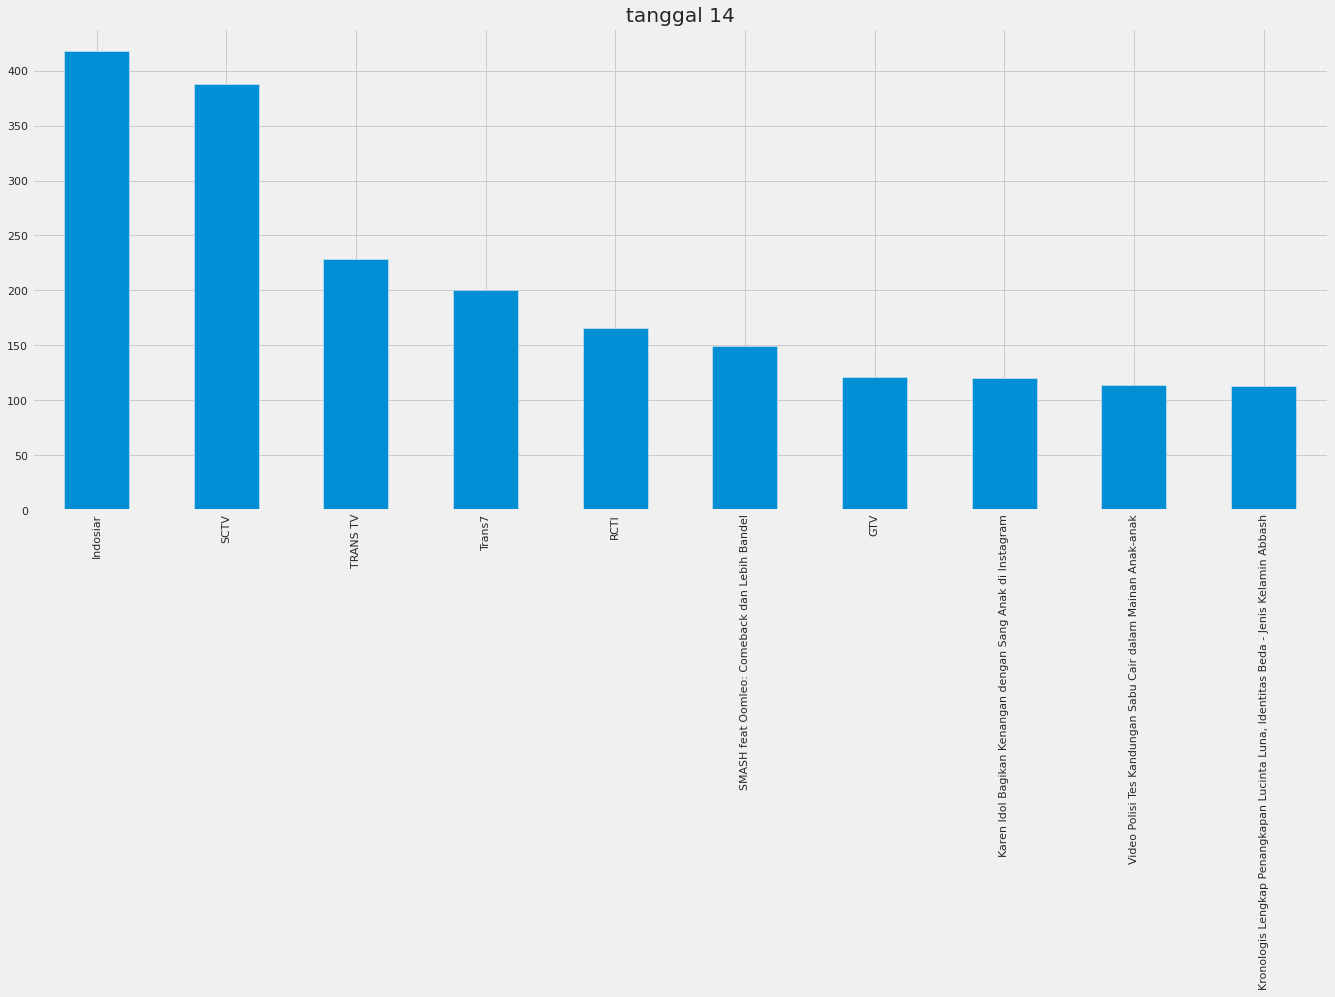

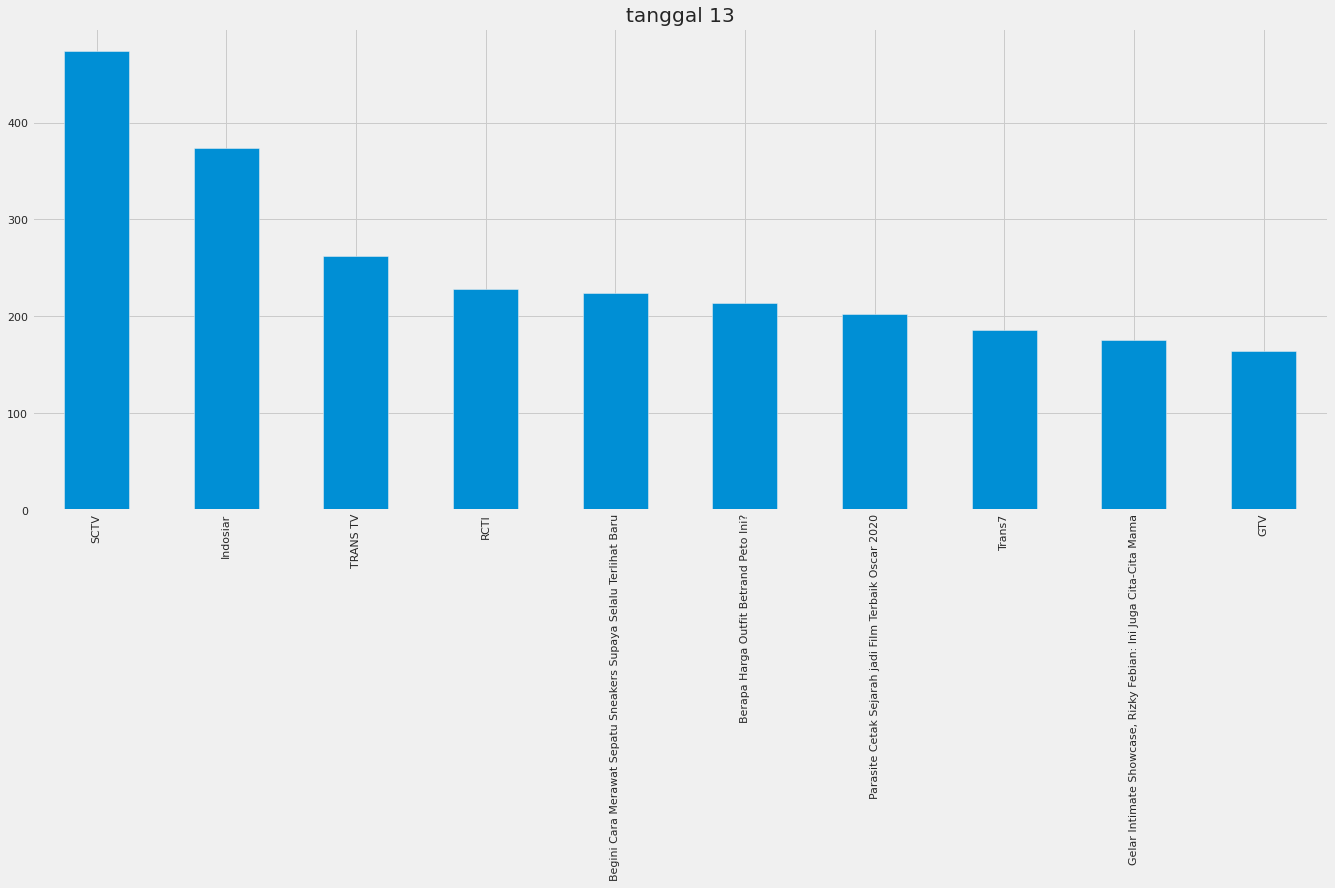

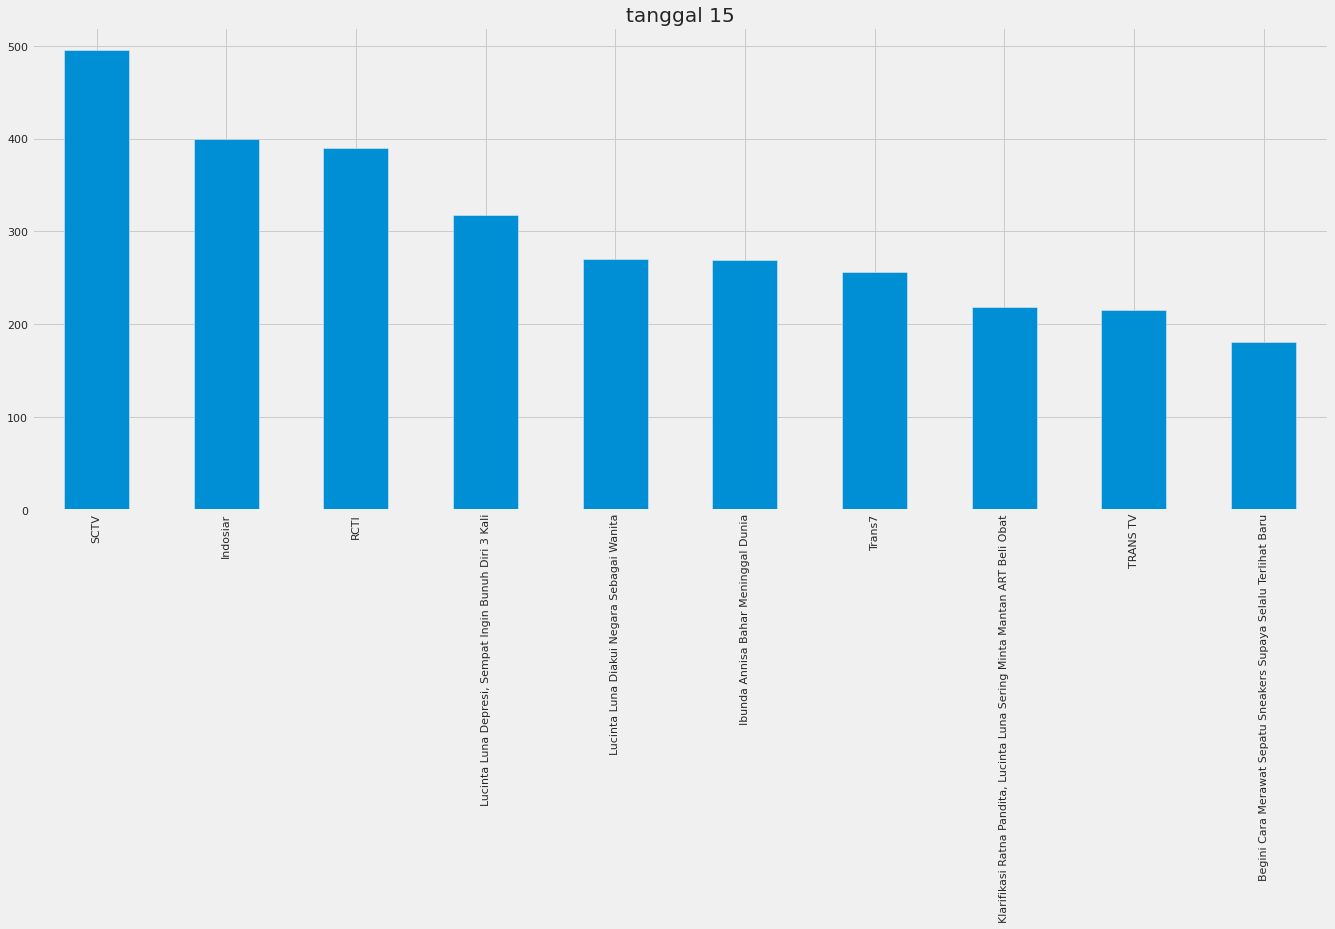

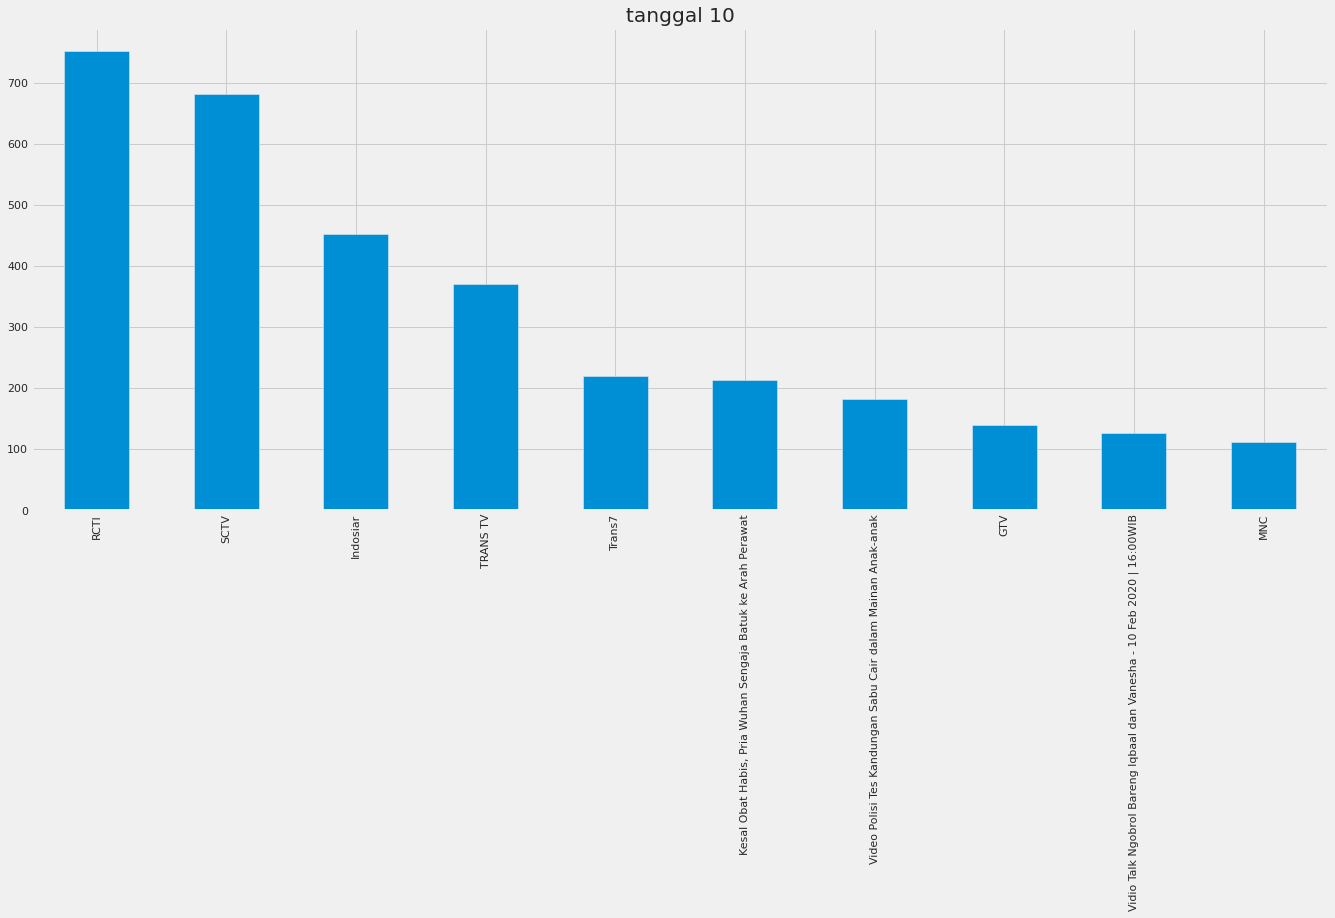

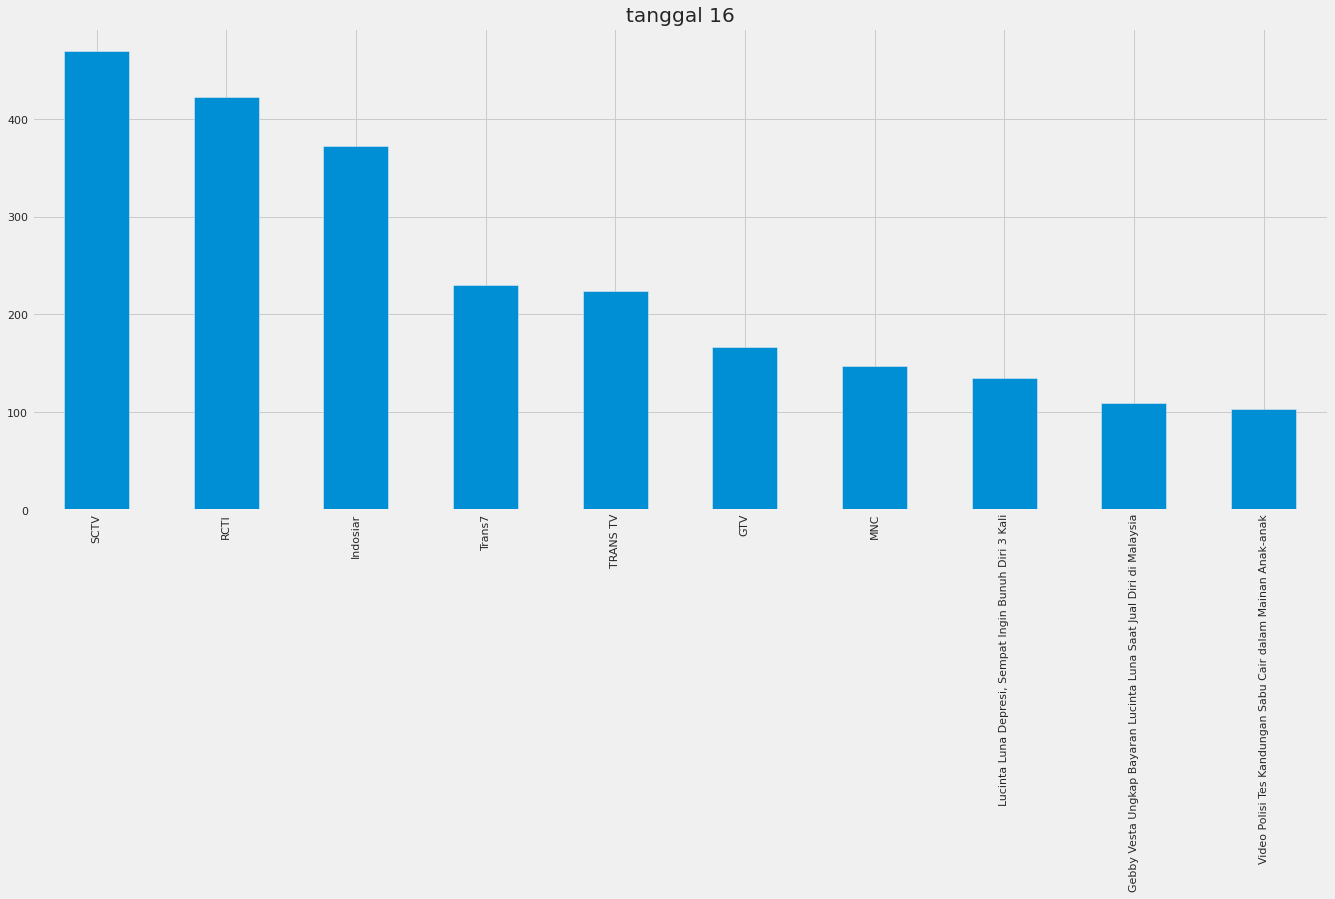

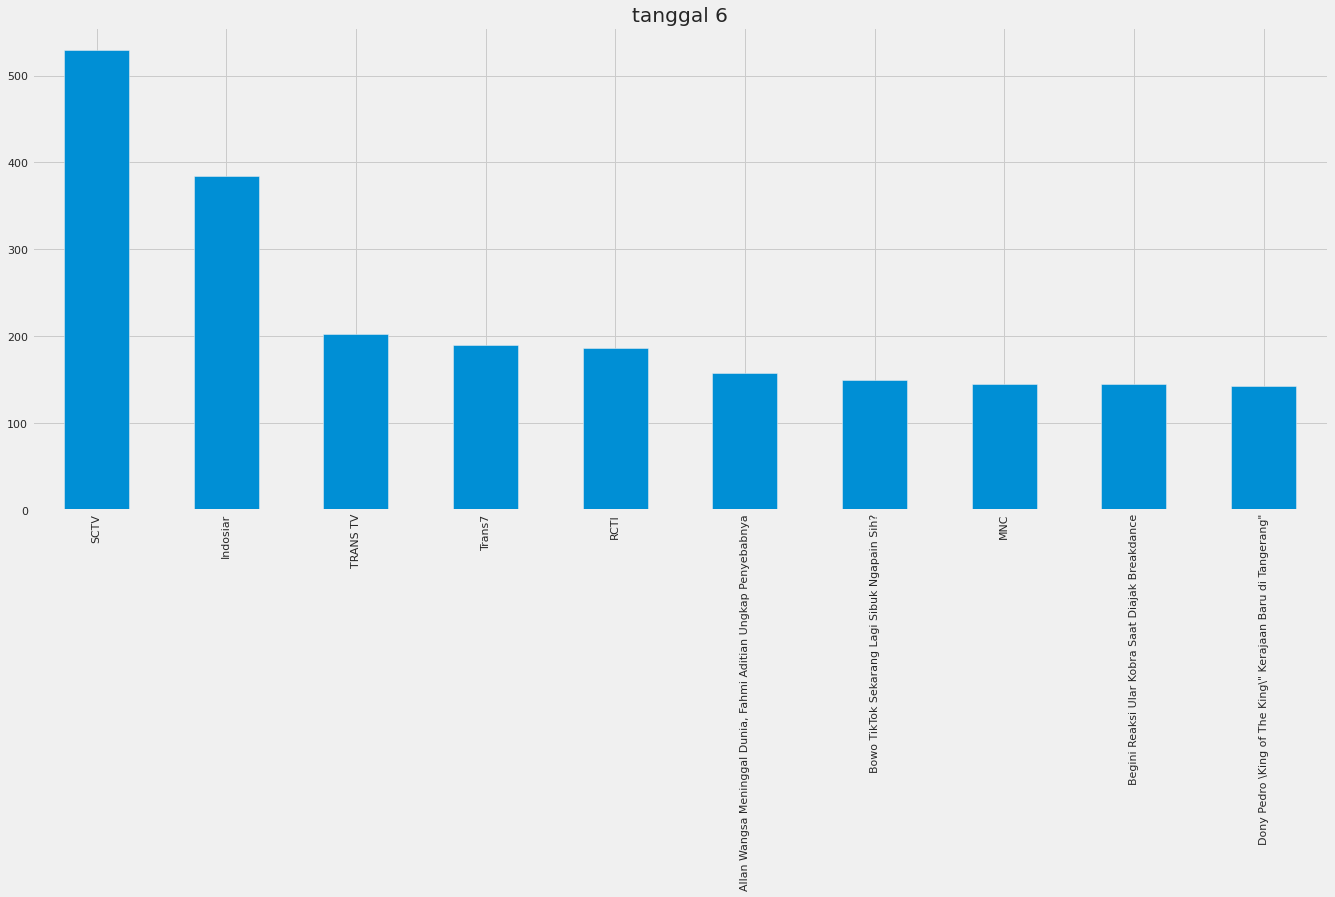

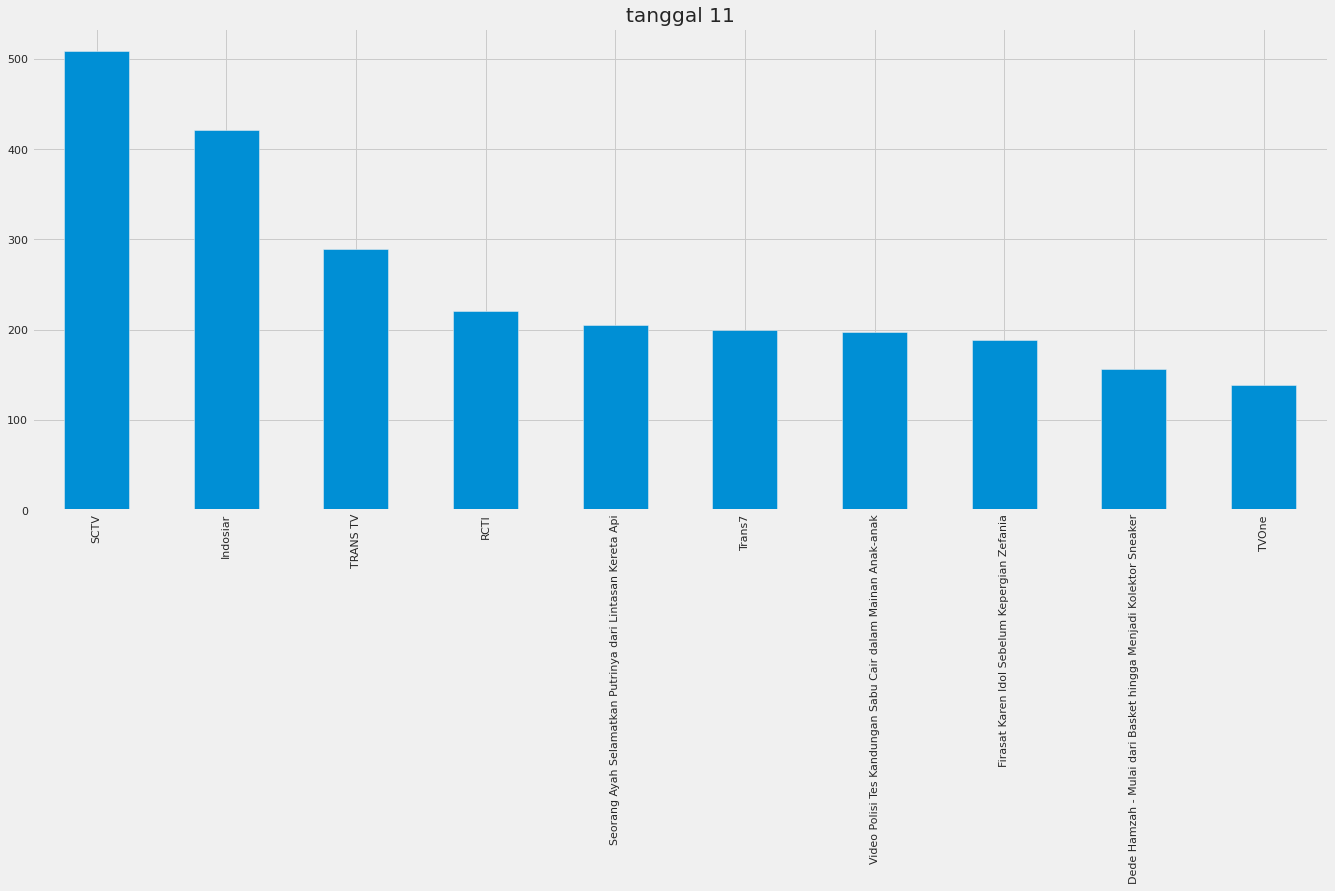

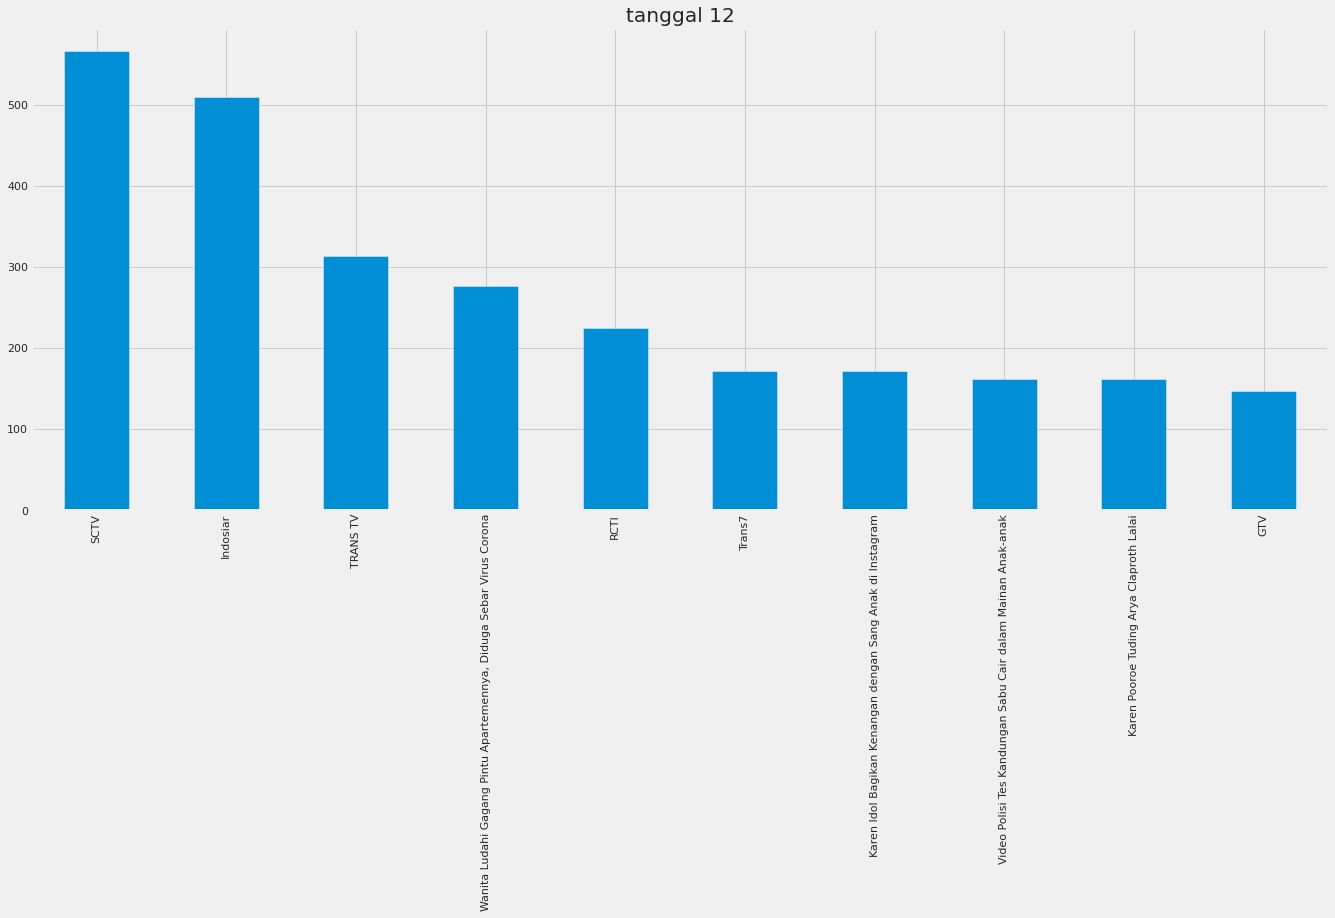

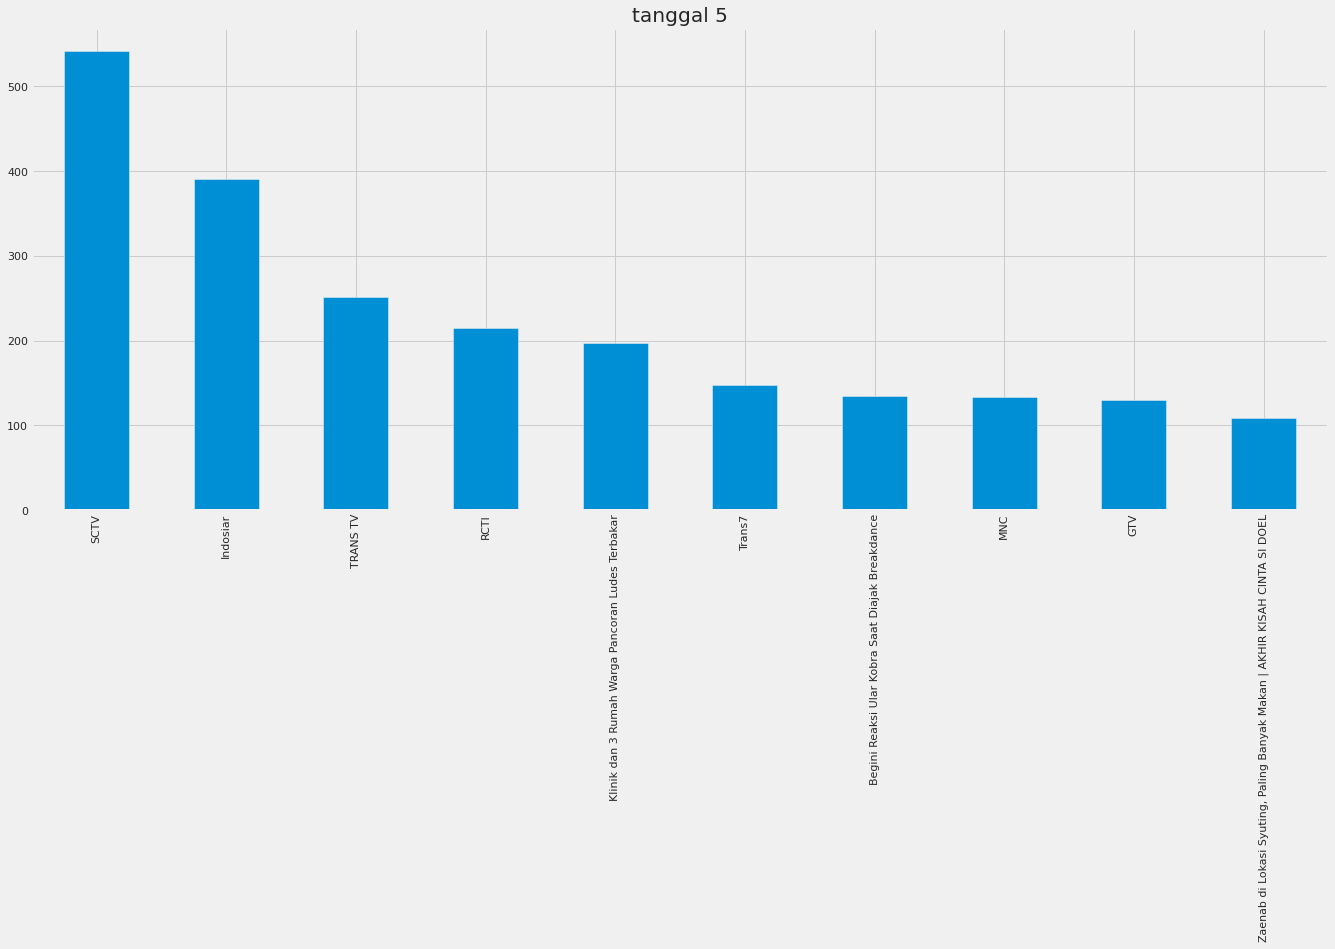

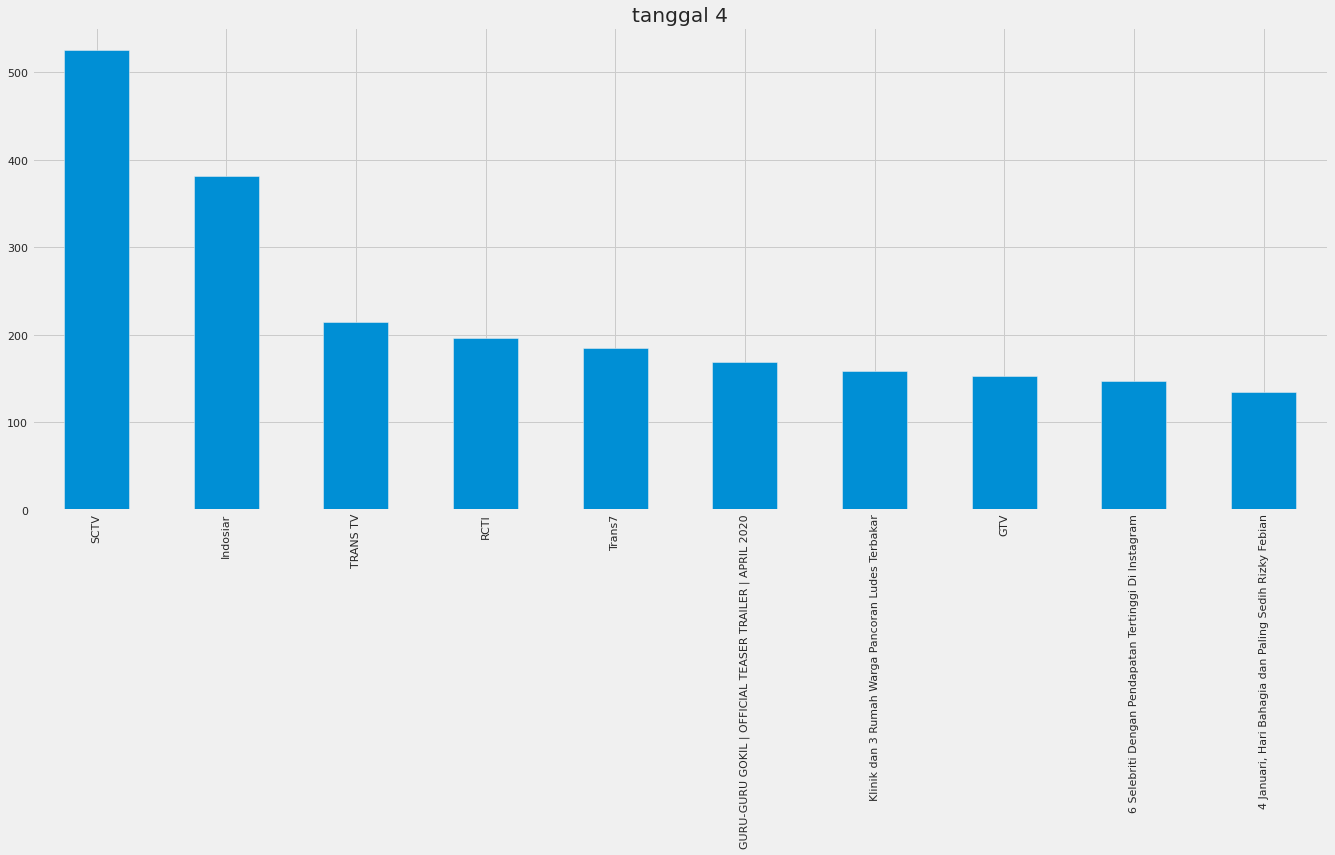

16


In [37]:
i = 0
for tanggal in df['play_time_date'].unique():
    df[df['play_time_date']==tanggal]['title'].value_counts().head(10).plot.bar()
    plt.title(f'tanggal {tanggal}')
    plt.show()
    i += 1
print(i)

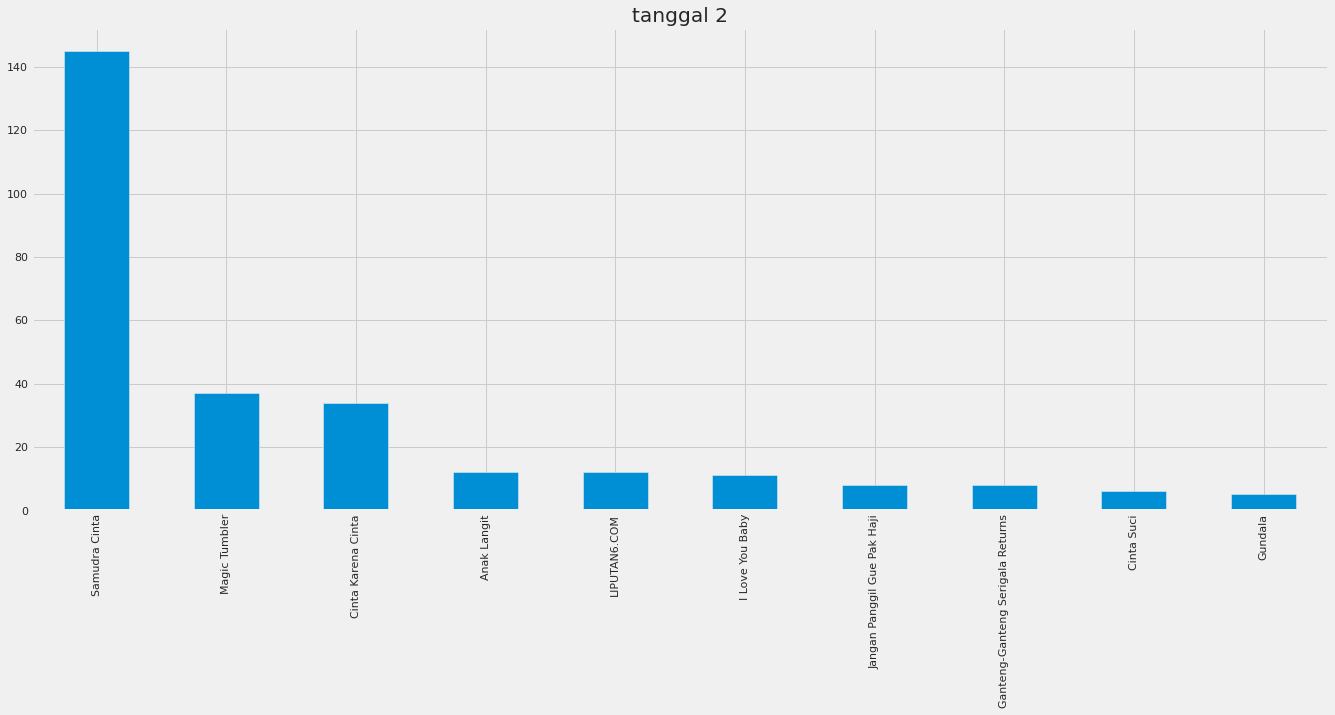

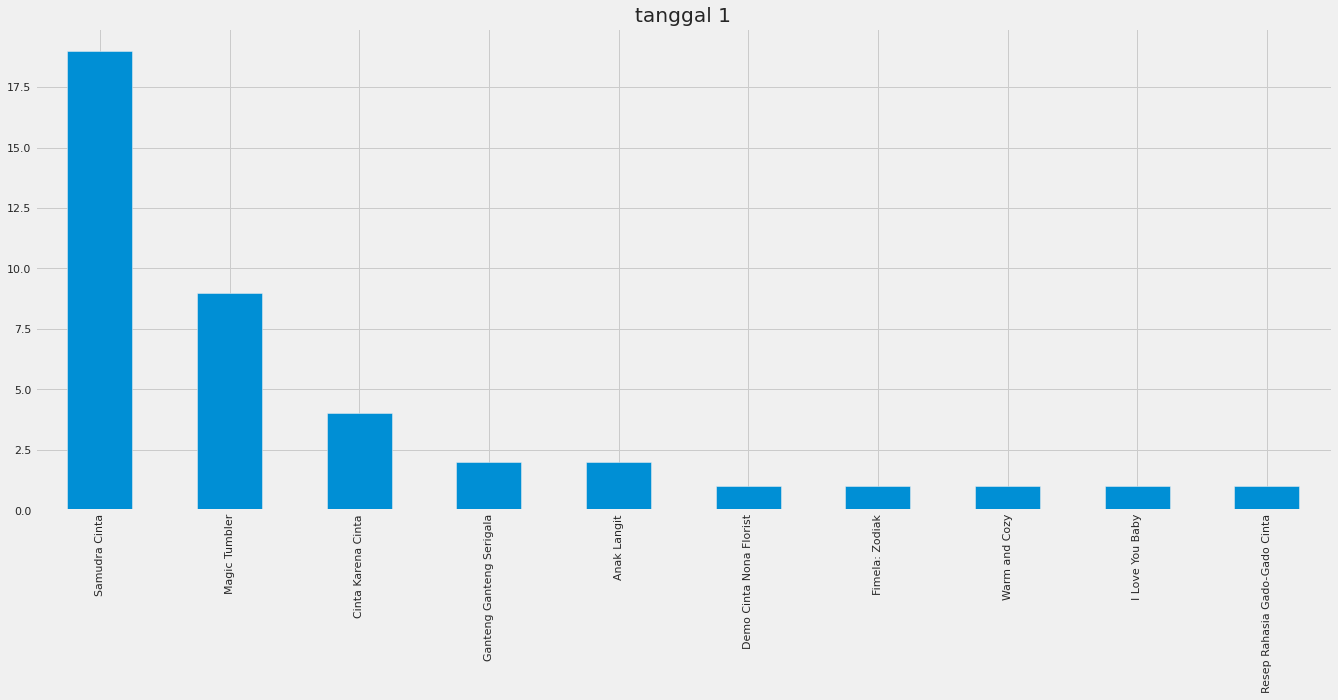

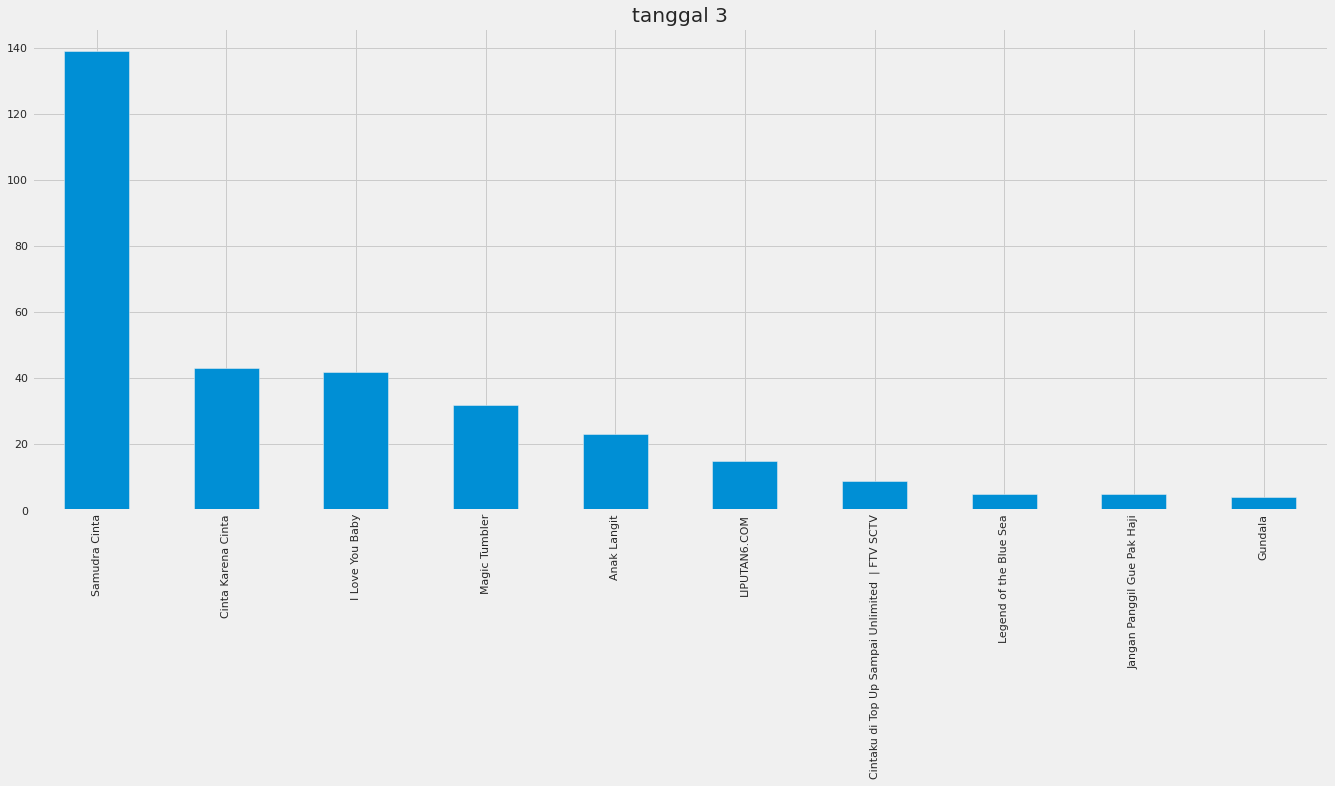

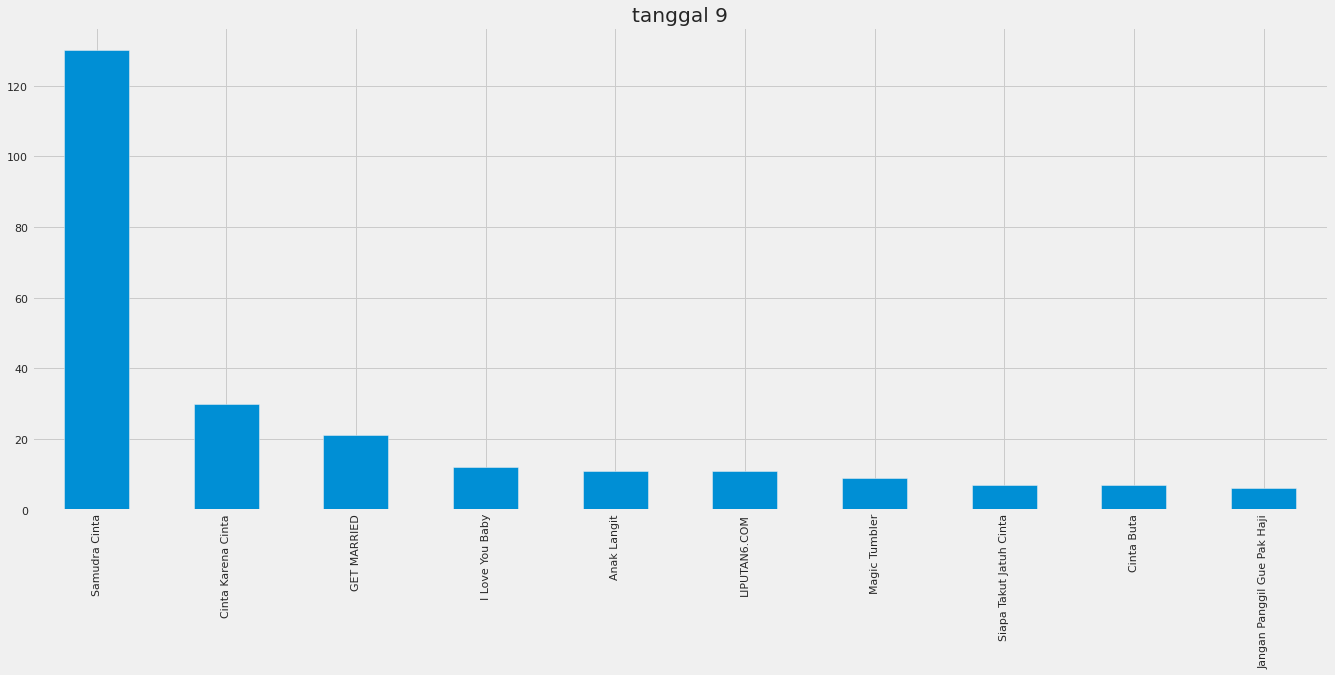

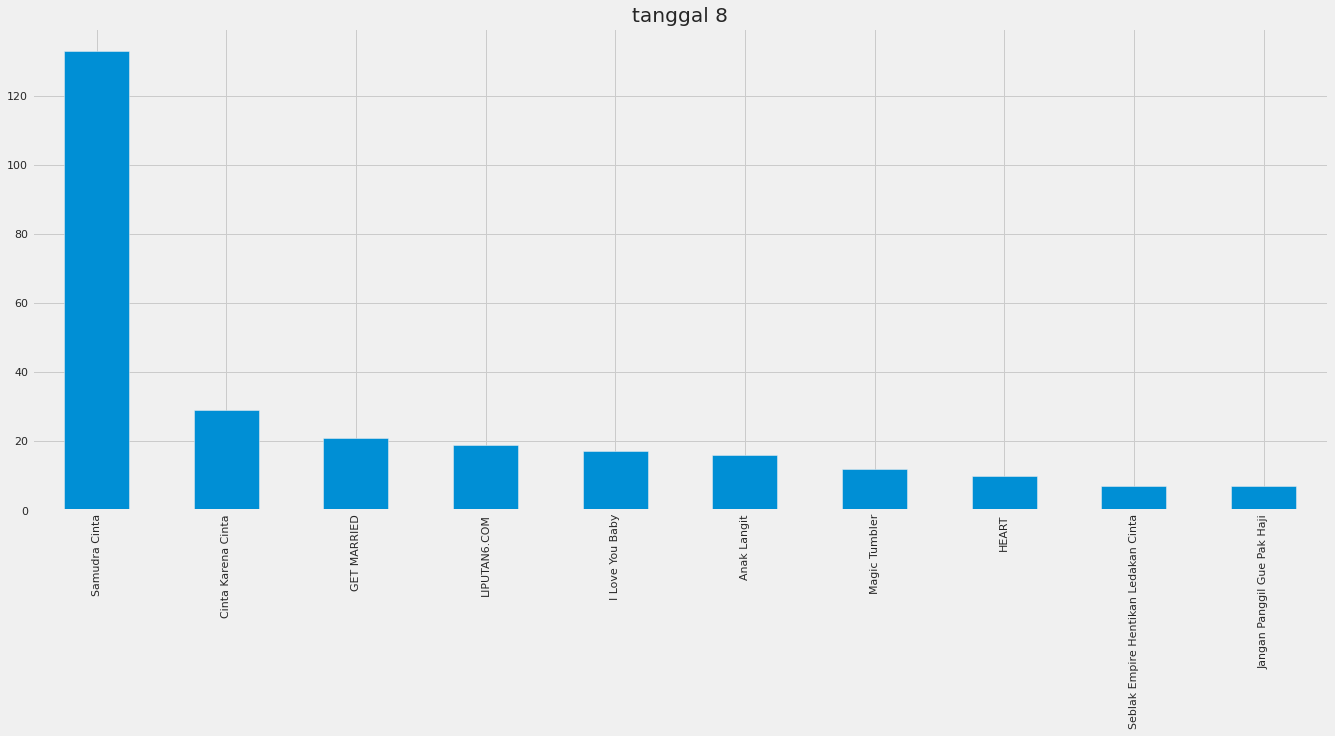

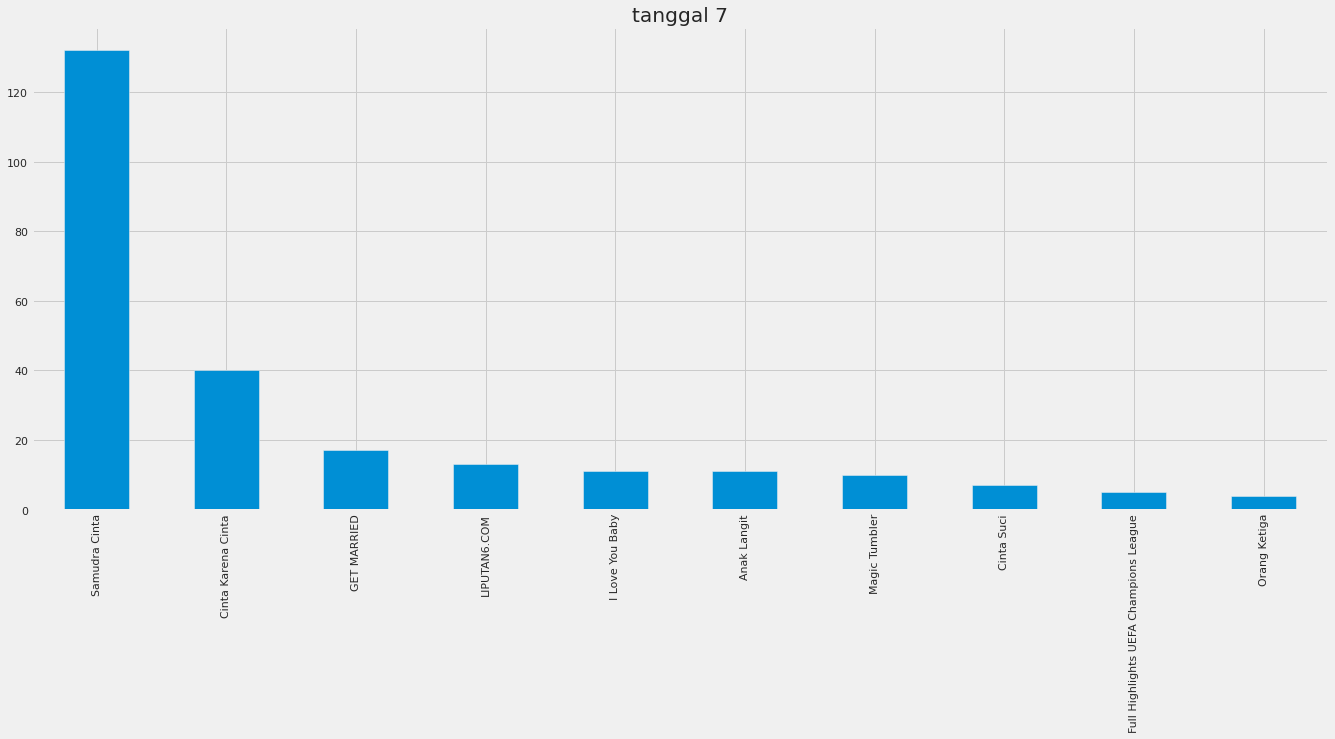

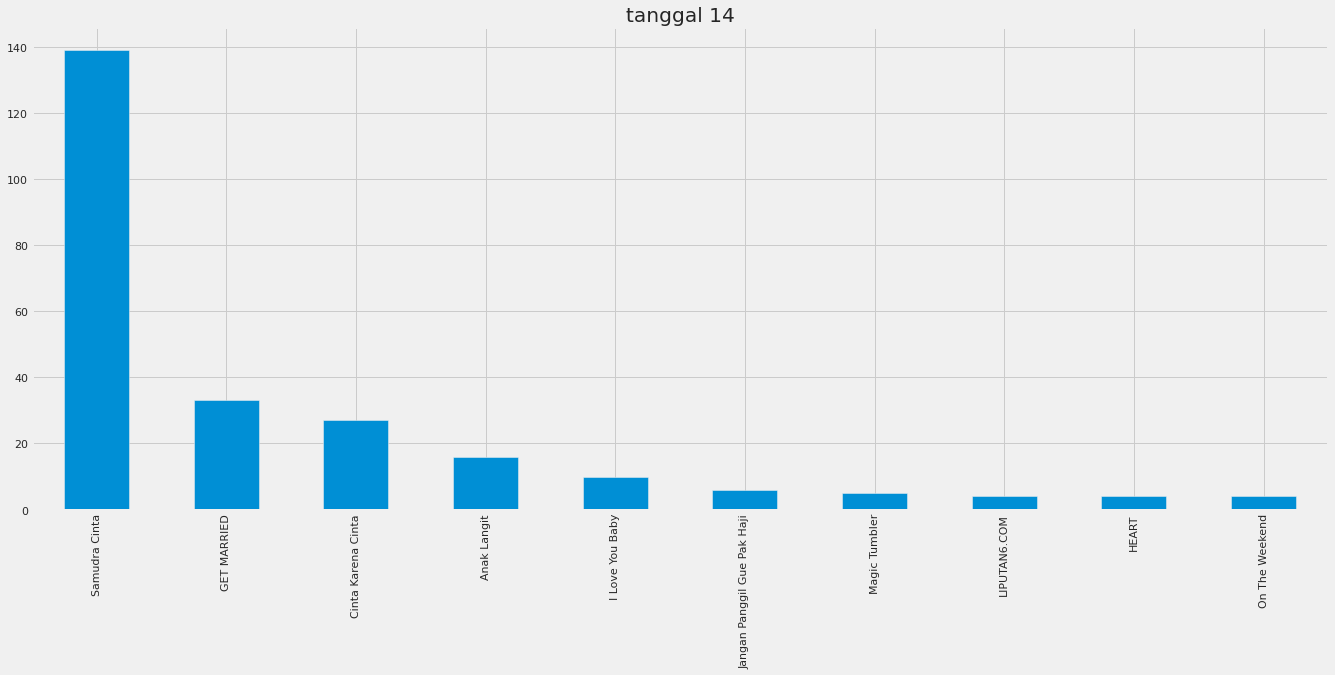

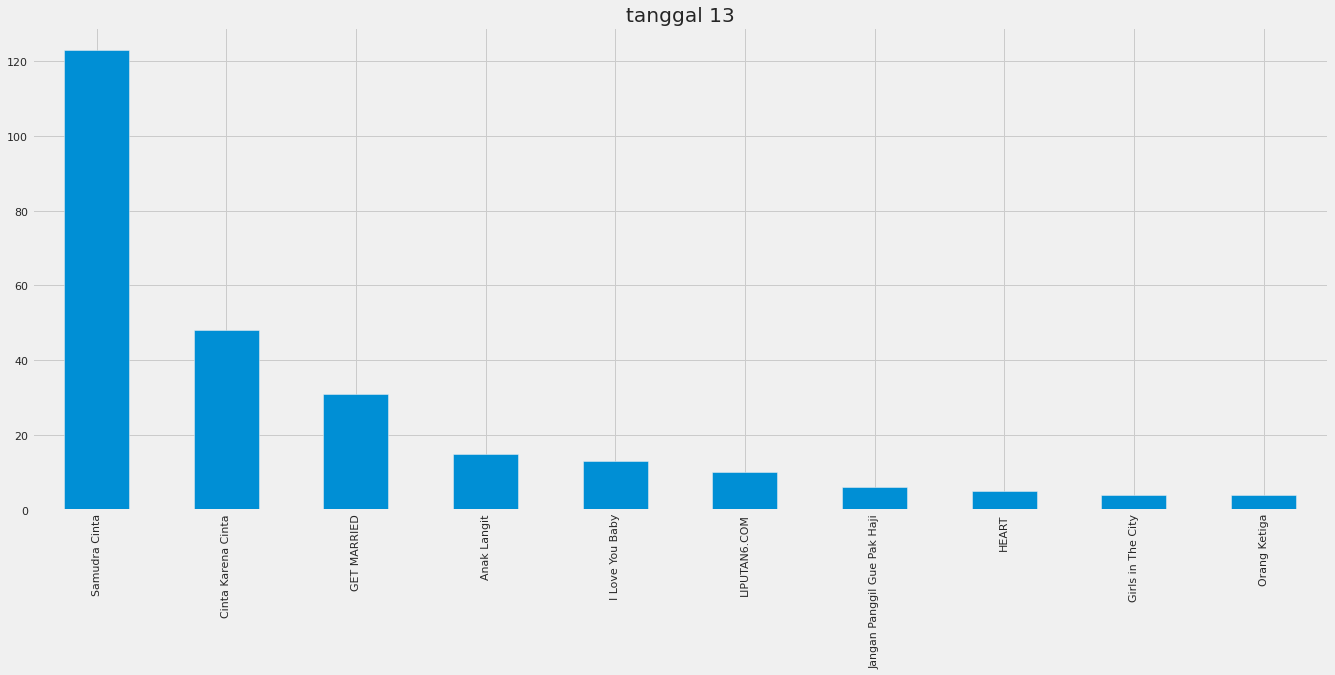

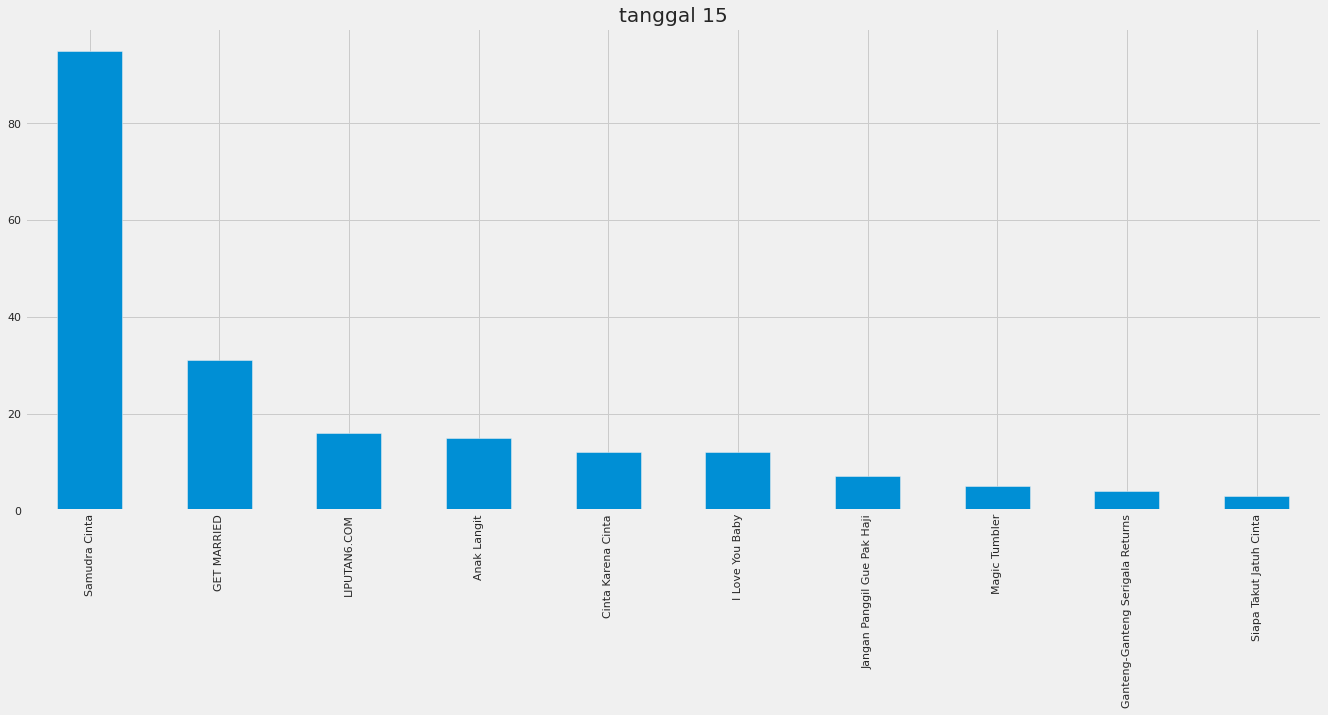

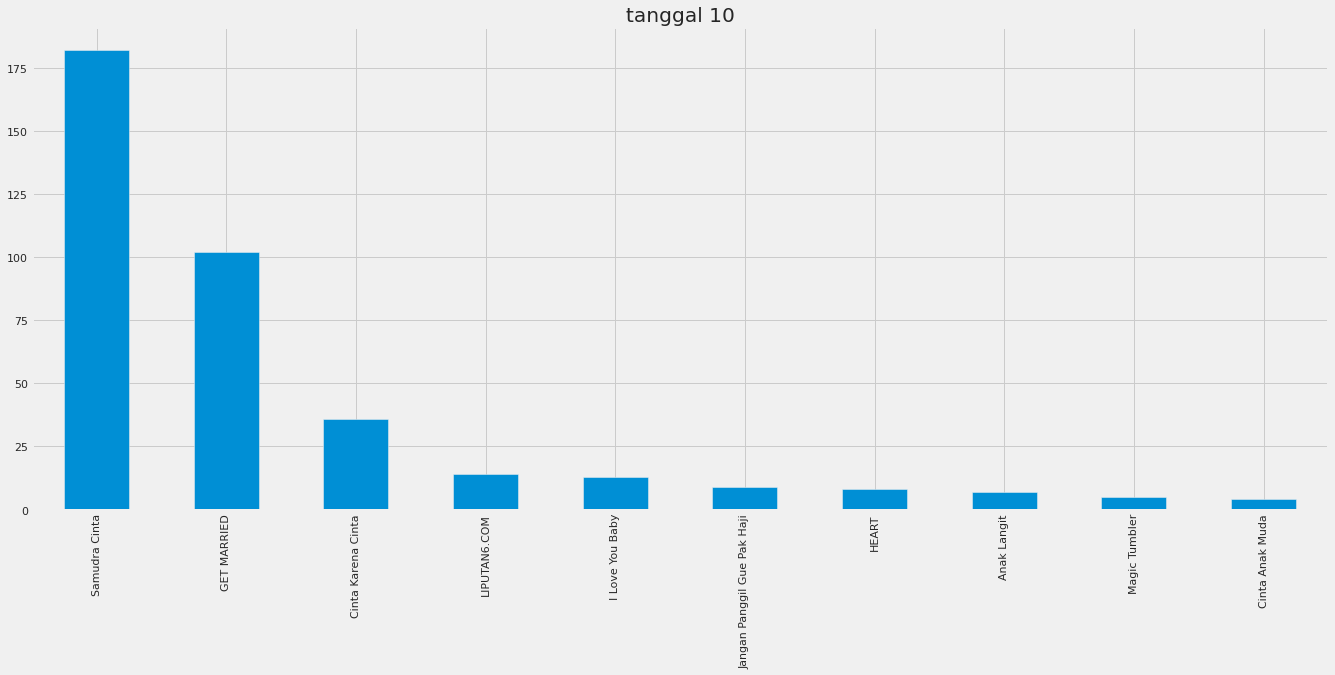

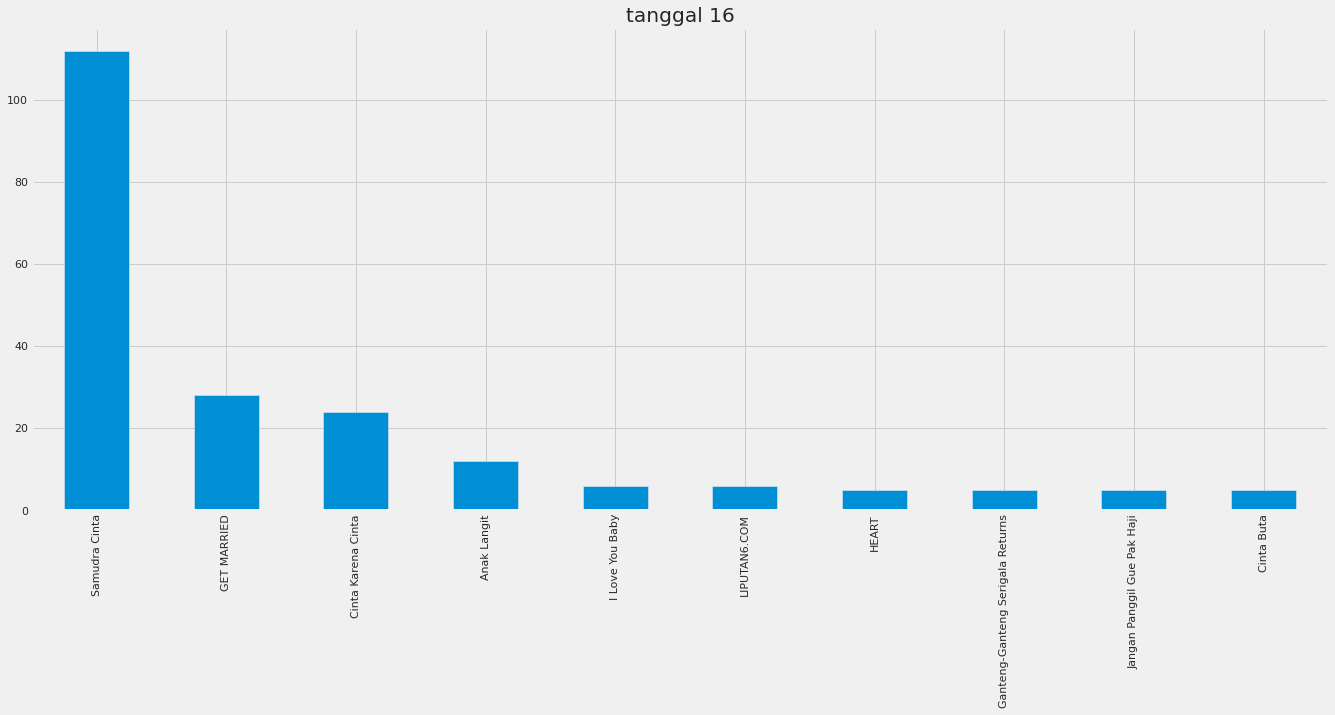

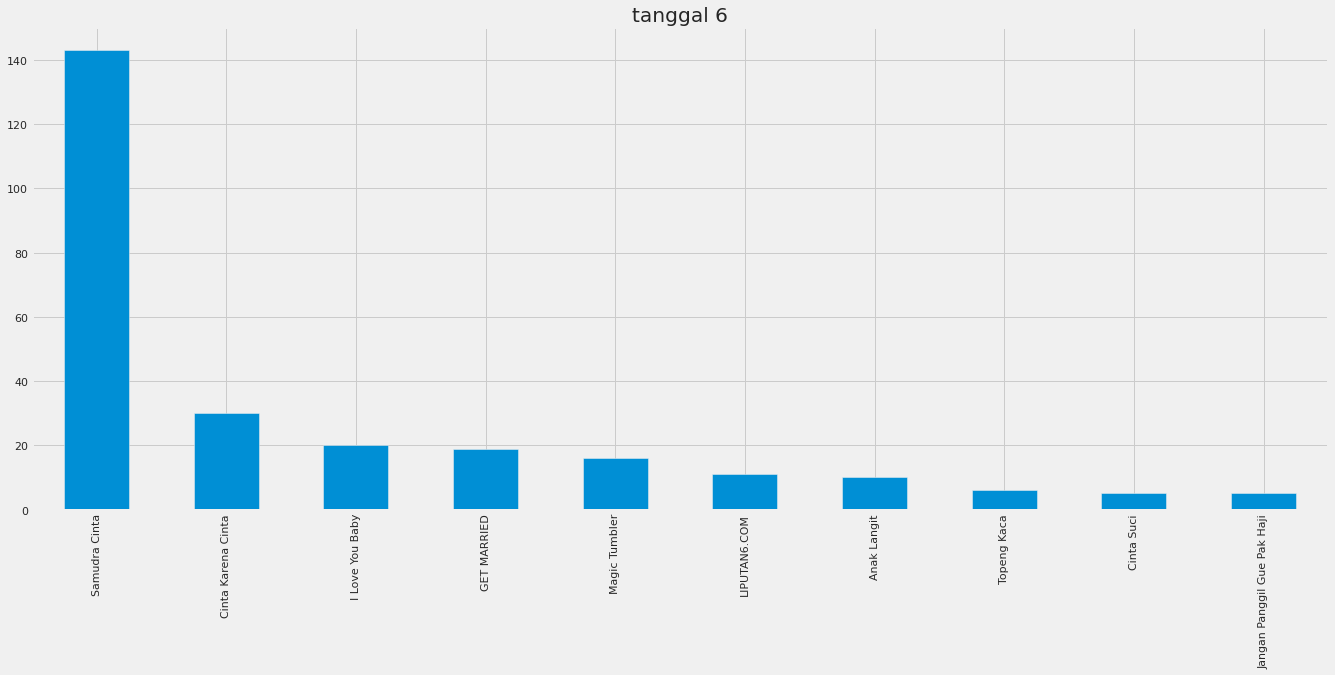

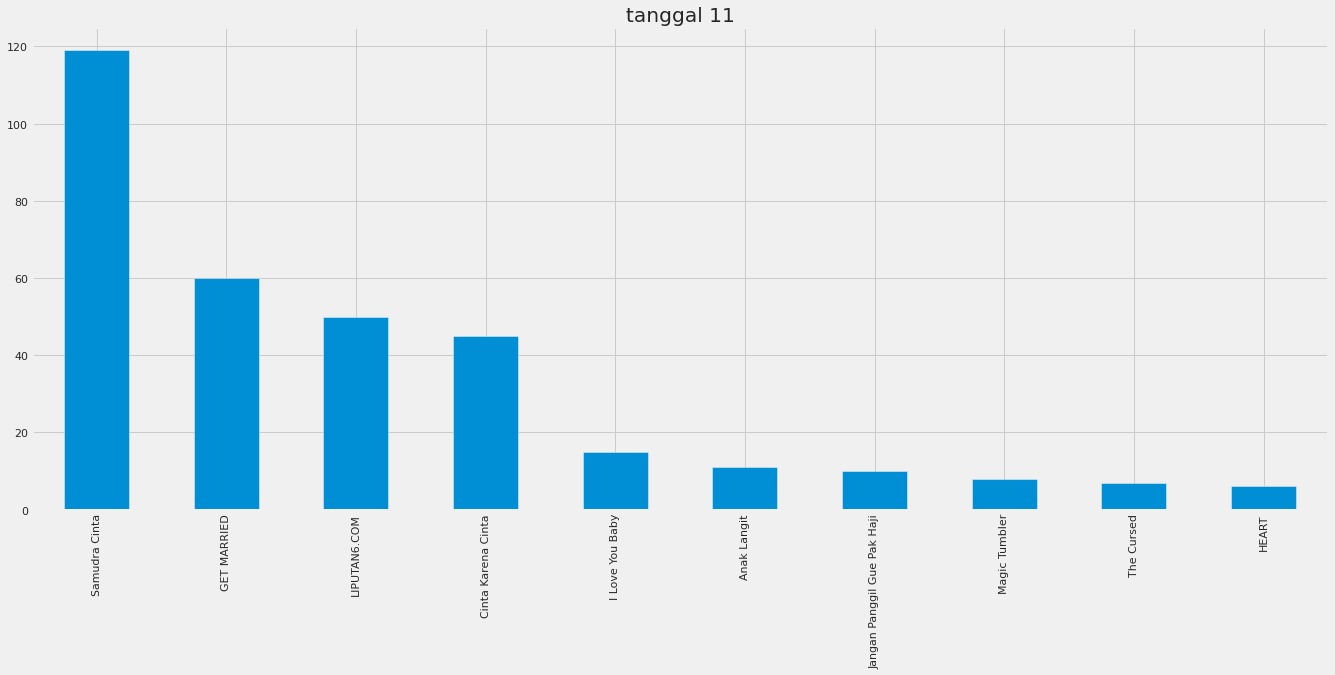

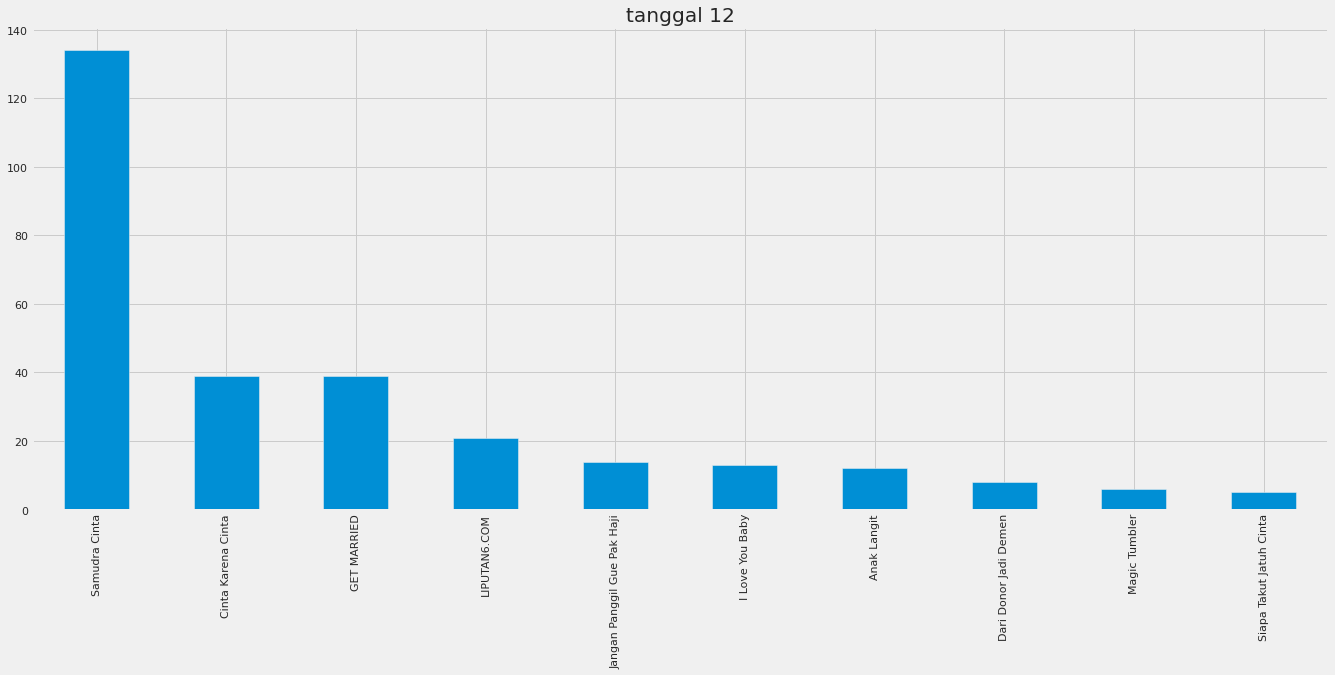

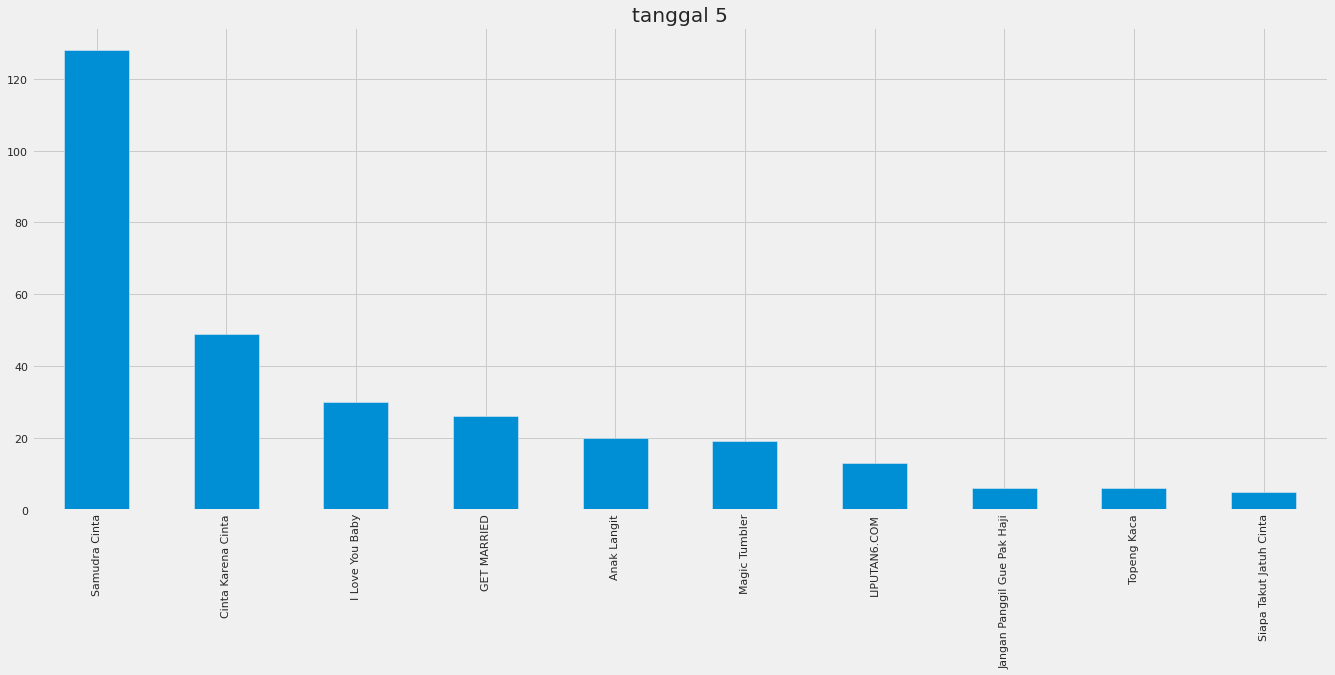

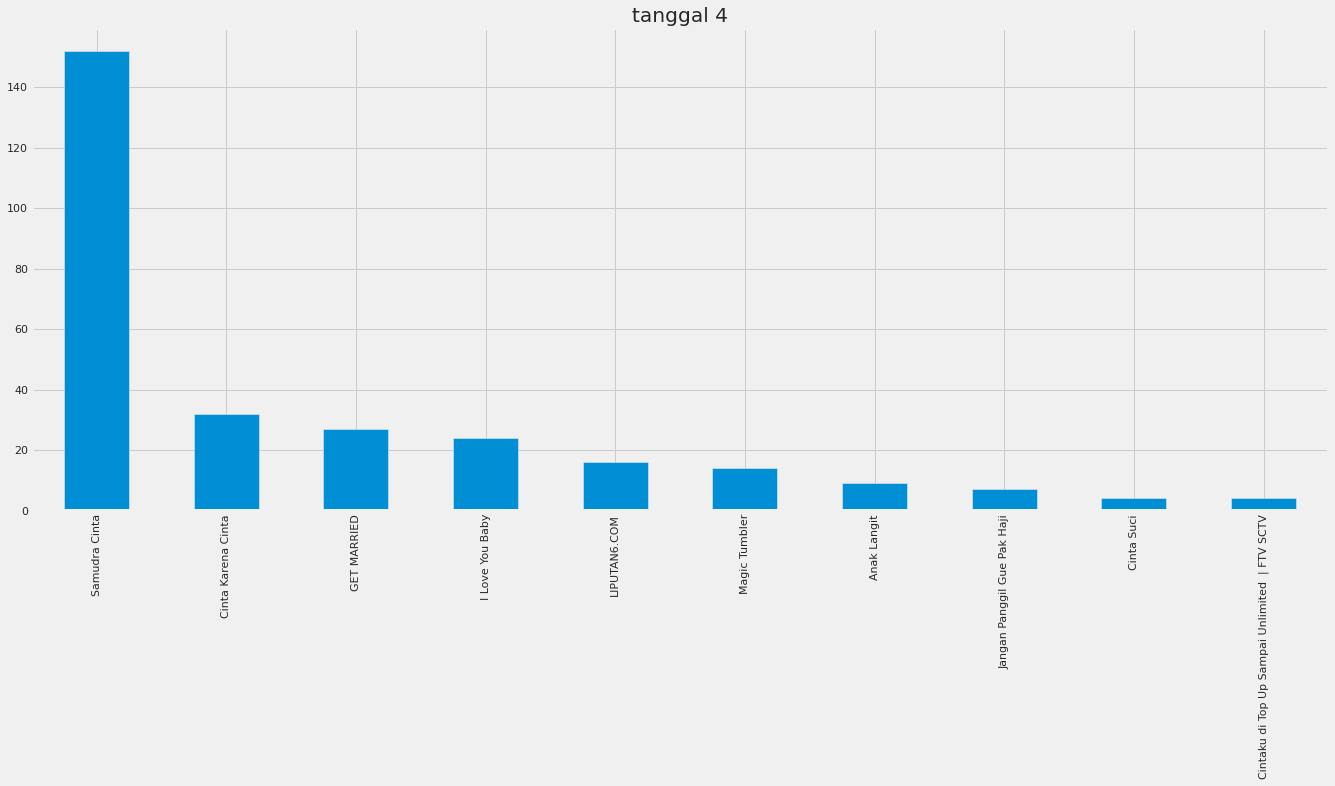

16


In [38]:
i = 0
for tanggal in df['play_time_date'].unique():
    df[df['play_time_date']==tanggal]['film_title'].value_counts().head(10).plot.bar()
    plt.title(f'tanggal {tanggal}')
    plt.show()
    i += 1
print(i)

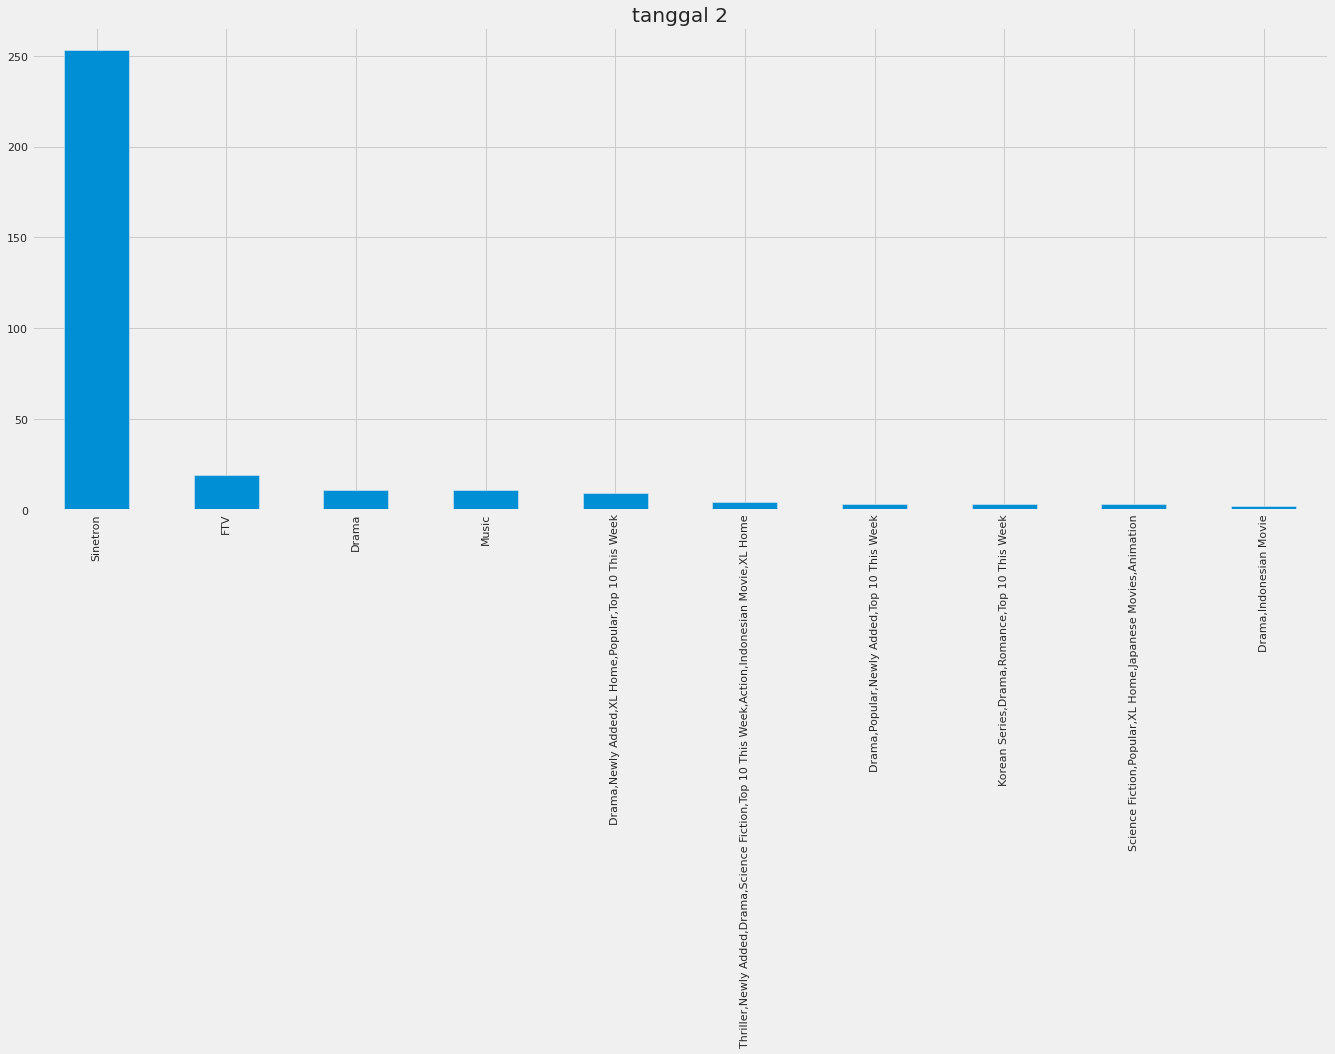

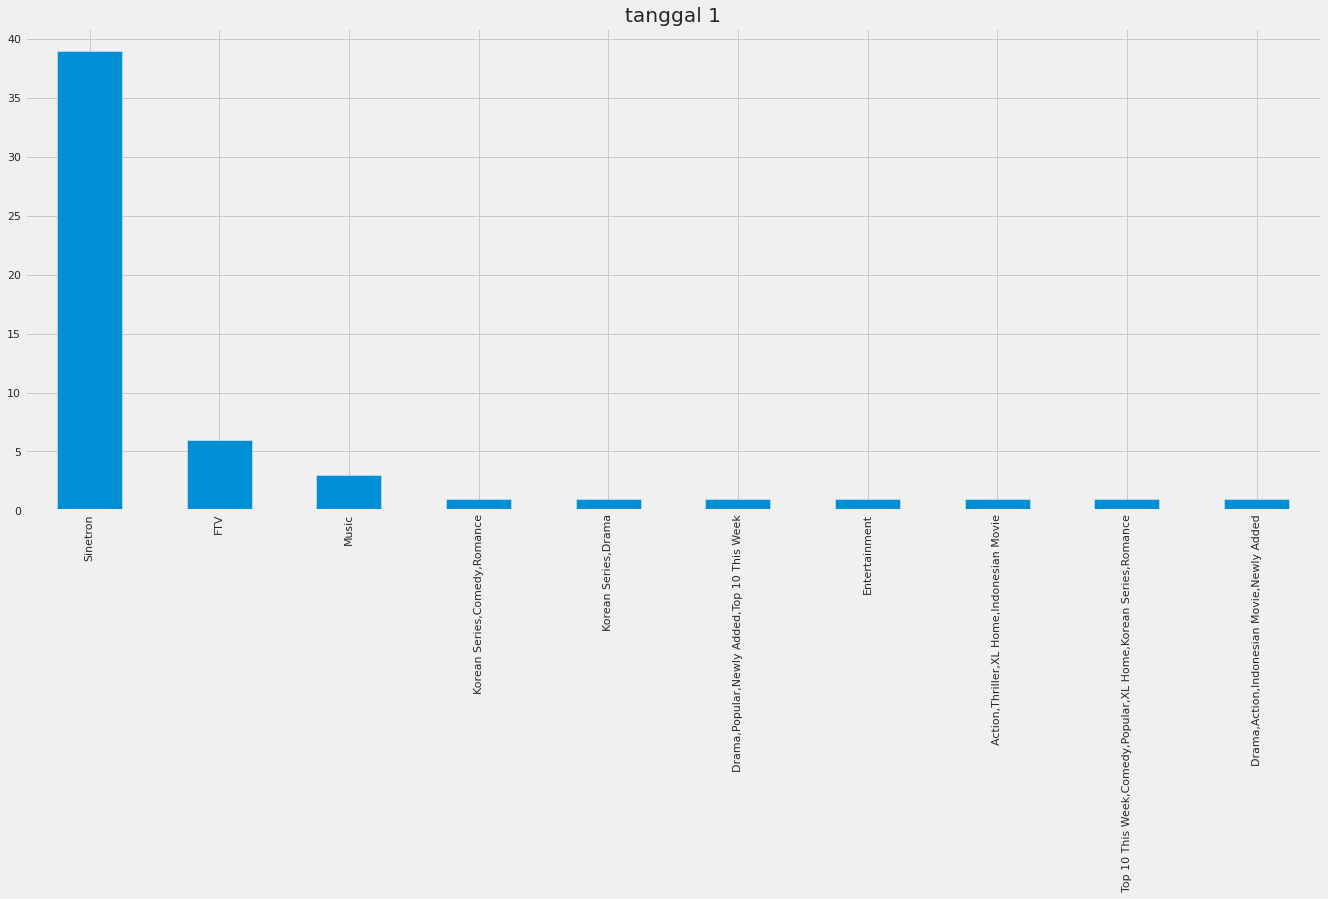

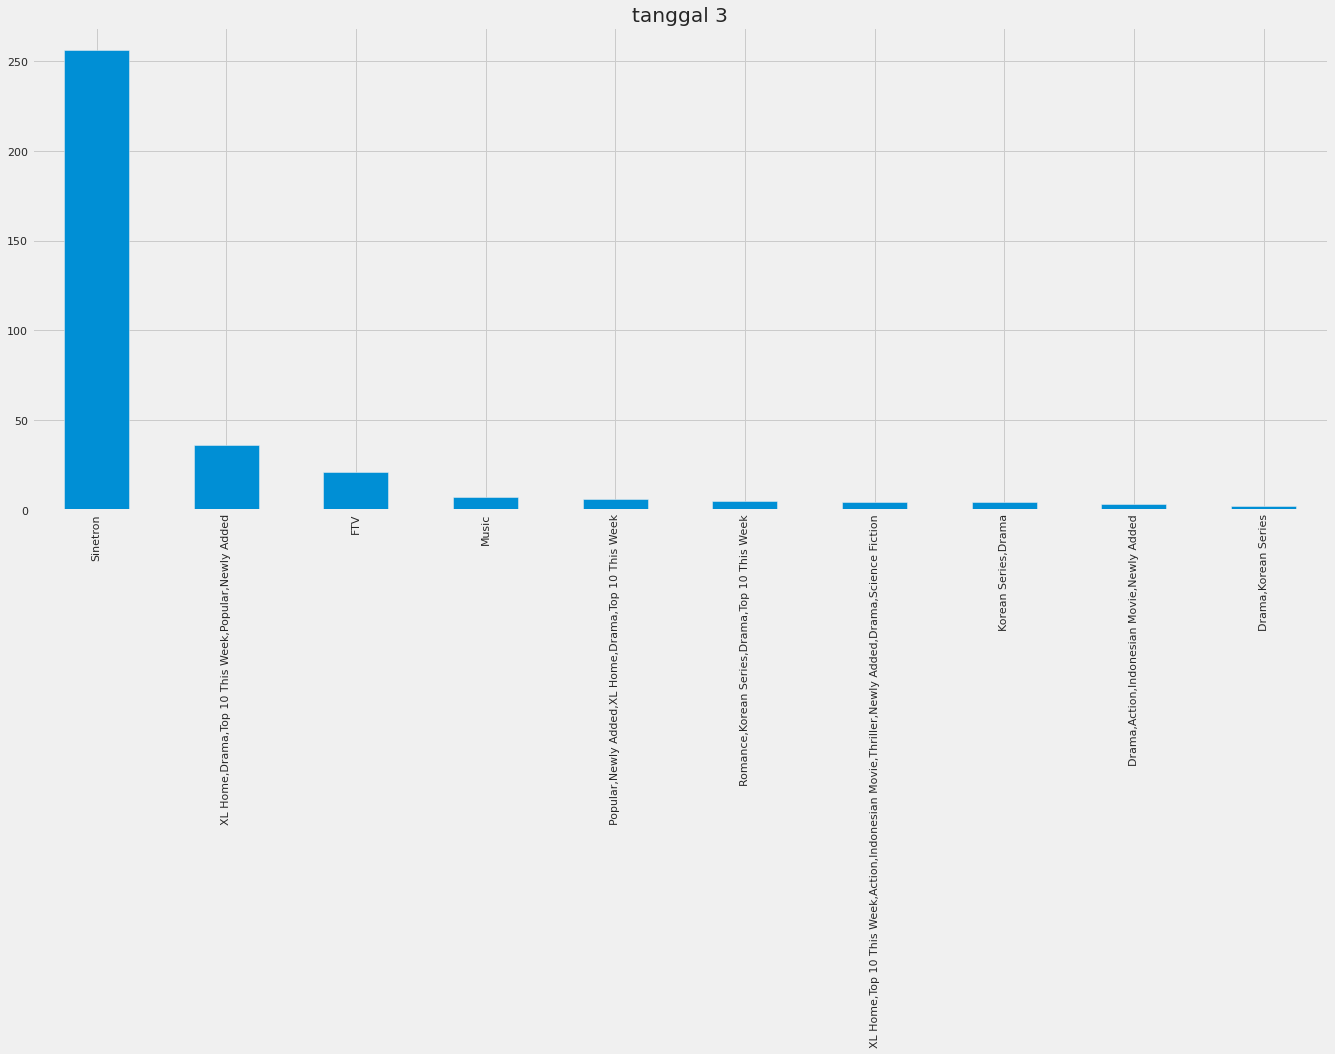

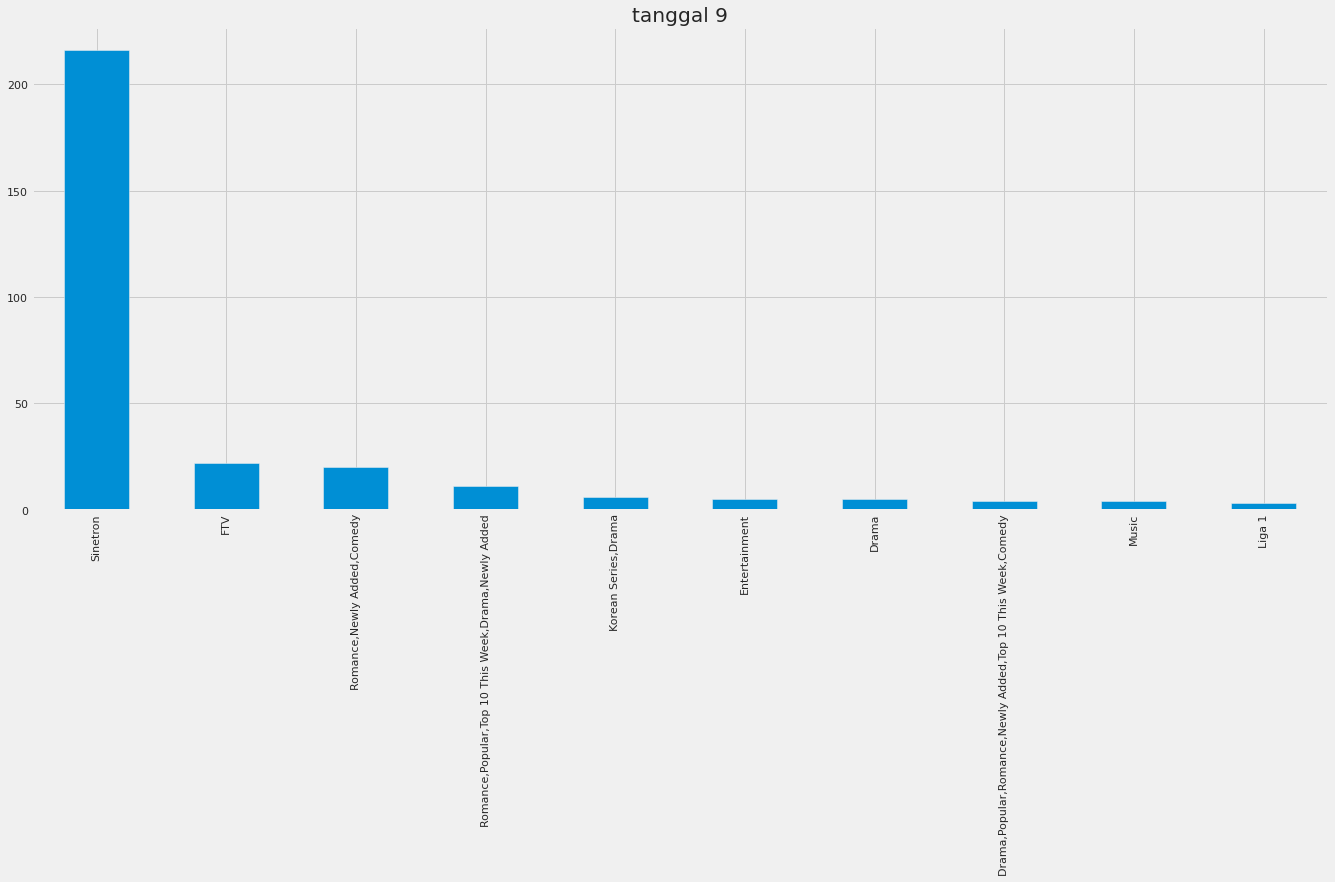

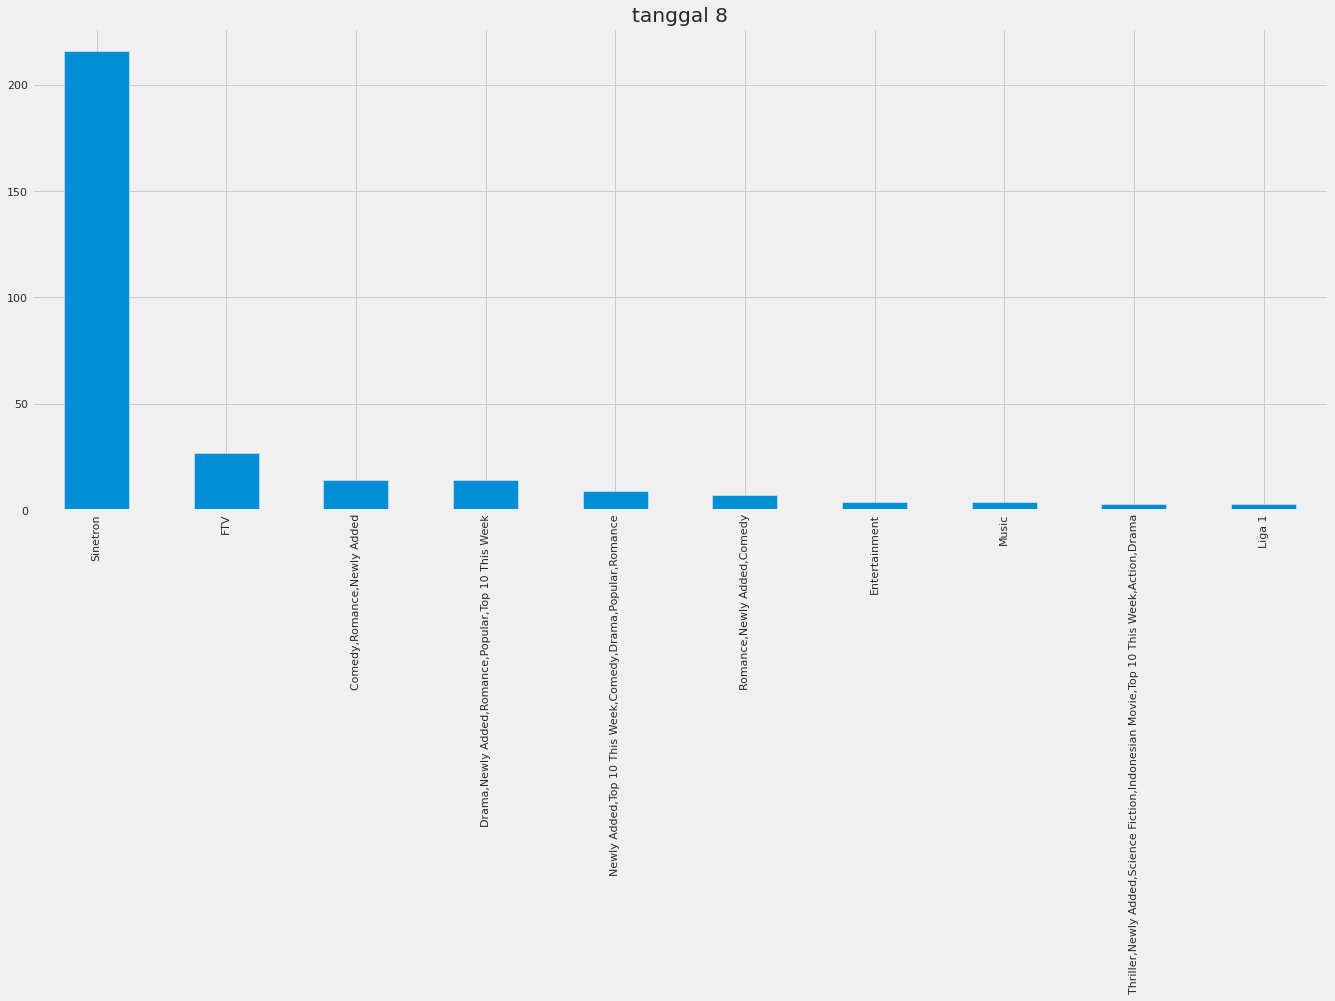

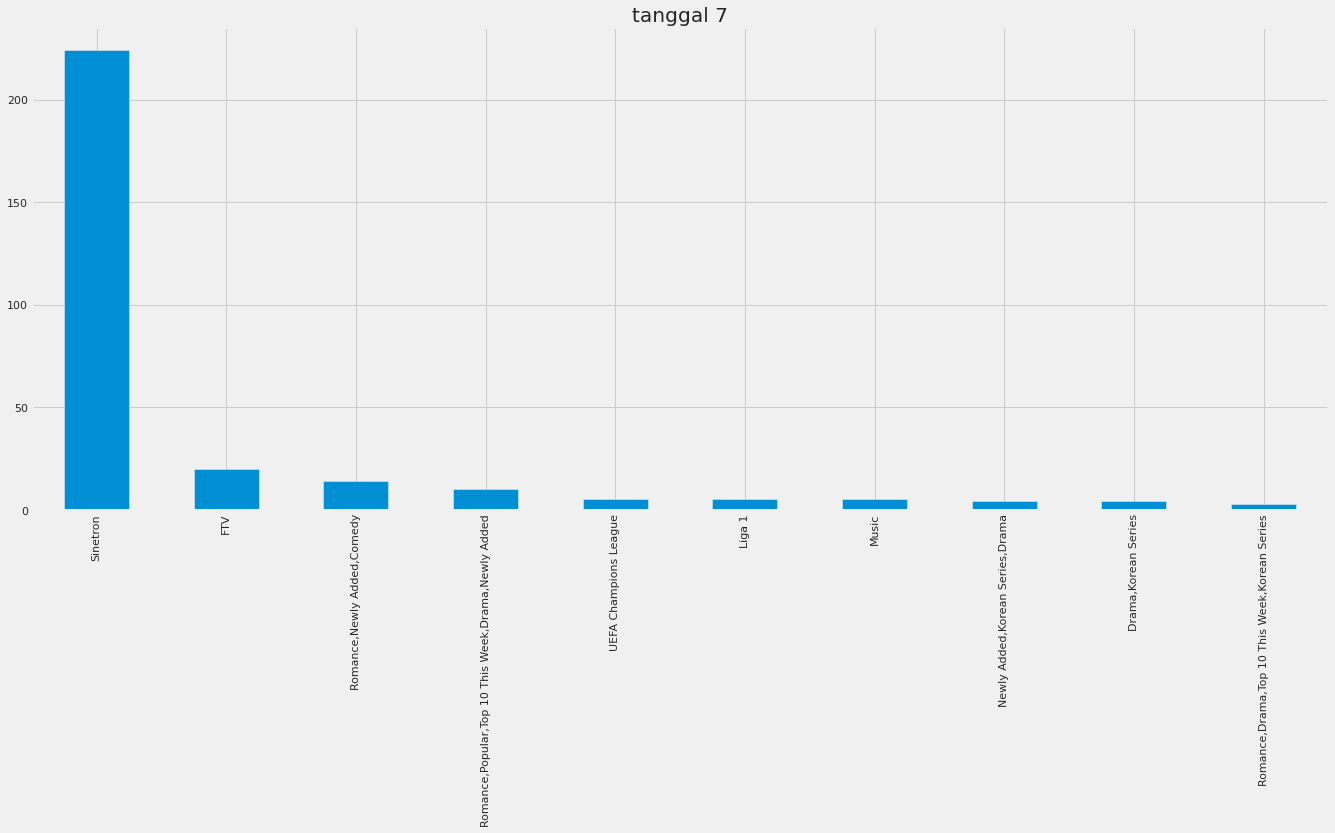

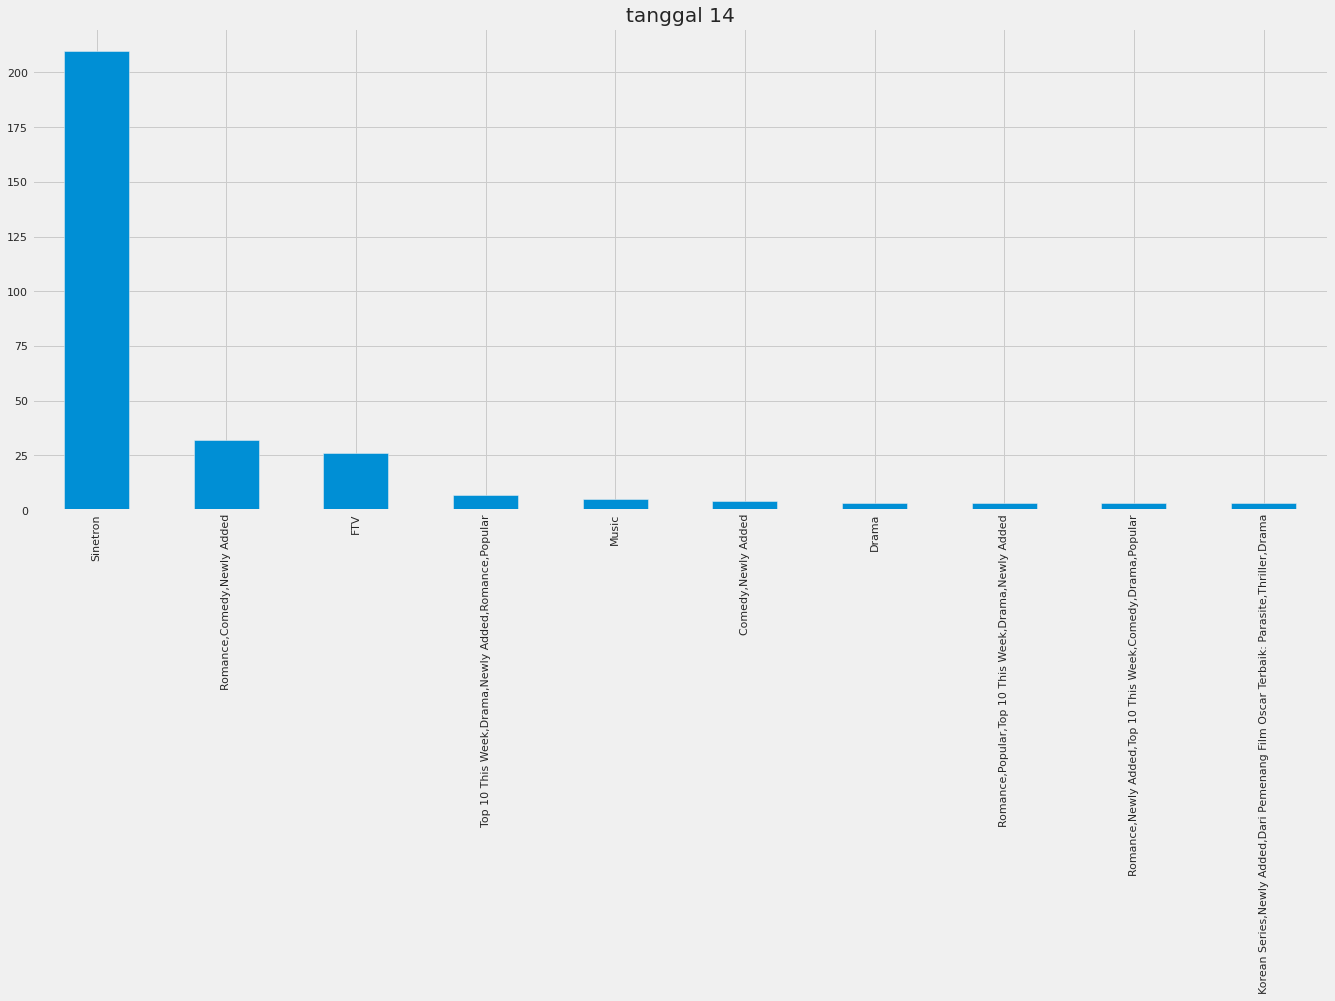

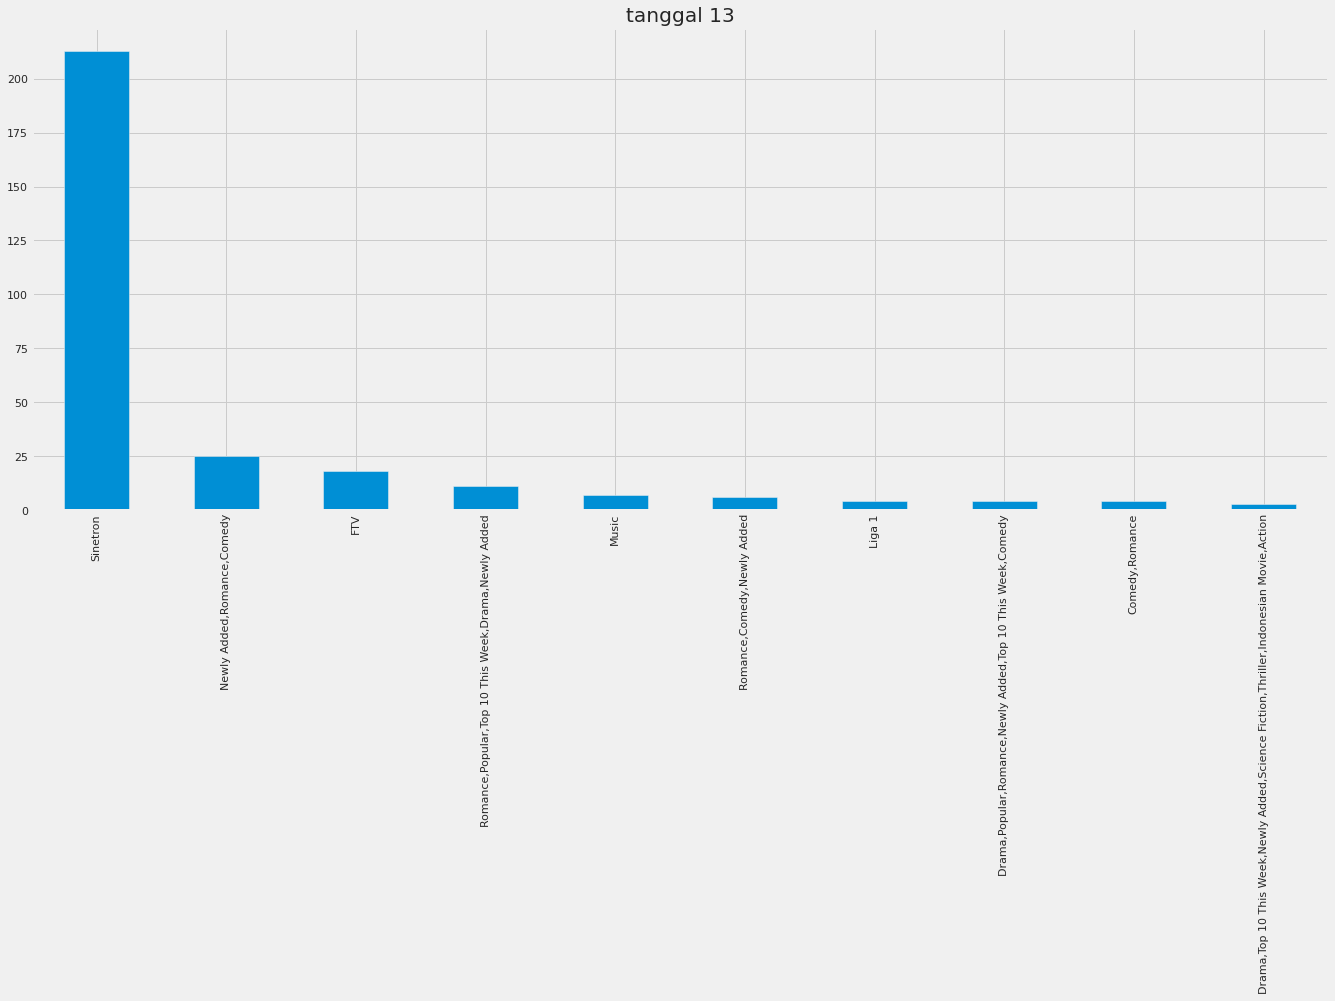

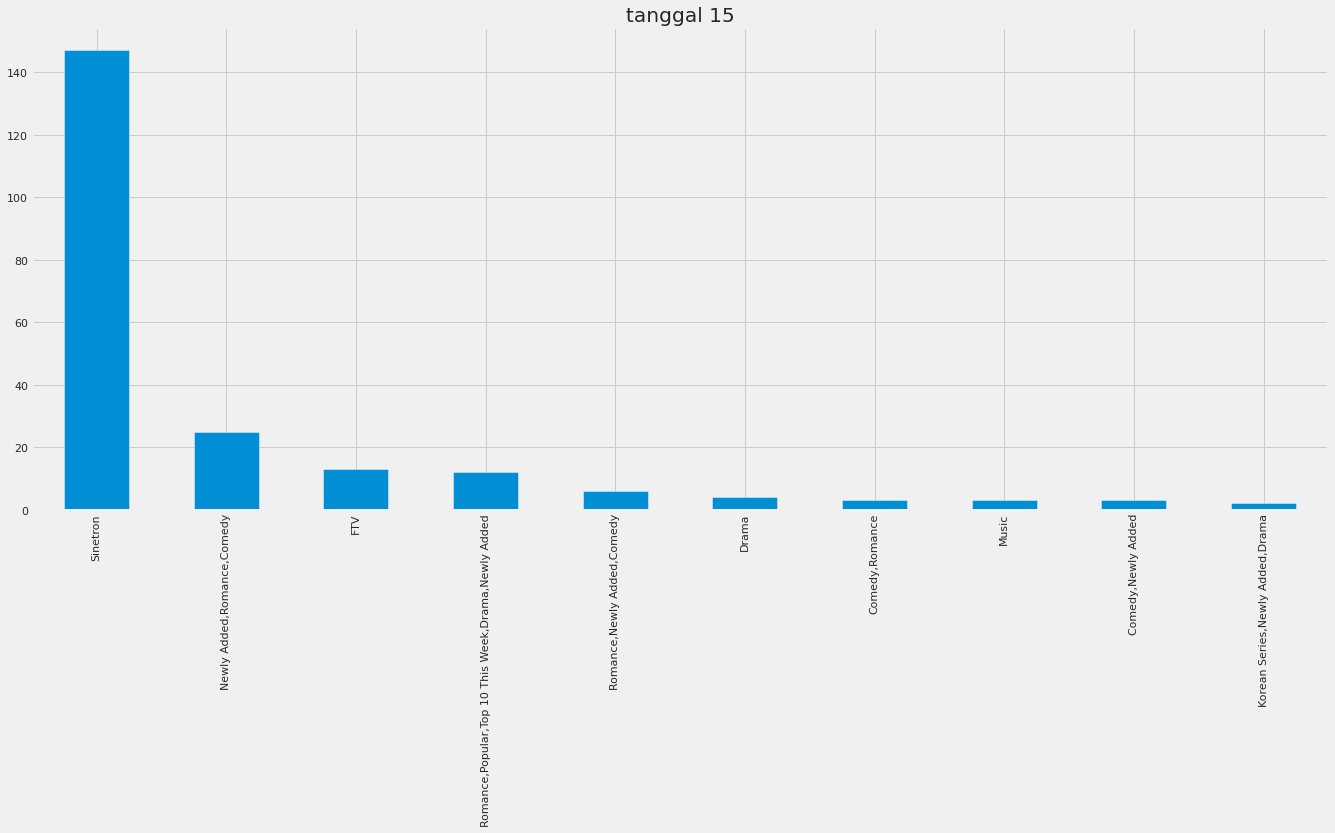

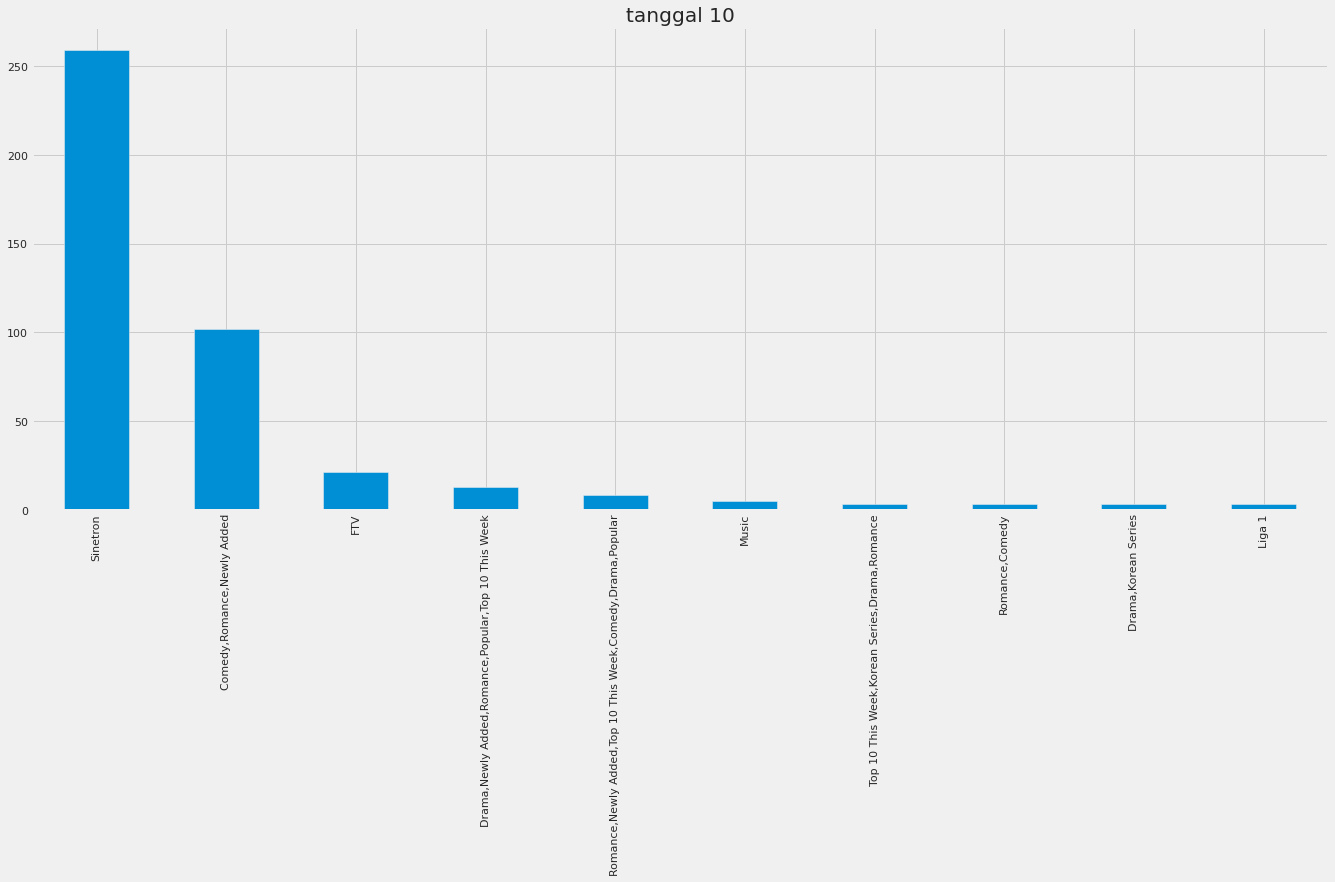

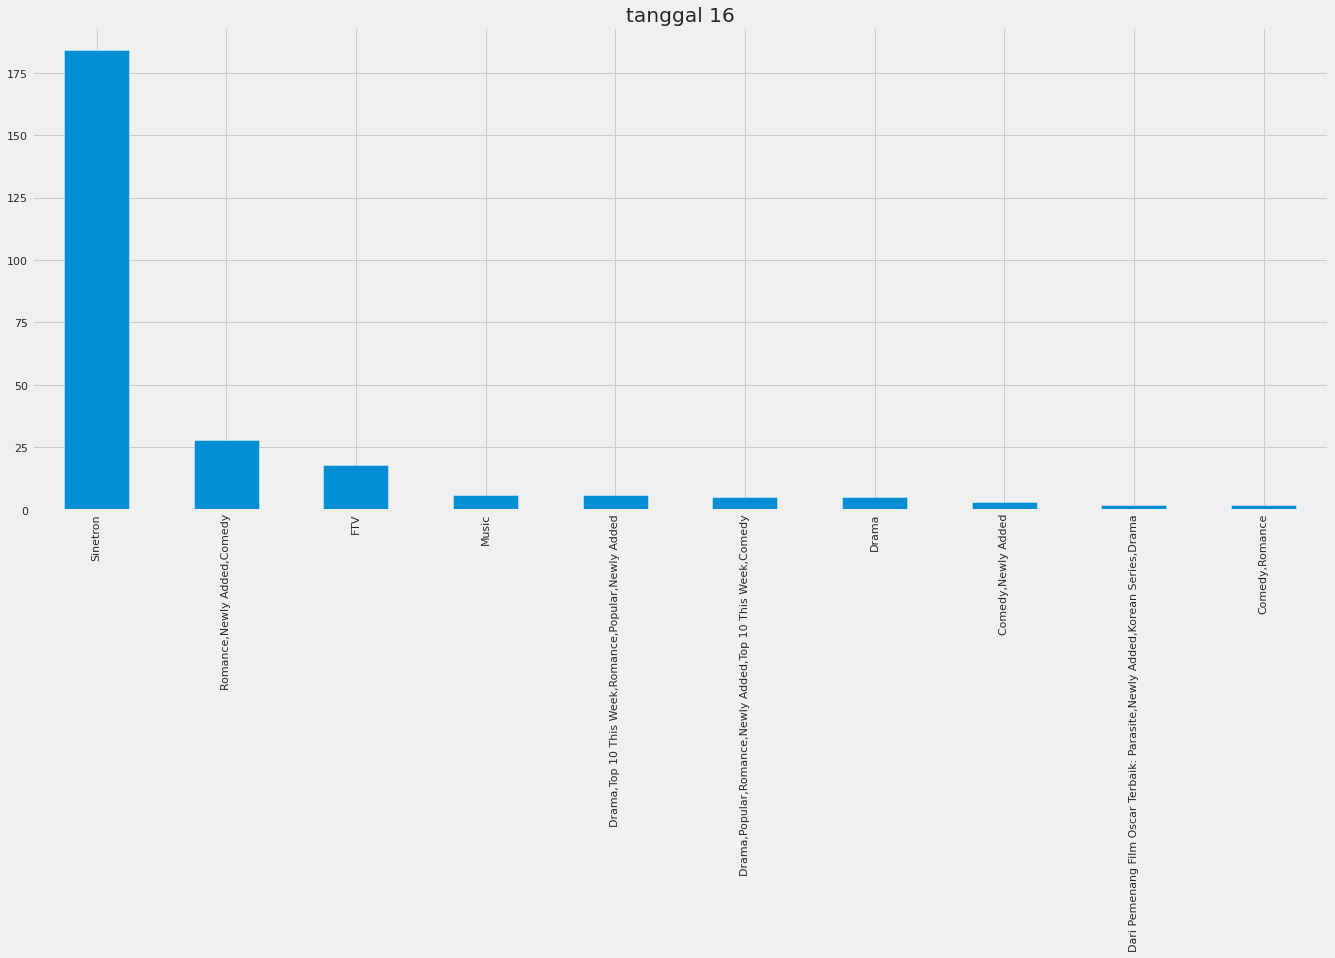

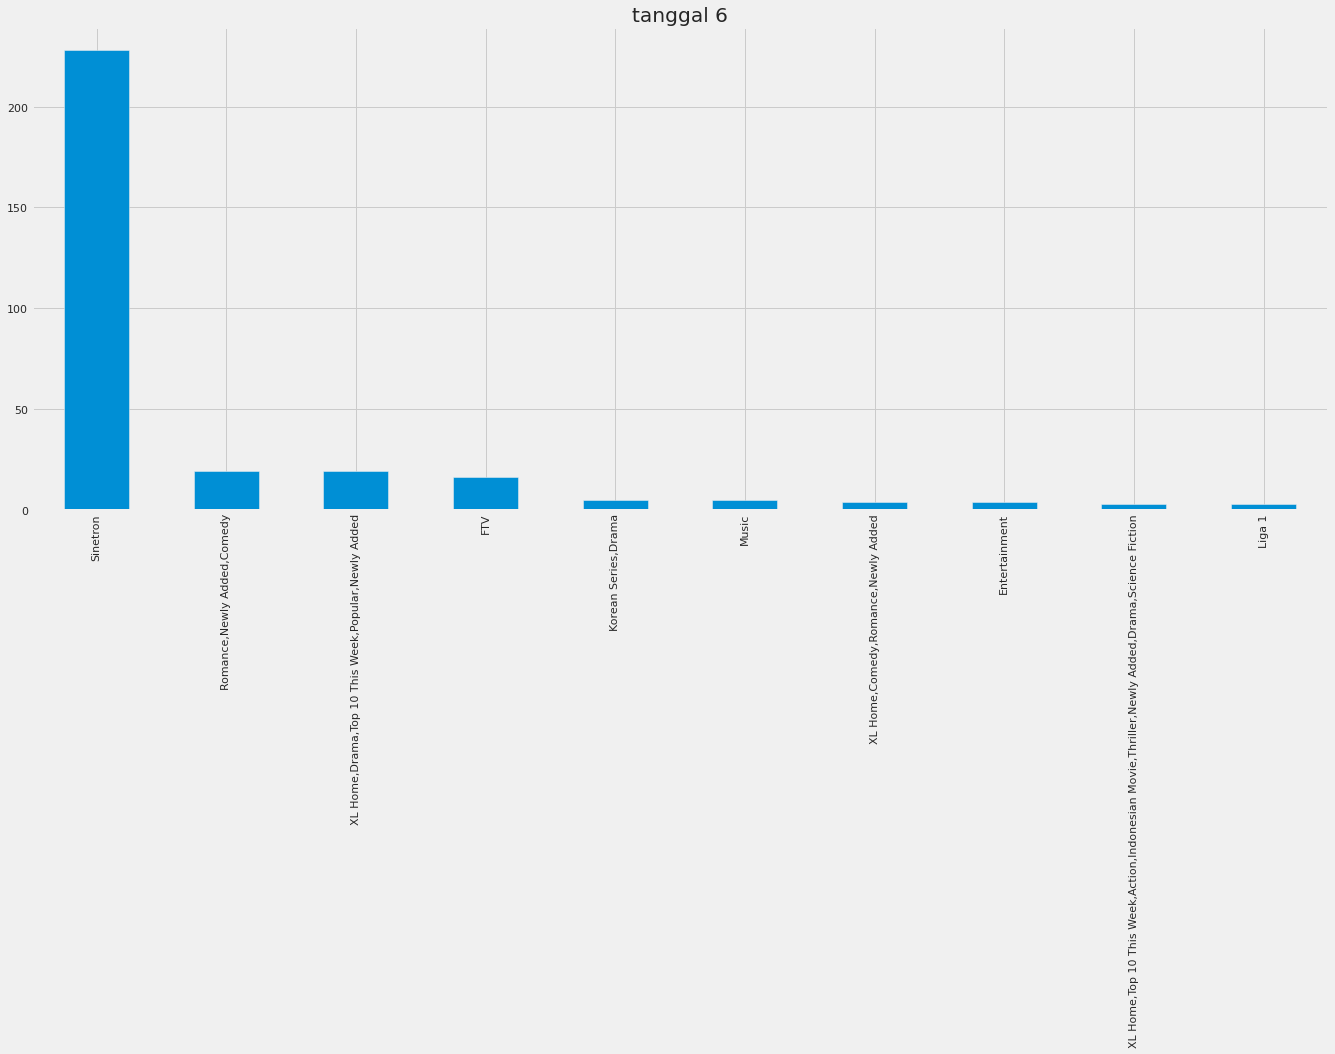

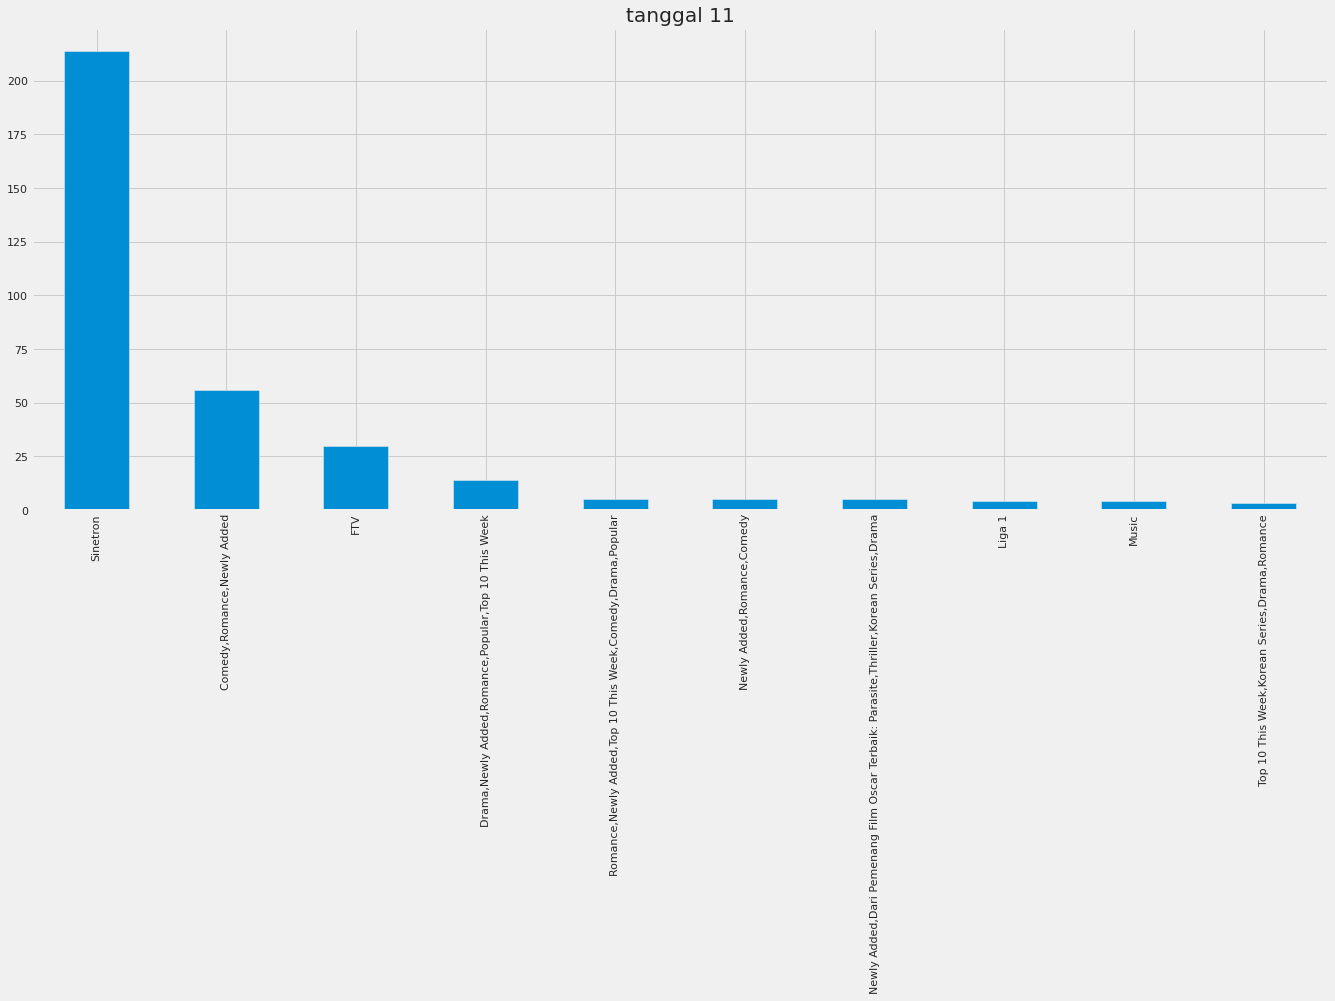

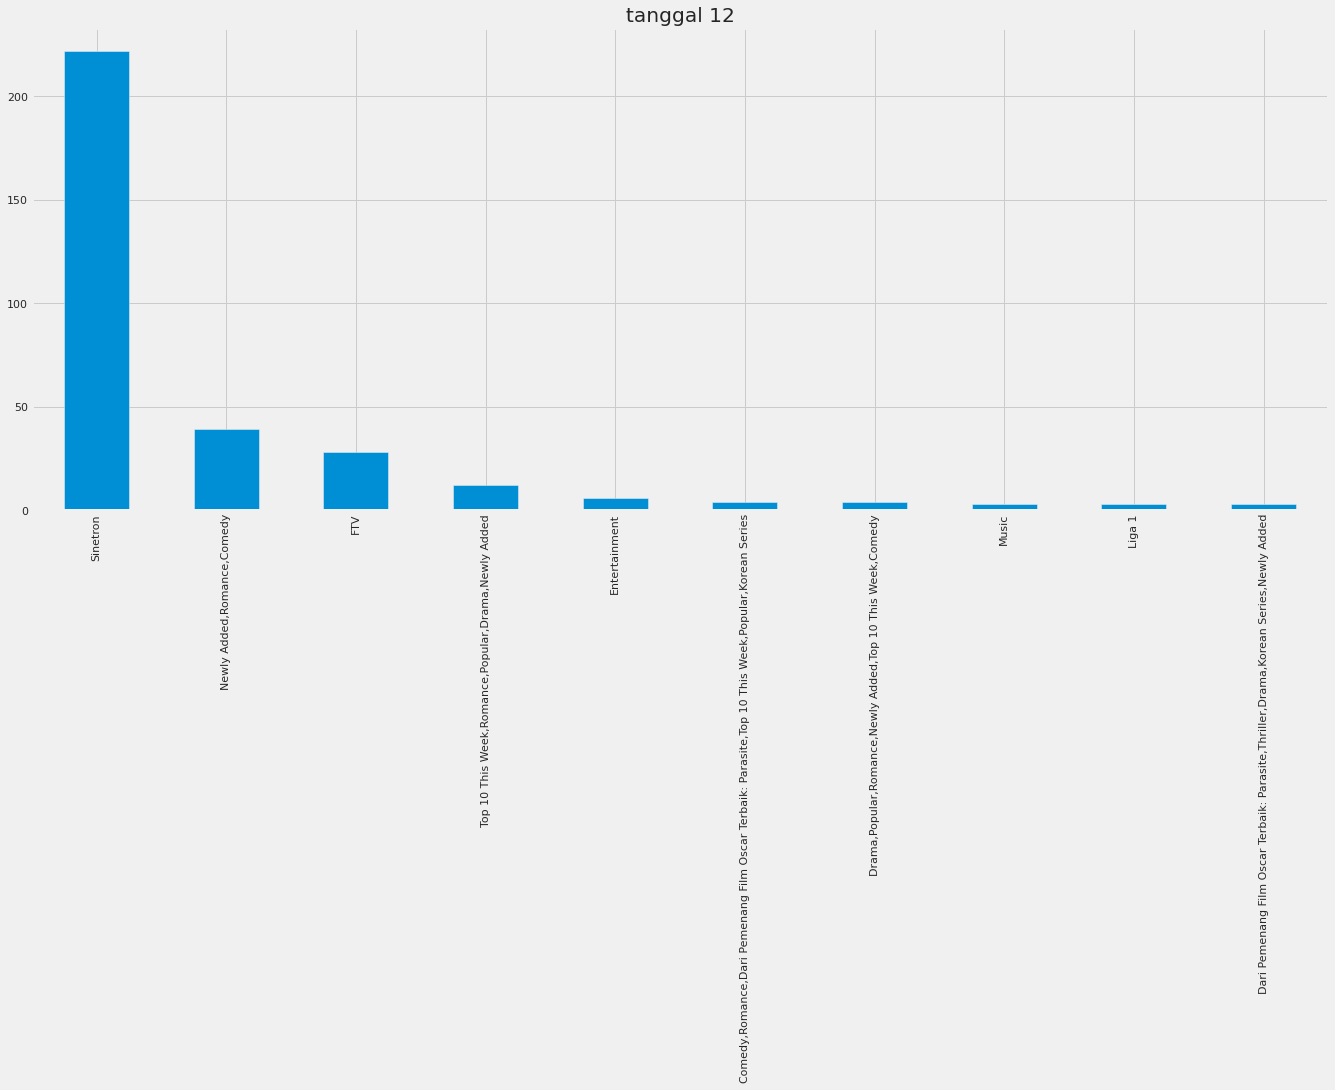

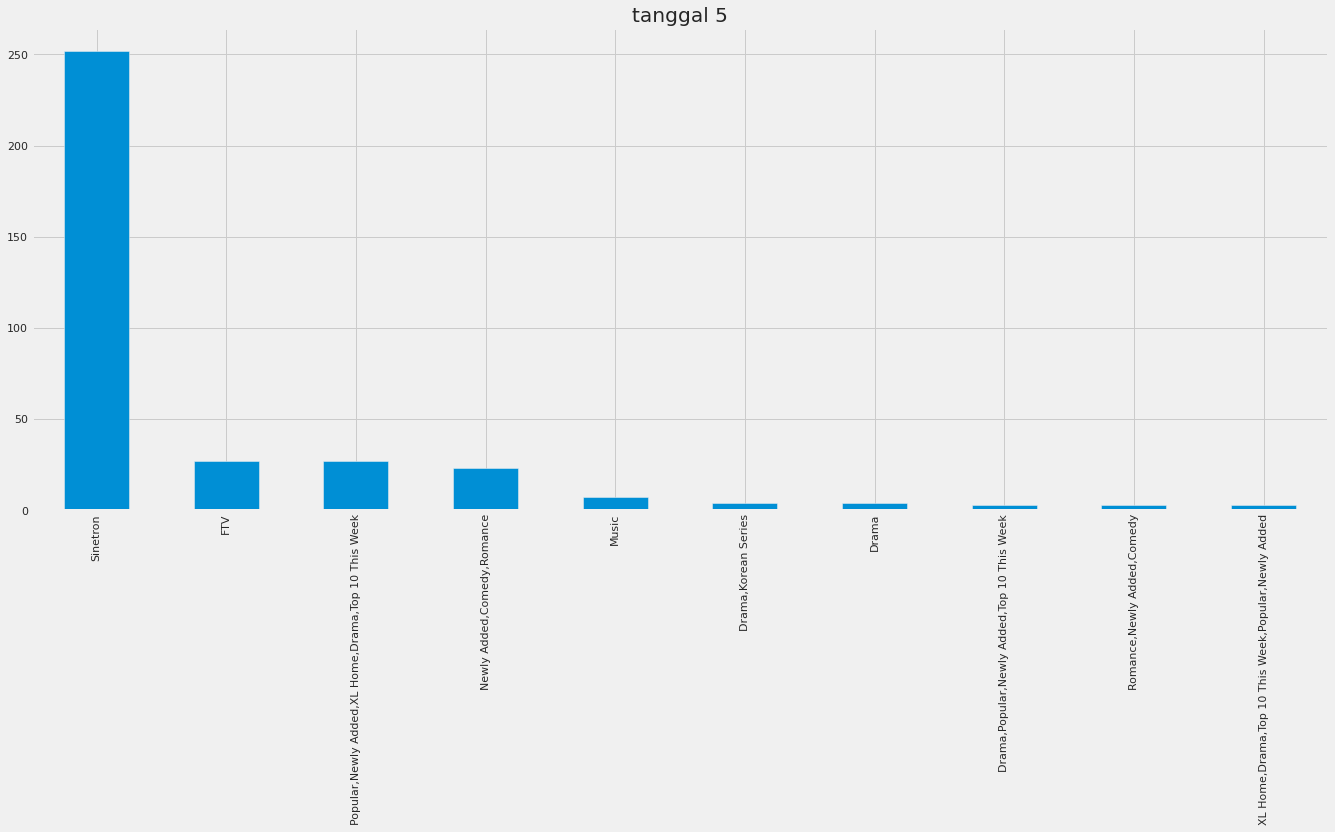

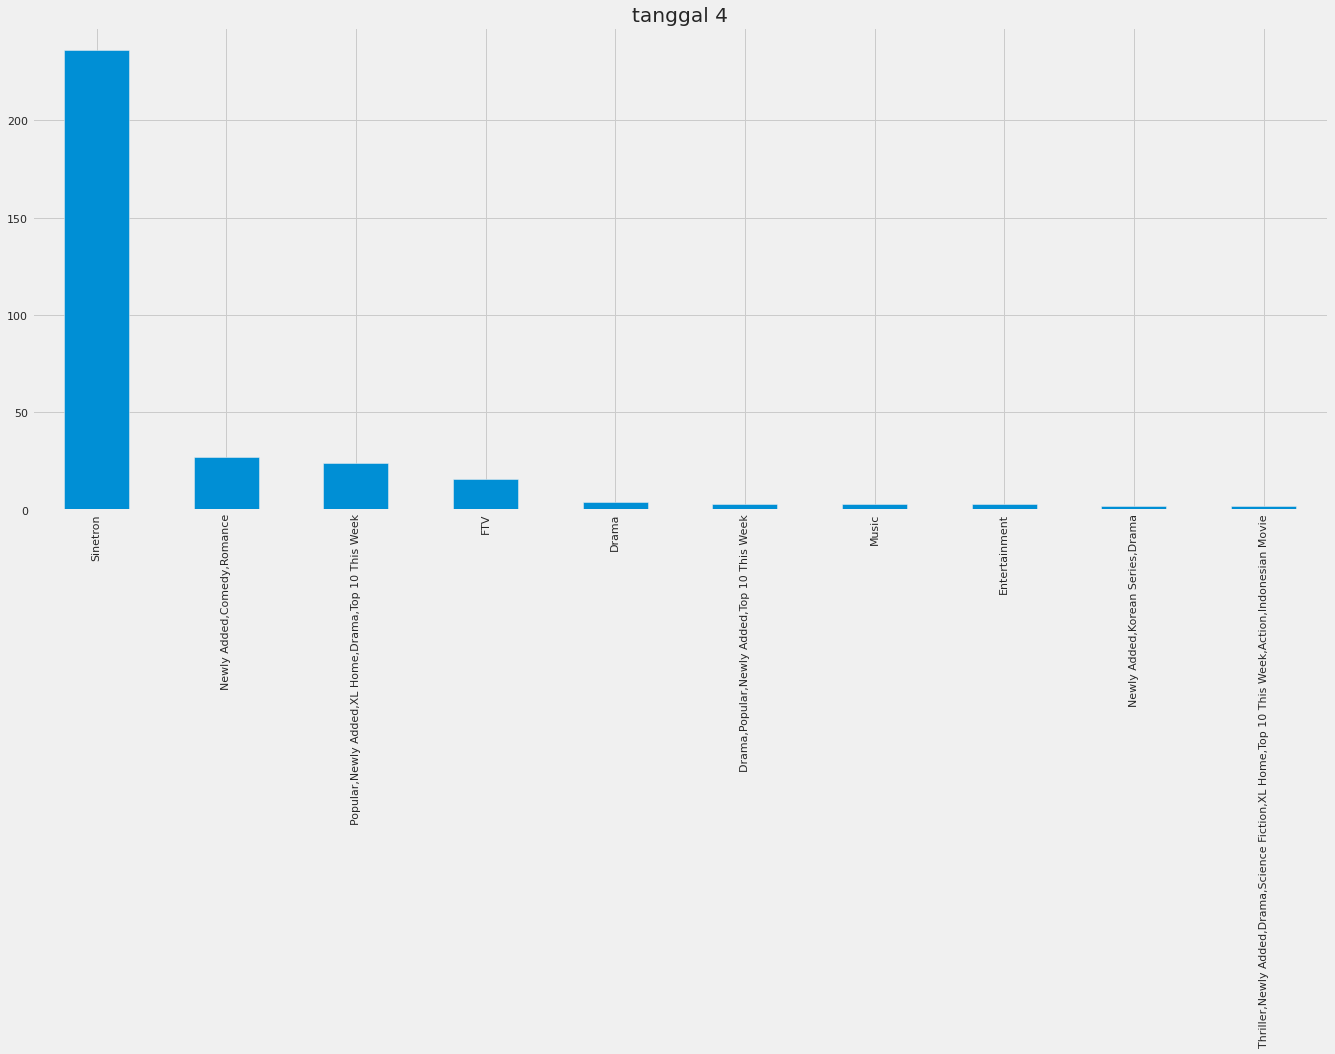

16


In [39]:
i = 0
for tanggal in df['play_time_date'].unique():
    df[df['play_time_date']==tanggal]['genre_name'].value_counts().head(10).plot.bar()
    plt.title(f'tanggal {tanggal}')
    plt.show()
    i+=1
print(i)

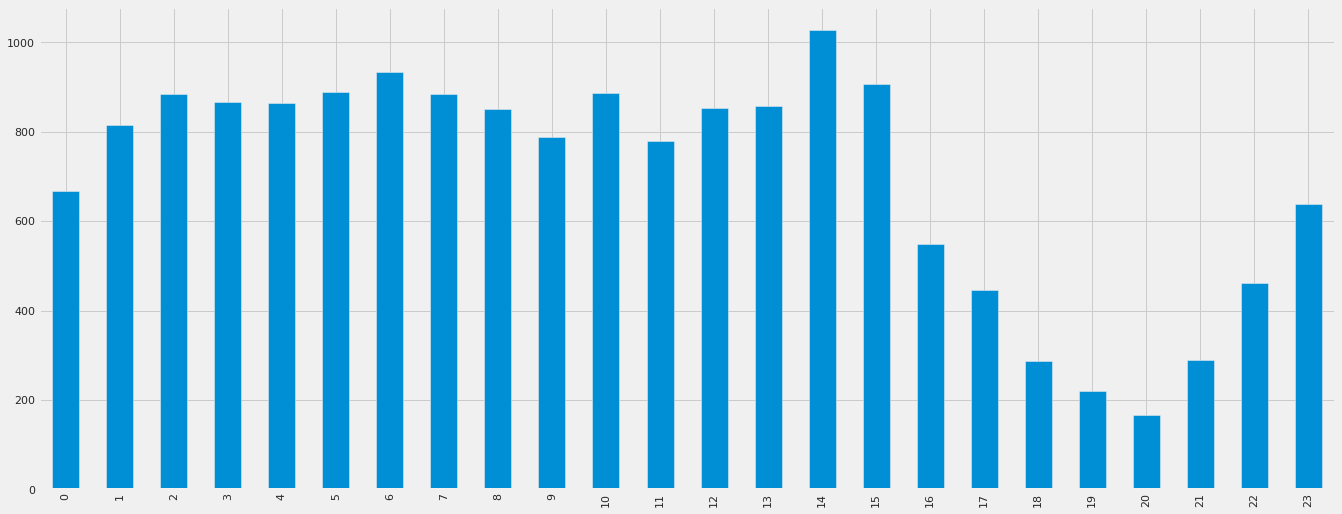

In [40]:
df[df['completed']==True]['play_time_hour'].value_counts().sort_index().plot.bar()
plt.show()

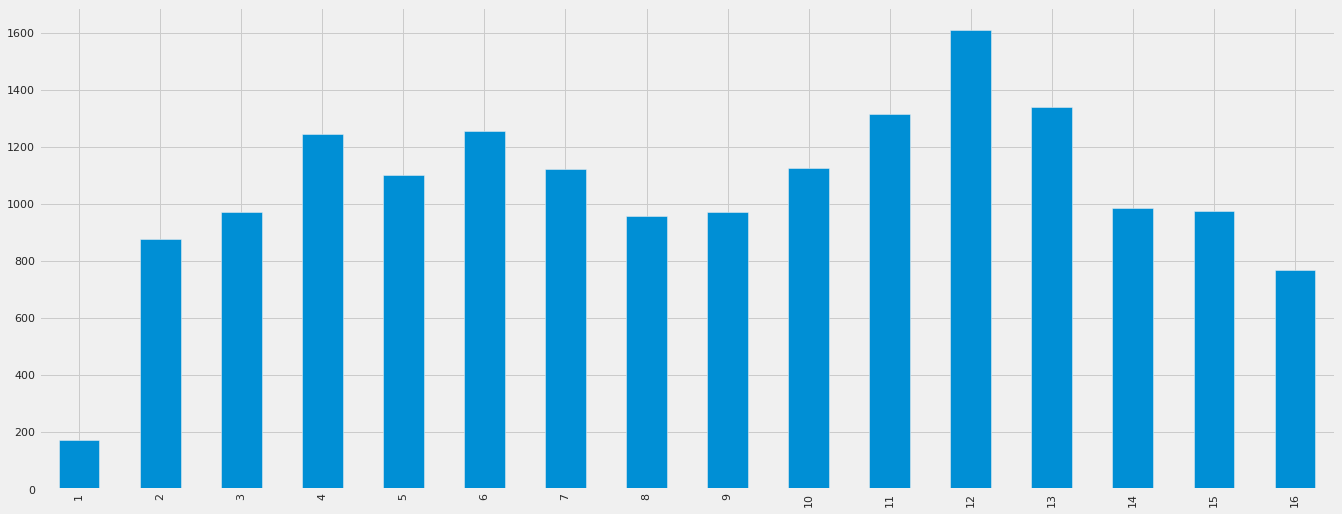

In [41]:
df[df['completed']==True]['play_time_date'].value_counts().sort_index().plot.bar()
plt.show()

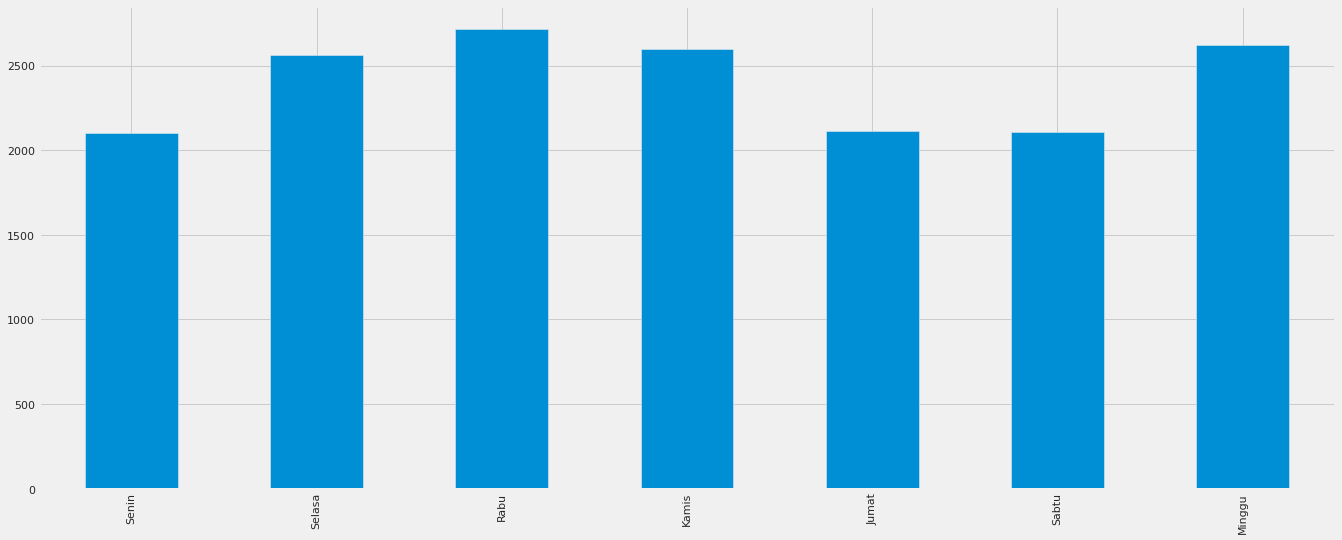

In [42]:
df[df['completed']==True]['weekday'].value_counts().sort_index().plot.bar()
plt.xticks(position,day_list)
plt.show()

Konten

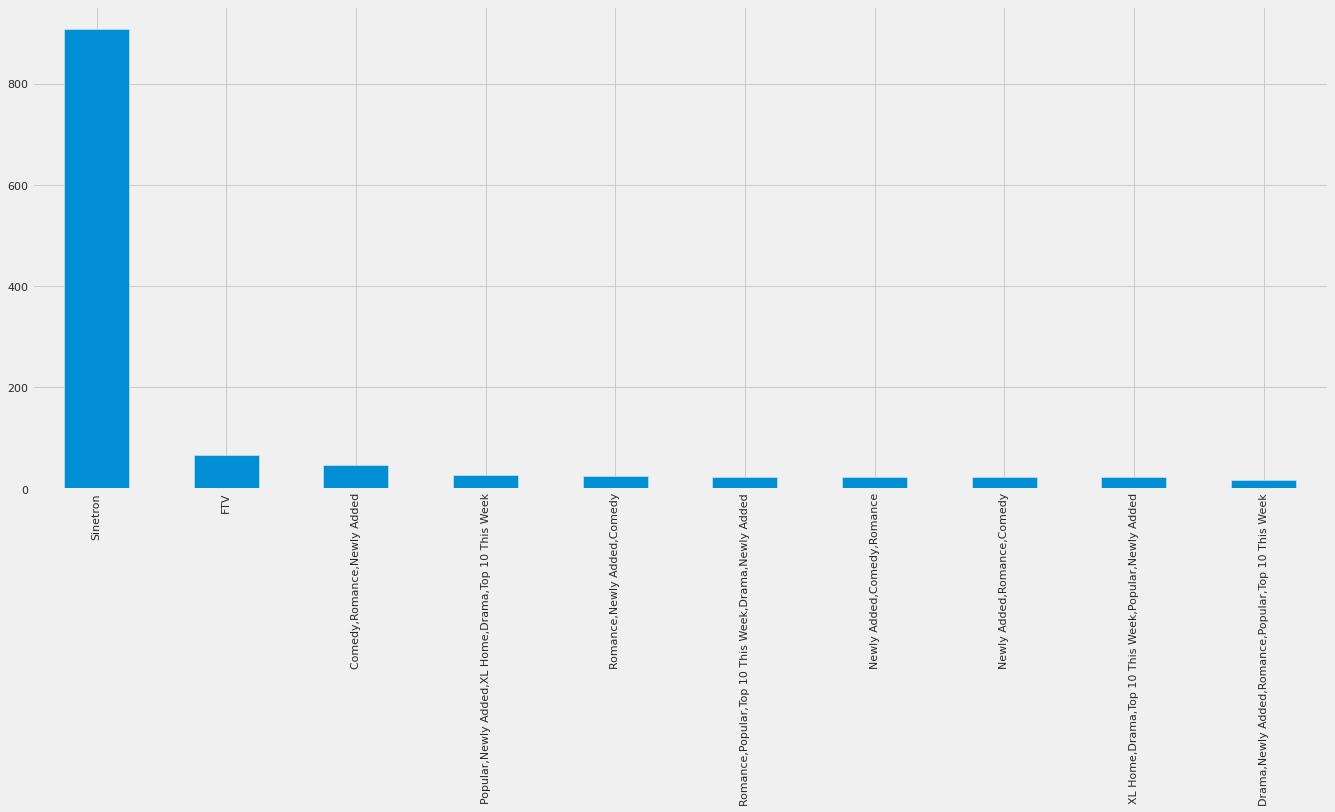

In [43]:
df[df['completed']==True]['genre_name'].value_counts().head(10).plot.bar()
plt.show()

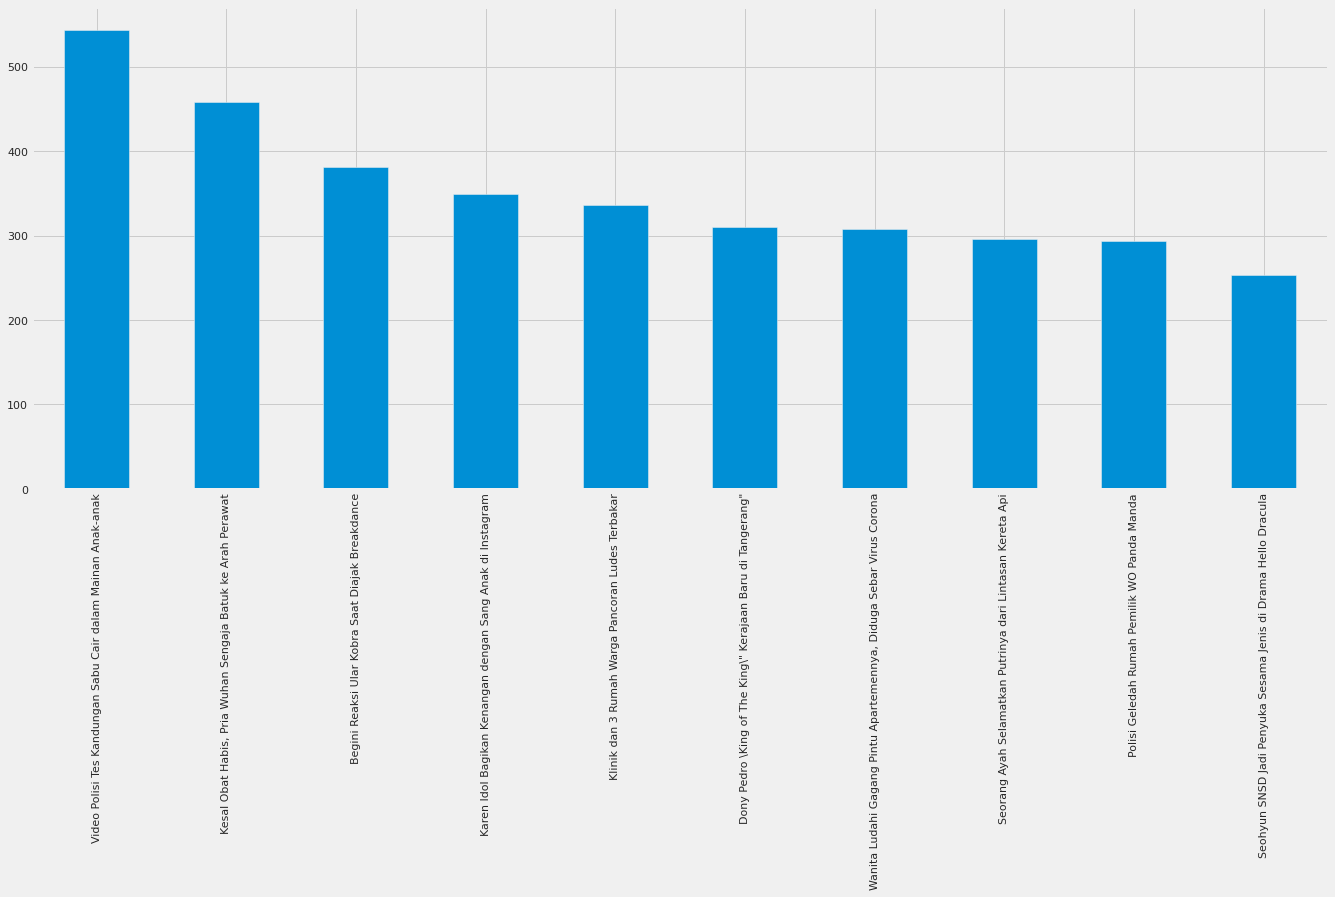

In [44]:
df[df['completed']==True]['title'].value_counts().head(10).plot.bar()
plt.show()

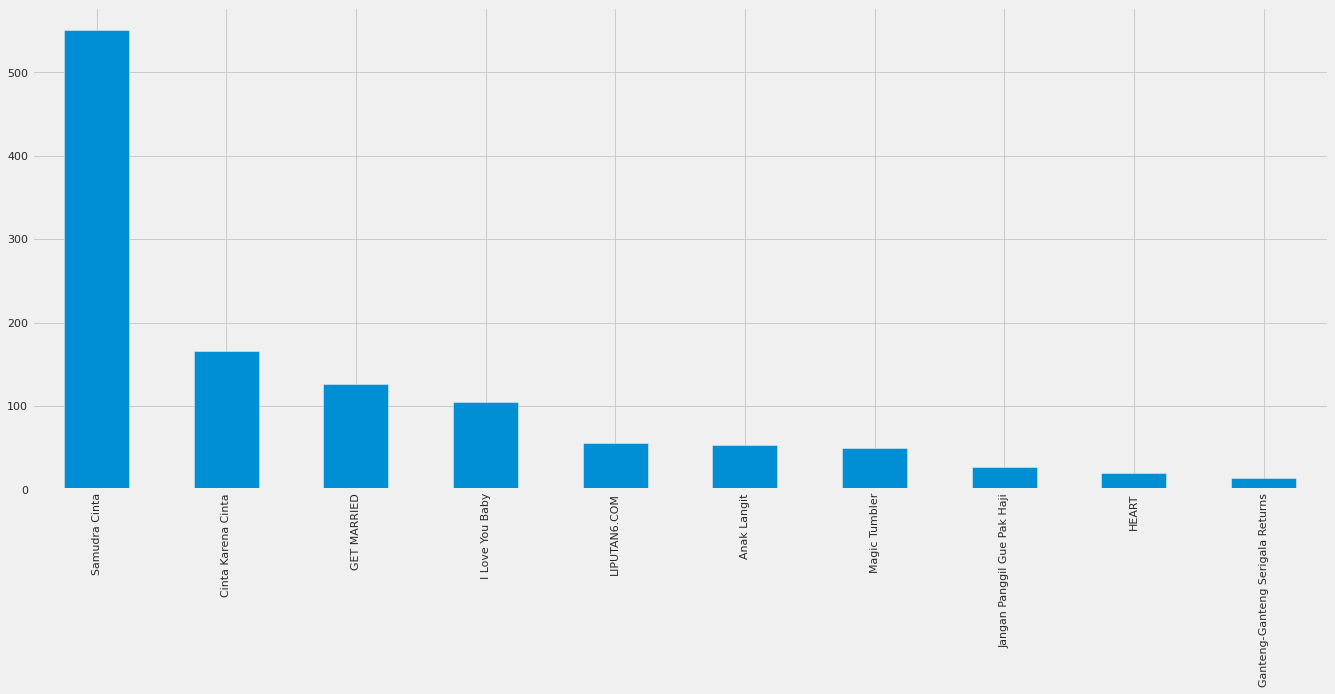

In [45]:
df[df['completed']==True]['film_title'].value_counts().head(10).plot.bar()
plt.show()

Premium content yang ditonton

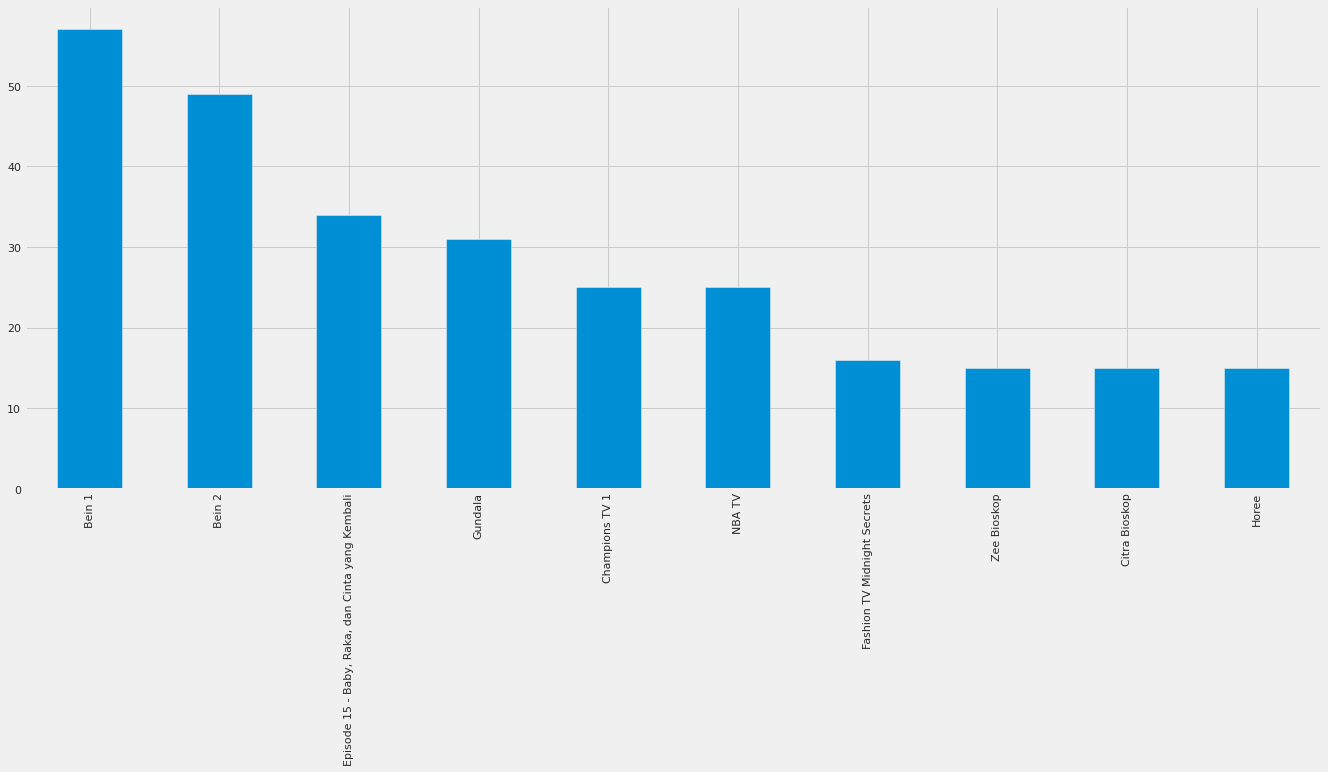

In [46]:
df[df['is_premium']==True]['title'].value_counts().head(10).plot.bar()
plt.show()

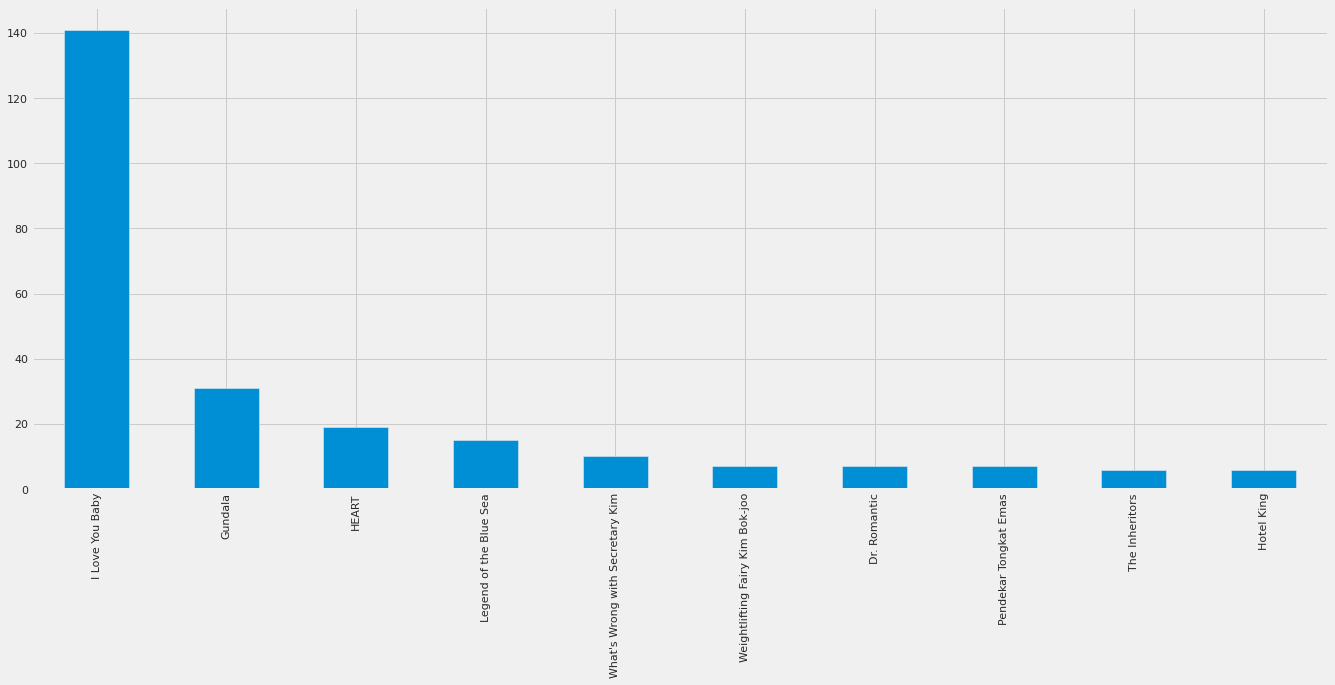

In [47]:
df[df['is_premium']==True]['film_title'].value_counts().head(10).plot.bar()
plt.show()

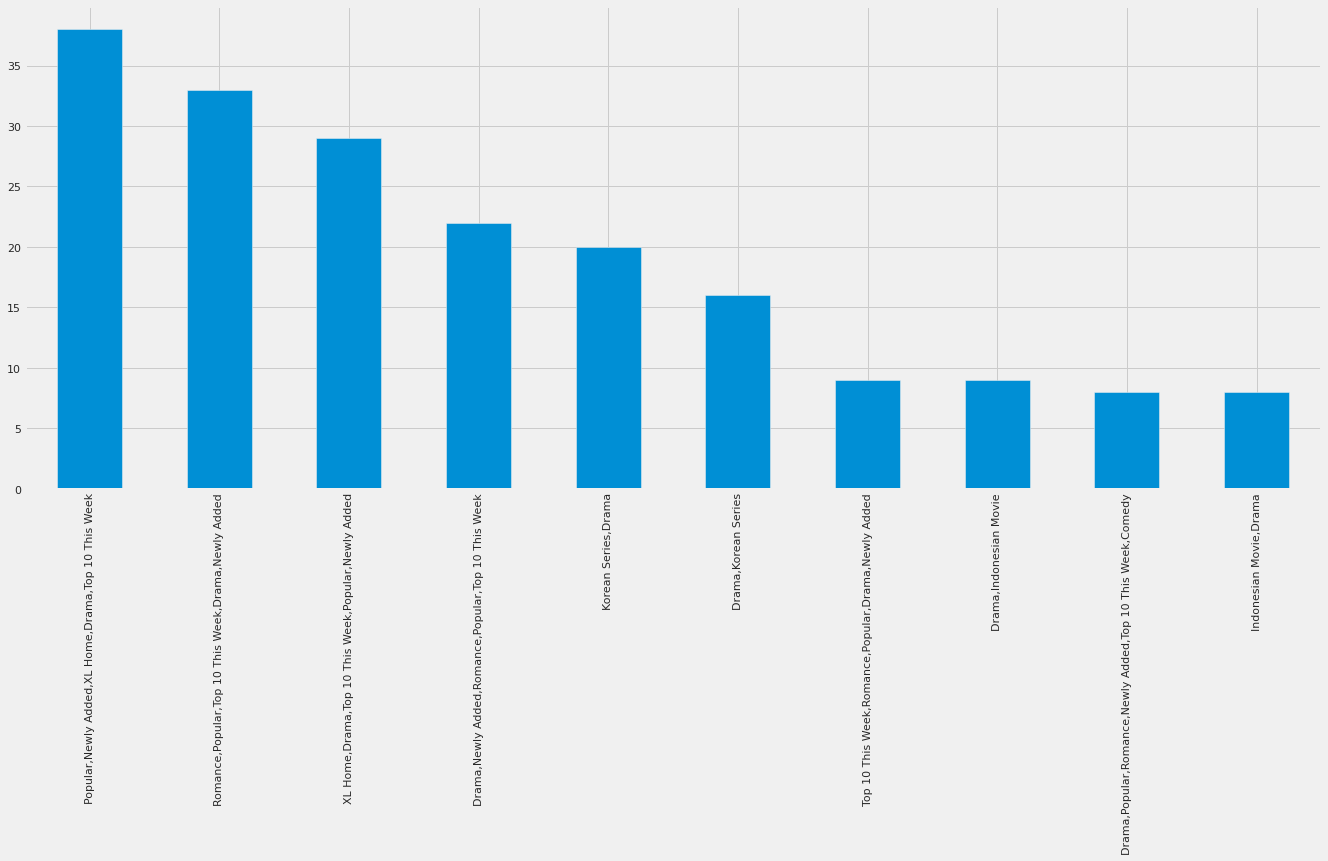

In [48]:
df[df['is_premium']==True]['genre_name'].value_counts().head(10).plot.bar()
plt.show()

In [85]:
#Si terduga bot

In [49]:
df[df['hash_watcher_id'].str.contains('e3b0c4')]['title'].value_counts()

Indosiar                                                                                                      85
SCTV                                                                                                          84
Trans7                                                                                                        77
RCTI                                                                                                          70
TRANS TV                                                                                                      67
                                                                                                              ..
PERSIBB KONTROVERSI!! Ezechiel Dijatuhkan dalam Kotak Pinalti, Wasit Hanya Berika Tendangan Gawang             1
Cinta Karena Cinta - Episode 298 dan 299 Part 1/2                                                              1
SUARA MERDU!! Eva Yolanda Buat Nassar dan Beniqno Beri Kesempatan Raih Golden Tiket - LIDA 2020 

In [50]:
df[df['hash_watcher_id'].str.contains('e3b0c4')]['genre_name'].value_counts()

Sinetron    19
Name: genre_name, dtype: int64

In [51]:
df[df['hash_watcher_id'].str.contains('e3b0c4')]['film_title'].value_counts()

Samudra Cinta                                     11
Cinta Karena Cinta                                 6
Magic Tumbler                                      1
Cintaku di Top Up Sampai Unlimited  | FTV SCTV     1
Jangan Panggil Gue Pak Haji                        1
Name: film_title, dtype: int64

In [52]:
df[df['hash_watcher_id'].str.contains('e3b0c4')]['completed'].value_counts()

False    45
True     14
Name: completed, dtype: int64

[]

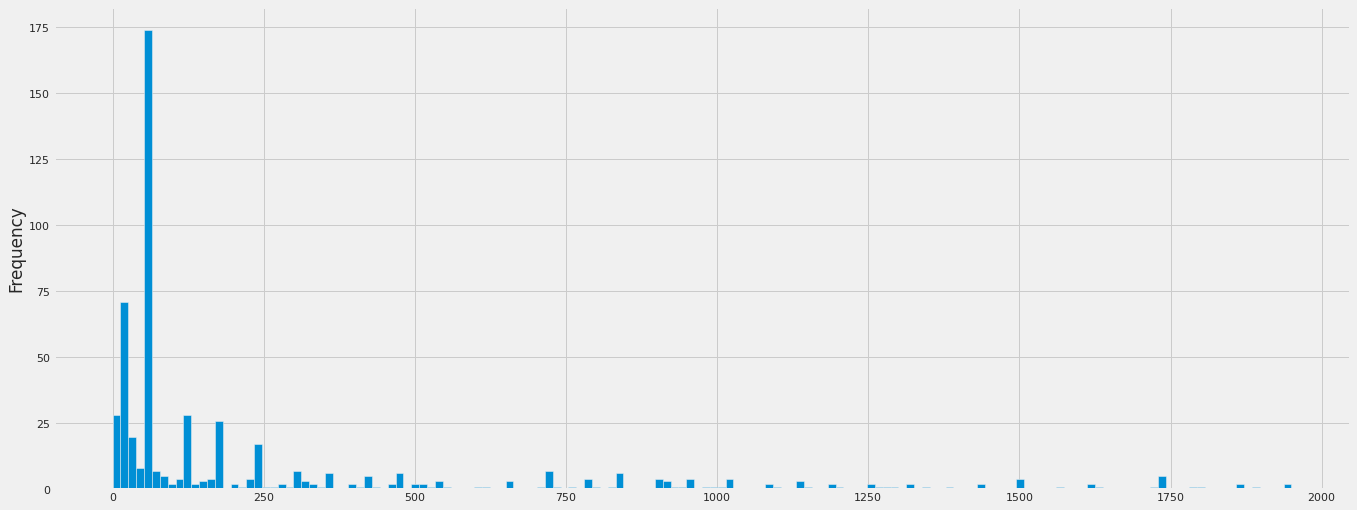

In [53]:
df[(df['hash_watcher_id'].str.contains('e3b0c4'))&(df['play_duration']<2000)]['play_duration'].plot.hist(bins=150)
plt.plot()

In [54]:
df[df['hash_watcher_id'].str.contains('e3b0c4')]['content_type'].value_counts()

livestreaming    595
vod               59
Name: content_type, dtype: int64

In [84]:
#Top 10 watcher

In [55]:
watcher_list=watcher['hash_watcher_id'].to_list()
watcher_list

['e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855',
 '133af93c4a0191b2d31fecb34b7653836abe32b769be2329dcc20696607a55bb',
 '83f4d120aaa71c673ceae6733feb59687272e7a00e2bc95baf46db98d4acab59',
 'b11d6374348cfff917a41543edf3ea128d9faa2d7667a667acf0fc1b94e20426',
 '8909a84bbdd20a837c88977687efe839d0aac7c72891ba2dcaff45802058a7bc',
 '219e2b2c5ef39dbf7d4beebfa076b3c8cb233abc000664b720d4ff56641838cc',
 'f6412c7764aec4826de4888462b7bb225833d48d544b62448948bcf2eac1dc87',
 '55505db6c235dbc298ab227db5ad123380e5e39cb4e995790c26f90dd4c92b3e',
 'a8e1d40716829e08f1b3f5a8c64375ddb87d47fdd9b9dc017868c2a21a31ed1d',
 '4e6972d0d83046c5601773506b8f13009515deb45a0dcdc99c5ee9f393ad6e5f']

In [56]:
top_10 = df[df['hash_watcher_id'].isin(watcher_list)]
top_10.head()

hash_content_id  ... weekday
35   09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...  ...       6
48   15fa05c739e9ffb7d4f70262f15fb3b15f96d803214b53...  ...       6
80   25ad88d78865bd3253d4fb29aa7b5e5da4764cc002c7d8...  ...       6
450  c63efd61a70d0f6b7e5de2b9e0c36adfae6d7606132716...  ...       6
524  f41e41b6136196bd38d1f2d4c17a960388637c9a41c417...  ...       6

[5 rows x 44 columns]

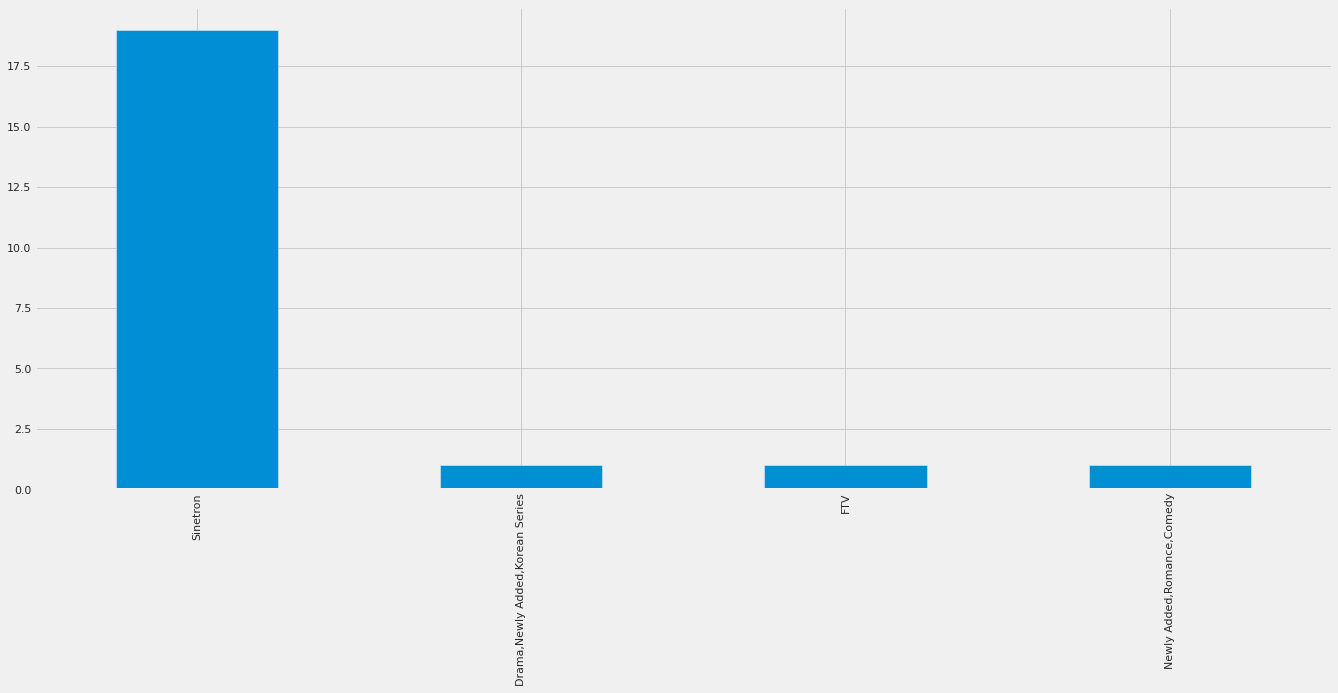

In [57]:
top_10['genre_name'].value_counts().plot.bar()
plt.show()

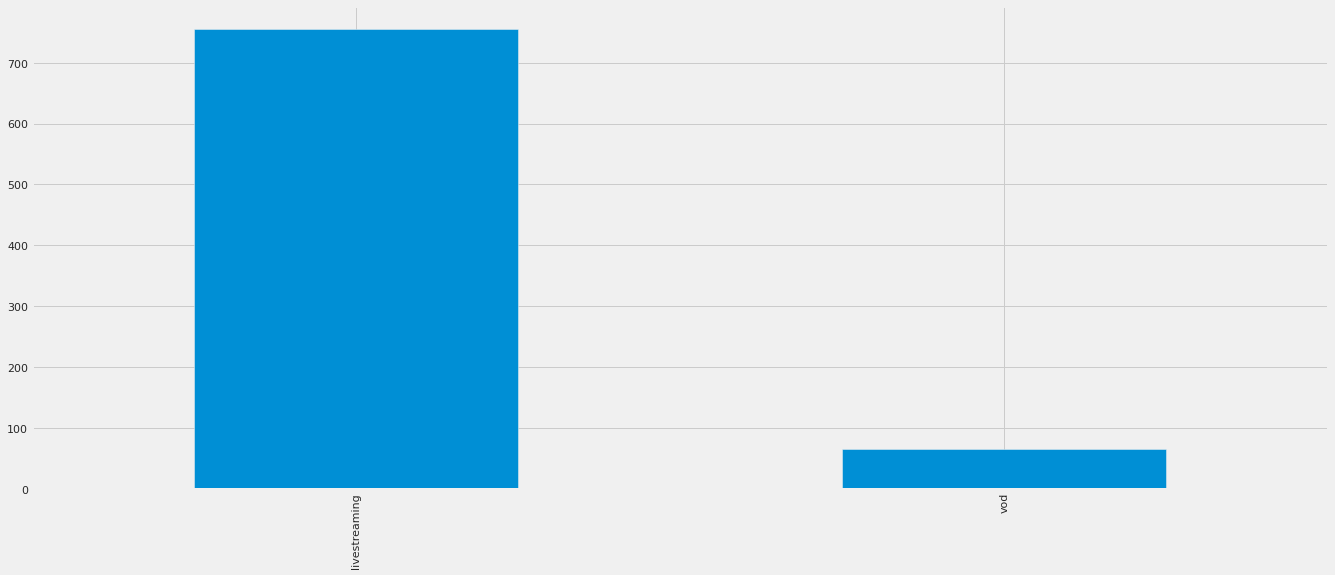

In [58]:
top_10['content_type'].value_counts().plot.bar()
plt.show()

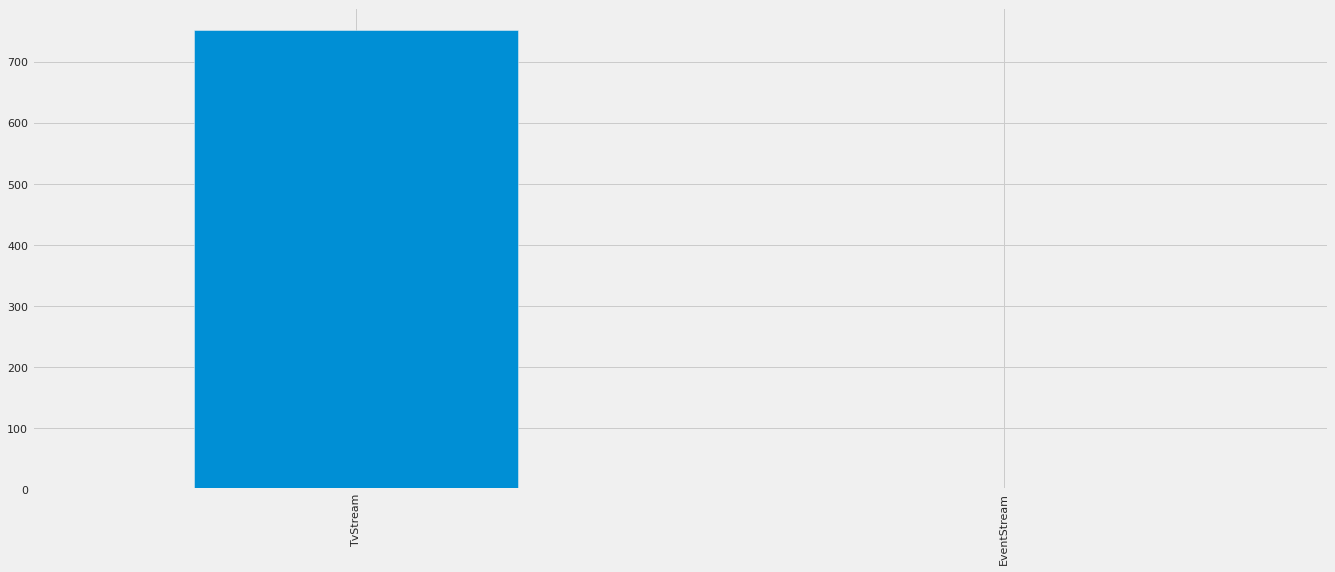

In [59]:
top_10['stream_type'].value_counts().plot.bar()
plt.show()

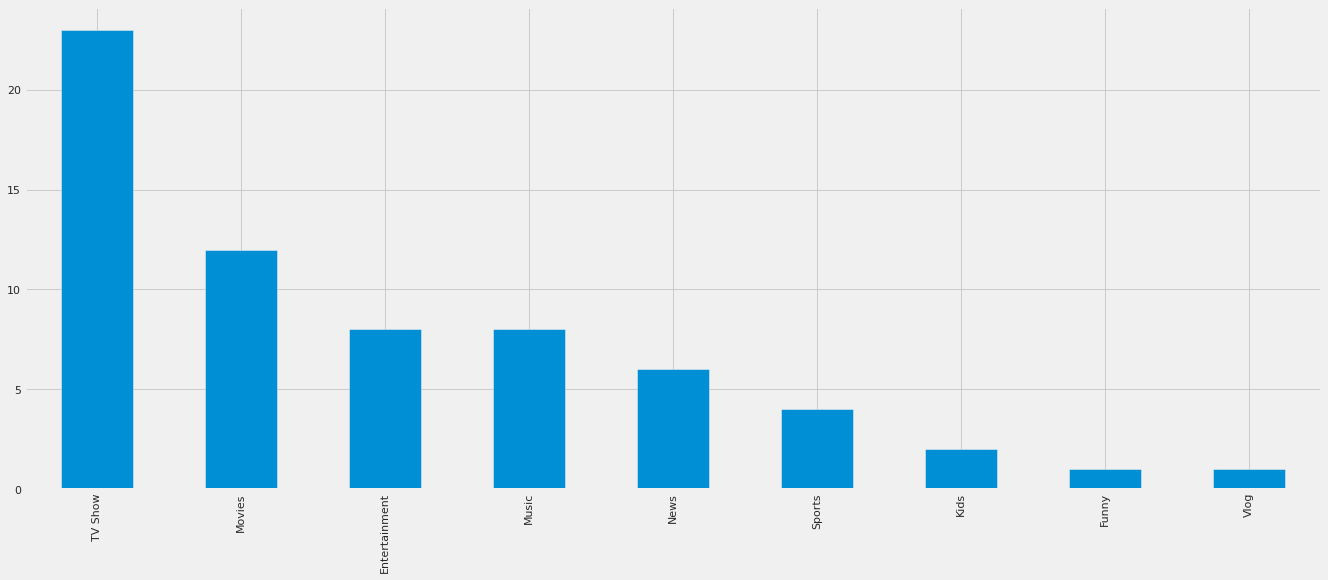

In [60]:
top_10['category_name'].value_counts().plot.bar()
plt.show()

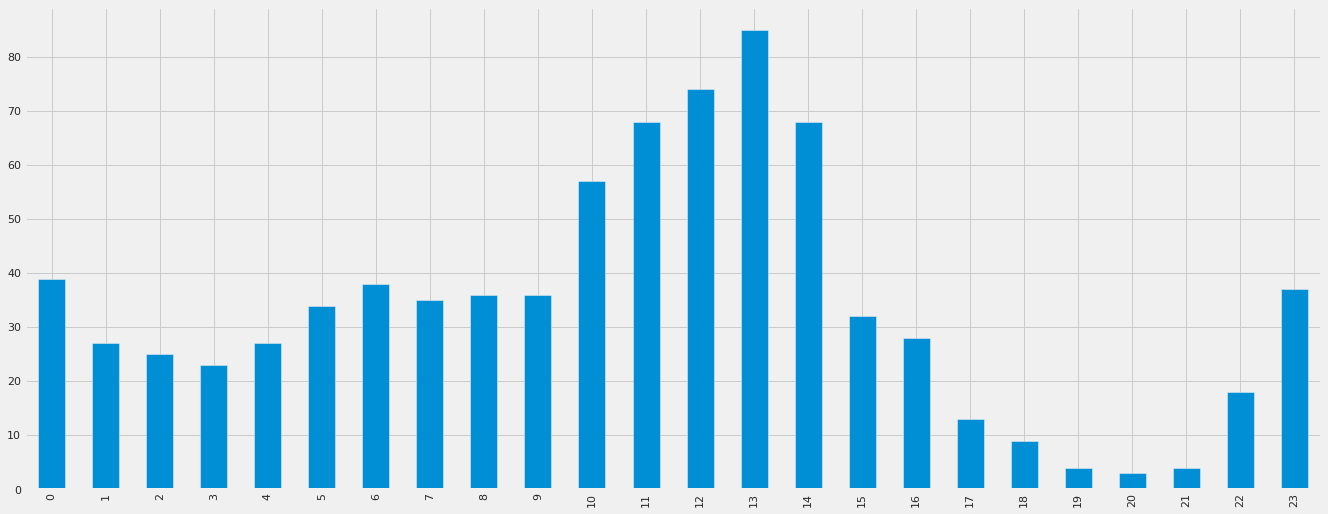

In [61]:
top_10['play_time_hour'].value_counts(sort = False).plot.bar()
plt.show()

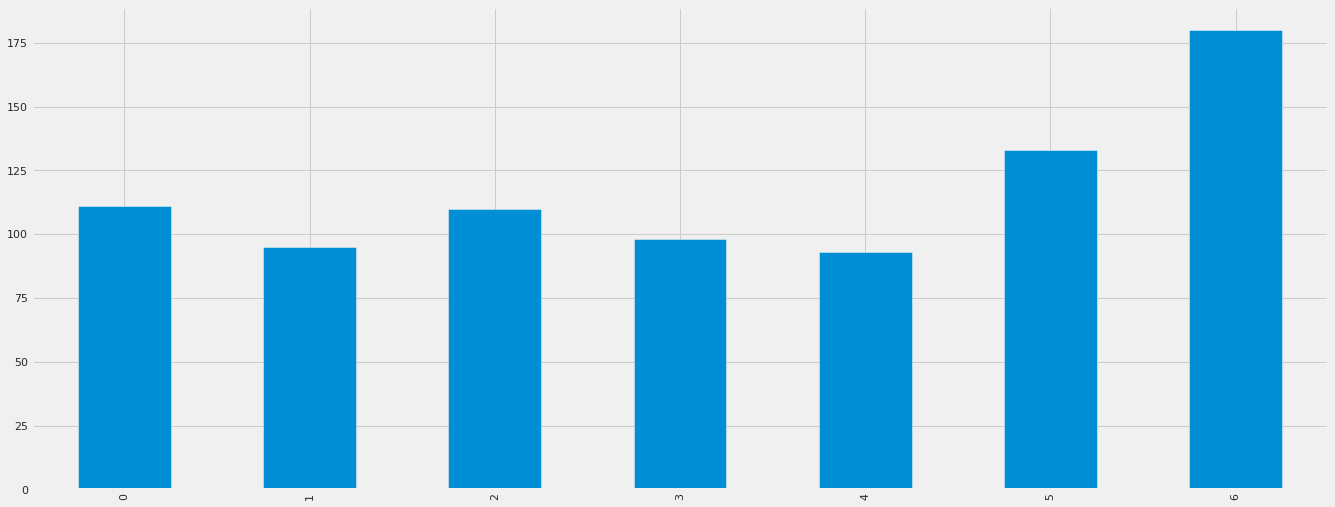

In [62]:
top_10['weekday'].value_counts(sort = False).plot.bar()
plt.show()

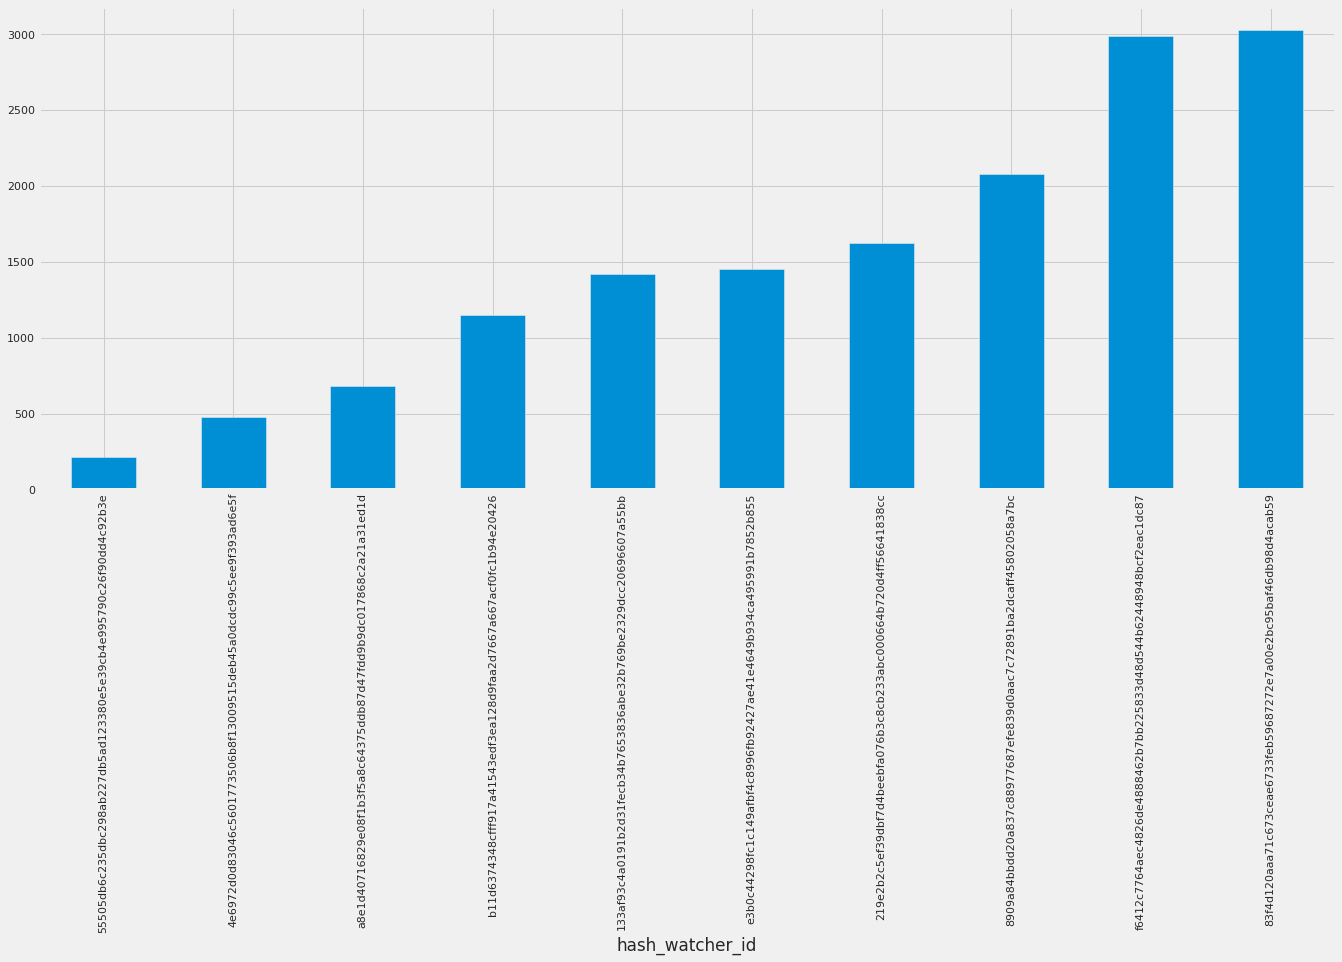

In [63]:
top_10.groupby('hash_watcher_id')['play_duration'].mean().sort_values().plot.bar()
plt.show()

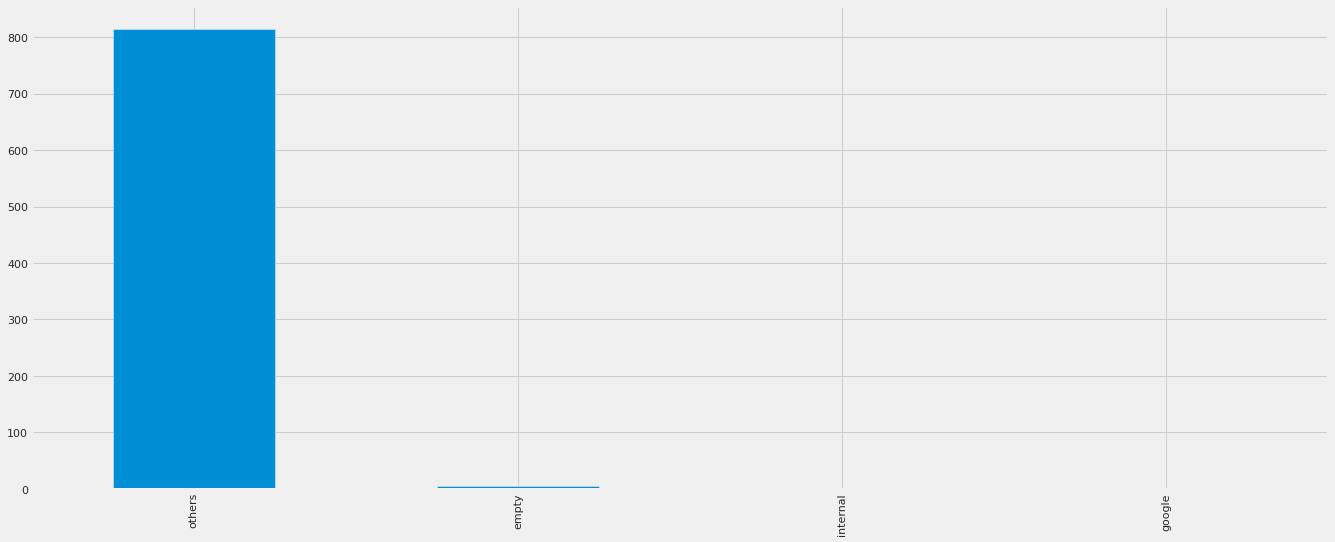

In [64]:
top_10['referrer_group'].value_counts().plot.bar()
plt.show()

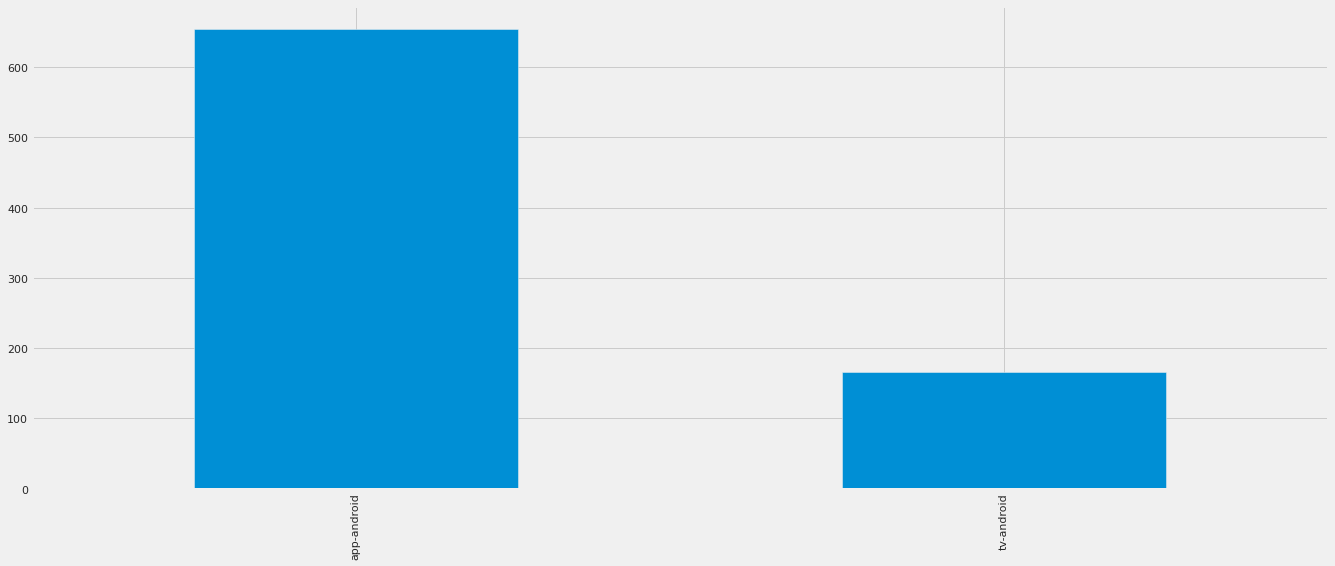

In [65]:
top_10['platform'].value_counts().plot.bar()
plt.show()

In [86]:
# Segmentasi user vidio

In [66]:
df.columns

Index(['hash_content_id', 'hash_play_id', 'hash_visit_id', 'hash_watcher_id',
       'hash_film_id', 'hash_event_id', 'is_login', 'playback_location',
       'platform', 'play_time', 'end_time', 'referrer', 'average_bitrate',
       'bitrate_range', 'total_bytes', 'buffer_duration', 'referrer_group',
       'completed', 'utm_source', 'utm_medium', 'utm_campaign', 'player_name',
       'has_ad', 'flash_version', 'os_name', 'os_version', 'browser_name',
       'browser_version', 'app_name', 'autoplay', 'is_premium', 'app_version',
       'city', 'play_duration', 'content_type', 'stream_type', 'title',
       'category_name', 'film_title', 'season_name', 'genre_name',
       'play_time_date', 'play_time_hour', 'weekday'],
      dtype='object')

In [67]:
i_data = df[['hash_event_id', 'playback_location', 'os_name', 'play_time_hour', 'platform',
             'weekday', 'play_duration', 'stream_type','genre_name','category_name']]
i_data.head()

hash_event_id  ... category_name
0  c81bd64a212d3b5cb227499a6b4a3dc607748ae5133e48...  ...        Sports
1  90a514e451e400c4c32ac42815920a66c500c1c2ea347d...  ...        Sports
2  c278001db02102ece22d428b9235332856cba4754b63a0...  ...        Sports
3  ed0731e9861306e6e26cf3cfb5a43da6b0e19af3ff3ff5...  ...        Sports
4  3679f65950032d6bff1323df5b29292adad99918d616ae...  ...        Sports

[5 rows x 10 columns]

In [68]:
for i in i_data.columns:
    if i_data[i].nunique()<100:
        print(i)
        print(i_data[i].unique(),'\n')

playback_location
['embed' 'direct'] 

os_name
['Android' 'Windows' 'REL' 'Mac OS X' nan 'iOS' 'Other' 'Linux' 'Tizen'
 'Windows Phone' 'Chrome OS' 'Ubuntu' 'BlackBerry OS'] 

play_time_hour
[10 12  1 13  7 15  4  6  2 23 20  9  0  3  5  8 16 18 17 11 22 14 21 19] 

platform
['web-mobile' 'web-desktop' 'app-android' 'tv-android' 'tv-tizen'
 'app-ios' 'tv-webos'] 

weekday
[6 5 0 4 3 1 2] 

stream_type
[nan 'TvStream' 'EventStream'] 

category_name
['Sports' 'TV Show' 'Entertainment' 'News' nan 'Movies' 'Vlog' 'Music'
 'Lifestyle' 'Korea' 'Kids' 'Funny' 'Education' 'Horror' 'Webtoon'
 'Champions'] 



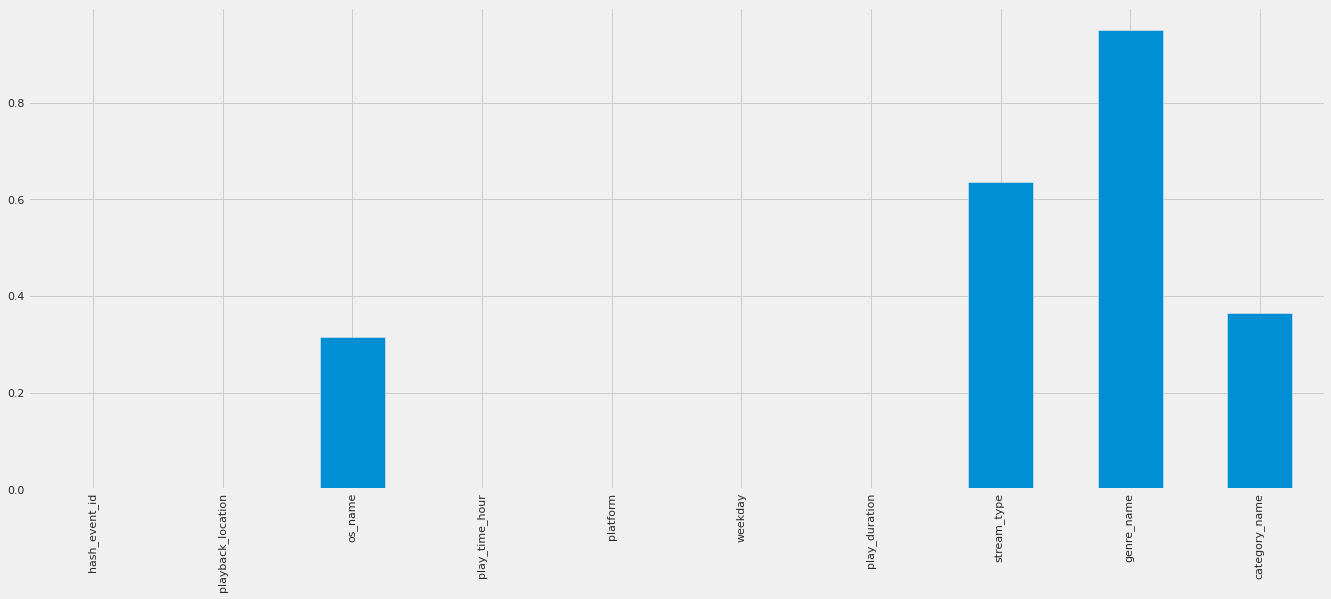

In [69]:
i_data.isna().mean().plot.bar()

In [70]:
# engineering stream_type,genre_name and category_name -> konten

In [71]:
genre_dict = {i:('Sinetron' if (i in ['Sinetron','FTV']) else np.nan) for i in i_data['genre_name']}
i_data['genre_name'] = i_data['genre_name'].map(genre_dict)

In [72]:
i_data['konten'] = i_data['genre_name'].fillna(i_data['stream_type'])
i_data['konten'] = i_data['konten'].fillna(i_data['category_name'])
i_data['konten'].isna().sum()

0

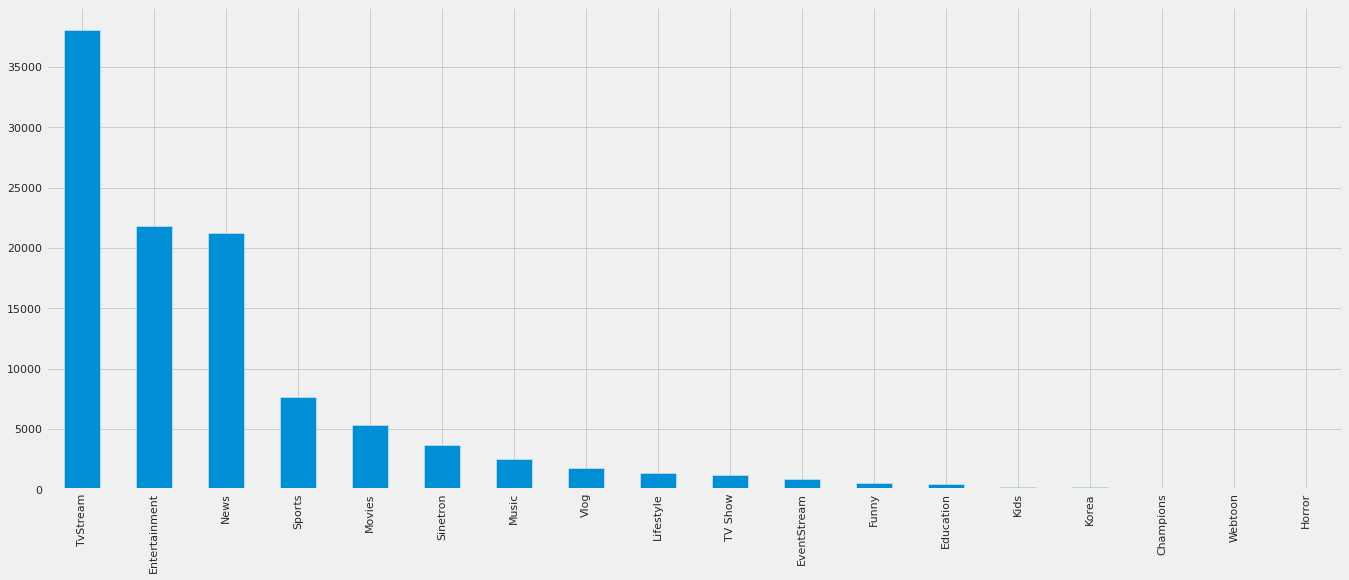

In [73]:
i_data['konten'].value_counts().plot.bar()
plt.show()

In [74]:
#engineering os_name, platform and browser_name

In [75]:
device = ['0' for _ in range(len(i_data))]
for i,j in enumerate(i_data['platform']):
    if device[i] == '0':
        if ('mobile' in j)|('ios' in j):       
            device[i] = 'Hp'
        elif 'tv' in j:
            device[i] = 'Tv'
        elif 'desktop' in j:
            device[i] = 'Pc'
        elif 'android' in j:
            device[i] = 'Hp'

In [76]:
j=0
for i in device:
    if i == '0':
        j+=1
print(j)

0


In [77]:
i_data['device'] = device
i_data.head()

hash_event_id  ... device
0  c81bd64a212d3b5cb227499a6b4a3dc607748ae5133e48...  ...     Hp
1  90a514e451e400c4c32ac42815920a66c500c1c2ea347d...  ...     Hp
2  c278001db02102ece22d428b9235332856cba4754b63a0...  ...     Hp
3  ed0731e9861306e6e26cf3cfb5a43da6b0e19af3ff3ff5...  ...     Hp
4  3679f65950032d6bff1323df5b29292adad99918d616ae...  ...     Pc

[5 rows x 12 columns]

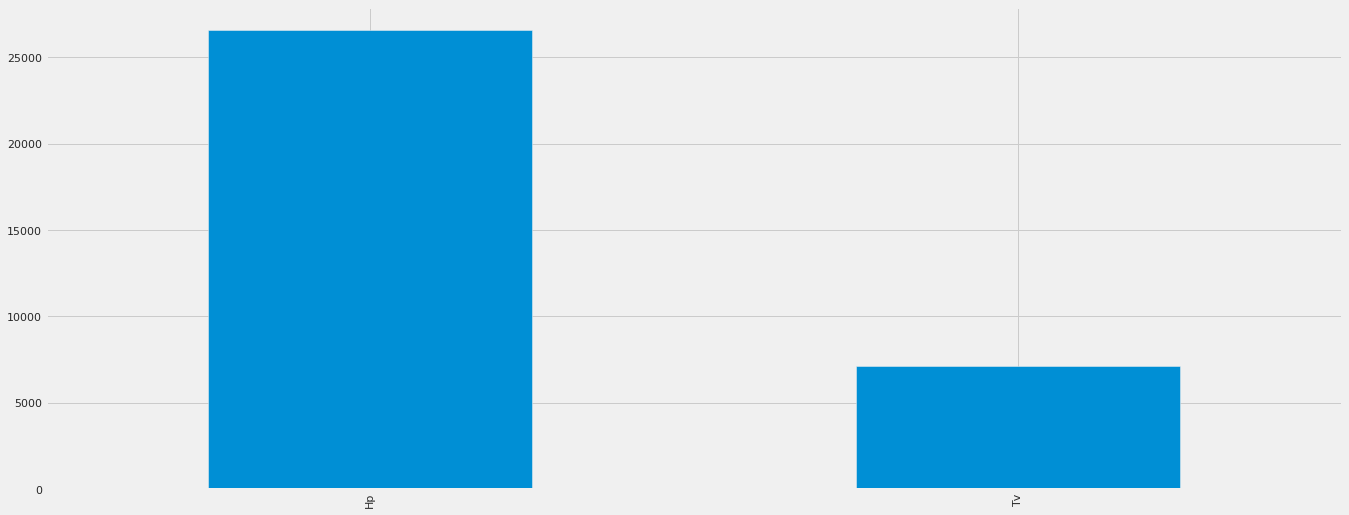

In [78]:
i_data[i_data['os_name'].isna()]['device'].value_counts().plot.bar()
plt.show()

In [79]:
#assign missing value for os_name with device == Tv with Tizen(https://www.google.com/search?channel=fs&client=ubuntu&q=os+for+smart+tv)
i_data['os_name'] = i_data[i_data['device']!='Hp']['os_name'].fillna('Tizen')

In [80]:
i_data['os_name'] = i_data['os_name'].fillna('Other')

kolom yang dipakai untuk clustering : os_name, device,konten, playback_location, playtime_hour dan weekday

In [81]:
data = i_data[['os_name', 'device','konten', 'playback_location',
               'play_time_hour', 'weekday']]
data.head()

os_name device  konten playback_location  play_time_hour  weekday
0    Other     Hp  Sports             embed              10        6
1    Other     Hp  Sports             embed              12        6
2    Other     Hp  Sports             embed               1        6
3    Other     Hp  Sports             embed              13        6
4  Windows     Pc  Sports             embed              13        6

In [82]:
from feature_engine.encoding import OneHotEncoder
var = ['os_name','device','konten','playback_location']
encode = OneHotEncoder( variables=var)
data = encode.fit_transform(data)
data.head()

play_time_hour  weekday  ...  playback_location_embed  playback_location_direct
0              10        6  ...                        1                         0
1              12        6  ...                        1                         0
2               1        6  ...                        1                         0
3              13        6  ...                        1                         0
4              13        6  ...                        1                         0

[5 rows x 34 columns]

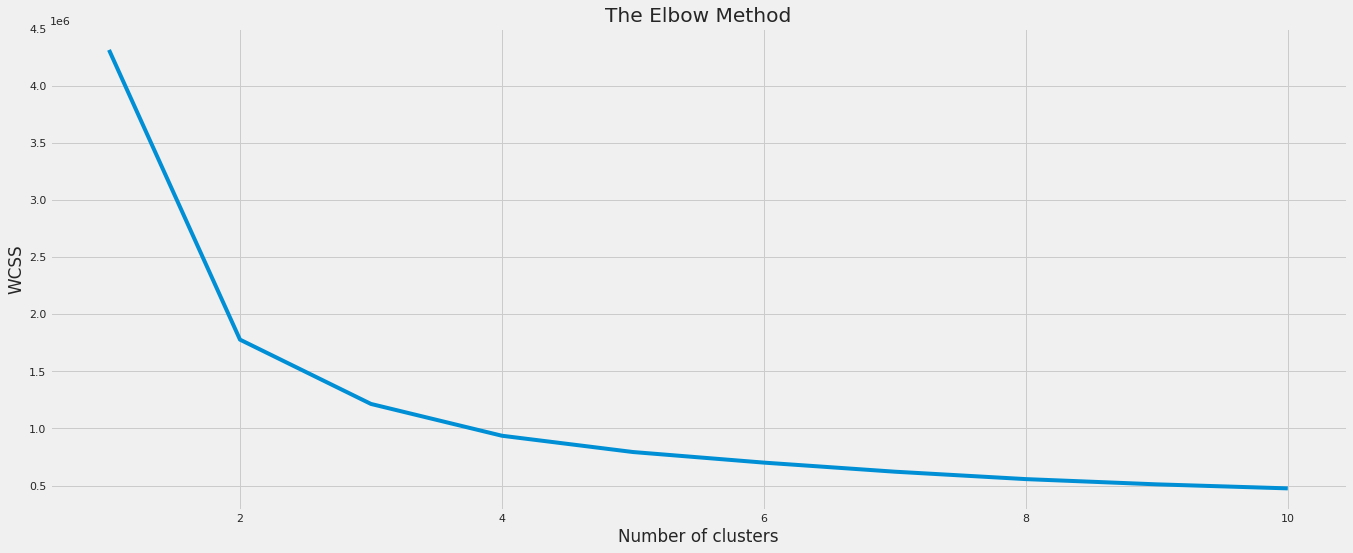

In [83]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()